In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
n_var =int(vars[0,j])
latent_space =1000 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 50000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


X_train= x,y (1000, 2)
y_train= z (1000, 1)


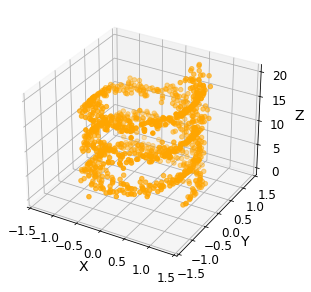

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [5]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                30000     
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [6]:
wgan = WGAN_Model11.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 3)                 30650     
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 33,211
Trainable params: 33,111
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


In [8]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)


## Training

In [9]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/50000
critic: 32.439438 - generator: -0.003522 - 5s
Epoch 2/50000
critic: 9.604705 - generator: 0.004809 - 0s
Epoch 3/50000
critic: 2.863026 - generator: 0.002481 - 0s
Epoch 4/50000
critic: 0.825748 - generator: -0.003788 - 0s
Epoch 5/50000
critic: 0.129291 - generator: -0.008357 - 1s
Epoch 6/50000
critic: 0.022024 - generator: -0.006823 - 0s
Epoch 7/50000
critic: 0.019788 - generator: -0.007011 - 1s
Epoch 8/50000
critic: 0.011225 - generator: -0.003936 - 1s
Epoch 9/50000
critic: 0.023474 - generator: 0.000138 - 0s
Epoch 10/50000
critic: 0.015627 - generator: -0.000509 - 1s
Epoch 11/50000
critic: 0.013890 - generator: -0.000351 - 0s
Epoch 12/50000
critic: 0.016281 - generator: -0.001833 - 1s
Epoch 13/50000
critic: 0.011077 - generator: -0.004550 - 1s
Epoch 14/50000
critic: 0.007069 - generator: -0.002350 - 1s
Epoch 15/50000
critic: 0.003726 - generator: -0.006050 - 1s
Epoch 16/50000
critic: 0.010920 - generator: -0.012063 - 1s
Epoch 17/50000
critic: 0.009870 - generator: -0.008

critic: 0.017576 - generator: -0.048735 - 0s
Epoch 138/50000
critic: 0.014251 - generator: -0.051510 - 0s
Epoch 139/50000
critic: 0.011482 - generator: -0.044244 - 0s
Epoch 140/50000
critic: 0.015805 - generator: -0.044174 - 0s
Epoch 141/50000
critic: 0.021715 - generator: -0.042512 - 0s
Epoch 142/50000
critic: 0.020625 - generator: -0.046278 - 1s
Epoch 143/50000
critic: 0.004542 - generator: -0.043774 - 0s
Epoch 144/50000
critic: 0.022636 - generator: -0.040750 - 0s
Epoch 145/50000
critic: 0.012800 - generator: -0.043072 - 0s
Epoch 146/50000
critic: 0.009037 - generator: -0.046050 - 0s
Epoch 147/50000
critic: 0.008203 - generator: -0.043751 - 0s
Epoch 148/50000
critic: 0.011859 - generator: -0.041472 - 0s
Epoch 149/50000
critic: 0.012181 - generator: -0.039459 - 0s
Epoch 150/50000
critic: 0.008349 - generator: -0.037255 - 0s
Epoch 151/50000
critic: 0.010090 - generator: -0.034316 - 0s
Epoch 152/50000
critic: 0.012449 - generator: -0.034452 - 0s
Epoch 153/50000
critic: 0.015283 - gener

critic: 0.017076 - generator: -0.038165 - 0s
Epoch 273/50000
critic: 0.016066 - generator: -0.038346 - 0s
Epoch 274/50000
critic: 0.012938 - generator: -0.036943 - 0s
Epoch 275/50000
critic: 0.014004 - generator: -0.042143 - 0s
Epoch 276/50000
critic: 0.013492 - generator: -0.040091 - 0s
Epoch 277/50000
critic: 0.011994 - generator: -0.037922 - 0s
Epoch 278/50000
critic: 0.007920 - generator: -0.040388 - 0s
Epoch 279/50000
critic: 0.020368 - generator: -0.044958 - 0s
Epoch 280/50000
critic: 0.011810 - generator: -0.039761 - 0s
Epoch 281/50000
critic: 0.006203 - generator: -0.047218 - 1s
Epoch 282/50000
critic: 0.013011 - generator: -0.043861 - 0s
Epoch 283/50000
critic: 0.006043 - generator: -0.045554 - 0s
Epoch 284/50000
critic: 0.010788 - generator: -0.039545 - 0s
Epoch 285/50000
critic: 0.015888 - generator: -0.043031 - 0s
Epoch 286/50000
critic: 0.009906 - generator: -0.039864 - 0s
Epoch 287/50000
critic: 0.007554 - generator: -0.041875 - 0s
Epoch 288/50000
critic: 0.010676 - gener

critic: 0.010377 - generator: -0.021689 - 0s
Epoch 408/50000
critic: 0.007479 - generator: -0.019012 - 0s
Epoch 409/50000
critic: 0.010295 - generator: -0.031481 - 0s
Epoch 410/50000
critic: 0.012249 - generator: -0.020916 - 0s
Epoch 411/50000
critic: 0.009908 - generator: -0.028383 - 0s
Epoch 412/50000
critic: 0.011537 - generator: -0.023658 - 0s
Epoch 413/50000
critic: 0.014544 - generator: -0.027535 - 0s
Epoch 414/50000
critic: 0.017285 - generator: -0.023075 - 0s
Epoch 415/50000
critic: 0.012385 - generator: -0.030610 - 0s
Epoch 416/50000
critic: 0.013294 - generator: -0.021941 - 0s
Epoch 417/50000
critic: 0.014462 - generator: -0.025043 - 0s
Epoch 418/50000
critic: 0.018912 - generator: -0.026438 - 0s
Epoch 419/50000
critic: 0.014596 - generator: -0.021203 - 0s
Epoch 420/50000
critic: 0.016417 - generator: -0.019561 - 0s
Epoch 421/50000
critic: 0.006357 - generator: -0.026934 - 0s
Epoch 422/50000
critic: 0.013518 - generator: -0.024656 - 0s
Epoch 423/50000
critic: 0.016403 - gener

critic: 0.014186 - generator: -0.012027 - 0s
Epoch 543/50000
critic: 0.010387 - generator: -0.012819 - 0s
Epoch 544/50000
critic: 0.008170 - generator: -0.014188 - 0s
Epoch 545/50000
critic: 0.011764 - generator: -0.013080 - 0s
Epoch 546/50000
critic: 0.011170 - generator: -0.015544 - 0s
Epoch 547/50000
critic: 0.010267 - generator: -0.016700 - 0s
Epoch 548/50000
critic: 0.008456 - generator: -0.018945 - 0s
Epoch 549/50000
critic: 0.011965 - generator: -0.014475 - 0s
Epoch 550/50000
critic: 0.008024 - generator: -0.015343 - 0s
Epoch 551/50000
critic: 0.010372 - generator: -0.023152 - 0s
Epoch 552/50000
critic: 0.014088 - generator: -0.021722 - 0s
Epoch 553/50000
critic: 0.014368 - generator: -0.020458 - 0s
Epoch 554/50000
critic: 0.010350 - generator: -0.023545 - 0s
Epoch 555/50000
critic: 0.006271 - generator: -0.012203 - 0s
Epoch 556/50000
critic: 0.010015 - generator: -0.014722 - 0s
Epoch 557/50000
critic: 0.014651 - generator: -0.012804 - 0s
Epoch 558/50000
critic: 0.011100 - gener

critic: 0.019252 - generator: 0.023989 - 0s
Epoch 679/50000
critic: 0.009854 - generator: 0.019382 - 0s
Epoch 680/50000
critic: 0.009497 - generator: 0.019395 - 0s
Epoch 681/50000
critic: 0.018836 - generator: 0.020420 - 1s
Epoch 682/50000
critic: 0.013659 - generator: 0.015587 - 0s
Epoch 683/50000
critic: 0.008156 - generator: 0.019126 - 0s
Epoch 684/50000
critic: 0.016198 - generator: 0.013969 - 0s
Epoch 685/50000
critic: 0.009644 - generator: 0.016794 - 0s
Epoch 686/50000
critic: 0.014087 - generator: 0.017624 - 0s
Epoch 687/50000
critic: 0.010893 - generator: 0.020806 - 1s
Epoch 688/50000
critic: 0.010211 - generator: 0.026306 - 0s
Epoch 689/50000
critic: 0.006899 - generator: 0.025322 - 1s
Epoch 690/50000
critic: 0.013086 - generator: 0.021047 - 0s
Epoch 691/50000
critic: 0.015380 - generator: 0.018120 - 0s
Epoch 692/50000
critic: 0.004873 - generator: 0.013638 - 0s
Epoch 693/50000
critic: 0.010052 - generator: 0.017304 - 0s
Epoch 694/50000
critic: 0.014715 - generator: 0.021302 -

critic: 0.020328 - generator: 0.037336 - 0s
Epoch 816/50000
critic: 0.012500 - generator: 0.035595 - 0s
Epoch 817/50000
critic: 0.013298 - generator: 0.031891 - 0s
Epoch 818/50000
critic: 0.010256 - generator: 0.037238 - 0s
Epoch 819/50000
critic: 0.011141 - generator: 0.042582 - 0s
Epoch 820/50000
critic: 0.005253 - generator: 0.035707 - 0s
Epoch 821/50000
critic: 0.013248 - generator: 0.036884 - 0s
Epoch 822/50000
critic: 0.007758 - generator: 0.039698 - 0s
Epoch 823/50000
critic: 0.010981 - generator: 0.041650 - 0s
Epoch 824/50000
critic: 0.008983 - generator: 0.042073 - 0s
Epoch 825/50000
critic: 0.008869 - generator: 0.039926 - 0s
Epoch 826/50000
critic: 0.010285 - generator: 0.041594 - 0s
Epoch 827/50000
critic: 0.012353 - generator: 0.032834 - 0s
Epoch 828/50000
critic: 0.010718 - generator: 0.038071 - 0s
Epoch 829/50000
critic: 0.014665 - generator: 0.040300 - 0s
Epoch 830/50000
critic: 0.007131 - generator: 0.034551 - 0s
Epoch 831/50000
critic: 0.010354 - generator: 0.035889 -

critic: 0.007192 - generator: 0.044239 - 0s
Epoch 953/50000
critic: 0.012000 - generator: 0.044804 - 0s
Epoch 954/50000
critic: 0.009948 - generator: 0.050129 - 0s
Epoch 955/50000
critic: 0.013685 - generator: 0.049524 - 0s
Epoch 956/50000
critic: 0.012635 - generator: 0.051519 - 0s
Epoch 957/50000
critic: 0.006424 - generator: 0.051728 - 0s
Epoch 958/50000
critic: 0.012268 - generator: 0.051704 - 0s
Epoch 959/50000
critic: 0.011144 - generator: 0.049801 - 0s
Epoch 960/50000
critic: 0.012412 - generator: 0.049106 - 0s
Epoch 961/50000
critic: 0.012237 - generator: 0.049535 - 0s
Epoch 962/50000
critic: 0.011348 - generator: 0.049282 - 0s
Epoch 963/50000
critic: 0.015836 - generator: 0.051068 - 0s
Epoch 964/50000
critic: 0.009009 - generator: 0.053327 - 0s
Epoch 965/50000
critic: 0.011117 - generator: 0.053533 - 0s
Epoch 966/50000
critic: 0.009621 - generator: 0.053926 - 0s
Epoch 967/50000
critic: 0.012525 - generator: 0.055358 - 0s
Epoch 968/50000
critic: 0.012476 - generator: 0.050080 -

critic: 0.013010 - generator: 0.067736 - 0s
Epoch 1089/50000
critic: 0.018743 - generator: 0.062245 - 0s
Epoch 1090/50000
critic: 0.013252 - generator: 0.073054 - 0s
Epoch 1091/50000
critic: 0.007055 - generator: 0.068625 - 0s
Epoch 1092/50000
critic: 0.016865 - generator: 0.060116 - 0s
Epoch 1093/50000
critic: 0.019096 - generator: 0.061661 - 0s
Epoch 1094/50000
critic: 0.009912 - generator: 0.058480 - 0s
Epoch 1095/50000
critic: 0.008283 - generator: 0.061899 - 0s
Epoch 1096/50000
critic: 0.010618 - generator: 0.062075 - 0s
Epoch 1097/50000
critic: 0.009007 - generator: 0.060835 - 0s
Epoch 1098/50000
critic: 0.008073 - generator: 0.059191 - 0s
Epoch 1099/50000
critic: 0.007938 - generator: 0.056346 - 0s
Epoch 1100/50000
critic: 0.012405 - generator: 0.058656 - 0s
Epoch 1101/50000
critic: 0.011942 - generator: 0.062660 - 0s
Epoch 1102/50000
critic: 0.012364 - generator: 0.060339 - 0s
Epoch 1103/50000
critic: 0.011562 - generator: 0.064412 - 0s
Epoch 1104/50000
critic: 0.017503 - gener

critic: 0.012794 - generator: 0.093376 - 0s
Epoch 1224/50000
critic: 0.009810 - generator: 0.092973 - 0s
Epoch 1225/50000
critic: 0.005660 - generator: 0.091677 - 0s
Epoch 1226/50000
critic: 0.009240 - generator: 0.092995 - 0s
Epoch 1227/50000
critic: 0.013254 - generator: 0.090359 - 0s
Epoch 1228/50000
critic: 0.015173 - generator: 0.091173 - 0s
Epoch 1229/50000
critic: 0.014845 - generator: 0.090478 - 0s
Epoch 1230/50000
critic: 0.011086 - generator: 0.084656 - 0s
Epoch 1231/50000
critic: 0.013629 - generator: 0.086483 - 0s
Epoch 1232/50000
critic: 0.008565 - generator: 0.089188 - 0s
Epoch 1233/50000
critic: 0.013731 - generator: 0.088359 - 0s
Epoch 1234/50000
critic: 0.010820 - generator: 0.084815 - 0s
Epoch 1235/50000
critic: 0.005782 - generator: 0.087742 - 0s
Epoch 1236/50000
critic: 0.008934 - generator: 0.095836 - 0s
Epoch 1237/50000
critic: 0.013260 - generator: 0.092105 - 0s
Epoch 1238/50000
critic: 0.010590 - generator: 0.098171 - 0s
Epoch 1239/50000
critic: 0.004459 - gener

critic: 0.012963 - generator: 0.088770 - 0s
Epoch 1359/50000
critic: 0.010115 - generator: 0.089238 - 0s
Epoch 1360/50000
critic: 0.007881 - generator: 0.089369 - 0s
Epoch 1361/50000
critic: 0.008695 - generator: 0.082697 - 0s
Epoch 1362/50000
critic: 0.010673 - generator: 0.100656 - 0s
Epoch 1363/50000
critic: 0.010363 - generator: 0.093022 - 0s
Epoch 1364/50000
critic: 0.009677 - generator: 0.087623 - 0s
Epoch 1365/50000
critic: 0.009053 - generator: 0.093254 - 0s
Epoch 1366/50000
critic: 0.006750 - generator: 0.088925 - 0s
Epoch 1367/50000
critic: 0.014150 - generator: 0.091904 - 0s
Epoch 1368/50000
critic: 0.011460 - generator: 0.087229 - 0s
Epoch 1369/50000
critic: 0.007037 - generator: 0.091929 - 0s
Epoch 1370/50000
critic: 0.008639 - generator: 0.085600 - 0s
Epoch 1371/50000
critic: 0.007301 - generator: 0.084779 - 0s
Epoch 1372/50000
critic: 0.011857 - generator: 0.089910 - 0s
Epoch 1373/50000
critic: 0.015669 - generator: 0.090010 - 0s
Epoch 1374/50000
critic: 0.013862 - gener

critic: 0.006303 - generator: 0.102261 - 0s
Epoch 1494/50000
critic: 0.006656 - generator: 0.100957 - 0s
Epoch 1495/50000
critic: 0.013189 - generator: 0.106746 - 0s
Epoch 1496/50000
critic: 0.009360 - generator: 0.098101 - 0s
Epoch 1497/50000
critic: 0.008481 - generator: 0.100781 - 0s
Epoch 1498/50000
critic: 0.012154 - generator: 0.100456 - 0s
Epoch 1499/50000
critic: 0.012694 - generator: 0.094244 - 0s
Epoch 1500/50000
critic: 0.013576 - generator: 0.099086 - 0s
Epoch 1501/50000
critic: 0.013489 - generator: 0.102652 - 0s
Epoch 1502/50000
critic: 0.010973 - generator: 0.103794 - 0s
Epoch 1503/50000
critic: 0.008845 - generator: 0.105234 - 0s
Epoch 1504/50000
critic: 0.008159 - generator: 0.102669 - 0s
Epoch 1505/50000
critic: 0.012111 - generator: 0.103742 - 0s
Epoch 1506/50000
critic: 0.013335 - generator: 0.102695 - 0s
Epoch 1507/50000
critic: 0.009284 - generator: 0.097854 - 0s
Epoch 1508/50000
critic: 0.009901 - generator: 0.102897 - 0s
Epoch 1509/50000
critic: 0.012080 - gener

critic: 0.008903 - generator: 0.115346 - 0s
Epoch 1629/50000
critic: 0.014200 - generator: 0.107609 - 0s
Epoch 1630/50000
critic: 0.012604 - generator: 0.111339 - 0s
Epoch 1631/50000
critic: 0.016407 - generator: 0.120586 - 0s
Epoch 1632/50000
critic: 0.011692 - generator: 0.119927 - 0s
Epoch 1633/50000
critic: 0.011420 - generator: 0.120454 - 0s
Epoch 1634/50000
critic: 0.005047 - generator: 0.117265 - 0s
Epoch 1635/50000
critic: 0.010291 - generator: 0.117961 - 0s
Epoch 1636/50000
critic: 0.012634 - generator: 0.117499 - 0s
Epoch 1637/50000
critic: 0.012763 - generator: 0.120136 - 0s
Epoch 1638/50000
critic: 0.004413 - generator: 0.122344 - 0s
Epoch 1639/50000
critic: 0.008885 - generator: 0.119108 - 0s
Epoch 1640/50000
critic: 0.005511 - generator: 0.124983 - 0s
Epoch 1641/50000
critic: 0.010747 - generator: 0.131020 - 0s
Epoch 1642/50000
critic: 0.006534 - generator: 0.127366 - 0s
Epoch 1643/50000
critic: 0.012153 - generator: 0.130074 - 0s
Epoch 1644/50000
critic: 0.007244 - gener

critic: 0.009579 - generator: 0.116375 - 0s
Epoch 1764/50000
critic: 0.009326 - generator: 0.125409 - 0s
Epoch 1765/50000
critic: 0.008980 - generator: 0.124872 - 0s
Epoch 1766/50000
critic: 0.010512 - generator: 0.128502 - 0s
Epoch 1767/50000
critic: 0.007112 - generator: 0.126961 - 0s
Epoch 1768/50000
critic: 0.003627 - generator: 0.126295 - 0s
Epoch 1769/50000
critic: 0.008158 - generator: 0.127559 - 0s
Epoch 1770/50000
critic: 0.010722 - generator: 0.124869 - 0s
Epoch 1771/50000
critic: 0.009021 - generator: 0.126217 - 0s
Epoch 1772/50000
critic: 0.009769 - generator: 0.123229 - 0s
Epoch 1773/50000
critic: 0.004602 - generator: 0.125482 - 0s
Epoch 1774/50000
critic: 0.008937 - generator: 0.120349 - 0s
Epoch 1775/50000
critic: 0.010153 - generator: 0.128397 - 0s
Epoch 1776/50000
critic: 0.011046 - generator: 0.124133 - 0s
Epoch 1777/50000
critic: 0.011876 - generator: 0.123351 - 0s
Epoch 1778/50000
critic: 0.012787 - generator: 0.116380 - 0s
Epoch 1779/50000
critic: 0.009364 - gener

critic: 0.007136 - generator: 0.119494 - 0s
Epoch 1899/50000
critic: 0.011661 - generator: 0.118165 - 0s
Epoch 1900/50000
critic: 0.006946 - generator: 0.118971 - 0s
Epoch 1901/50000
critic: 0.009061 - generator: 0.116517 - 0s
Epoch 1902/50000
critic: 0.005271 - generator: 0.116710 - 0s
Epoch 1903/50000
critic: 0.007976 - generator: 0.112333 - 0s
Epoch 1904/50000
critic: 0.010675 - generator: 0.108403 - 0s
Epoch 1905/50000
critic: 0.009645 - generator: 0.114414 - 0s
Epoch 1906/50000
critic: 0.008007 - generator: 0.110454 - 0s
Epoch 1907/50000
critic: 0.013096 - generator: 0.117764 - 0s
Epoch 1908/50000
critic: 0.004705 - generator: 0.117894 - 0s
Epoch 1909/50000
critic: 0.006450 - generator: 0.115721 - 0s
Epoch 1910/50000
critic: 0.006633 - generator: 0.114127 - 0s
Epoch 1911/50000
critic: 0.011384 - generator: 0.115731 - 0s
Epoch 1912/50000
critic: 0.008177 - generator: 0.118366 - 0s
Epoch 1913/50000
critic: 0.011502 - generator: 0.116262 - 0s
Epoch 1914/50000
critic: 0.015084 - gener

critic: 0.010643 - generator: 0.122223 - 0s
Epoch 2034/50000
critic: 0.014162 - generator: 0.122018 - 0s
Epoch 2035/50000
critic: 0.008337 - generator: 0.121765 - 0s
Epoch 2036/50000
critic: 0.009138 - generator: 0.121510 - 0s
Epoch 2037/50000
critic: 0.008973 - generator: 0.121478 - 0s
Epoch 2038/50000
critic: 0.005266 - generator: 0.119650 - 0s
Epoch 2039/50000
critic: 0.006741 - generator: 0.121895 - 0s
Epoch 2040/50000
critic: 0.012986 - generator: 0.122422 - 0s
Epoch 2041/50000
critic: 0.006298 - generator: 0.119676 - 0s
Epoch 2042/50000
critic: 0.016754 - generator: 0.124085 - 0s
Epoch 2043/50000
critic: 0.004636 - generator: 0.132411 - 0s
Epoch 2044/50000
critic: 0.010788 - generator: 0.120252 - 0s
Epoch 2045/50000
critic: 0.009604 - generator: 0.119821 - 0s
Epoch 2046/50000
critic: 0.007931 - generator: 0.121681 - 0s
Epoch 2047/50000
critic: 0.009695 - generator: 0.119911 - 0s
Epoch 2048/50000
critic: 0.007195 - generator: 0.115607 - 0s
Epoch 2049/50000
critic: 0.011480 - gener

critic: 0.011700 - generator: 0.106369 - 0s
Epoch 2169/50000
critic: 0.006330 - generator: 0.097720 - 0s
Epoch 2170/50000
critic: 0.010504 - generator: 0.101119 - 0s
Epoch 2171/50000
critic: 0.011833 - generator: 0.101870 - 0s
Epoch 2172/50000
critic: 0.009211 - generator: 0.105541 - 0s
Epoch 2173/50000
critic: 0.008646 - generator: 0.104747 - 0s
Epoch 2174/50000
critic: 0.006774 - generator: 0.108436 - 0s
Epoch 2175/50000
critic: 0.006783 - generator: 0.106208 - 0s
Epoch 2176/50000
critic: 0.005749 - generator: 0.101504 - 0s
Epoch 2177/50000
critic: 0.007274 - generator: 0.108233 - 0s
Epoch 2178/50000
critic: 0.010112 - generator: 0.102258 - 0s
Epoch 2179/50000
critic: 0.012267 - generator: 0.108296 - 0s
Epoch 2180/50000
critic: 0.011025 - generator: 0.106357 - 0s
Epoch 2181/50000
critic: 0.006570 - generator: 0.104125 - 0s
Epoch 2182/50000
critic: 0.011799 - generator: 0.099585 - 0s
Epoch 2183/50000
critic: 0.009361 - generator: 0.102112 - 0s
Epoch 2184/50000
critic: 0.005852 - gener

critic: 0.008409 - generator: 0.116144 - 0s
Epoch 2304/50000
critic: 0.003757 - generator: 0.117546 - 0s
Epoch 2305/50000
critic: 0.006239 - generator: 0.117863 - 0s
Epoch 2306/50000
critic: 0.011242 - generator: 0.115859 - 0s
Epoch 2307/50000
critic: 0.006669 - generator: 0.119061 - 0s
Epoch 2308/50000
critic: 0.009287 - generator: 0.110579 - 0s
Epoch 2309/50000
critic: 0.004036 - generator: 0.108979 - 0s
Epoch 2310/50000
critic: 0.010212 - generator: 0.113193 - 0s
Epoch 2311/50000
critic: 0.010239 - generator: 0.111534 - 0s
Epoch 2312/50000
critic: 0.009319 - generator: 0.115057 - 0s
Epoch 2313/50000
critic: 0.008678 - generator: 0.114424 - 0s
Epoch 2314/50000
critic: 0.006751 - generator: 0.114897 - 0s
Epoch 2315/50000
critic: 0.011304 - generator: 0.111031 - 0s
Epoch 2316/50000
critic: 0.005429 - generator: 0.111678 - 0s
Epoch 2317/50000
critic: 0.010179 - generator: 0.112836 - 0s
Epoch 2318/50000
critic: 0.004554 - generator: 0.108454 - 0s
Epoch 2319/50000
critic: 0.009419 - gener

critic: 0.007285 - generator: 0.109249 - 0s
Epoch 2439/50000
critic: 0.008023 - generator: 0.112258 - 0s
Epoch 2440/50000
critic: 0.010013 - generator: 0.110615 - 0s
Epoch 2441/50000
critic: 0.010450 - generator: 0.108615 - 0s
Epoch 2442/50000
critic: 0.010628 - generator: 0.112221 - 0s
Epoch 2443/50000
critic: 0.007400 - generator: 0.111480 - 0s
Epoch 2444/50000
critic: 0.010838 - generator: 0.114727 - 0s
Epoch 2445/50000
critic: 0.005947 - generator: 0.113245 - 0s
Epoch 2446/50000
critic: 0.010073 - generator: 0.110581 - 0s
Epoch 2447/50000
critic: 0.006223 - generator: 0.112747 - 0s
Epoch 2448/50000
critic: 0.006739 - generator: 0.112281 - 0s
Epoch 2449/50000
critic: 0.004148 - generator: 0.114394 - 0s
Epoch 2450/50000
critic: 0.004100 - generator: 0.110831 - 0s
Epoch 2451/50000
critic: 0.009171 - generator: 0.110030 - 0s
Epoch 2452/50000
critic: 0.011299 - generator: 0.109224 - 0s
Epoch 2453/50000
critic: 0.013910 - generator: 0.106885 - 0s
Epoch 2454/50000
critic: 0.006486 - gener

critic: 0.006411 - generator: 0.104967 - 0s
Epoch 2574/50000
critic: 0.007025 - generator: 0.109164 - 0s
Epoch 2575/50000
critic: 0.007010 - generator: 0.109190 - 0s
Epoch 2576/50000
critic: 0.009445 - generator: 0.111342 - 0s
Epoch 2577/50000
critic: 0.009959 - generator: 0.109572 - 0s
Epoch 2578/50000
critic: 0.010145 - generator: 0.106519 - 0s
Epoch 2579/50000
critic: 0.008450 - generator: 0.111097 - 0s
Epoch 2580/50000
critic: 0.012497 - generator: 0.110910 - 0s
Epoch 2581/50000
critic: 0.012944 - generator: 0.109738 - 0s
Epoch 2582/50000
critic: 0.008663 - generator: 0.109186 - 0s
Epoch 2583/50000
critic: 0.006282 - generator: 0.112232 - 0s
Epoch 2584/50000
critic: 0.006832 - generator: 0.112209 - 0s
Epoch 2585/50000
critic: 0.008393 - generator: 0.116131 - 0s
Epoch 2586/50000
critic: 0.012868 - generator: 0.108816 - 0s
Epoch 2587/50000
critic: 0.004531 - generator: 0.109743 - 0s
Epoch 2588/50000
critic: 0.009491 - generator: 0.112428 - 0s
Epoch 2589/50000
critic: 0.011578 - gener

critic: 0.008272 - generator: 0.110686 - 0s
Epoch 2709/50000
critic: 0.011123 - generator: 0.113413 - 0s
Epoch 2710/50000
critic: 0.004211 - generator: 0.113860 - 0s
Epoch 2711/50000
critic: 0.010133 - generator: 0.113719 - 0s
Epoch 2712/50000
critic: 0.006473 - generator: 0.117223 - 0s
Epoch 2713/50000
critic: 0.010920 - generator: 0.115390 - 0s
Epoch 2714/50000
critic: 0.006408 - generator: 0.115394 - 0s
Epoch 2715/50000
critic: 0.006614 - generator: 0.115423 - 0s
Epoch 2716/50000
critic: 0.005943 - generator: 0.112442 - 0s
Epoch 2717/50000
critic: 0.006407 - generator: 0.116392 - 0s
Epoch 2718/50000
critic: 0.004609 - generator: 0.114053 - 1s
Epoch 2719/50000
critic: 0.004863 - generator: 0.115355 - 0s
Epoch 2720/50000
critic: 0.006484 - generator: 0.114501 - 0s
Epoch 2721/50000
critic: 0.008286 - generator: 0.113913 - 0s
Epoch 2722/50000
critic: 0.008132 - generator: 0.112873 - 0s
Epoch 2723/50000
critic: 0.009236 - generator: 0.112269 - 0s
Epoch 2724/50000
critic: 0.005232 - gener

critic: 0.007799 - generator: 0.112437 - 0s
Epoch 2844/50000
critic: 0.007207 - generator: 0.107193 - 0s
Epoch 2845/50000
critic: 0.010406 - generator: 0.112372 - 0s
Epoch 2846/50000
critic: 0.010918 - generator: 0.113164 - 0s
Epoch 2847/50000
critic: 0.010401 - generator: 0.108445 - 0s
Epoch 2848/50000
critic: 0.007606 - generator: 0.106199 - 0s
Epoch 2849/50000
critic: 0.004561 - generator: 0.108709 - 0s
Epoch 2850/50000
critic: 0.006614 - generator: 0.105730 - 0s
Epoch 2851/50000
critic: 0.005735 - generator: 0.113261 - 0s
Epoch 2852/50000
critic: 0.004792 - generator: 0.110820 - 0s
Epoch 2853/50000
critic: 0.003528 - generator: 0.107589 - 0s
Epoch 2854/50000
critic: 0.005095 - generator: 0.114220 - 0s
Epoch 2855/50000
critic: 0.009600 - generator: 0.107186 - 0s
Epoch 2856/50000
critic: 0.009264 - generator: 0.112496 - 0s
Epoch 2857/50000
critic: 0.001947 - generator: 0.111341 - 0s
Epoch 2858/50000
critic: 0.008661 - generator: 0.106753 - 0s
Epoch 2859/50000
critic: 0.009893 - gener

critic: 0.006956 - generator: 0.111730 - 0s
Epoch 2979/50000
critic: 0.008575 - generator: 0.109656 - 0s
Epoch 2980/50000
critic: 0.007767 - generator: 0.112196 - 0s
Epoch 2981/50000
critic: 0.004804 - generator: 0.114763 - 0s
Epoch 2982/50000
critic: 0.014337 - generator: 0.112142 - 0s
Epoch 2983/50000
critic: 0.008907 - generator: 0.110639 - 0s
Epoch 2984/50000
critic: 0.009052 - generator: 0.110989 - 0s
Epoch 2985/50000
critic: 0.007945 - generator: 0.111673 - 0s
Epoch 2986/50000
critic: 0.010626 - generator: 0.114803 - 0s
Epoch 2987/50000
critic: 0.008078 - generator: 0.118249 - 0s
Epoch 2988/50000
critic: 0.009518 - generator: 0.113845 - 0s
Epoch 2989/50000
critic: 0.006152 - generator: 0.114278 - 0s
Epoch 2990/50000
critic: 0.009985 - generator: 0.116315 - 0s
Epoch 2991/50000
critic: 0.008270 - generator: 0.114103 - 0s
Epoch 2992/50000
critic: 0.007073 - generator: 0.112791 - 0s
Epoch 2993/50000
critic: 0.006028 - generator: 0.114162 - 0s
Epoch 2994/50000
critic: 0.004555 - gener

critic: 0.007031 - generator: 0.118817 - 0s
Epoch 3114/50000
critic: 0.007222 - generator: 0.122873 - 0s
Epoch 3115/50000
critic: 0.005403 - generator: 0.119887 - 0s
Epoch 3116/50000
critic: 0.011817 - generator: 0.116160 - 0s
Epoch 3117/50000
critic: 0.006917 - generator: 0.116962 - 0s
Epoch 3118/50000
critic: 0.005879 - generator: 0.116194 - 0s
Epoch 3119/50000
critic: 0.006626 - generator: 0.115650 - 0s
Epoch 3120/50000
critic: 0.010498 - generator: 0.118713 - 0s
Epoch 3121/50000
critic: 0.005577 - generator: 0.119732 - 0s
Epoch 3122/50000
critic: 0.011123 - generator: 0.117834 - 0s
Epoch 3123/50000
critic: 0.006668 - generator: 0.120901 - 0s
Epoch 3124/50000
critic: 0.009178 - generator: 0.117060 - 0s
Epoch 3125/50000
critic: 0.006489 - generator: 0.121286 - 0s
Epoch 3126/50000
critic: 0.006679 - generator: 0.122857 - 0s
Epoch 3127/50000
critic: 0.007358 - generator: 0.126983 - 0s
Epoch 3128/50000
critic: 0.007841 - generator: 0.125223 - 0s
Epoch 3129/50000
critic: 0.003718 - gener

critic: 0.001909 - generator: 0.117915 - 0s
Epoch 3249/50000
critic: 0.009058 - generator: 0.114735 - 0s
Epoch 3250/50000
critic: 0.008444 - generator: 0.116270 - 0s
Epoch 3251/50000
critic: 0.006660 - generator: 0.112045 - 0s
Epoch 3252/50000
critic: 0.007669 - generator: 0.118120 - 0s
Epoch 3253/50000
critic: 0.009321 - generator: 0.119383 - 0s
Epoch 3254/50000
critic: 0.003453 - generator: 0.120222 - 0s
Epoch 3255/50000
critic: 0.006662 - generator: 0.118280 - 0s
Epoch 3256/50000
critic: 0.007561 - generator: 0.115081 - 0s
Epoch 3257/50000
critic: 0.005827 - generator: 0.122242 - 0s
Epoch 3258/50000
critic: 0.006628 - generator: 0.113613 - 0s
Epoch 3259/50000
critic: 0.005980 - generator: 0.122419 - 0s
Epoch 3260/50000
critic: 0.003773 - generator: 0.113647 - 0s
Epoch 3261/50000
critic: 0.008452 - generator: 0.112394 - 0s
Epoch 3262/50000
critic: 0.007076 - generator: 0.118131 - 0s
Epoch 3263/50000
critic: 0.006704 - generator: 0.111959 - 0s
Epoch 3264/50000
critic: 0.006049 - gener

critic: 0.009171 - generator: 0.139796 - 0s
Epoch 3384/50000
critic: 0.010823 - generator: 0.139130 - 0s
Epoch 3385/50000
critic: 0.006659 - generator: 0.138839 - 0s
Epoch 3386/50000
critic: 0.007136 - generator: 0.139040 - 0s
Epoch 3387/50000
critic: 0.007282 - generator: 0.136289 - 0s
Epoch 3388/50000
critic: 0.010479 - generator: 0.133874 - 0s
Epoch 3389/50000
critic: 0.006809 - generator: 0.136233 - 0s
Epoch 3390/50000
critic: 0.006989 - generator: 0.141176 - 0s
Epoch 3391/50000
critic: 0.006684 - generator: 0.139536 - 0s
Epoch 3392/50000
critic: 0.002336 - generator: 0.137482 - 0s
Epoch 3393/50000
critic: 0.004255 - generator: 0.139035 - 0s
Epoch 3394/50000
critic: 0.008605 - generator: 0.144044 - 0s
Epoch 3395/50000
critic: 0.004937 - generator: 0.132816 - 0s
Epoch 3396/50000
critic: 0.003980 - generator: 0.137301 - 0s
Epoch 3397/50000
critic: 0.003929 - generator: 0.136865 - 0s
Epoch 3398/50000
critic: 0.009456 - generator: 0.131721 - 0s
Epoch 3399/50000
critic: 0.009283 - gener

critic: 0.003574 - generator: 0.134942 - 0s
Epoch 3519/50000
critic: 0.009044 - generator: 0.134954 - 0s
Epoch 3520/50000
critic: 0.006329 - generator: 0.128840 - 0s
Epoch 3521/50000
critic: 0.007090 - generator: 0.132674 - 0s
Epoch 3522/50000
critic: 0.006828 - generator: 0.136052 - 0s
Epoch 3523/50000
critic: 0.001241 - generator: 0.135566 - 0s
Epoch 3524/50000
critic: 0.006886 - generator: 0.133144 - 0s
Epoch 3525/50000
critic: 0.009769 - generator: 0.132956 - 0s
Epoch 3526/50000
critic: 0.005272 - generator: 0.137543 - 0s
Epoch 3527/50000
critic: 0.005899 - generator: 0.135869 - 0s
Epoch 3528/50000
critic: 0.004318 - generator: 0.137179 - 0s
Epoch 3529/50000
critic: 0.004776 - generator: 0.132684 - 0s
Epoch 3530/50000
critic: 0.008873 - generator: 0.134475 - 0s
Epoch 3531/50000
critic: 0.008771 - generator: 0.134628 - 0s
Epoch 3532/50000
critic: 0.010626 - generator: 0.140682 - 0s
Epoch 3533/50000
critic: 0.007028 - generator: 0.137167 - 0s
Epoch 3534/50000
critic: 0.010161 - gener

critic: 0.003696 - generator: 0.137041 - 1s
Epoch 3654/50000
critic: 0.002167 - generator: 0.143722 - 0s
Epoch 3655/50000
critic: 0.005537 - generator: 0.138886 - 0s
Epoch 3656/50000
critic: 0.007435 - generator: 0.142902 - 0s
Epoch 3657/50000
critic: 0.004653 - generator: 0.142107 - 0s
Epoch 3658/50000
critic: 0.007076 - generator: 0.141733 - 0s
Epoch 3659/50000
critic: 0.012954 - generator: 0.142940 - 0s
Epoch 3660/50000
critic: 0.004798 - generator: 0.144691 - 0s
Epoch 3661/50000
critic: 0.010989 - generator: 0.135944 - 0s
Epoch 3662/50000
critic: 0.003422 - generator: 0.143975 - 0s
Epoch 3663/50000
critic: 0.007779 - generator: 0.141806 - 0s
Epoch 3664/50000
critic: 0.005190 - generator: 0.140633 - 0s
Epoch 3665/50000
critic: 0.007089 - generator: 0.139769 - 0s
Epoch 3666/50000
critic: 0.011966 - generator: 0.140881 - 0s
Epoch 3667/50000
critic: 0.009200 - generator: 0.136941 - 0s
Epoch 3668/50000
critic: 0.007851 - generator: 0.147338 - 0s
Epoch 3669/50000
critic: 0.003754 - gener

critic: 0.006757 - generator: 0.138529 - 0s
Epoch 3789/50000
critic: 0.004621 - generator: 0.135344 - 0s
Epoch 3790/50000
critic: 0.009615 - generator: 0.137216 - 0s
Epoch 3791/50000
critic: 0.007323 - generator: 0.139069 - 0s
Epoch 3792/50000
critic: 0.008610 - generator: 0.141297 - 0s
Epoch 3793/50000
critic: 0.006890 - generator: 0.141492 - 1s
Epoch 3794/50000
critic: 0.007537 - generator: 0.141041 - 0s
Epoch 3795/50000
critic: 0.006499 - generator: 0.143599 - 0s
Epoch 3796/50000
critic: 0.005021 - generator: 0.142875 - 0s
Epoch 3797/50000
critic: 0.003779 - generator: 0.146231 - 0s
Epoch 3798/50000
critic: 0.007680 - generator: 0.150377 - 0s
Epoch 3799/50000
critic: 0.006137 - generator: 0.150440 - 0s
Epoch 3800/50000
critic: 0.007739 - generator: 0.149862 - 0s
Epoch 3801/50000
critic: 0.007251 - generator: 0.149805 - 0s
Epoch 3802/50000
critic: 0.005503 - generator: 0.148590 - 0s
Epoch 3803/50000
critic: 0.005042 - generator: 0.148101 - 0s
Epoch 3804/50000
critic: 0.007388 - gener

critic: 0.004639 - generator: 0.151994 - 0s
Epoch 3924/50000
critic: 0.004597 - generator: 0.155717 - 0s
Epoch 3925/50000
critic: 0.001073 - generator: 0.156583 - 0s
Epoch 3926/50000
critic: 0.005588 - generator: 0.155640 - 0s
Epoch 3927/50000
critic: 0.005726 - generator: 0.155704 - 0s
Epoch 3928/50000
critic: 0.006689 - generator: 0.154011 - 0s
Epoch 3929/50000
critic: 0.006785 - generator: 0.158172 - 0s
Epoch 3930/50000
critic: 0.008407 - generator: 0.154179 - 0s
Epoch 3931/50000
critic: 0.007172 - generator: 0.155120 - 0s
Epoch 3932/50000
critic: 0.003204 - generator: 0.152807 - 0s
Epoch 3933/50000
critic: 0.007905 - generator: 0.154133 - 0s
Epoch 3934/50000
critic: 0.005028 - generator: 0.146613 - 0s
Epoch 3935/50000
critic: 0.006865 - generator: 0.147793 - 0s
Epoch 3936/50000
critic: 0.010106 - generator: 0.146018 - 0s
Epoch 3937/50000
critic: 0.006588 - generator: 0.154774 - 0s
Epoch 3938/50000
critic: 0.007681 - generator: 0.152527 - 0s
Epoch 3939/50000
critic: 0.004674 - gener

critic: 0.011350 - generator: 0.150072 - 1s
Epoch 4059/50000
critic: 0.005223 - generator: 0.149996 - 0s
Epoch 4060/50000
critic: 0.005444 - generator: 0.148183 - 0s
Epoch 4061/50000
critic: 0.004769 - generator: 0.147808 - 0s
Epoch 4062/50000
critic: 0.007404 - generator: 0.151807 - 0s
Epoch 4063/50000
critic: 0.005111 - generator: 0.150485 - 0s
Epoch 4064/50000
critic: 0.010416 - generator: 0.149978 - 0s
Epoch 4065/50000
critic: 0.009571 - generator: 0.144077 - 0s
Epoch 4066/50000
critic: 0.006863 - generator: 0.147172 - 0s
Epoch 4067/50000
critic: 0.003519 - generator: 0.146233 - 0s
Epoch 4068/50000
critic: 0.003817 - generator: 0.146061 - 0s
Epoch 4069/50000
critic: 0.005451 - generator: 0.141303 - 0s
Epoch 4070/50000
critic: 0.008144 - generator: 0.144418 - 0s
Epoch 4071/50000
critic: 0.004729 - generator: 0.141580 - 1s
Epoch 4072/50000
critic: 0.004506 - generator: 0.142231 - 0s
Epoch 4073/50000
critic: 0.004448 - generator: 0.142738 - 1s
Epoch 4074/50000
critic: 0.007545 - gener

critic: 0.008638 - generator: 0.162553 - 0s
Epoch 4194/50000
critic: 0.004193 - generator: 0.166858 - 0s
Epoch 4195/50000
critic: 0.009024 - generator: 0.173661 - 0s
Epoch 4196/50000
critic: 0.008402 - generator: 0.165157 - 0s
Epoch 4197/50000
critic: 0.001823 - generator: 0.166990 - 0s
Epoch 4198/50000
critic: 0.002300 - generator: 0.172132 - 1s
Epoch 4199/50000
critic: 0.002236 - generator: 0.171243 - 1s
Epoch 4200/50000
critic: 0.006967 - generator: 0.175297 - 1s
Epoch 4201/50000
critic: 0.002743 - generator: 0.173659 - 1s
Epoch 4202/50000
critic: 0.006235 - generator: 0.172262 - 1s
Epoch 4203/50000
critic: 0.005891 - generator: 0.175500 - 1s
Epoch 4204/50000
critic: 0.007330 - generator: 0.168969 - 1s
Epoch 4205/50000
critic: 0.002126 - generator: 0.172239 - 1s
Epoch 4206/50000
critic: 0.003353 - generator: 0.170838 - 1s
Epoch 4207/50000
critic: 0.002923 - generator: 0.172798 - 1s
Epoch 4208/50000
critic: 0.006146 - generator: 0.170179 - 1s
Epoch 4209/50000
critic: 0.005431 - gener

critic: 0.006495 - generator: 0.181637 - 0s
Epoch 4329/50000
critic: 0.001280 - generator: 0.179040 - 0s
Epoch 4330/50000
critic: 0.008322 - generator: 0.175707 - 0s
Epoch 4331/50000
critic: 0.007511 - generator: 0.174845 - 0s
Epoch 4332/50000
critic: 0.004881 - generator: 0.177370 - 0s
Epoch 4333/50000
critic: 0.007191 - generator: 0.174414 - 0s
Epoch 4334/50000
critic: 0.004764 - generator: 0.174691 - 0s
Epoch 4335/50000
critic: 0.004238 - generator: 0.173870 - 0s
Epoch 4336/50000
critic: 0.005754 - generator: 0.169552 - 0s
Epoch 4337/50000
critic: 0.006589 - generator: 0.174240 - 0s
Epoch 4338/50000
critic: 0.002775 - generator: 0.170416 - 0s
Epoch 4339/50000
critic: 0.007683 - generator: 0.174129 - 0s
Epoch 4340/50000
critic: 0.005979 - generator: 0.175454 - 0s
Epoch 4341/50000
critic: 0.006431 - generator: 0.174685 - 0s
Epoch 4342/50000
critic: 0.002404 - generator: 0.176045 - 0s
Epoch 4343/50000
critic: 0.003505 - generator: 0.173343 - 0s
Epoch 4344/50000
critic: 0.009608 - gener

critic: 0.003110 - generator: 0.176347 - 0s
Epoch 4464/50000
critic: 0.004194 - generator: 0.176423 - 0s
Epoch 4465/50000
critic: 0.003886 - generator: 0.177811 - 0s
Epoch 4466/50000
critic: 0.008328 - generator: 0.181670 - 0s
Epoch 4467/50000
critic: 0.010345 - generator: 0.178535 - 0s
Epoch 4468/50000
critic: 0.003756 - generator: 0.177154 - 0s
Epoch 4469/50000
critic: 0.006665 - generator: 0.173293 - 0s
Epoch 4470/50000
critic: 0.008762 - generator: 0.167088 - 0s
Epoch 4471/50000
critic: 0.006732 - generator: 0.163514 - 0s
Epoch 4472/50000
critic: 0.003463 - generator: 0.169059 - 0s
Epoch 4473/50000
critic: 0.003922 - generator: 0.166268 - 0s
Epoch 4474/50000
critic: 0.008128 - generator: 0.165836 - 0s
Epoch 4475/50000
critic: 0.007174 - generator: 0.164951 - 0s
Epoch 4476/50000
critic: 0.006917 - generator: 0.165041 - 0s
Epoch 4477/50000
critic: 0.002020 - generator: 0.166090 - 0s
Epoch 4478/50000
critic: 0.004639 - generator: 0.173737 - 0s
Epoch 4479/50000
critic: 0.005270 - gener

critic: 0.002991 - generator: 0.174066 - 0s
Epoch 4599/50000
critic: -0.001447 - generator: 0.172642 - 0s
Epoch 4600/50000
critic: 0.004993 - generator: 0.170651 - 1s
Epoch 4601/50000
critic: 0.004051 - generator: 0.167870 - 0s
Epoch 4602/50000
critic: 0.004264 - generator: 0.170003 - 0s
Epoch 4603/50000
critic: 0.002231 - generator: 0.170491 - 0s
Epoch 4604/50000
critic: 0.003145 - generator: 0.172518 - 0s
Epoch 4605/50000
critic: 0.002209 - generator: 0.173584 - 1s
Epoch 4606/50000
critic: 0.002618 - generator: 0.175503 - 0s
Epoch 4607/50000
critic: 0.007524 - generator: 0.173021 - 0s
Epoch 4608/50000
critic: 0.005293 - generator: 0.174765 - 0s
Epoch 4609/50000
critic: 0.001518 - generator: 0.176578 - 0s
Epoch 4610/50000
critic: 0.005268 - generator: 0.175779 - 1s
Epoch 4611/50000
critic: 0.005158 - generator: 0.170127 - 1s
Epoch 4612/50000
critic: 0.006807 - generator: 0.169761 - 0s
Epoch 4613/50000
critic: 0.005162 - generator: 0.171631 - 0s
Epoch 4614/50000
critic: 0.005272 - gene

critic: 0.005158 - generator: 0.174288 - 1s
Epoch 4734/50000
critic: 0.001764 - generator: 0.172253 - 1s
Epoch 4735/50000
critic: 0.006265 - generator: 0.169124 - 1s
Epoch 4736/50000
critic: 0.006569 - generator: 0.174908 - 1s
Epoch 4737/50000
critic: 0.003877 - generator: 0.170206 - 1s
Epoch 4738/50000
critic: 0.004562 - generator: 0.175587 - 1s
Epoch 4739/50000
critic: 0.010118 - generator: 0.174584 - 1s
Epoch 4740/50000
critic: 0.007303 - generator: 0.171429 - 1s
Epoch 4741/50000
critic: 0.003161 - generator: 0.171121 - 1s
Epoch 4742/50000
critic: 0.003192 - generator: 0.180731 - 1s
Epoch 4743/50000
critic: 0.003910 - generator: 0.171613 - 1s
Epoch 4744/50000
critic: 0.003747 - generator: 0.170722 - 1s
Epoch 4745/50000
critic: 0.005869 - generator: 0.168907 - 1s
Epoch 4746/50000
critic: 0.006716 - generator: 0.173460 - 1s
Epoch 4747/50000
critic: 0.005240 - generator: 0.172809 - 1s
Epoch 4748/50000
critic: 0.004052 - generator: 0.176146 - 1s
Epoch 4749/50000
critic: 0.004383 - gener

critic: 0.004903 - generator: 0.193692 - 0s
Epoch 4869/50000
critic: 0.004926 - generator: 0.194334 - 0s
Epoch 4870/50000
critic: 0.006024 - generator: 0.193743 - 0s
Epoch 4871/50000
critic: 0.001463 - generator: 0.190921 - 0s
Epoch 4872/50000
critic: 0.004000 - generator: 0.189082 - 0s
Epoch 4873/50000
critic: 0.005231 - generator: 0.189839 - 0s
Epoch 4874/50000
critic: 0.003632 - generator: 0.190275 - 1s
Epoch 4875/50000
critic: 0.004961 - generator: 0.199885 - 0s
Epoch 4876/50000
critic: 0.003441 - generator: 0.195246 - 0s
Epoch 4877/50000
critic: 0.006942 - generator: 0.192585 - 1s
Epoch 4878/50000
critic: 0.007465 - generator: 0.192688 - 0s
Epoch 4879/50000
critic: 0.006815 - generator: 0.190164 - 1s
Epoch 4880/50000
critic: 0.005734 - generator: 0.193304 - 1s
Epoch 4881/50000
critic: 0.007994 - generator: 0.191333 - 0s
Epoch 4882/50000
critic: 0.007778 - generator: 0.187282 - 0s
Epoch 4883/50000
critic: 0.003673 - generator: 0.188388 - 1s
Epoch 4884/50000
critic: 0.004674 - gener

critic: 0.006445 - generator: 0.170739 - 1s
Epoch 5004/50000
critic: 0.009657 - generator: 0.175142 - 1s
Epoch 5005/50000
critic: 0.007403 - generator: 0.172943 - 1s
Epoch 5006/50000
critic: 0.004535 - generator: 0.178820 - 0s
Epoch 5007/50000
critic: 0.005540 - generator: 0.171396 - 1s
Epoch 5008/50000
critic: 0.004369 - generator: 0.175337 - 1s
Epoch 5009/50000
critic: 0.004745 - generator: 0.176345 - 1s
Epoch 5010/50000
critic: 0.004951 - generator: 0.175621 - 0s
Epoch 5011/50000
critic: 0.001747 - generator: 0.176468 - 1s
Epoch 5012/50000
critic: 0.003025 - generator: 0.172974 - 1s
Epoch 5013/50000
critic: 0.004225 - generator: 0.178812 - 1s
Epoch 5014/50000
critic: 0.006278 - generator: 0.177303 - 1s
Epoch 5015/50000
critic: 0.002095 - generator: 0.177412 - 0s
Epoch 5016/50000
critic: 0.002306 - generator: 0.174385 - 0s
Epoch 5017/50000
critic: 0.008063 - generator: 0.180348 - 0s
Epoch 5018/50000
critic: 0.003322 - generator: 0.175309 - 0s
Epoch 5019/50000
critic: 0.002234 - gener

critic: 0.003884 - generator: 0.182829 - 1s
Epoch 5139/50000
critic: 0.004431 - generator: 0.188137 - 0s
Epoch 5140/50000
critic: 0.000903 - generator: 0.187800 - 0s
Epoch 5141/50000
critic: 0.001412 - generator: 0.189002 - 1s
Epoch 5142/50000
critic: 0.004039 - generator: 0.184107 - 1s
Epoch 5143/50000
critic: 0.002205 - generator: 0.189078 - 1s
Epoch 5144/50000
critic: 0.004417 - generator: 0.187776 - 1s
Epoch 5145/50000
critic: 0.002416 - generator: 0.187660 - 1s
Epoch 5146/50000
critic: 0.008669 - generator: 0.189519 - 1s
Epoch 5147/50000
critic: 0.008117 - generator: 0.189218 - 1s
Epoch 5148/50000
critic: 0.009058 - generator: 0.189877 - 1s
Epoch 5149/50000
critic: 0.004294 - generator: 0.186784 - 1s
Epoch 5150/50000
critic: 0.006550 - generator: 0.190051 - 1s
Epoch 5151/50000
critic: 0.004014 - generator: 0.195152 - 1s
Epoch 5152/50000
critic: 0.002968 - generator: 0.189435 - 1s
Epoch 5153/50000
critic: 0.004834 - generator: 0.188455 - 1s
Epoch 5154/50000
critic: 0.003906 - gener

critic: 0.007737 - generator: 0.198822 - 0s
Epoch 5274/50000
critic: 0.006002 - generator: 0.198766 - 0s
Epoch 5275/50000
critic: 0.005721 - generator: 0.197785 - 0s
Epoch 5276/50000
critic: 0.007301 - generator: 0.200382 - 0s
Epoch 5277/50000
critic: 0.004866 - generator: 0.190296 - 0s
Epoch 5278/50000
critic: 0.004018 - generator: 0.194679 - 0s
Epoch 5279/50000
critic: 0.005305 - generator: 0.195250 - 0s
Epoch 5280/50000
critic: 0.005590 - generator: 0.195906 - 0s
Epoch 5281/50000
critic: 0.000824 - generator: 0.196272 - 0s
Epoch 5282/50000
critic: 0.003877 - generator: 0.192477 - 0s
Epoch 5283/50000
critic: 0.004839 - generator: 0.192227 - 0s
Epoch 5284/50000
critic: 0.005190 - generator: 0.195820 - 0s
Epoch 5285/50000
critic: 0.006281 - generator: 0.189847 - 0s
Epoch 5286/50000
critic: 0.004883 - generator: 0.194756 - 0s
Epoch 5287/50000
critic: 0.007730 - generator: 0.188691 - 0s
Epoch 5288/50000
critic: 0.003174 - generator: 0.186774 - 1s
Epoch 5289/50000
critic: 0.005231 - gener

critic: 0.003412 - generator: 0.203398 - 1s
Epoch 5409/50000
critic: 0.006808 - generator: 0.200455 - 1s
Epoch 5410/50000
critic: 0.000493 - generator: 0.201687 - 0s
Epoch 5411/50000
critic: 0.003440 - generator: 0.197839 - 1s
Epoch 5412/50000
critic: 0.003371 - generator: 0.203521 - 0s
Epoch 5413/50000
critic: 0.005254 - generator: 0.196777 - 0s
Epoch 5414/50000
critic: 0.002012 - generator: 0.200178 - 0s
Epoch 5415/50000
critic: 0.003535 - generator: 0.202997 - 1s
Epoch 5416/50000
critic: 0.008318 - generator: 0.200626 - 0s
Epoch 5417/50000
critic: 0.009185 - generator: 0.201734 - 1s
Epoch 5418/50000
critic: 0.002657 - generator: 0.196956 - 1s
Epoch 5419/50000
critic: 0.004840 - generator: 0.205490 - 0s
Epoch 5420/50000
critic: 0.004654 - generator: 0.202466 - 1s
Epoch 5421/50000
critic: 0.008245 - generator: 0.203747 - 1s
Epoch 5422/50000
critic: 0.004909 - generator: 0.208218 - 1s
Epoch 5423/50000
critic: 0.006743 - generator: 0.203652 - 0s
Epoch 5424/50000
critic: 0.004077 - gener

critic: 0.006688 - generator: 0.199799 - 0s
Epoch 5544/50000
critic: 0.004632 - generator: 0.200153 - 1s
Epoch 5545/50000
critic: 0.003281 - generator: 0.201572 - 1s
Epoch 5546/50000
critic: 0.004831 - generator: 0.201463 - 1s
Epoch 5547/50000
critic: 0.007185 - generator: 0.197449 - 1s
Epoch 5548/50000
critic: 0.007869 - generator: 0.199248 - 1s
Epoch 5549/50000
critic: 0.006504 - generator: 0.196665 - 1s
Epoch 5550/50000
critic: 0.002889 - generator: 0.199884 - 1s
Epoch 5551/50000
critic: 0.004088 - generator: 0.198916 - 0s
Epoch 5552/50000
critic: 0.003494 - generator: 0.197830 - 1s
Epoch 5553/50000
critic: 0.007752 - generator: 0.197413 - 1s
Epoch 5554/50000
critic: 0.003974 - generator: 0.198463 - 1s
Epoch 5555/50000
critic: 0.002235 - generator: 0.197221 - 1s
Epoch 5556/50000
critic: -0.001517 - generator: 0.196086 - 1s
Epoch 5557/50000
critic: 0.004364 - generator: 0.194225 - 1s
Epoch 5558/50000
critic: 0.003115 - generator: 0.191064 - 1s
Epoch 5559/50000
critic: 0.002686 - gene

critic: 0.003817 - generator: 0.185579 - 1s
Epoch 5679/50000
critic: 0.005722 - generator: 0.191223 - 1s
Epoch 5680/50000
critic: 0.007185 - generator: 0.186876 - 1s
Epoch 5681/50000
critic: 0.005930 - generator: 0.191712 - 1s
Epoch 5682/50000
critic: 0.004325 - generator: 0.185291 - 1s
Epoch 5683/50000
critic: 0.003363 - generator: 0.191475 - 1s
Epoch 5684/50000
critic: 0.002208 - generator: 0.188592 - 1s
Epoch 5685/50000
critic: 0.002330 - generator: 0.188698 - 1s
Epoch 5686/50000
critic: 0.005698 - generator: 0.190070 - 0s
Epoch 5687/50000
critic: 0.003813 - generator: 0.189238 - 0s
Epoch 5688/50000
critic: 0.004948 - generator: 0.189978 - 1s
Epoch 5689/50000
critic: 0.001025 - generator: 0.189368 - 1s
Epoch 5690/50000
critic: 0.002823 - generator: 0.189553 - 1s
Epoch 5691/50000
critic: 0.007216 - generator: 0.191487 - 0s
Epoch 5692/50000
critic: 0.002428 - generator: 0.195010 - 1s
Epoch 5693/50000
critic: 0.002559 - generator: 0.199049 - 1s
Epoch 5694/50000
critic: 0.004802 - gener

critic: 0.003611 - generator: 0.203546 - 1s
Epoch 5814/50000
critic: 0.003680 - generator: 0.196880 - 1s
Epoch 5815/50000
critic: 0.004216 - generator: 0.201988 - 1s
Epoch 5816/50000
critic: 0.004433 - generator: 0.197548 - 1s
Epoch 5817/50000
critic: 0.001991 - generator: 0.203137 - 1s
Epoch 5818/50000
critic: 0.004421 - generator: 0.201021 - 1s
Epoch 5819/50000
critic: 0.004917 - generator: 0.195653 - 1s
Epoch 5820/50000
critic: 0.005794 - generator: 0.190800 - 1s
Epoch 5821/50000
critic: 0.007959 - generator: 0.195381 - 1s
Epoch 5822/50000
critic: 0.004023 - generator: 0.197112 - 1s
Epoch 5823/50000
critic: -0.000193 - generator: 0.202570 - 1s
Epoch 5824/50000
critic: 0.007877 - generator: 0.196935 - 1s
Epoch 5825/50000
critic: 0.002321 - generator: 0.202721 - 1s
Epoch 5826/50000
critic: 0.002323 - generator: 0.198500 - 1s
Epoch 5827/50000
critic: 0.006563 - generator: 0.200114 - 1s
Epoch 5828/50000
critic: 0.001864 - generator: 0.198786 - 1s
Epoch 5829/50000
critic: 0.003291 - gene

critic: 0.006314 - generator: 0.204763 - 1s
Epoch 5949/50000
critic: 0.001540 - generator: 0.207170 - 0s
Epoch 5950/50000
critic: 0.002282 - generator: 0.206194 - 0s
Epoch 5951/50000
critic: 0.006726 - generator: 0.211456 - 0s
Epoch 5952/50000
critic: 0.003959 - generator: 0.206165 - 0s
Epoch 5953/50000
critic: 0.002094 - generator: 0.204711 - 0s
Epoch 5954/50000
critic: 0.009396 - generator: 0.205203 - 0s
Epoch 5955/50000
critic: 0.002328 - generator: 0.201377 - 0s
Epoch 5956/50000
critic: 0.002726 - generator: 0.206460 - 0s
Epoch 5957/50000
critic: 0.000973 - generator: 0.201908 - 0s
Epoch 5958/50000
critic: 0.005739 - generator: 0.200177 - 0s
Epoch 5959/50000
critic: 0.004445 - generator: 0.203065 - 0s
Epoch 5960/50000
critic: 0.001406 - generator: 0.201173 - 0s
Epoch 5961/50000
critic: 0.004575 - generator: 0.194590 - 1s
Epoch 5962/50000
critic: 0.004968 - generator: 0.199740 - 0s
Epoch 5963/50000
critic: 0.006467 - generator: 0.205598 - 0s
Epoch 5964/50000
critic: 0.005690 - gener

critic: 0.004476 - generator: 0.198891 - 0s
Epoch 6084/50000
critic: 0.002601 - generator: 0.199708 - 0s
Epoch 6085/50000
critic: 0.003234 - generator: 0.203111 - 0s
Epoch 6086/50000
critic: 0.004809 - generator: 0.192621 - 1s
Epoch 6087/50000
critic: 0.006141 - generator: 0.197929 - 0s
Epoch 6088/50000
critic: 0.005137 - generator: 0.202037 - 0s
Epoch 6089/50000
critic: 0.003342 - generator: 0.200985 - 0s
Epoch 6090/50000
critic: 0.004784 - generator: 0.196333 - 0s
Epoch 6091/50000
critic: 0.004272 - generator: 0.197221 - 0s
Epoch 6092/50000
critic: 0.007176 - generator: 0.197114 - 1s
Epoch 6093/50000
critic: 0.004117 - generator: 0.195173 - 0s
Epoch 6094/50000
critic: 0.006693 - generator: 0.195766 - 0s
Epoch 6095/50000
critic: 0.002444 - generator: 0.195721 - 0s
Epoch 6096/50000
critic: 0.006117 - generator: 0.195138 - 0s
Epoch 6097/50000
critic: 0.004007 - generator: 0.200816 - 1s
Epoch 6098/50000
critic: 0.008261 - generator: 0.194825 - 0s
Epoch 6099/50000
critic: 0.003613 - gener

critic: 0.005104 - generator: 0.192291 - 1s
Epoch 6219/50000
critic: 0.000119 - generator: 0.191568 - 0s
Epoch 6220/50000
critic: 0.006910 - generator: 0.191069 - 0s
Epoch 6221/50000
critic: 0.007921 - generator: 0.191256 - 0s
Epoch 6222/50000
critic: 0.004424 - generator: 0.189568 - 1s
Epoch 6223/50000
critic: 0.002892 - generator: 0.190962 - 0s
Epoch 6224/50000
critic: 0.004975 - generator: 0.186972 - 0s
Epoch 6225/50000
critic: 0.006451 - generator: 0.180994 - 0s
Epoch 6226/50000
critic: 0.004539 - generator: 0.190635 - 0s
Epoch 6227/50000
critic: 0.003627 - generator: 0.191311 - 0s
Epoch 6228/50000
critic: 0.009094 - generator: 0.189305 - 0s
Epoch 6229/50000
critic: 0.000969 - generator: 0.192114 - 1s
Epoch 6230/50000
critic: 0.000101 - generator: 0.185195 - 0s
Epoch 6231/50000
critic: 0.005843 - generator: 0.192648 - 1s
Epoch 6232/50000
critic: 0.005874 - generator: 0.193472 - 0s
Epoch 6233/50000
critic: 0.004912 - generator: 0.188010 - 0s
Epoch 6234/50000
critic: 0.005914 - gener

critic: 0.006014 - generator: 0.201304 - 1s
Epoch 6354/50000
critic: 0.004706 - generator: 0.202794 - 1s
Epoch 6355/50000
critic: 0.002337 - generator: 0.198518 - 1s
Epoch 6356/50000
critic: 0.003568 - generator: 0.201694 - 1s
Epoch 6357/50000
critic: 0.007023 - generator: 0.195858 - 1s
Epoch 6358/50000
critic: 0.003223 - generator: 0.197753 - 1s
Epoch 6359/50000
critic: 0.008510 - generator: 0.199956 - 1s
Epoch 6360/50000
critic: 0.003779 - generator: 0.201056 - 1s
Epoch 6361/50000
critic: 0.001431 - generator: 0.204581 - 1s
Epoch 6362/50000
critic: 0.001837 - generator: 0.204737 - 1s
Epoch 6363/50000
critic: 0.002582 - generator: 0.203409 - 1s
Epoch 6364/50000
critic: 0.005459 - generator: 0.203934 - 1s
Epoch 6365/50000
critic: 0.003801 - generator: 0.205901 - 1s
Epoch 6366/50000
critic: 0.005243 - generator: 0.204020 - 1s
Epoch 6367/50000
critic: 0.004382 - generator: 0.203403 - 1s
Epoch 6368/50000
critic: 0.001731 - generator: 0.208712 - 1s
Epoch 6369/50000
critic: 0.008470 - gener

critic: 0.003770 - generator: 0.205271 - 0s
Epoch 6489/50000
critic: 0.005776 - generator: 0.207425 - 1s
Epoch 6490/50000
critic: 0.004595 - generator: 0.198864 - 0s
Epoch 6491/50000
critic: 0.005923 - generator: 0.208992 - 0s
Epoch 6492/50000
critic: -0.000474 - generator: 0.200691 - 0s
Epoch 6493/50000
critic: -0.000437 - generator: 0.204162 - 0s
Epoch 6494/50000
critic: 0.004281 - generator: 0.199258 - 0s
Epoch 6495/50000
critic: 0.004981 - generator: 0.205985 - 0s
Epoch 6496/50000
critic: 0.001539 - generator: 0.205123 - 0s
Epoch 6497/50000
critic: 0.003249 - generator: 0.205888 - 0s
Epoch 6498/50000
critic: 0.001833 - generator: 0.209767 - 0s
Epoch 6499/50000
critic: 0.001461 - generator: 0.206734 - 0s
Epoch 6500/50000
critic: 0.003382 - generator: 0.205105 - 0s
Epoch 6501/50000
critic: 0.004420 - generator: 0.198584 - 0s
Epoch 6502/50000
critic: 0.005936 - generator: 0.203526 - 1s
Epoch 6503/50000
critic: 0.008710 - generator: 0.205239 - 0s
Epoch 6504/50000
critic: 0.001364 - gen

critic: 0.004439 - generator: 0.201352 - 0s
Epoch 6624/50000
critic: 0.003971 - generator: 0.198032 - 0s
Epoch 6625/50000
critic: 0.005546 - generator: 0.199439 - 0s
Epoch 6626/50000
critic: 0.004258 - generator: 0.196786 - 0s
Epoch 6627/50000
critic: -0.002315 - generator: 0.192579 - 0s
Epoch 6628/50000
critic: 0.003991 - generator: 0.195948 - 0s
Epoch 6629/50000
critic: 0.003407 - generator: 0.197746 - 0s
Epoch 6630/50000
critic: 0.004521 - generator: 0.192151 - 0s
Epoch 6631/50000
critic: 0.004111 - generator: 0.191932 - 0s
Epoch 6632/50000
critic: 0.006050 - generator: 0.195051 - 1s
Epoch 6633/50000
critic: 0.004308 - generator: 0.189852 - 1s
Epoch 6634/50000
critic: 0.001350 - generator: 0.188099 - 1s
Epoch 6635/50000
critic: 0.004381 - generator: 0.194036 - 1s
Epoch 6636/50000
critic: 0.001656 - generator: 0.194291 - 1s
Epoch 6637/50000
critic: 0.002175 - generator: 0.191232 - 1s
Epoch 6638/50000
critic: 0.001289 - generator: 0.189925 - 0s
Epoch 6639/50000
critic: 0.005090 - gene

critic: 0.005122 - generator: 0.197494 - 0s
Epoch 6759/50000
critic: 0.004939 - generator: 0.196387 - 0s
Epoch 6760/50000
critic: 0.005096 - generator: 0.192246 - 0s
Epoch 6761/50000
critic: 0.005908 - generator: 0.192110 - 0s
Epoch 6762/50000
critic: 0.006191 - generator: 0.192248 - 1s
Epoch 6763/50000
critic: 0.001534 - generator: 0.197584 - 0s
Epoch 6764/50000
critic: 0.004183 - generator: 0.193569 - 0s
Epoch 6765/50000
critic: 0.001358 - generator: 0.194649 - 0s
Epoch 6766/50000
critic: 0.014290 - generator: 0.201106 - 0s
Epoch 6767/50000
critic: 0.005706 - generator: 0.197181 - 0s
Epoch 6768/50000
critic: 0.000667 - generator: 0.192388 - 0s
Epoch 6769/50000
critic: 0.007376 - generator: 0.200136 - 0s
Epoch 6770/50000
critic: -0.000628 - generator: 0.201065 - 0s
Epoch 6771/50000
critic: 0.005075 - generator: 0.194307 - 1s
Epoch 6772/50000
critic: 0.002709 - generator: 0.199924 - 0s
Epoch 6773/50000
critic: -0.000561 - generator: 0.198022 - 0s
Epoch 6774/50000
critic: 0.009060 - gen

critic: 0.004514 - generator: 0.201321 - 1s
Epoch 6894/50000
critic: 0.008090 - generator: 0.204143 - 1s
Epoch 6895/50000
critic: 0.003466 - generator: 0.197908 - 1s
Epoch 6896/50000
critic: 0.003414 - generator: 0.206509 - 1s
Epoch 6897/50000
critic: 0.003973 - generator: 0.205338 - 1s
Epoch 6898/50000
critic: 0.003394 - generator: 0.208388 - 1s
Epoch 6899/50000
critic: 0.000353 - generator: 0.206923 - 1s
Epoch 6900/50000
critic: 0.007121 - generator: 0.206321 - 1s
Epoch 6901/50000
critic: 0.005343 - generator: 0.207257 - 1s
Epoch 6902/50000
critic: 0.010538 - generator: 0.202472 - 1s
Epoch 6903/50000
critic: 0.004091 - generator: 0.203164 - 1s
Epoch 6904/50000
critic: 0.000736 - generator: 0.205641 - 1s
Epoch 6905/50000
critic: 0.003939 - generator: 0.210652 - 1s
Epoch 6906/50000
critic: 0.004475 - generator: 0.204918 - 1s
Epoch 6907/50000
critic: 0.004663 - generator: 0.202937 - 1s
Epoch 6908/50000
critic: 0.003745 - generator: 0.206250 - 1s
Epoch 6909/50000
critic: 0.003347 - gener

critic: 0.003635 - generator: 0.215019 - 1s
Epoch 7029/50000
critic: 0.006442 - generator: 0.213848 - 1s
Epoch 7030/50000
critic: 0.002309 - generator: 0.215278 - 1s
Epoch 7031/50000
critic: 0.002466 - generator: 0.215006 - 1s
Epoch 7032/50000
critic: 0.002389 - generator: 0.210671 - 1s
Epoch 7033/50000
critic: 0.008897 - generator: 0.212183 - 1s
Epoch 7034/50000
critic: 0.004756 - generator: 0.215205 - 1s
Epoch 7035/50000
critic: 0.002242 - generator: 0.211581 - 1s
Epoch 7036/50000
critic: 0.005200 - generator: 0.218982 - 1s
Epoch 7037/50000
critic: 0.005739 - generator: 0.215696 - 1s
Epoch 7038/50000
critic: 0.003044 - generator: 0.215249 - 1s
Epoch 7039/50000
critic: 0.005312 - generator: 0.214533 - 1s
Epoch 7040/50000
critic: 0.008337 - generator: 0.217628 - 1s
Epoch 7041/50000
critic: 0.005065 - generator: 0.209280 - 1s
Epoch 7042/50000
critic: 0.006849 - generator: 0.211325 - 1s
Epoch 7043/50000
critic: 0.005365 - generator: 0.217269 - 1s
Epoch 7044/50000
critic: 0.002783 - gener

critic: 0.005530 - generator: 0.186946 - 1s
Epoch 7164/50000
critic: 0.004780 - generator: 0.189289 - 1s
Epoch 7165/50000
critic: 0.007093 - generator: 0.188352 - 1s
Epoch 7166/50000
critic: 0.003800 - generator: 0.187214 - 1s
Epoch 7167/50000
critic: 0.001975 - generator: 0.187627 - 1s
Epoch 7168/50000
critic: 0.005111 - generator: 0.189059 - 1s
Epoch 7169/50000
critic: 0.000158 - generator: 0.186373 - 1s
Epoch 7170/50000
critic: 0.002200 - generator: 0.188381 - 1s
Epoch 7171/50000
critic: 0.006760 - generator: 0.187600 - 1s
Epoch 7172/50000
critic: 0.004806 - generator: 0.185319 - 1s
Epoch 7173/50000
critic: 0.008531 - generator: 0.190869 - 1s
Epoch 7174/50000
critic: 0.001924 - generator: 0.190698 - 1s
Epoch 7175/50000
critic: 0.001359 - generator: 0.186870 - 1s
Epoch 7176/50000
critic: 0.002352 - generator: 0.186310 - 1s
Epoch 7177/50000
critic: 0.002726 - generator: 0.195307 - 1s
Epoch 7178/50000
critic: 0.001434 - generator: 0.191457 - 1s
Epoch 7179/50000
critic: 0.001770 - gener

critic: 0.005042 - generator: 0.181737 - 1s
Epoch 7299/50000
critic: 0.002359 - generator: 0.182235 - 1s
Epoch 7300/50000
critic: 0.007193 - generator: 0.179068 - 1s
Epoch 7301/50000
critic: -0.000534 - generator: 0.185887 - 1s
Epoch 7302/50000
critic: 0.003363 - generator: 0.179721 - 1s
Epoch 7303/50000
critic: 0.005229 - generator: 0.179480 - 1s
Epoch 7304/50000
critic: 0.005029 - generator: 0.180554 - 1s
Epoch 7305/50000
critic: 0.004106 - generator: 0.182026 - 1s
Epoch 7306/50000
critic: 0.000393 - generator: 0.181179 - 1s
Epoch 7307/50000
critic: 0.004000 - generator: 0.184766 - 1s
Epoch 7308/50000
critic: 0.005808 - generator: 0.183328 - 1s
Epoch 7309/50000
critic: 0.004548 - generator: 0.182486 - 1s
Epoch 7310/50000
critic: 0.004549 - generator: 0.182999 - 1s
Epoch 7311/50000
critic: 0.001659 - generator: 0.181947 - 0s
Epoch 7312/50000
critic: 0.004857 - generator: 0.178602 - 0s
Epoch 7313/50000
critic: 0.007399 - generator: 0.181859 - 0s
Epoch 7314/50000
critic: 0.007595 - gene

critic: 0.008676 - generator: 0.177038 - 1s
Epoch 7434/50000
critic: 0.005230 - generator: 0.175073 - 1s
Epoch 7435/50000
critic: 0.003651 - generator: 0.176531 - 1s
Epoch 7436/50000
critic: 0.003924 - generator: 0.178756 - 1s
Epoch 7437/50000
critic: 0.006281 - generator: 0.173580 - 1s
Epoch 7438/50000
critic: 0.002965 - generator: 0.177872 - 1s
Epoch 7439/50000
critic: 0.008809 - generator: 0.178341 - 1s
Epoch 7440/50000
critic: 0.004877 - generator: 0.176692 - 1s
Epoch 7441/50000
critic: 0.004495 - generator: 0.178370 - 1s
Epoch 7442/50000
critic: 0.003272 - generator: 0.181871 - 1s
Epoch 7443/50000
critic: 0.000014 - generator: 0.181486 - 1s
Epoch 7444/50000
critic: 0.007402 - generator: 0.177857 - 1s
Epoch 7445/50000
critic: 0.001522 - generator: 0.183604 - 0s
Epoch 7446/50000
critic: 0.001109 - generator: 0.180469 - 1s
Epoch 7447/50000
critic: 0.004712 - generator: 0.181181 - 0s
Epoch 7448/50000
critic: 0.002930 - generator: 0.181473 - 1s
Epoch 7449/50000
critic: 0.002107 - gener

critic: 0.001756 - generator: 0.183329 - 0s
Epoch 7569/50000
critic: -0.001034 - generator: 0.180417 - 1s
Epoch 7570/50000
critic: 0.007043 - generator: 0.178210 - 1s
Epoch 7571/50000
critic: 0.002329 - generator: 0.178783 - 1s
Epoch 7572/50000
critic: 0.002195 - generator: 0.183020 - 1s
Epoch 7573/50000
critic: 0.004360 - generator: 0.178410 - 1s
Epoch 7574/50000
critic: 0.003712 - generator: 0.183392 - 1s
Epoch 7575/50000
critic: 0.000128 - generator: 0.186900 - 1s
Epoch 7576/50000
critic: -0.000450 - generator: 0.189202 - 1s
Epoch 7577/50000
critic: 0.004377 - generator: 0.186259 - 1s
Epoch 7578/50000
critic: 0.003172 - generator: 0.181893 - 1s
Epoch 7579/50000
critic: 0.000151 - generator: 0.182692 - 1s
Epoch 7580/50000
critic: 0.002362 - generator: 0.184514 - 1s
Epoch 7581/50000
critic: 0.005106 - generator: 0.186128 - 1s
Epoch 7582/50000
critic: 0.005611 - generator: 0.186064 - 1s
Epoch 7583/50000
critic: 0.003931 - generator: 0.185048 - 1s
Epoch 7584/50000
critic: 0.002890 - gen

critic: 0.003897 - generator: 0.187647 - 1s
Epoch 7704/50000
critic: 0.006562 - generator: 0.180719 - 1s
Epoch 7705/50000
critic: 0.003796 - generator: 0.181917 - 1s
Epoch 7706/50000
critic: 0.004728 - generator: 0.185178 - 1s
Epoch 7707/50000
critic: 0.005064 - generator: 0.179741 - 1s
Epoch 7708/50000
critic: -0.001653 - generator: 0.184051 - 1s
Epoch 7709/50000
critic: 0.005492 - generator: 0.183684 - 1s
Epoch 7710/50000
critic: 0.001103 - generator: 0.186529 - 0s
Epoch 7711/50000
critic: 0.004465 - generator: 0.184123 - 0s
Epoch 7712/50000
critic: -0.001705 - generator: 0.183576 - 0s
Epoch 7713/50000
critic: -0.001150 - generator: 0.184148 - 0s
Epoch 7714/50000
critic: 0.004948 - generator: 0.184234 - 0s
Epoch 7715/50000
critic: 0.001346 - generator: 0.185044 - 1s
Epoch 7716/50000
critic: 0.000221 - generator: 0.183985 - 0s
Epoch 7717/50000
critic: 0.007030 - generator: 0.182420 - 1s
Epoch 7718/50000
critic: 0.002793 - generator: 0.188060 - 1s
Epoch 7719/50000
critic: 0.001448 - ge

critic: 0.004195 - generator: 0.193169 - 1s
Epoch 7839/50000
critic: 0.000381 - generator: 0.196593 - 0s
Epoch 7840/50000
critic: 0.004583 - generator: 0.197045 - 1s
Epoch 7841/50000
critic: 0.000665 - generator: 0.191073 - 1s
Epoch 7842/50000
critic: 0.001135 - generator: 0.195551 - 1s
Epoch 7843/50000
critic: 0.002082 - generator: 0.194892 - 0s
Epoch 7844/50000
critic: -0.000130 - generator: 0.198853 - 1s
Epoch 7845/50000
critic: 0.002748 - generator: 0.195921 - 1s
Epoch 7846/50000
critic: 0.005695 - generator: 0.195447 - 0s
Epoch 7847/50000
critic: 0.001874 - generator: 0.191928 - 1s
Epoch 7848/50000
critic: 0.005806 - generator: 0.194116 - 1s
Epoch 7849/50000
critic: 0.004031 - generator: 0.193914 - 1s
Epoch 7850/50000
critic: 0.004353 - generator: 0.190410 - 1s
Epoch 7851/50000
critic: 0.004155 - generator: 0.196625 - 0s
Epoch 7852/50000
critic: 0.006437 - generator: 0.195996 - 1s
Epoch 7853/50000
critic: 0.004316 - generator: 0.190085 - 0s
Epoch 7854/50000
critic: 0.003855 - gene

critic: 0.004786 - generator: 0.199595 - 0s
Epoch 7974/50000
critic: 0.001738 - generator: 0.194927 - 1s
Epoch 7975/50000
critic: 0.003405 - generator: 0.194656 - 0s
Epoch 7976/50000
critic: 0.001045 - generator: 0.200395 - 1s
Epoch 7977/50000
critic: 0.002645 - generator: 0.195854 - 1s
Epoch 7978/50000
critic: 0.000465 - generator: 0.200547 - 1s
Epoch 7979/50000
critic: 0.004787 - generator: 0.200304 - 1s
Epoch 7980/50000
critic: 0.004352 - generator: 0.200570 - 0s
Epoch 7981/50000
critic: 0.004732 - generator: 0.200576 - 1s
Epoch 7982/50000
critic: 0.004234 - generator: 0.198393 - 0s
Epoch 7983/50000
critic: 0.004600 - generator: 0.200226 - 1s
Epoch 7984/50000
critic: 0.003792 - generator: 0.198338 - 1s
Epoch 7985/50000
critic: 0.002126 - generator: 0.199074 - 0s
Epoch 7986/50000
critic: 0.005209 - generator: 0.196793 - 1s
Epoch 7987/50000
critic: 0.004440 - generator: 0.192156 - 1s
Epoch 7988/50000
critic: 0.005609 - generator: 0.192099 - 1s
Epoch 7989/50000
critic: 0.005446 - gener

critic: 0.005796 - generator: 0.194780 - 0s
Epoch 8109/50000
critic: 0.002324 - generator: 0.195610 - 0s
Epoch 8110/50000
critic: 0.000489 - generator: 0.198296 - 0s
Epoch 8111/50000
critic: 0.000914 - generator: 0.199515 - 0s
Epoch 8112/50000
critic: 0.001857 - generator: 0.199557 - 0s
Epoch 8113/50000
critic: 0.003716 - generator: 0.206831 - 0s
Epoch 8114/50000
critic: 0.004537 - generator: 0.196560 - 0s
Epoch 8115/50000
critic: 0.002129 - generator: 0.199686 - 0s
Epoch 8116/50000
critic: 0.003268 - generator: 0.203100 - 1s
Epoch 8117/50000
critic: 0.004407 - generator: 0.195014 - 0s
Epoch 8118/50000
critic: 0.002354 - generator: 0.195201 - 1s
Epoch 8119/50000
critic: 0.004018 - generator: 0.197560 - 0s
Epoch 8120/50000
critic: 0.001847 - generator: 0.196459 - 0s
Epoch 8121/50000
critic: 0.004308 - generator: 0.194504 - 0s
Epoch 8122/50000
critic: 0.002456 - generator: 0.197830 - 1s
Epoch 8123/50000
critic: 0.004988 - generator: 0.194299 - 0s
Epoch 8124/50000
critic: -0.001176 - gene

critic: 0.003061 - generator: 0.188834 - 0s
Epoch 8244/50000
critic: 0.003282 - generator: 0.189431 - 0s
Epoch 8245/50000
critic: 0.002522 - generator: 0.184541 - 0s
Epoch 8246/50000
critic: 0.002543 - generator: 0.186376 - 0s
Epoch 8247/50000
critic: 0.003439 - generator: 0.184984 - 0s
Epoch 8248/50000
critic: 0.004157 - generator: 0.188496 - 0s
Epoch 8249/50000
critic: 0.000107 - generator: 0.189002 - 0s
Epoch 8250/50000
critic: 0.003291 - generator: 0.191225 - 0s
Epoch 8251/50000
critic: 0.005922 - generator: 0.194934 - 0s
Epoch 8252/50000
critic: 0.002337 - generator: 0.194723 - 0s
Epoch 8253/50000
critic: 0.001318 - generator: 0.193080 - 0s
Epoch 8254/50000
critic: -0.001210 - generator: 0.193293 - 0s
Epoch 8255/50000
critic: 0.001056 - generator: 0.191856 - 0s
Epoch 8256/50000
critic: 0.004945 - generator: 0.193129 - 0s
Epoch 8257/50000
critic: -0.000644 - generator: 0.192204 - 0s
Epoch 8258/50000
critic: 0.002999 - generator: 0.189053 - 0s
Epoch 8259/50000
critic: 0.004869 - gen

critic: 0.000963 - generator: 0.194919 - 0s
Epoch 8379/50000
critic: 0.003170 - generator: 0.193509 - 0s
Epoch 8380/50000
critic: 0.006801 - generator: 0.195535 - 0s
Epoch 8381/50000
critic: 0.002503 - generator: 0.194972 - 0s
Epoch 8382/50000
critic: 0.004944 - generator: 0.194532 - 0s
Epoch 8383/50000
critic: 0.001315 - generator: 0.196826 - 0s
Epoch 8384/50000
critic: 0.003425 - generator: 0.191381 - 0s
Epoch 8385/50000
critic: 0.002089 - generator: 0.194357 - 0s
Epoch 8386/50000
critic: 0.000298 - generator: 0.195407 - 0s
Epoch 8387/50000
critic: 0.003544 - generator: 0.189396 - 0s
Epoch 8388/50000
critic: 0.000686 - generator: 0.192677 - 0s
Epoch 8389/50000
critic: 0.003439 - generator: 0.187768 - 0s
Epoch 8390/50000
critic: 0.004389 - generator: 0.193212 - 0s
Epoch 8391/50000
critic: 0.000790 - generator: 0.192613 - 0s
Epoch 8392/50000
critic: 0.004618 - generator: 0.190334 - 0s
Epoch 8393/50000
critic: 0.003591 - generator: 0.186845 - 0s
Epoch 8394/50000
critic: 0.000534 - gener

critic: 0.000796 - generator: 0.179092 - 0s
Epoch 8514/50000
critic: 0.002654 - generator: 0.172475 - 0s
Epoch 8515/50000
critic: 0.002295 - generator: 0.172392 - 0s
Epoch 8516/50000
critic: -0.000479 - generator: 0.171607 - 0s
Epoch 8517/50000
critic: 0.001800 - generator: 0.173168 - 0s
Epoch 8518/50000
critic: 0.002233 - generator: 0.172219 - 0s
Epoch 8519/50000
critic: 0.003618 - generator: 0.171496 - 0s
Epoch 8520/50000
critic: 0.004462 - generator: 0.176481 - 0s
Epoch 8521/50000
critic: 0.004435 - generator: 0.173333 - 0s
Epoch 8522/50000
critic: 0.001794 - generator: 0.171184 - 0s
Epoch 8523/50000
critic: 0.002298 - generator: 0.169187 - 0s
Epoch 8524/50000
critic: 0.002889 - generator: 0.173526 - 0s
Epoch 8525/50000
critic: 0.001845 - generator: 0.176528 - 0s
Epoch 8526/50000
critic: 0.004114 - generator: 0.172851 - 0s
Epoch 8527/50000
critic: 0.003420 - generator: 0.174013 - 0s
Epoch 8528/50000
critic: 0.001938 - generator: 0.172638 - 0s
Epoch 8529/50000
critic: 0.004753 - gene

critic: 0.002644 - generator: 0.168500 - 0s
Epoch 8649/50000
critic: 0.002590 - generator: 0.163660 - 0s
Epoch 8650/50000
critic: 0.002219 - generator: 0.162110 - 0s
Epoch 8651/50000
critic: -0.000111 - generator: 0.163404 - 0s
Epoch 8652/50000
critic: 0.001773 - generator: 0.159226 - 0s
Epoch 8653/50000
critic: 0.001858 - generator: 0.166213 - 0s
Epoch 8654/50000
critic: -0.000657 - generator: 0.164391 - 0s
Epoch 8655/50000
critic: 0.000492 - generator: 0.163252 - 0s
Epoch 8656/50000
critic: 0.003539 - generator: 0.169565 - 0s
Epoch 8657/50000
critic: 0.003305 - generator: 0.164945 - 0s
Epoch 8658/50000
critic: 0.001822 - generator: 0.168335 - 0s
Epoch 8659/50000
critic: 0.005652 - generator: 0.160452 - 0s
Epoch 8660/50000
critic: 0.002973 - generator: 0.161649 - 0s
Epoch 8661/50000
critic: 0.006508 - generator: 0.162899 - 0s
Epoch 8662/50000
critic: -0.000106 - generator: 0.163237 - 0s
Epoch 8663/50000
critic: 0.002360 - generator: 0.165710 - 0s
Epoch 8664/50000
critic: 0.005768 - ge

critic: -0.000182 - generator: 0.169021 - 0s
Epoch 8784/50000
critic: 0.003068 - generator: 0.162476 - 0s
Epoch 8785/50000
critic: 0.005684 - generator: 0.167143 - 0s
Epoch 8786/50000
critic: 0.003090 - generator: 0.169145 - 0s
Epoch 8787/50000
critic: 0.004104 - generator: 0.167322 - 0s
Epoch 8788/50000
critic: 0.001829 - generator: 0.165404 - 0s
Epoch 8789/50000
critic: 0.002887 - generator: 0.164078 - 0s
Epoch 8790/50000
critic: 0.000767 - generator: 0.165509 - 0s
Epoch 8791/50000
critic: 0.001569 - generator: 0.167107 - 0s
Epoch 8792/50000
critic: 0.002117 - generator: 0.170525 - 0s
Epoch 8793/50000
critic: 0.000417 - generator: 0.172505 - 0s
Epoch 8794/50000
critic: 0.002057 - generator: 0.166570 - 0s
Epoch 8795/50000
critic: 0.001472 - generator: 0.168892 - 0s
Epoch 8796/50000
critic: 0.003329 - generator: 0.172014 - 0s
Epoch 8797/50000
critic: 0.003022 - generator: 0.172263 - 0s
Epoch 8798/50000
critic: 0.000834 - generator: 0.175512 - 0s
Epoch 8799/50000
critic: 0.002311 - gene

critic: 0.002422 - generator: 0.179411 - 0s
Epoch 8919/50000
critic: -0.000450 - generator: 0.180420 - 0s
Epoch 8920/50000
critic: 0.002214 - generator: 0.179595 - 0s
Epoch 8921/50000
critic: -0.000134 - generator: 0.182254 - 0s
Epoch 8922/50000
critic: 0.004056 - generator: 0.177071 - 0s
Epoch 8923/50000
critic: 0.005167 - generator: 0.180051 - 0s
Epoch 8924/50000
critic: 0.004415 - generator: 0.181306 - 0s
Epoch 8925/50000
critic: -0.000253 - generator: 0.178883 - 0s
Epoch 8926/50000
critic: 0.008133 - generator: 0.179052 - 0s
Epoch 8927/50000
critic: 0.001561 - generator: 0.177241 - 0s
Epoch 8928/50000
critic: 0.003717 - generator: 0.179483 - 0s
Epoch 8929/50000
critic: 0.000600 - generator: 0.182870 - 0s
Epoch 8930/50000
critic: 0.003513 - generator: 0.185329 - 0s
Epoch 8931/50000
critic: 0.001696 - generator: 0.173374 - 0s
Epoch 8932/50000
critic: 0.004074 - generator: 0.184120 - 0s
Epoch 8933/50000
critic: 0.002692 - generator: 0.178976 - 0s
Epoch 8934/50000
critic: 0.006541 - ge

critic: 0.002141 - generator: 0.168692 - 0s
Epoch 9054/50000
critic: 0.003408 - generator: 0.171279 - 0s
Epoch 9055/50000
critic: 0.002036 - generator: 0.171564 - 0s
Epoch 9056/50000
critic: 0.004351 - generator: 0.170065 - 0s
Epoch 9057/50000
critic: 0.006482 - generator: 0.173357 - 0s
Epoch 9058/50000
critic: 0.003173 - generator: 0.173120 - 0s
Epoch 9059/50000
critic: 0.002531 - generator: 0.168332 - 0s
Epoch 9060/50000
critic: 0.001964 - generator: 0.173661 - 0s
Epoch 9061/50000
critic: -0.002365 - generator: 0.169806 - 0s
Epoch 9062/50000
critic: 0.003103 - generator: 0.177267 - 0s
Epoch 9063/50000
critic: 0.001532 - generator: 0.175872 - 0s
Epoch 9064/50000
critic: 0.002000 - generator: 0.171825 - 0s
Epoch 9065/50000
critic: 0.005246 - generator: 0.174822 - 0s
Epoch 9066/50000
critic: 0.001820 - generator: 0.173681 - 0s
Epoch 9067/50000
critic: 0.006107 - generator: 0.177558 - 0s
Epoch 9068/50000
critic: 0.003643 - generator: 0.173447 - 0s
Epoch 9069/50000
critic: 0.000829 - gene

critic: 0.004143 - generator: 0.171574 - 0s
Epoch 9189/50000
critic: 0.002540 - generator: 0.172017 - 0s
Epoch 9190/50000
critic: 0.001507 - generator: 0.172712 - 0s
Epoch 9191/50000
critic: 0.001446 - generator: 0.172884 - 0s
Epoch 9192/50000
critic: 0.002251 - generator: 0.171704 - 0s
Epoch 9193/50000
critic: 0.001320 - generator: 0.171026 - 0s
Epoch 9194/50000
critic: -0.001995 - generator: 0.174491 - 0s
Epoch 9195/50000
critic: 0.001534 - generator: 0.170558 - 0s
Epoch 9196/50000
critic: 0.000816 - generator: 0.171408 - 0s
Epoch 9197/50000
critic: 0.001982 - generator: 0.171449 - 0s
Epoch 9198/50000
critic: 0.004317 - generator: 0.171940 - 0s
Epoch 9199/50000
critic: 0.000972 - generator: 0.170345 - 0s
Epoch 9200/50000
critic: 0.002265 - generator: 0.173952 - 0s
Epoch 9201/50000
critic: 0.001681 - generator: 0.169050 - 0s
Epoch 9202/50000
critic: 0.006469 - generator: 0.173134 - 0s
Epoch 9203/50000
critic: 0.003070 - generator: 0.173866 - 0s
Epoch 9204/50000
critic: 0.004950 - gene

critic: 0.004174 - generator: 0.187570 - 0s
Epoch 9324/50000
critic: 0.005355 - generator: 0.183771 - 0s
Epoch 9325/50000
critic: 0.004565 - generator: 0.182358 - 0s
Epoch 9326/50000
critic: 0.000573 - generator: 0.184578 - 0s
Epoch 9327/50000
critic: 0.004754 - generator: 0.179361 - 0s
Epoch 9328/50000
critic: 0.000633 - generator: 0.181742 - 0s
Epoch 9329/50000
critic: 0.004592 - generator: 0.183512 - 0s
Epoch 9330/50000
critic: 0.001651 - generator: 0.181545 - 0s
Epoch 9331/50000
critic: 0.005127 - generator: 0.175969 - 0s
Epoch 9332/50000
critic: 0.001577 - generator: 0.179164 - 0s
Epoch 9333/50000
critic: 0.003255 - generator: 0.179880 - 0s
Epoch 9334/50000
critic: 0.002932 - generator: 0.178566 - 0s
Epoch 9335/50000
critic: 0.003672 - generator: 0.180524 - 0s
Epoch 9336/50000
critic: 0.007177 - generator: 0.179035 - 0s
Epoch 9337/50000
critic: 0.006287 - generator: 0.181195 - 0s
Epoch 9338/50000
critic: 0.003875 - generator: 0.175392 - 0s
Epoch 9339/50000
critic: 0.000594 - gener

critic: -0.000911 - generator: 0.170570 - 0s
Epoch 9459/50000
critic: 0.005730 - generator: 0.166310 - 0s
Epoch 9460/50000
critic: 0.001898 - generator: 0.169916 - 0s
Epoch 9461/50000
critic: 0.000856 - generator: 0.168661 - 0s
Epoch 9462/50000
critic: 0.003300 - generator: 0.170698 - 0s
Epoch 9463/50000
critic: 0.001477 - generator: 0.169857 - 0s
Epoch 9464/50000
critic: 0.002820 - generator: 0.169133 - 0s
Epoch 9465/50000
critic: 0.002759 - generator: 0.174394 - 0s
Epoch 9466/50000
critic: 0.002763 - generator: 0.170862 - 0s
Epoch 9467/50000
critic: 0.003754 - generator: 0.169233 - 0s
Epoch 9468/50000
critic: 0.003415 - generator: 0.169430 - 0s
Epoch 9469/50000
critic: 0.002300 - generator: 0.167264 - 0s
Epoch 9470/50000
critic: 0.001913 - generator: 0.170180 - 0s
Epoch 9471/50000
critic: 0.003609 - generator: 0.170064 - 0s
Epoch 9472/50000
critic: 0.005541 - generator: 0.167842 - 0s
Epoch 9473/50000
critic: 0.001911 - generator: 0.168345 - 0s
Epoch 9474/50000
critic: 0.004867 - gene

critic: 0.003695 - generator: 0.174625 - 0s
Epoch 9594/50000
critic: 0.002722 - generator: 0.168989 - 0s
Epoch 9595/50000
critic: 0.003153 - generator: 0.172388 - 0s
Epoch 9596/50000
critic: 0.003543 - generator: 0.176216 - 0s
Epoch 9597/50000
critic: 0.002460 - generator: 0.173594 - 0s
Epoch 9598/50000
critic: -0.002637 - generator: 0.173741 - 0s
Epoch 9599/50000
critic: 0.000583 - generator: 0.175707 - 0s
Epoch 9600/50000
critic: 0.003100 - generator: 0.172506 - 0s
Epoch 9601/50000
critic: 0.006615 - generator: 0.176289 - 0s
Epoch 9602/50000
critic: 0.003311 - generator: 0.176764 - 0s
Epoch 9603/50000
critic: 0.001273 - generator: 0.176172 - 0s
Epoch 9604/50000
critic: 0.000984 - generator: 0.173589 - 0s
Epoch 9605/50000
critic: 0.000873 - generator: 0.173636 - 0s
Epoch 9606/50000
critic: 0.002871 - generator: 0.175760 - 0s
Epoch 9607/50000
critic: 0.003524 - generator: 0.182702 - 0s
Epoch 9608/50000
critic: 0.000872 - generator: 0.176530 - 0s
Epoch 9609/50000
critic: 0.001394 - gene

critic: 0.003306 - generator: 0.168739 - 0s
Epoch 9729/50000
critic: 0.003148 - generator: 0.166308 - 0s
Epoch 9730/50000
critic: 0.002418 - generator: 0.167853 - 1s
Epoch 9731/50000
critic: 0.003227 - generator: 0.166710 - 1s
Epoch 9732/50000
critic: -0.000062 - generator: 0.161478 - 1s
Epoch 9733/50000
critic: 0.000630 - generator: 0.162600 - 1s
Epoch 9734/50000
critic: 0.000354 - generator: 0.159216 - 1s
Epoch 9735/50000
critic: 0.003240 - generator: 0.161285 - 1s
Epoch 9736/50000
critic: 0.005649 - generator: 0.160848 - 0s
Epoch 9737/50000
critic: 0.000957 - generator: 0.162459 - 0s
Epoch 9738/50000
critic: 0.004984 - generator: 0.158546 - 0s
Epoch 9739/50000
critic: 0.003758 - generator: 0.157705 - 0s
Epoch 9740/50000
critic: 0.005085 - generator: 0.159400 - 1s
Epoch 9741/50000
critic: 0.003025 - generator: 0.160141 - 1s
Epoch 9742/50000
critic: 0.004685 - generator: 0.155553 - 1s
Epoch 9743/50000
critic: -0.000552 - generator: 0.161164 - 1s
Epoch 9744/50000
critic: 0.006852 - gen

critic: 0.003190 - generator: 0.146817 - 0s
Epoch 9864/50000
critic: 0.002218 - generator: 0.147380 - 0s
Epoch 9865/50000
critic: 0.001841 - generator: 0.148539 - 1s
Epoch 9866/50000
critic: 0.003795 - generator: 0.144202 - 0s
Epoch 9867/50000
critic: 0.005160 - generator: 0.147999 - 0s
Epoch 9868/50000
critic: 0.003471 - generator: 0.148568 - 0s
Epoch 9869/50000
critic: 0.005066 - generator: 0.150133 - 0s
Epoch 9870/50000
critic: 0.006126 - generator: 0.147131 - 0s
Epoch 9871/50000
critic: 0.004163 - generator: 0.143589 - 1s
Epoch 9872/50000
critic: 0.004187 - generator: 0.145678 - 1s
Epoch 9873/50000
critic: 0.004020 - generator: 0.147952 - 0s
Epoch 9874/50000
critic: 0.002266 - generator: 0.151007 - 0s
Epoch 9875/50000
critic: 0.000532 - generator: 0.149793 - 1s
Epoch 9876/50000
critic: 0.002607 - generator: 0.145066 - 0s
Epoch 9877/50000
critic: 0.002808 - generator: 0.146152 - 0s
Epoch 9878/50000
critic: 0.001702 - generator: 0.146216 - 0s
Epoch 9879/50000
critic: 0.006350 - gener

critic: 0.000207 - generator: 0.153978 - 0s
Epoch 9999/50000
critic: 0.002531 - generator: 0.154210 - 0s
Epoch 10000/50000
critic: 0.003690 - generator: 0.153062 - 0s
Epoch 10001/50000
critic: 0.000863 - generator: 0.152154 - 0s
Epoch 10002/50000
critic: 0.000866 - generator: 0.155645 - 0s
Epoch 10003/50000
critic: 0.004748 - generator: 0.157994 - 0s
Epoch 10004/50000
critic: 0.001978 - generator: 0.154617 - 0s
Epoch 10005/50000
critic: -0.002068 - generator: 0.149329 - 0s
Epoch 10006/50000
critic: 0.000133 - generator: 0.156986 - 0s
Epoch 10007/50000
critic: 0.001976 - generator: 0.161103 - 0s
Epoch 10008/50000
critic: 0.001277 - generator: 0.155649 - 0s
Epoch 10009/50000
critic: 0.002788 - generator: 0.155411 - 0s
Epoch 10010/50000
critic: 0.002366 - generator: 0.156365 - 0s
Epoch 10011/50000
critic: 0.001759 - generator: 0.159569 - 0s
Epoch 10012/50000
critic: 0.002538 - generator: 0.154371 - 0s
Epoch 10013/50000
critic: 0.001409 - generator: 0.153735 - 0s
Epoch 10014/50000
critic: 

critic: -0.001053 - generator: 0.149879 - 1s
Epoch 10132/50000
critic: 0.003475 - generator: 0.154317 - 0s
Epoch 10133/50000
critic: 0.006534 - generator: 0.148564 - 0s
Epoch 10134/50000
critic: 0.001392 - generator: 0.150075 - 0s
Epoch 10135/50000
critic: 0.004101 - generator: 0.151482 - 0s
Epoch 10136/50000
critic: 0.005086 - generator: 0.142965 - 1s
Epoch 10137/50000
critic: 0.005929 - generator: 0.149278 - 0s
Epoch 10138/50000
critic: 0.001558 - generator: 0.148784 - 0s
Epoch 10139/50000
critic: 0.004759 - generator: 0.147564 - 1s
Epoch 10140/50000
critic: 0.003649 - generator: 0.150047 - 1s
Epoch 10141/50000
critic: 0.004530 - generator: 0.149011 - 1s
Epoch 10142/50000
critic: 0.001296 - generator: 0.148218 - 1s
Epoch 10143/50000
critic: 0.003203 - generator: 0.150816 - 0s
Epoch 10144/50000
critic: -0.000266 - generator: 0.149650 - 0s
Epoch 10145/50000
critic: 0.002870 - generator: 0.144672 - 0s
Epoch 10146/50000
critic: 0.002125 - generator: 0.144192 - 0s
Epoch 10147/50000
critic

critic: 0.001440 - generator: 0.131364 - 1s
Epoch 10264/50000
critic: 0.001484 - generator: 0.135311 - 0s
Epoch 10265/50000
critic: 0.004399 - generator: 0.139572 - 0s
Epoch 10266/50000
critic: 0.000090 - generator: 0.144199 - 1s
Epoch 10267/50000
critic: 0.001440 - generator: 0.141033 - 0s
Epoch 10268/50000
critic: 0.002083 - generator: 0.138715 - 0s
Epoch 10269/50000
critic: 0.001907 - generator: 0.138905 - 0s
Epoch 10270/50000
critic: 0.003058 - generator: 0.141024 - 0s
Epoch 10271/50000
critic: 0.002627 - generator: 0.139827 - 0s
Epoch 10272/50000
critic: 0.001249 - generator: 0.139860 - 0s
Epoch 10273/50000
critic: 0.002615 - generator: 0.135502 - 0s
Epoch 10274/50000
critic: 0.005281 - generator: 0.139755 - 0s
Epoch 10275/50000
critic: 0.002761 - generator: 0.138323 - 0s
Epoch 10276/50000
critic: 0.003710 - generator: 0.136363 - 0s
Epoch 10277/50000
critic: 0.001289 - generator: 0.139619 - 0s
Epoch 10278/50000
critic: 0.004666 - generator: 0.138557 - 0s
Epoch 10279/50000
critic: 

critic: 0.003767 - generator: 0.130938 - 0s
Epoch 10396/50000
critic: 0.005125 - generator: 0.124959 - 0s
Epoch 10397/50000
critic: 0.004528 - generator: 0.128056 - 0s
Epoch 10398/50000
critic: 0.003271 - generator: 0.127360 - 0s
Epoch 10399/50000
critic: 0.003454 - generator: 0.129535 - 0s
Epoch 10400/50000
critic: 0.000938 - generator: 0.128031 - 0s
Epoch 10401/50000
critic: -0.000213 - generator: 0.135249 - 0s
Epoch 10402/50000
critic: 0.003104 - generator: 0.132148 - 0s
Epoch 10403/50000
critic: 0.004913 - generator: 0.133365 - 0s
Epoch 10404/50000
critic: 0.003144 - generator: 0.133157 - 0s
Epoch 10405/50000
critic: 0.002168 - generator: 0.134423 - 0s
Epoch 10406/50000
critic: 0.005071 - generator: 0.130581 - 0s
Epoch 10407/50000
critic: 0.001437 - generator: 0.127542 - 0s
Epoch 10408/50000
critic: 0.003655 - generator: 0.130577 - 0s
Epoch 10409/50000
critic: 0.001982 - generator: 0.132059 - 0s
Epoch 10410/50000
critic: 0.003144 - generator: 0.137360 - 0s
Epoch 10411/50000
critic:

critic: 0.003784 - generator: 0.128509 - 0s
Epoch 10528/50000
critic: 0.000806 - generator: 0.128492 - 0s
Epoch 10529/50000
critic: 0.003203 - generator: 0.127793 - 0s
Epoch 10530/50000
critic: 0.000541 - generator: 0.126312 - 0s
Epoch 10531/50000
critic: 0.006413 - generator: 0.133971 - 0s
Epoch 10532/50000
critic: 0.000072 - generator: 0.124762 - 0s
Epoch 10533/50000
critic: 0.003414 - generator: 0.127739 - 0s
Epoch 10534/50000
critic: 0.000953 - generator: 0.127546 - 0s
Epoch 10535/50000
critic: 0.003783 - generator: 0.127254 - 0s
Epoch 10536/50000
critic: 0.000775 - generator: 0.128743 - 0s
Epoch 10537/50000
critic: 0.006144 - generator: 0.125950 - 0s
Epoch 10538/50000
critic: 0.002034 - generator: 0.128303 - 0s
Epoch 10539/50000
critic: 0.000704 - generator: 0.126359 - 0s
Epoch 10540/50000
critic: 0.005419 - generator: 0.132608 - 0s
Epoch 10541/50000
critic: 0.004031 - generator: 0.131384 - 0s
Epoch 10542/50000
critic: 0.002241 - generator: 0.125943 - 0s
Epoch 10543/50000
critic: 

critic: 0.002651 - generator: 0.120717 - 0s
Epoch 10660/50000
critic: 0.004529 - generator: 0.120372 - 0s
Epoch 10661/50000
critic: 0.002040 - generator: 0.120245 - 0s
Epoch 10662/50000
critic: 0.002535 - generator: 0.115987 - 0s
Epoch 10663/50000
critic: 0.001739 - generator: 0.117008 - 0s
Epoch 10664/50000
critic: 0.003956 - generator: 0.117136 - 0s
Epoch 10665/50000
critic: -0.001074 - generator: 0.122015 - 0s
Epoch 10666/50000
critic: 0.002980 - generator: 0.117308 - 0s
Epoch 10667/50000
critic: -0.000216 - generator: 0.121150 - 0s
Epoch 10668/50000
critic: 0.002200 - generator: 0.115062 - 0s
Epoch 10669/50000
critic: 0.001471 - generator: 0.116914 - 0s
Epoch 10670/50000
critic: -0.000375 - generator: 0.120222 - 0s
Epoch 10671/50000
critic: 0.003384 - generator: 0.120825 - 0s
Epoch 10672/50000
critic: 0.002092 - generator: 0.113931 - 0s
Epoch 10673/50000
critic: -0.000320 - generator: 0.115669 - 0s
Epoch 10674/50000
critic: 0.001647 - generator: 0.121347 - 0s
Epoch 10675/50000
crit

critic: 0.000595 - generator: 0.110497 - 0s
Epoch 10792/50000
critic: 0.001025 - generator: 0.114987 - 0s
Epoch 10793/50000
critic: 0.005872 - generator: 0.118077 - 0s
Epoch 10794/50000
critic: 0.004239 - generator: 0.116620 - 0s
Epoch 10795/50000
critic: 0.000509 - generator: 0.115141 - 0s
Epoch 10796/50000
critic: 0.003066 - generator: 0.114513 - 0s
Epoch 10797/50000
critic: -0.000358 - generator: 0.115500 - 0s
Epoch 10798/50000
critic: 0.002163 - generator: 0.111858 - 0s
Epoch 10799/50000
critic: 0.003504 - generator: 0.113947 - 0s
Epoch 10800/50000
critic: 0.000960 - generator: 0.114413 - 0s
Epoch 10801/50000
critic: 0.001639 - generator: 0.109390 - 0s
Epoch 10802/50000
critic: 0.001887 - generator: 0.110112 - 0s
Epoch 10803/50000
critic: 0.000897 - generator: 0.113188 - 0s
Epoch 10804/50000
critic: 0.001571 - generator: 0.112593 - 0s
Epoch 10805/50000
critic: 0.001244 - generator: 0.107523 - 0s
Epoch 10806/50000
critic: 0.003857 - generator: 0.109864 - 0s
Epoch 10807/50000
critic:

critic: 0.003326 - generator: 0.109993 - 0s
Epoch 10924/50000
critic: 0.004289 - generator: 0.110627 - 0s
Epoch 10925/50000
critic: 0.001549 - generator: 0.115693 - 0s
Epoch 10926/50000
critic: 0.001141 - generator: 0.113019 - 0s
Epoch 10927/50000
critic: 0.001830 - generator: 0.112398 - 0s
Epoch 10928/50000
critic: 0.003329 - generator: 0.114832 - 0s
Epoch 10929/50000
critic: 0.003193 - generator: 0.114256 - 0s
Epoch 10930/50000
critic: 0.000738 - generator: 0.114477 - 0s
Epoch 10931/50000
critic: 0.000720 - generator: 0.108815 - 0s
Epoch 10932/50000
critic: 0.004980 - generator: 0.112030 - 0s
Epoch 10933/50000
critic: 0.004665 - generator: 0.111166 - 0s
Epoch 10934/50000
critic: 0.001990 - generator: 0.115251 - 0s
Epoch 10935/50000
critic: 0.003835 - generator: 0.111446 - 0s
Epoch 10936/50000
critic: 0.002174 - generator: 0.107284 - 0s
Epoch 10937/50000
critic: 0.001656 - generator: 0.113866 - 0s
Epoch 10938/50000
critic: 0.001541 - generator: 0.114528 - 0s
Epoch 10939/50000
critic: 

critic: 0.003015 - generator: 0.129369 - 0s
Epoch 11057/50000
critic: 0.002077 - generator: 0.126158 - 0s
Epoch 11058/50000
critic: 0.002698 - generator: 0.126217 - 0s
Epoch 11059/50000
critic: 0.003750 - generator: 0.126502 - 0s
Epoch 11060/50000
critic: 0.004210 - generator: 0.123811 - 0s
Epoch 11061/50000
critic: 0.000704 - generator: 0.119796 - 0s
Epoch 11062/50000
critic: 0.001934 - generator: 0.121475 - 0s
Epoch 11063/50000
critic: 0.000668 - generator: 0.122618 - 0s
Epoch 11064/50000
critic: 0.003379 - generator: 0.124422 - 0s
Epoch 11065/50000
critic: -0.001368 - generator: 0.123027 - 0s
Epoch 11066/50000
critic: 0.004577 - generator: 0.126124 - 0s
Epoch 11067/50000
critic: 0.003894 - generator: 0.121934 - 0s
Epoch 11068/50000
critic: 0.003174 - generator: 0.124020 - 0s
Epoch 11069/50000
critic: 0.003810 - generator: 0.127502 - 0s
Epoch 11070/50000
critic: 0.000302 - generator: 0.126475 - 0s
Epoch 11071/50000
critic: -0.000282 - generator: 0.125999 - 0s
Epoch 11072/50000
critic

critic: 0.000746 - generator: 0.116237 - 0s
Epoch 11190/50000
critic: 0.002876 - generator: 0.116986 - 0s
Epoch 11191/50000
critic: 0.003960 - generator: 0.117982 - 0s
Epoch 11192/50000
critic: 0.000682 - generator: 0.118493 - 0s
Epoch 11193/50000
critic: 0.002259 - generator: 0.113191 - 0s
Epoch 11194/50000
critic: 0.000639 - generator: 0.118667 - 0s
Epoch 11195/50000
critic: 0.004544 - generator: 0.115330 - 0s
Epoch 11196/50000
critic: 0.002652 - generator: 0.113377 - 0s
Epoch 11197/50000
critic: 0.003622 - generator: 0.118358 - 0s
Epoch 11198/50000
critic: 0.005448 - generator: 0.120193 - 0s
Epoch 11199/50000
critic: 0.001877 - generator: 0.115244 - 0s
Epoch 11200/50000
critic: 0.001198 - generator: 0.118882 - 0s
Epoch 11201/50000
critic: 0.001084 - generator: 0.117773 - 0s
Epoch 11202/50000
critic: 0.004889 - generator: 0.114159 - 0s
Epoch 11203/50000
critic: 0.003725 - generator: 0.123827 - 0s
Epoch 11204/50000
critic: 0.001585 - generator: 0.123371 - 0s
Epoch 11205/50000
critic: 

critic: -0.000434 - generator: 0.099243 - 0s
Epoch 11322/50000
critic: 0.000578 - generator: 0.102001 - 0s
Epoch 11323/50000
critic: 0.003197 - generator: 0.102238 - 0s
Epoch 11324/50000
critic: 0.002791 - generator: 0.098849 - 0s
Epoch 11325/50000
critic: 0.001476 - generator: 0.100476 - 0s
Epoch 11326/50000
critic: 0.004027 - generator: 0.100792 - 0s
Epoch 11327/50000
critic: 0.001159 - generator: 0.099142 - 0s
Epoch 11328/50000
critic: -0.001707 - generator: 0.098671 - 0s
Epoch 11329/50000
critic: 0.003629 - generator: 0.099120 - 0s
Epoch 11330/50000
critic: 0.000367 - generator: 0.099743 - 0s
Epoch 11331/50000
critic: -0.001512 - generator: 0.100087 - 0s
Epoch 11332/50000
critic: 0.001956 - generator: 0.097952 - 0s
Epoch 11333/50000
critic: -0.001997 - generator: 0.099964 - 0s
Epoch 11334/50000
critic: 0.000811 - generator: 0.100574 - 0s
Epoch 11335/50000
critic: 0.004136 - generator: 0.098104 - 0s
Epoch 11336/50000
critic: -0.001710 - generator: 0.101579 - 0s
Epoch 11337/50000
cri

critic: 0.004534 - generator: 0.107865 - 0s
Epoch 11454/50000
critic: 0.002065 - generator: 0.106726 - 0s
Epoch 11455/50000
critic: 0.003326 - generator: 0.104220 - 0s
Epoch 11456/50000
critic: 0.001918 - generator: 0.099841 - 0s
Epoch 11457/50000
critic: 0.001057 - generator: 0.101970 - 0s
Epoch 11458/50000
critic: 0.002976 - generator: 0.101611 - 0s
Epoch 11459/50000
critic: 0.002723 - generator: 0.102441 - 0s
Epoch 11460/50000
critic: 0.001634 - generator: 0.099478 - 0s
Epoch 11461/50000
critic: 0.002270 - generator: 0.099987 - 0s
Epoch 11462/50000
critic: 0.002995 - generator: 0.096891 - 0s
Epoch 11463/50000
critic: -0.003116 - generator: 0.094259 - 0s
Epoch 11464/50000
critic: 0.005080 - generator: 0.100207 - 0s
Epoch 11465/50000
critic: 0.002288 - generator: 0.095350 - 0s
Epoch 11466/50000
critic: 0.000845 - generator: 0.095128 - 0s
Epoch 11467/50000
critic: 0.000891 - generator: 0.101112 - 0s
Epoch 11468/50000
critic: 0.000786 - generator: 0.096517 - 0s
Epoch 11469/50000
critic:

critic: 0.004385 - generator: 0.098241 - 0s
Epoch 11586/50000
critic: 0.000534 - generator: 0.097033 - 0s
Epoch 11587/50000
critic: 0.001510 - generator: 0.100213 - 0s
Epoch 11588/50000
critic: 0.002328 - generator: 0.095851 - 0s
Epoch 11589/50000
critic: -0.001303 - generator: 0.095771 - 0s
Epoch 11590/50000
critic: 0.002559 - generator: 0.097627 - 0s
Epoch 11591/50000
critic: 0.001221 - generator: 0.097107 - 0s
Epoch 11592/50000
critic: 0.001787 - generator: 0.098544 - 0s
Epoch 11593/50000
critic: 0.001783 - generator: 0.100318 - 0s
Epoch 11594/50000
critic: 0.002326 - generator: 0.099071 - 0s
Epoch 11595/50000
critic: 0.003258 - generator: 0.090761 - 0s
Epoch 11596/50000
critic: 0.003619 - generator: 0.100161 - 0s
Epoch 11597/50000
critic: -0.000841 - generator: 0.096243 - 0s
Epoch 11598/50000
critic: 0.002480 - generator: 0.098341 - 0s
Epoch 11599/50000
critic: 0.001336 - generator: 0.099032 - 0s
Epoch 11600/50000
critic: 0.007285 - generator: 0.098919 - 0s
Epoch 11601/50000
critic

critic: -0.000238 - generator: 0.092112 - 0s
Epoch 11719/50000
critic: 0.002755 - generator: 0.089829 - 0s
Epoch 11720/50000
critic: 0.003009 - generator: 0.088897 - 0s
Epoch 11721/50000
critic: 0.000437 - generator: 0.094177 - 0s
Epoch 11722/50000
critic: 0.002177 - generator: 0.087585 - 0s
Epoch 11723/50000
critic: 0.005383 - generator: 0.092499 - 0s
Epoch 11724/50000
critic: 0.002255 - generator: 0.089358 - 0s
Epoch 11725/50000
critic: 0.005284 - generator: 0.094492 - 0s
Epoch 11726/50000
critic: -0.000455 - generator: 0.089903 - 0s
Epoch 11727/50000
critic: 0.002567 - generator: 0.091320 - 0s
Epoch 11728/50000
critic: -0.000318 - generator: 0.088538 - 0s
Epoch 11729/50000
critic: 0.002778 - generator: 0.089785 - 0s
Epoch 11730/50000
critic: 0.003154 - generator: 0.088337 - 0s
Epoch 11731/50000
critic: 0.003875 - generator: 0.088278 - 0s
Epoch 11732/50000
critic: 0.003316 - generator: 0.092409 - 0s
Epoch 11733/50000
critic: 0.003942 - generator: 0.096642 - 0s
Epoch 11734/50000
criti

critic: 0.002535 - generator: 0.096299 - 0s
Epoch 11851/50000
critic: 0.000495 - generator: 0.097092 - 0s
Epoch 11852/50000
critic: 0.003224 - generator: 0.096219 - 0s
Epoch 11853/50000
critic: 0.005451 - generator: 0.095938 - 0s
Epoch 11854/50000
critic: 0.002978 - generator: 0.097936 - 0s
Epoch 11855/50000
critic: 0.001699 - generator: 0.098190 - 0s
Epoch 11856/50000
critic: 0.003414 - generator: 0.095073 - 0s
Epoch 11857/50000
critic: 0.002481 - generator: 0.097766 - 0s
Epoch 11858/50000
critic: 0.005632 - generator: 0.098134 - 0s
Epoch 11859/50000
critic: 0.001048 - generator: 0.092781 - 0s
Epoch 11860/50000
critic: 0.001583 - generator: 0.095444 - 0s
Epoch 11861/50000
critic: -0.000571 - generator: 0.093490 - 0s
Epoch 11862/50000
critic: 0.000703 - generator: 0.091995 - 0s
Epoch 11863/50000
critic: 0.000121 - generator: 0.089742 - 0s
Epoch 11864/50000
critic: 0.004127 - generator: 0.088847 - 0s
Epoch 11865/50000
critic: 0.001233 - generator: 0.091353 - 0s
Epoch 11866/50000
critic:

critic: 0.003904 - generator: 0.092272 - 0s
Epoch 11983/50000
critic: 0.005364 - generator: 0.095259 - 0s
Epoch 11984/50000
critic: 0.000596 - generator: 0.091736 - 0s
Epoch 11985/50000
critic: -0.000686 - generator: 0.098403 - 0s
Epoch 11986/50000
critic: 0.001593 - generator: 0.097207 - 0s
Epoch 11987/50000
critic: 0.005010 - generator: 0.099135 - 0s
Epoch 11988/50000
critic: 0.003206 - generator: 0.098488 - 0s
Epoch 11989/50000
critic: 0.004171 - generator: 0.098009 - 0s
Epoch 11990/50000
critic: 0.002246 - generator: 0.100544 - 0s
Epoch 11991/50000
critic: 0.002061 - generator: 0.099395 - 0s
Epoch 11992/50000
critic: 0.001170 - generator: 0.100216 - 0s
Epoch 11993/50000
critic: 0.004057 - generator: 0.101580 - 0s
Epoch 11994/50000
critic: 0.000156 - generator: 0.099874 - 0s
Epoch 11995/50000
critic: 0.002031 - generator: 0.101310 - 0s
Epoch 11996/50000
critic: 0.002578 - generator: 0.098029 - 0s
Epoch 11997/50000
critic: 0.000256 - generator: 0.100999 - 0s
Epoch 11998/50000
critic:

critic: 0.005132 - generator: 0.123187 - 0s
Epoch 12115/50000
critic: 0.000369 - generator: 0.120002 - 0s
Epoch 12116/50000
critic: 0.000669 - generator: 0.120231 - 0s
Epoch 12117/50000
critic: 0.002005 - generator: 0.115897 - 0s
Epoch 12118/50000
critic: 0.005813 - generator: 0.118840 - 0s
Epoch 12119/50000
critic: 0.004611 - generator: 0.118743 - 0s
Epoch 12120/50000
critic: 0.002335 - generator: 0.119204 - 0s
Epoch 12121/50000
critic: -0.001851 - generator: 0.116517 - 0s
Epoch 12122/50000
critic: 0.004026 - generator: 0.117262 - 0s
Epoch 12123/50000
critic: 0.004953 - generator: 0.118705 - 0s
Epoch 12124/50000
critic: 0.001594 - generator: 0.120525 - 0s
Epoch 12125/50000
critic: 0.002271 - generator: 0.117713 - 0s
Epoch 12126/50000
critic: 0.002279 - generator: 0.117568 - 0s
Epoch 12127/50000
critic: 0.000988 - generator: 0.115209 - 0s
Epoch 12128/50000
critic: 0.001350 - generator: 0.118270 - 0s
Epoch 12129/50000
critic: 0.003182 - generator: 0.118143 - 0s
Epoch 12130/50000
critic:

critic: 0.001198 - generator: 0.117499 - 0s
Epoch 12248/50000
critic: 0.001798 - generator: 0.118728 - 0s
Epoch 12249/50000
critic: 0.000597 - generator: 0.120338 - 0s
Epoch 12250/50000
critic: 0.001701 - generator: 0.117409 - 0s
Epoch 12251/50000
critic: 0.002870 - generator: 0.119434 - 0s
Epoch 12252/50000
critic: 0.004570 - generator: 0.117876 - 0s
Epoch 12253/50000
critic: 0.001181 - generator: 0.117596 - 0s
Epoch 12254/50000
critic: 0.001671 - generator: 0.118659 - 0s
Epoch 12255/50000
critic: 0.004064 - generator: 0.117475 - 0s
Epoch 12256/50000
critic: 0.003047 - generator: 0.116993 - 0s
Epoch 12257/50000
critic: 0.003128 - generator: 0.117403 - 0s
Epoch 12258/50000
critic: 0.000931 - generator: 0.121699 - 0s
Epoch 12259/50000
critic: 0.004259 - generator: 0.119930 - 0s
Epoch 12260/50000
critic: 0.001581 - generator: 0.121143 - 0s
Epoch 12261/50000
critic: 0.002488 - generator: 0.124578 - 0s
Epoch 12262/50000
critic: 0.002302 - generator: 0.120239 - 0s
Epoch 12263/50000
critic: 

critic: 0.003638 - generator: 0.130357 - 0s
Epoch 12380/50000
critic: 0.003073 - generator: 0.127797 - 0s
Epoch 12381/50000
critic: -0.000444 - generator: 0.127873 - 0s
Epoch 12382/50000
critic: 0.001138 - generator: 0.129868 - 0s
Epoch 12383/50000
critic: 0.001893 - generator: 0.134838 - 0s
Epoch 12384/50000
critic: 0.003062 - generator: 0.131491 - 0s
Epoch 12385/50000
critic: -0.000510 - generator: 0.132148 - 0s
Epoch 12386/50000
critic: 0.002038 - generator: 0.137970 - 0s
Epoch 12387/50000
critic: 0.001763 - generator: 0.131630 - 0s
Epoch 12388/50000
critic: 0.002587 - generator: 0.132220 - 0s
Epoch 12389/50000
critic: 0.000077 - generator: 0.132760 - 0s
Epoch 12390/50000
critic: 0.003046 - generator: 0.133179 - 0s
Epoch 12391/50000
critic: 0.002012 - generator: 0.132040 - 0s
Epoch 12392/50000
critic: 0.003260 - generator: 0.131121 - 0s
Epoch 12393/50000
critic: 0.002896 - generator: 0.128779 - 0s
Epoch 12394/50000
critic: -0.001296 - generator: 0.129071 - 0s
Epoch 12395/50000
criti

critic: 0.002147 - generator: 0.116542 - 0s
Epoch 12512/50000
critic: 0.001136 - generator: 0.117610 - 0s
Epoch 12513/50000
critic: 0.003500 - generator: 0.121637 - 0s
Epoch 12514/50000
critic: 0.002080 - generator: 0.117635 - 0s
Epoch 12515/50000
critic: 0.001956 - generator: 0.123346 - 0s
Epoch 12516/50000
critic: 0.003893 - generator: 0.119687 - 0s
Epoch 12517/50000
critic: 0.005226 - generator: 0.118850 - 0s
Epoch 12518/50000
critic: 0.001359 - generator: 0.117307 - 0s
Epoch 12519/50000
critic: 0.003442 - generator: 0.116850 - 0s
Epoch 12520/50000
critic: 0.000997 - generator: 0.118058 - 0s
Epoch 12521/50000
critic: 0.003364 - generator: 0.115607 - 0s
Epoch 12522/50000
critic: 0.001308 - generator: 0.113489 - 0s
Epoch 12523/50000
critic: 0.003426 - generator: 0.110863 - 0s
Epoch 12524/50000
critic: 0.004794 - generator: 0.111459 - 0s
Epoch 12525/50000
critic: 0.002377 - generator: 0.118387 - 0s
Epoch 12526/50000
critic: 0.002288 - generator: 0.113135 - 0s
Epoch 12527/50000
critic: 

critic: 0.003207 - generator: 0.112454 - 0s
Epoch 12644/50000
critic: 0.002833 - generator: 0.109821 - 0s
Epoch 12645/50000
critic: 0.001763 - generator: 0.108690 - 0s
Epoch 12646/50000
critic: 0.000377 - generator: 0.109695 - 0s
Epoch 12647/50000
critic: 0.002307 - generator: 0.113147 - 0s
Epoch 12648/50000
critic: 0.001769 - generator: 0.110152 - 0s
Epoch 12649/50000
critic: 0.003078 - generator: 0.109510 - 0s
Epoch 12650/50000
critic: 0.000333 - generator: 0.114988 - 0s
Epoch 12651/50000
critic: 0.003559 - generator: 0.112734 - 0s
Epoch 12652/50000
critic: 0.002857 - generator: 0.110786 - 0s
Epoch 12653/50000
critic: 0.000083 - generator: 0.110120 - 0s
Epoch 12654/50000
critic: 0.001462 - generator: 0.113591 - 0s
Epoch 12655/50000
critic: 0.002906 - generator: 0.111814 - 0s
Epoch 12656/50000
critic: 0.002018 - generator: 0.112465 - 0s
Epoch 12657/50000
critic: 0.003529 - generator: 0.114229 - 0s
Epoch 12658/50000
critic: 0.002536 - generator: 0.110732 - 0s
Epoch 12659/50000
critic: 

critic: 0.002091 - generator: 0.111583 - 0s
Epoch 12776/50000
critic: 0.001309 - generator: 0.109184 - 0s
Epoch 12777/50000
critic: 0.001340 - generator: 0.111453 - 0s
Epoch 12778/50000
critic: 0.005241 - generator: 0.110861 - 0s
Epoch 12779/50000
critic: 0.000309 - generator: 0.110249 - 0s
Epoch 12780/50000
critic: 0.002439 - generator: 0.110459 - 0s
Epoch 12781/50000
critic: 0.005054 - generator: 0.108160 - 0s
Epoch 12782/50000
critic: 0.001372 - generator: 0.111127 - 0s
Epoch 12783/50000
critic: 0.001133 - generator: 0.107675 - 0s
Epoch 12784/50000
critic: 0.003027 - generator: 0.112521 - 0s
Epoch 12785/50000
critic: 0.001876 - generator: 0.112956 - 0s
Epoch 12786/50000
critic: 0.001115 - generator: 0.111582 - 0s
Epoch 12787/50000
critic: 0.003315 - generator: 0.115601 - 0s
Epoch 12788/50000
critic: 0.002300 - generator: 0.112423 - 0s
Epoch 12789/50000
critic: 0.003906 - generator: 0.110141 - 0s
Epoch 12790/50000
critic: 0.001756 - generator: 0.113173 - 0s
Epoch 12791/50000
critic: 

critic: 0.004076 - generator: 0.105006 - 0s
Epoch 12908/50000
critic: -0.000861 - generator: 0.103646 - 0s
Epoch 12909/50000
critic: 0.001821 - generator: 0.102675 - 0s
Epoch 12910/50000
critic: 0.002152 - generator: 0.100506 - 0s
Epoch 12911/50000
critic: 0.004236 - generator: 0.106264 - 0s
Epoch 12912/50000
critic: 0.001230 - generator: 0.102407 - 0s
Epoch 12913/50000
critic: 0.000842 - generator: 0.104499 - 0s
Epoch 12914/50000
critic: 0.002234 - generator: 0.109640 - 0s
Epoch 12915/50000
critic: 0.002408 - generator: 0.108529 - 0s
Epoch 12916/50000
critic: 0.003608 - generator: 0.106036 - 0s
Epoch 12917/50000
critic: 0.000800 - generator: 0.106990 - 0s
Epoch 12918/50000
critic: 0.003145 - generator: 0.101372 - 0s
Epoch 12919/50000
critic: 0.001950 - generator: 0.105897 - 0s
Epoch 12920/50000
critic: 0.005870 - generator: 0.107145 - 0s
Epoch 12921/50000
critic: 0.001590 - generator: 0.108077 - 0s
Epoch 12922/50000
critic: -0.000871 - generator: 0.107211 - 0s
Epoch 12923/50000
critic

critic: 0.005505 - generator: 0.092493 - 0s
Epoch 13041/50000
critic: 0.002376 - generator: 0.094738 - 0s
Epoch 13042/50000
critic: 0.002487 - generator: 0.091762 - 0s
Epoch 13043/50000
critic: 0.003295 - generator: 0.093062 - 0s
Epoch 13044/50000
critic: 0.000782 - generator: 0.092833 - 0s
Epoch 13045/50000
critic: 0.004488 - generator: 0.093874 - 0s
Epoch 13046/50000
critic: 0.001739 - generator: 0.094791 - 0s
Epoch 13047/50000
critic: 0.003812 - generator: 0.094158 - 0s
Epoch 13048/50000
critic: 0.002681 - generator: 0.091902 - 0s
Epoch 13049/50000
critic: 0.002322 - generator: 0.091955 - 0s
Epoch 13050/50000
critic: 0.003925 - generator: 0.095164 - 0s
Epoch 13051/50000
critic: 0.002966 - generator: 0.097602 - 0s
Epoch 13052/50000
critic: 0.002810 - generator: 0.095838 - 0s
Epoch 13053/50000
critic: 0.001361 - generator: 0.099895 - 0s
Epoch 13054/50000
critic: 0.003297 - generator: 0.098573 - 0s
Epoch 13055/50000
critic: 0.002223 - generator: 0.096917 - 0s
Epoch 13056/50000
critic: 

critic: 0.000360 - generator: 0.092638 - 0s
Epoch 13173/50000
critic: 0.003364 - generator: 0.092255 - 0s
Epoch 13174/50000
critic: -0.000533 - generator: 0.094302 - 0s
Epoch 13175/50000
critic: 0.003573 - generator: 0.089798 - 0s
Epoch 13176/50000
critic: 0.000710 - generator: 0.091035 - 0s
Epoch 13177/50000
critic: 0.003206 - generator: 0.095177 - 0s
Epoch 13178/50000
critic: 0.001443 - generator: 0.094322 - 0s
Epoch 13179/50000
critic: 0.003391 - generator: 0.096308 - 0s
Epoch 13180/50000
critic: 0.002501 - generator: 0.091803 - 0s
Epoch 13181/50000
critic: 0.003285 - generator: 0.094942 - 0s
Epoch 13182/50000
critic: 0.003319 - generator: 0.095796 - 0s
Epoch 13183/50000
critic: 0.003300 - generator: 0.097862 - 0s
Epoch 13184/50000
critic: 0.001799 - generator: 0.092685 - 0s
Epoch 13185/50000
critic: 0.001879 - generator: 0.094231 - 0s
Epoch 13186/50000
critic: 0.003334 - generator: 0.086982 - 0s
Epoch 13187/50000
critic: 0.004685 - generator: 0.089297 - 0s
Epoch 13188/50000
critic:

critic: 0.004096 - generator: 0.104133 - 0s
Epoch 13305/50000
critic: 0.002597 - generator: 0.099534 - 0s
Epoch 13306/50000
critic: 0.001704 - generator: 0.106015 - 0s
Epoch 13307/50000
critic: 0.004946 - generator: 0.106018 - 0s
Epoch 13308/50000
critic: 0.001698 - generator: 0.107266 - 0s
Epoch 13309/50000
critic: 0.001156 - generator: 0.103866 - 0s
Epoch 13310/50000
critic: 0.000075 - generator: 0.107438 - 0s
Epoch 13311/50000
critic: 0.001967 - generator: 0.106942 - 0s
Epoch 13312/50000
critic: 0.002905 - generator: 0.107276 - 0s
Epoch 13313/50000
critic: 0.000190 - generator: 0.106972 - 0s
Epoch 13314/50000
critic: 0.000759 - generator: 0.107327 - 0s
Epoch 13315/50000
critic: 0.001725 - generator: 0.104184 - 0s
Epoch 13316/50000
critic: -0.000106 - generator: 0.106060 - 0s
Epoch 13317/50000
critic: 0.000451 - generator: 0.106103 - 0s
Epoch 13318/50000
critic: 0.003364 - generator: 0.109745 - 0s
Epoch 13319/50000
critic: 0.000292 - generator: 0.109385 - 0s
Epoch 13320/50000
critic:

critic: 0.001041 - generator: 0.113125 - 0s
Epoch 13437/50000
critic: 0.002600 - generator: 0.113798 - 0s
Epoch 13438/50000
critic: 0.002970 - generator: 0.111357 - 0s
Epoch 13439/50000
critic: 0.001626 - generator: 0.108467 - 0s
Epoch 13440/50000
critic: 0.001020 - generator: 0.110351 - 0s
Epoch 13441/50000
critic: 0.005368 - generator: 0.108991 - 0s
Epoch 13442/50000
critic: 0.003368 - generator: 0.111905 - 0s
Epoch 13443/50000
critic: -0.000550 - generator: 0.110247 - 0s
Epoch 13444/50000
critic: 0.001186 - generator: 0.112707 - 0s
Epoch 13445/50000
critic: 0.002851 - generator: 0.108597 - 0s
Epoch 13446/50000
critic: 0.000869 - generator: 0.111857 - 0s
Epoch 13447/50000
critic: 0.001850 - generator: 0.110498 - 0s
Epoch 13448/50000
critic: 0.001458 - generator: 0.113980 - 0s
Epoch 13449/50000
critic: 0.003207 - generator: 0.106270 - 0s
Epoch 13450/50000
critic: 0.000545 - generator: 0.108679 - 0s
Epoch 13451/50000
critic: 0.003535 - generator: 0.109239 - 0s
Epoch 13452/50000
critic:

critic: 0.004555 - generator: 0.095554 - 0s
Epoch 13570/50000
critic: 0.000525 - generator: 0.098506 - 0s
Epoch 13571/50000
critic: 0.000564 - generator: 0.099692 - 0s
Epoch 13572/50000
critic: 0.000027 - generator: 0.093878 - 0s
Epoch 13573/50000
critic: 0.003980 - generator: 0.096407 - 0s
Epoch 13574/50000
critic: -0.000995 - generator: 0.094832 - 0s
Epoch 13575/50000
critic: 0.000175 - generator: 0.100574 - 0s
Epoch 13576/50000
critic: 0.002041 - generator: 0.095780 - 0s
Epoch 13577/50000
critic: 0.002089 - generator: 0.101100 - 0s
Epoch 13578/50000
critic: 0.000006 - generator: 0.096991 - 0s
Epoch 13579/50000
critic: 0.001684 - generator: 0.101362 - 0s
Epoch 13580/50000
critic: 0.005129 - generator: 0.100451 - 0s
Epoch 13581/50000
critic: 0.001313 - generator: 0.099729 - 0s
Epoch 13582/50000
critic: 0.002304 - generator: 0.098736 - 0s
Epoch 13583/50000
critic: 0.003292 - generator: 0.097187 - 0s
Epoch 13584/50000
critic: 0.003962 - generator: 0.094873 - 0s
Epoch 13585/50000
critic:

critic: 0.000712 - generator: 0.114455 - 0s
Epoch 13702/50000
critic: 0.001291 - generator: 0.111383 - 0s
Epoch 13703/50000
critic: 0.001390 - generator: 0.114530 - 0s
Epoch 13704/50000
critic: 0.002275 - generator: 0.114313 - 0s
Epoch 13705/50000
critic: 0.002476 - generator: 0.114700 - 0s
Epoch 13706/50000
critic: 0.004928 - generator: 0.116271 - 0s
Epoch 13707/50000
critic: 0.000616 - generator: 0.116519 - 0s
Epoch 13708/50000
critic: 0.002378 - generator: 0.112452 - 0s
Epoch 13709/50000
critic: 0.000524 - generator: 0.113106 - 0s
Epoch 13710/50000
critic: 0.001049 - generator: 0.113569 - 0s
Epoch 13711/50000
critic: 0.003504 - generator: 0.114928 - 0s
Epoch 13712/50000
critic: 0.002366 - generator: 0.118123 - 0s
Epoch 13713/50000
critic: 0.003559 - generator: 0.117736 - 0s
Epoch 13714/50000
critic: 0.001528 - generator: 0.114276 - 0s
Epoch 13715/50000
critic: 0.000107 - generator: 0.114235 - 0s
Epoch 13716/50000
critic: 0.002511 - generator: 0.116816 - 0s
Epoch 13717/50000
critic: 

critic: 0.002210 - generator: 0.111034 - 0s
Epoch 13834/50000
critic: 0.000468 - generator: 0.114983 - 0s
Epoch 13835/50000
critic: -0.000162 - generator: 0.108511 - 0s
Epoch 13836/50000
critic: 0.001686 - generator: 0.112062 - 0s
Epoch 13837/50000
critic: 0.003409 - generator: 0.117120 - 0s
Epoch 13838/50000
critic: 0.001345 - generator: 0.116892 - 0s
Epoch 13839/50000
critic: 0.003728 - generator: 0.112665 - 0s
Epoch 13840/50000
critic: -0.000653 - generator: 0.113064 - 0s
Epoch 13841/50000
critic: 0.000526 - generator: 0.118547 - 0s
Epoch 13842/50000
critic: 0.001220 - generator: 0.123965 - 1s
Epoch 13843/50000
critic: 0.000849 - generator: 0.116505 - 0s
Epoch 13844/50000
critic: 0.003530 - generator: 0.117588 - 0s
Epoch 13845/50000
critic: 0.003760 - generator: 0.120983 - 0s
Epoch 13846/50000
critic: -0.000031 - generator: 0.124968 - 0s
Epoch 13847/50000
critic: 0.005692 - generator: 0.120422 - 0s
Epoch 13848/50000
critic: 0.000671 - generator: 0.122589 - 0s
Epoch 13849/50000
criti

critic: 0.000630 - generator: 0.105276 - 0s
Epoch 13966/50000
critic: 0.001088 - generator: 0.105012 - 0s
Epoch 13967/50000
critic: 0.001487 - generator: 0.106190 - 0s
Epoch 13968/50000
critic: 0.002391 - generator: 0.108102 - 0s
Epoch 13969/50000
critic: 0.000334 - generator: 0.110854 - 0s
Epoch 13970/50000
critic: 0.002321 - generator: 0.107108 - 0s
Epoch 13971/50000
critic: 0.002876 - generator: 0.110865 - 0s
Epoch 13972/50000
critic: 0.001689 - generator: 0.111711 - 0s
Epoch 13973/50000
critic: -0.000810 - generator: 0.111571 - 0s
Epoch 13974/50000
critic: 0.001719 - generator: 0.114688 - 0s
Epoch 13975/50000
critic: 0.002720 - generator: 0.112619 - 0s
Epoch 13976/50000
critic: 0.000873 - generator: 0.109293 - 0s
Epoch 13977/50000
critic: 0.003331 - generator: 0.108820 - 0s
Epoch 13978/50000
critic: 0.004762 - generator: 0.107156 - 0s
Epoch 13979/50000
critic: 0.004332 - generator: 0.106475 - 0s
Epoch 13980/50000
critic: -0.001056 - generator: 0.106641 - 0s
Epoch 13981/50000
critic

critic: 0.002206 - generator: 0.097540 - 0s
Epoch 14098/50000
critic: 0.003014 - generator: 0.096957 - 0s
Epoch 14099/50000
critic: 0.001428 - generator: 0.100298 - 0s
Epoch 14100/50000
critic: 0.002585 - generator: 0.100075 - 0s
Epoch 14101/50000
critic: 0.001865 - generator: 0.101591 - 0s
Epoch 14102/50000
critic: 0.001712 - generator: 0.101811 - 0s
Epoch 14103/50000
critic: 0.000748 - generator: 0.097356 - 0s
Epoch 14104/50000
critic: 0.003040 - generator: 0.101923 - 0s
Epoch 14105/50000
critic: 0.004589 - generator: 0.099448 - 0s
Epoch 14106/50000
critic: 0.001012 - generator: 0.096059 - 0s
Epoch 14107/50000
critic: 0.002786 - generator: 0.097932 - 0s
Epoch 14108/50000
critic: -0.000391 - generator: 0.094467 - 1s
Epoch 14109/50000
critic: 0.002973 - generator: 0.096248 - 0s
Epoch 14110/50000
critic: 0.001313 - generator: 0.096712 - 0s
Epoch 14111/50000
critic: 0.003781 - generator: 0.096417 - 0s
Epoch 14112/50000
critic: 0.003246 - generator: 0.096335 - 0s
Epoch 14113/50000
critic:

critic: 0.001095 - generator: 0.093157 - 0s
Epoch 14231/50000
critic: 0.001824 - generator: 0.094379 - 0s
Epoch 14232/50000
critic: 0.002477 - generator: 0.090193 - 0s
Epoch 14233/50000
critic: 0.001629 - generator: 0.091946 - 0s
Epoch 14234/50000
critic: 0.002016 - generator: 0.095740 - 0s
Epoch 14235/50000
critic: 0.004089 - generator: 0.097176 - 0s
Epoch 14236/50000
critic: 0.000708 - generator: 0.097158 - 0s
Epoch 14237/50000
critic: 0.000398 - generator: 0.097545 - 0s
Epoch 14238/50000
critic: 0.000925 - generator: 0.095640 - 0s
Epoch 14239/50000
critic: 0.000623 - generator: 0.095371 - 0s
Epoch 14240/50000
critic: 0.000070 - generator: 0.092330 - 0s
Epoch 14241/50000
critic: 0.001555 - generator: 0.092176 - 1s
Epoch 14242/50000
critic: 0.002064 - generator: 0.091029 - 0s
Epoch 14243/50000
critic: 0.003058 - generator: 0.091382 - 0s
Epoch 14244/50000
critic: 0.001246 - generator: 0.093018 - 0s
Epoch 14245/50000
critic: 0.001726 - generator: 0.092120 - 0s
Epoch 14246/50000
critic: 

critic: 0.003121 - generator: 0.093548 - 0s
Epoch 14363/50000
critic: 0.000164 - generator: 0.092722 - 0s
Epoch 14364/50000
critic: -0.000632 - generator: 0.095729 - 0s
Epoch 14365/50000
critic: 0.001761 - generator: 0.097936 - 0s
Epoch 14366/50000
critic: 0.004276 - generator: 0.094839 - 0s
Epoch 14367/50000
critic: 0.003709 - generator: 0.097257 - 0s
Epoch 14368/50000
critic: -0.001826 - generator: 0.097691 - 0s
Epoch 14369/50000
critic: -0.000093 - generator: 0.093359 - 0s
Epoch 14370/50000
critic: 0.003681 - generator: 0.097500 - 0s
Epoch 14371/50000
critic: 0.003127 - generator: 0.096409 - 0s
Epoch 14372/50000
critic: 0.004493 - generator: 0.097532 - 0s
Epoch 14373/50000
critic: 0.001872 - generator: 0.091716 - 0s
Epoch 14374/50000
critic: 0.003329 - generator: 0.094864 - 0s
Epoch 14375/50000
critic: 0.001572 - generator: 0.092223 - 0s
Epoch 14376/50000
critic: 0.001849 - generator: 0.093081 - 0s
Epoch 14377/50000
critic: 0.000789 - generator: 0.092090 - 1s
Epoch 14378/50000
criti

critic: -0.001133 - generator: 0.098912 - 0s
Epoch 14495/50000
critic: 0.003094 - generator: 0.102982 - 0s
Epoch 14496/50000
critic: 0.002586 - generator: 0.100540 - 0s
Epoch 14497/50000
critic: 0.000575 - generator: 0.103185 - 0s
Epoch 14498/50000
critic: 0.002371 - generator: 0.101760 - 0s
Epoch 14499/50000
critic: 0.002932 - generator: 0.103408 - 0s
Epoch 14500/50000
critic: 0.001270 - generator: 0.103161 - 0s
Epoch 14501/50000
critic: 0.002826 - generator: 0.104316 - 0s
Epoch 14502/50000
critic: 0.003775 - generator: 0.100614 - 0s
Epoch 14503/50000
critic: -0.001203 - generator: 0.103168 - 1s
Epoch 14504/50000
critic: 0.003635 - generator: 0.097796 - 1s
Epoch 14505/50000
critic: 0.002509 - generator: 0.100965 - 0s
Epoch 14506/50000
critic: 0.000213 - generator: 0.103087 - 0s
Epoch 14507/50000
critic: 0.001426 - generator: 0.102416 - 0s
Epoch 14508/50000
critic: 0.001926 - generator: 0.096563 - 0s
Epoch 14509/50000
critic: 0.003519 - generator: 0.098744 - 0s
Epoch 14510/50000
critic

critic: 0.003081 - generator: 0.089889 - 0s
Epoch 14627/50000
critic: 0.000163 - generator: 0.093142 - 0s
Epoch 14628/50000
critic: 0.001458 - generator: 0.088863 - 0s
Epoch 14629/50000
critic: 0.001657 - generator: 0.092192 - 0s
Epoch 14630/50000
critic: 0.000998 - generator: 0.092674 - 0s
Epoch 14631/50000
critic: 0.003131 - generator: 0.091166 - 0s
Epoch 14632/50000
critic: 0.001501 - generator: 0.096761 - 0s
Epoch 14633/50000
critic: 0.002525 - generator: 0.095716 - 0s
Epoch 14634/50000
critic: 0.001619 - generator: 0.095570 - 0s
Epoch 14635/50000
critic: 0.002790 - generator: 0.094481 - 0s
Epoch 14636/50000
critic: 0.000878 - generator: 0.093393 - 0s
Epoch 14637/50000
critic: 0.004771 - generator: 0.093476 - 0s
Epoch 14638/50000
critic: 0.002991 - generator: 0.094384 - 0s
Epoch 14639/50000
critic: 0.003575 - generator: 0.090151 - 0s
Epoch 14640/50000
critic: 0.003002 - generator: 0.091777 - 0s
Epoch 14641/50000
critic: -0.000814 - generator: 0.090209 - 0s
Epoch 14642/50000
critic:

critic: 0.002669 - generator: 0.083573 - 0s
Epoch 14759/50000
critic: 0.000002 - generator: 0.086388 - 0s
Epoch 14760/50000
critic: 0.002739 - generator: 0.084004 - 0s
Epoch 14761/50000
critic: 0.001591 - generator: 0.086244 - 0s
Epoch 14762/50000
critic: 0.001834 - generator: 0.086459 - 0s
Epoch 14763/50000
critic: 0.004179 - generator: 0.085673 - 0s
Epoch 14764/50000
critic: 0.002763 - generator: 0.086563 - 0s
Epoch 14765/50000
critic: 0.000218 - generator: 0.084611 - 0s
Epoch 14766/50000
critic: 0.001199 - generator: 0.086270 - 0s
Epoch 14767/50000
critic: 0.001996 - generator: 0.088340 - 0s
Epoch 14768/50000
critic: 0.001799 - generator: 0.084910 - 0s
Epoch 14769/50000
critic: 0.004840 - generator: 0.083453 - 0s
Epoch 14770/50000
critic: 0.002401 - generator: 0.087138 - 0s
Epoch 14771/50000
critic: 0.003411 - generator: 0.084220 - 0s
Epoch 14772/50000
critic: 0.002270 - generator: 0.085069 - 0s
Epoch 14773/50000
critic: 0.001816 - generator: 0.082943 - 0s
Epoch 14774/50000
critic: 

critic: 0.003110 - generator: 0.082773 - 0s
Epoch 14892/50000
critic: 0.001022 - generator: 0.081122 - 0s
Epoch 14893/50000
critic: 0.003098 - generator: 0.081458 - 0s
Epoch 14894/50000
critic: 0.002699 - generator: 0.081647 - 0s
Epoch 14895/50000
critic: 0.004459 - generator: 0.078248 - 0s
Epoch 14896/50000
critic: 0.001976 - generator: 0.079303 - 0s
Epoch 14897/50000
critic: 0.003699 - generator: 0.081592 - 0s
Epoch 14898/50000
critic: 0.002669 - generator: 0.078826 - 0s
Epoch 14899/50000
critic: 0.001201 - generator: 0.082409 - 0s
Epoch 14900/50000
critic: 0.002506 - generator: 0.080517 - 0s
Epoch 14901/50000
critic: 0.001673 - generator: 0.077755 - 0s
Epoch 14902/50000
critic: 0.005782 - generator: 0.084953 - 0s
Epoch 14903/50000
critic: 0.002703 - generator: 0.081324 - 0s
Epoch 14904/50000
critic: 0.003760 - generator: 0.082884 - 0s
Epoch 14905/50000
critic: 0.001940 - generator: 0.080726 - 0s
Epoch 14906/50000
critic: 0.004500 - generator: 0.079191 - 0s
Epoch 14907/50000
critic: 

critic: 0.003880 - generator: 0.083960 - 0s
Epoch 15025/50000
critic: 0.001653 - generator: 0.084899 - 0s
Epoch 15026/50000
critic: 0.003144 - generator: 0.084926 - 0s
Epoch 15027/50000
critic: 0.002096 - generator: 0.086248 - 0s
Epoch 15028/50000
critic: 0.000739 - generator: 0.087545 - 0s
Epoch 15029/50000
critic: 0.000734 - generator: 0.085122 - 0s
Epoch 15030/50000
critic: 0.002069 - generator: 0.085295 - 0s
Epoch 15031/50000
critic: 0.001620 - generator: 0.086113 - 0s
Epoch 15032/50000
critic: 0.004863 - generator: 0.088846 - 0s
Epoch 15033/50000
critic: 0.000945 - generator: 0.089339 - 0s
Epoch 15034/50000
critic: 0.001633 - generator: 0.091498 - 0s
Epoch 15035/50000
critic: 0.003607 - generator: 0.087569 - 0s
Epoch 15036/50000
critic: 0.003874 - generator: 0.086511 - 0s
Epoch 15037/50000
critic: 0.002271 - generator: 0.088470 - 0s
Epoch 15038/50000
critic: 0.002699 - generator: 0.086205 - 0s
Epoch 15039/50000
critic: 0.004532 - generator: 0.085625 - 0s
Epoch 15040/50000
critic: 

critic: 0.002902 - generator: 0.094531 - 0s
Epoch 15158/50000
critic: 0.005197 - generator: 0.092412 - 0s
Epoch 15159/50000
critic: 0.003953 - generator: 0.091390 - 0s
Epoch 15160/50000
critic: 0.003275 - generator: 0.092102 - 0s
Epoch 15161/50000
critic: 0.004400 - generator: 0.095642 - 0s
Epoch 15162/50000
critic: 0.004058 - generator: 0.096631 - 0s
Epoch 15163/50000
critic: 0.002005 - generator: 0.096154 - 0s
Epoch 15164/50000
critic: 0.003376 - generator: 0.095887 - 0s
Epoch 15165/50000
critic: 0.002305 - generator: 0.095792 - 0s
Epoch 15166/50000
critic: 0.000368 - generator: 0.095055 - 0s
Epoch 15167/50000
critic: -0.000806 - generator: 0.090315 - 0s
Epoch 15168/50000
critic: 0.000251 - generator: 0.096564 - 0s
Epoch 15169/50000
critic: 0.004391 - generator: 0.096746 - 0s
Epoch 15170/50000
critic: 0.004128 - generator: 0.092714 - 0s
Epoch 15171/50000
critic: 0.001021 - generator: 0.097375 - 0s
Epoch 15172/50000
critic: 0.001835 - generator: 0.096259 - 0s
Epoch 15173/50000
critic:

critic: 0.003522 - generator: 0.096188 - 0s
Epoch 15291/50000
critic: 0.003319 - generator: 0.091564 - 0s
Epoch 15292/50000
critic: 0.001993 - generator: 0.093606 - 0s
Epoch 15293/50000
critic: 0.001941 - generator: 0.093344 - 0s
Epoch 15294/50000
critic: 0.001442 - generator: 0.092812 - 0s
Epoch 15295/50000
critic: 0.003869 - generator: 0.096170 - 0s
Epoch 15296/50000
critic: 0.000834 - generator: 0.096098 - 0s
Epoch 15297/50000
critic: 0.000708 - generator: 0.098495 - 0s
Epoch 15298/50000
critic: 0.004061 - generator: 0.100926 - 0s
Epoch 15299/50000
critic: 0.004590 - generator: 0.096929 - 0s
Epoch 15300/50000
critic: 0.001994 - generator: 0.096457 - 0s
Epoch 15301/50000
critic: 0.002349 - generator: 0.097652 - 0s
Epoch 15302/50000
critic: 0.002769 - generator: 0.094149 - 0s
Epoch 15303/50000
critic: 0.002131 - generator: 0.096896 - 0s
Epoch 15304/50000
critic: 0.002844 - generator: 0.099201 - 0s
Epoch 15305/50000
critic: 0.000875 - generator: 0.100649 - 0s
Epoch 15306/50000
critic: 

critic: 0.001153 - generator: 0.099002 - 0s
Epoch 15424/50000
critic: 0.002527 - generator: 0.101184 - 0s
Epoch 15425/50000
critic: 0.000712 - generator: 0.101404 - 0s
Epoch 15426/50000
critic: 0.001512 - generator: 0.102405 - 0s
Epoch 15427/50000
critic: 0.001467 - generator: 0.102652 - 0s
Epoch 15428/50000
critic: 0.003493 - generator: 0.105220 - 0s
Epoch 15429/50000
critic: 0.001574 - generator: 0.101415 - 0s
Epoch 15430/50000
critic: 0.003076 - generator: 0.100720 - 0s
Epoch 15431/50000
critic: 0.002195 - generator: 0.100056 - 0s
Epoch 15432/50000
critic: 0.000850 - generator: 0.100586 - 0s
Epoch 15433/50000
critic: 0.002244 - generator: 0.105438 - 0s
Epoch 15434/50000
critic: 0.002204 - generator: 0.101779 - 0s
Epoch 15435/50000
critic: 0.002449 - generator: 0.101914 - 0s
Epoch 15436/50000
critic: 0.003546 - generator: 0.100855 - 0s
Epoch 15437/50000
critic: 0.001549 - generator: 0.100431 - 0s
Epoch 15438/50000
critic: 0.002930 - generator: 0.100311 - 0s
Epoch 15439/50000
critic: 

critic: 0.001229 - generator: 0.096967 - 0s
Epoch 15557/50000
critic: 0.001992 - generator: 0.100772 - 0s
Epoch 15558/50000
critic: 0.003361 - generator: 0.100214 - 0s
Epoch 15559/50000
critic: 0.003049 - generator: 0.101609 - 0s
Epoch 15560/50000
critic: 0.000078 - generator: 0.105756 - 0s
Epoch 15561/50000
critic: 0.001060 - generator: 0.101942 - 0s
Epoch 15562/50000
critic: 0.002617 - generator: 0.101965 - 0s
Epoch 15563/50000
critic: 0.001591 - generator: 0.103003 - 0s
Epoch 15564/50000
critic: 0.003662 - generator: 0.099248 - 0s
Epoch 15565/50000
critic: 0.003141 - generator: 0.096182 - 0s
Epoch 15566/50000
critic: 0.003742 - generator: 0.100200 - 0s
Epoch 15567/50000
critic: 0.005603 - generator: 0.102285 - 0s
Epoch 15568/50000
critic: -0.001289 - generator: 0.103577 - 0s
Epoch 15569/50000
critic: 0.004328 - generator: 0.099448 - 0s
Epoch 15570/50000
critic: 0.003568 - generator: 0.102969 - 0s
Epoch 15571/50000
critic: 0.001335 - generator: 0.103410 - 0s
Epoch 15572/50000
critic:

critic: 0.000311 - generator: 0.104685 - 0s
Epoch 15690/50000
critic: 0.002445 - generator: 0.099656 - 0s
Epoch 15691/50000
critic: 0.004120 - generator: 0.097195 - 0s
Epoch 15692/50000
critic: 0.002162 - generator: 0.100698 - 0s
Epoch 15693/50000
critic: 0.000869 - generator: 0.099507 - 0s
Epoch 15694/50000
critic: 0.001628 - generator: 0.099955 - 0s
Epoch 15695/50000
critic: 0.006549 - generator: 0.103600 - 0s
Epoch 15696/50000
critic: 0.003251 - generator: 0.101664 - 0s
Epoch 15697/50000
critic: 0.004337 - generator: 0.101477 - 0s
Epoch 15698/50000
critic: 0.002821 - generator: 0.100731 - 0s
Epoch 15699/50000
critic: 0.003738 - generator: 0.103149 - 0s
Epoch 15700/50000
critic: 0.002248 - generator: 0.102663 - 0s
Epoch 15701/50000
critic: -0.000059 - generator: 0.105560 - 0s
Epoch 15702/50000
critic: -0.001179 - generator: 0.108087 - 0s
Epoch 15703/50000
critic: 0.002306 - generator: 0.108187 - 0s
Epoch 15704/50000
critic: 0.004919 - generator: 0.109772 - 0s
Epoch 15705/50000
critic

critic: 0.000926 - generator: 0.103281 - 0s
Epoch 15823/50000
critic: 0.003589 - generator: 0.101020 - 0s
Epoch 15824/50000
critic: 0.002859 - generator: 0.099248 - 0s
Epoch 15825/50000
critic: 0.002204 - generator: 0.100422 - 0s
Epoch 15826/50000
critic: 0.001050 - generator: 0.100617 - 0s
Epoch 15827/50000
critic: 0.004772 - generator: 0.099691 - 0s
Epoch 15828/50000
critic: 0.001682 - generator: 0.100200 - 0s
Epoch 15829/50000
critic: 0.001678 - generator: 0.095341 - 0s
Epoch 15830/50000
critic: 0.003717 - generator: 0.098208 - 0s
Epoch 15831/50000
critic: 0.001693 - generator: 0.101330 - 0s
Epoch 15832/50000
critic: 0.000576 - generator: 0.103935 - 0s
Epoch 15833/50000
critic: 0.000932 - generator: 0.105193 - 0s
Epoch 15834/50000
critic: 0.004293 - generator: 0.107427 - 0s
Epoch 15835/50000
critic: 0.001422 - generator: 0.103623 - 0s
Epoch 15836/50000
critic: 0.001842 - generator: 0.108055 - 0s
Epoch 15837/50000
critic: 0.002991 - generator: 0.106522 - 0s
Epoch 15838/50000
critic: 

critic: 0.001846 - generator: 0.103949 - 0s
Epoch 15956/50000
critic: 0.000762 - generator: 0.107662 - 0s
Epoch 15957/50000
critic: 0.003844 - generator: 0.104993 - 0s
Epoch 15958/50000
critic: 0.001317 - generator: 0.107543 - 0s
Epoch 15959/50000
critic: 0.002665 - generator: 0.104856 - 0s
Epoch 15960/50000
critic: 0.002837 - generator: 0.104281 - 0s
Epoch 15961/50000
critic: 0.001126 - generator: 0.104437 - 0s
Epoch 15962/50000
critic: 0.004692 - generator: 0.106787 - 0s
Epoch 15963/50000
critic: 0.003420 - generator: 0.102661 - 0s
Epoch 15964/50000
critic: 0.004779 - generator: 0.101342 - 0s
Epoch 15965/50000
critic: 0.001567 - generator: 0.104040 - 0s
Epoch 15966/50000
critic: 0.001059 - generator: 0.106009 - 0s
Epoch 15967/50000
critic: 0.001490 - generator: 0.103667 - 0s
Epoch 15968/50000
critic: 0.002090 - generator: 0.105421 - 0s
Epoch 15969/50000
critic: 0.000888 - generator: 0.106481 - 0s
Epoch 15970/50000
critic: 0.001681 - generator: 0.104749 - 0s
Epoch 15971/50000
critic: 

critic: 0.001670 - generator: 0.111350 - 0s
Epoch 16089/50000
critic: 0.003675 - generator: 0.111386 - 0s
Epoch 16090/50000
critic: 0.003402 - generator: 0.111042 - 0s
Epoch 16091/50000
critic: 0.002963 - generator: 0.113057 - 0s
Epoch 16092/50000
critic: 0.000647 - generator: 0.111380 - 0s
Epoch 16093/50000
critic: 0.002712 - generator: 0.113348 - 0s
Epoch 16094/50000
critic: 0.001588 - generator: 0.114097 - 0s
Epoch 16095/50000
critic: 0.003141 - generator: 0.111446 - 0s
Epoch 16096/50000
critic: 0.001719 - generator: 0.110298 - 0s
Epoch 16097/50000
critic: 0.003009 - generator: 0.110796 - 0s
Epoch 16098/50000
critic: 0.003064 - generator: 0.107006 - 0s
Epoch 16099/50000
critic: 0.000754 - generator: 0.110667 - 0s
Epoch 16100/50000
critic: 0.002471 - generator: 0.110274 - 0s
Epoch 16101/50000
critic: 0.003373 - generator: 0.112857 - 0s
Epoch 16102/50000
critic: 0.002542 - generator: 0.114557 - 0s
Epoch 16103/50000
critic: 0.000309 - generator: 0.112770 - 0s
Epoch 16104/50000
critic: 

critic: 0.004265 - generator: 0.112777 - 0s
Epoch 16222/50000
critic: 0.003313 - generator: 0.110268 - 0s
Epoch 16223/50000
critic: 0.002155 - generator: 0.111710 - 0s
Epoch 16224/50000
critic: 0.005413 - generator: 0.106982 - 0s
Epoch 16225/50000
critic: 0.002860 - generator: 0.108351 - 0s
Epoch 16226/50000
critic: 0.001504 - generator: 0.107659 - 0s
Epoch 16227/50000
critic: 0.001103 - generator: 0.107826 - 0s
Epoch 16228/50000
critic: 0.003716 - generator: 0.104937 - 0s
Epoch 16229/50000
critic: 0.003538 - generator: 0.111058 - 0s
Epoch 16230/50000
critic: 0.004206 - generator: 0.108246 - 0s
Epoch 16231/50000
critic: 0.001115 - generator: 0.107614 - 0s
Epoch 16232/50000
critic: 0.003289 - generator: 0.104041 - 0s
Epoch 16233/50000
critic: 0.001746 - generator: 0.105125 - 0s
Epoch 16234/50000
critic: 0.002227 - generator: 0.101591 - 0s
Epoch 16235/50000
critic: 0.003413 - generator: 0.104776 - 0s
Epoch 16236/50000
critic: 0.001823 - generator: 0.104023 - 0s
Epoch 16237/50000
critic: 

critic: 0.000418 - generator: 0.115538 - 0s
Epoch 16355/50000
critic: 0.003082 - generator: 0.110521 - 0s
Epoch 16356/50000
critic: 0.002303 - generator: 0.113437 - 0s
Epoch 16357/50000
critic: 0.002733 - generator: 0.111710 - 0s
Epoch 16358/50000
critic: 0.001554 - generator: 0.112689 - 0s
Epoch 16359/50000
critic: 0.001634 - generator: 0.114667 - 0s
Epoch 16360/50000
critic: 0.000148 - generator: 0.117508 - 0s
Epoch 16361/50000
critic: 0.002262 - generator: 0.118098 - 0s
Epoch 16362/50000
critic: 0.003005 - generator: 0.114198 - 0s
Epoch 16363/50000
critic: 0.002833 - generator: 0.113342 - 0s
Epoch 16364/50000
critic: 0.002493 - generator: 0.117775 - 0s
Epoch 16365/50000
critic: 0.002446 - generator: 0.112015 - 0s
Epoch 16366/50000
critic: 0.003292 - generator: 0.112897 - 0s
Epoch 16367/50000
critic: 0.003176 - generator: 0.111754 - 0s
Epoch 16368/50000
critic: 0.001670 - generator: 0.113082 - 0s
Epoch 16369/50000
critic: 0.002621 - generator: 0.117619 - 0s
Epoch 16370/50000
critic: 

critic: 0.002070 - generator: 0.115368 - 0s
Epoch 16488/50000
critic: 0.002345 - generator: 0.117843 - 0s
Epoch 16489/50000
critic: 0.004251 - generator: 0.110855 - 0s
Epoch 16490/50000
critic: 0.001292 - generator: 0.114991 - 0s
Epoch 16491/50000
critic: 0.001560 - generator: 0.117653 - 0s
Epoch 16492/50000
critic: 0.003306 - generator: 0.116026 - 0s
Epoch 16493/50000
critic: 0.005298 - generator: 0.116163 - 0s
Epoch 16494/50000
critic: 0.002399 - generator: 0.115932 - 0s
Epoch 16495/50000
critic: 0.001488 - generator: 0.113211 - 0s
Epoch 16496/50000
critic: 0.002997 - generator: 0.114485 - 0s
Epoch 16497/50000
critic: 0.000850 - generator: 0.118479 - 0s
Epoch 16498/50000
critic: 0.002174 - generator: 0.117222 - 0s
Epoch 16499/50000
critic: 0.000870 - generator: 0.117301 - 0s
Epoch 16500/50000
critic: 0.002297 - generator: 0.116485 - 0s
Epoch 16501/50000
critic: 0.003266 - generator: 0.117828 - 0s
Epoch 16502/50000
critic: -0.000144 - generator: 0.116918 - 0s
Epoch 16503/50000
critic:

critic: 0.002466 - generator: 0.112846 - 0s
Epoch 16621/50000
critic: 0.001243 - generator: 0.114639 - 0s
Epoch 16622/50000
critic: 0.001083 - generator: 0.114217 - 0s
Epoch 16623/50000
critic: 0.003443 - generator: 0.113464 - 0s
Epoch 16624/50000
critic: 0.002932 - generator: 0.113656 - 0s
Epoch 16625/50000
critic: 0.001502 - generator: 0.113399 - 0s
Epoch 16626/50000
critic: 0.003722 - generator: 0.118282 - 0s
Epoch 16627/50000
critic: 0.002654 - generator: 0.114926 - 0s
Epoch 16628/50000
critic: 0.001338 - generator: 0.119291 - 0s
Epoch 16629/50000
critic: 0.003201 - generator: 0.117158 - 0s
Epoch 16630/50000
critic: 0.004158 - generator: 0.116878 - 0s
Epoch 16631/50000
critic: 0.001515 - generator: 0.115478 - 0s
Epoch 16632/50000
critic: 0.001366 - generator: 0.117969 - 0s
Epoch 16633/50000
critic: 0.003355 - generator: 0.116370 - 0s
Epoch 16634/50000
critic: 0.002269 - generator: 0.115693 - 0s
Epoch 16635/50000
critic: 0.005916 - generator: 0.116501 - 0s
Epoch 16636/50000
critic: 

critic: 0.003448 - generator: 0.122043 - 0s
Epoch 16753/50000
critic: -0.000369 - generator: 0.125033 - 0s
Epoch 16754/50000
critic: 0.002963 - generator: 0.122108 - 0s
Epoch 16755/50000
critic: 0.003146 - generator: 0.124099 - 0s
Epoch 16756/50000
critic: 0.004519 - generator: 0.125522 - 0s
Epoch 16757/50000
critic: 0.001421 - generator: 0.123848 - 0s
Epoch 16758/50000
critic: 0.004837 - generator: 0.120352 - 0s
Epoch 16759/50000
critic: 0.003506 - generator: 0.121216 - 0s
Epoch 16760/50000
critic: 0.003120 - generator: 0.119614 - 0s
Epoch 16761/50000
critic: 0.001798 - generator: 0.120195 - 0s
Epoch 16762/50000
critic: 0.000995 - generator: 0.125986 - 0s
Epoch 16763/50000
critic: 0.000057 - generator: 0.117537 - 0s
Epoch 16764/50000
critic: 0.003578 - generator: 0.118598 - 0s
Epoch 16765/50000
critic: 0.000528 - generator: 0.121041 - 0s
Epoch 16766/50000
critic: 0.003037 - generator: 0.125392 - 0s
Epoch 16767/50000
critic: 0.002911 - generator: 0.120537 - 0s
Epoch 16768/50000
critic:

critic: -0.000303 - generator: 0.124139 - 0s
Epoch 16885/50000
critic: 0.001158 - generator: 0.122271 - 0s
Epoch 16886/50000
critic: 0.003848 - generator: 0.120768 - 0s
Epoch 16887/50000
critic: 0.001629 - generator: 0.119853 - 0s
Epoch 16888/50000
critic: 0.002964 - generator: 0.123190 - 0s
Epoch 16889/50000
critic: 0.001331 - generator: 0.119066 - 0s
Epoch 16890/50000
critic: 0.002602 - generator: 0.116608 - 0s
Epoch 16891/50000
critic: 0.002640 - generator: 0.116707 - 0s
Epoch 16892/50000
critic: 0.004600 - generator: 0.119378 - 0s
Epoch 16893/50000
critic: 0.001643 - generator: 0.117732 - 0s
Epoch 16894/50000
critic: 0.001319 - generator: 0.120516 - 0s
Epoch 16895/50000
critic: 0.000441 - generator: 0.118795 - 0s
Epoch 16896/50000
critic: 0.003256 - generator: 0.118566 - 0s
Epoch 16897/50000
critic: 0.002538 - generator: 0.119552 - 0s
Epoch 16898/50000
critic: 0.002834 - generator: 0.114985 - 0s
Epoch 16899/50000
critic: 0.004588 - generator: 0.114363 - 0s
Epoch 16900/50000
critic:

critic: 0.003256 - generator: 0.116614 - 0s
Epoch 17018/50000
critic: 0.001984 - generator: 0.118981 - 0s
Epoch 17019/50000
critic: 0.001985 - generator: 0.117671 - 0s
Epoch 17020/50000
critic: 0.002885 - generator: 0.120333 - 0s
Epoch 17021/50000
critic: 0.003379 - generator: 0.121605 - 0s
Epoch 17022/50000
critic: 0.002269 - generator: 0.120844 - 0s
Epoch 17023/50000
critic: 0.002207 - generator: 0.120547 - 0s
Epoch 17024/50000
critic: 0.002867 - generator: 0.118034 - 0s
Epoch 17025/50000
critic: 0.000128 - generator: 0.118390 - 0s
Epoch 17026/50000
critic: 0.001753 - generator: 0.122555 - 0s
Epoch 17027/50000
critic: 0.000821 - generator: 0.120263 - 0s
Epoch 17028/50000
critic: 0.003496 - generator: 0.123132 - 0s
Epoch 17029/50000
critic: 0.001387 - generator: 0.121437 - 0s
Epoch 17030/50000
critic: 0.000737 - generator: 0.120101 - 0s
Epoch 17031/50000
critic: 0.004263 - generator: 0.123506 - 0s
Epoch 17032/50000
critic: 0.002304 - generator: 0.120633 - 0s
Epoch 17033/50000
critic: 

critic: 0.002720 - generator: 0.138332 - 0s
Epoch 17151/50000
critic: 0.002622 - generator: 0.140281 - 0s
Epoch 17152/50000
critic: 0.001576 - generator: 0.137264 - 0s
Epoch 17153/50000
critic: 0.002083 - generator: 0.139904 - 0s
Epoch 17154/50000
critic: 0.001116 - generator: 0.140209 - 0s
Epoch 17155/50000
critic: 0.003164 - generator: 0.137573 - 0s
Epoch 17156/50000
critic: 0.000804 - generator: 0.140860 - 0s
Epoch 17157/50000
critic: 0.001977 - generator: 0.138281 - 0s
Epoch 17158/50000
critic: 0.003363 - generator: 0.137636 - 0s
Epoch 17159/50000
critic: 0.001079 - generator: 0.138984 - 0s
Epoch 17160/50000
critic: 0.002099 - generator: 0.141585 - 0s
Epoch 17161/50000
critic: 0.001618 - generator: 0.141347 - 0s
Epoch 17162/50000
critic: 0.000660 - generator: 0.138941 - 0s
Epoch 17163/50000
critic: 0.003961 - generator: 0.142998 - 0s
Epoch 17164/50000
critic: 0.004449 - generator: 0.140710 - 0s
Epoch 17165/50000
critic: 0.002037 - generator: 0.138488 - 0s
Epoch 17166/50000
critic: 

critic: 0.001025 - generator: 0.140817 - 0s
Epoch 17284/50000
critic: 0.000203 - generator: 0.139679 - 0s
Epoch 17285/50000
critic: 0.001447 - generator: 0.137565 - 0s
Epoch 17286/50000
critic: 0.001757 - generator: 0.143012 - 0s
Epoch 17287/50000
critic: 0.001280 - generator: 0.141311 - 0s
Epoch 17288/50000
critic: 0.002664 - generator: 0.140280 - 0s
Epoch 17289/50000
critic: -0.000442 - generator: 0.138349 - 0s
Epoch 17290/50000
critic: 0.003018 - generator: 0.140360 - 0s
Epoch 17291/50000
critic: 0.001903 - generator: 0.141429 - 0s
Epoch 17292/50000
critic: 0.003545 - generator: 0.139393 - 0s
Epoch 17293/50000
critic: 0.001303 - generator: 0.142554 - 0s
Epoch 17294/50000
critic: 0.004861 - generator: 0.142542 - 0s
Epoch 17295/50000
critic: 0.002763 - generator: 0.145758 - 0s
Epoch 17296/50000
critic: 0.003622 - generator: 0.143462 - 0s
Epoch 17297/50000
critic: 0.002724 - generator: 0.141528 - 0s
Epoch 17298/50000
critic: 0.002761 - generator: 0.142737 - 0s
Epoch 17299/50000
critic:

critic: 0.005259 - generator: 0.149785 - 0s
Epoch 17416/50000
critic: 0.001897 - generator: 0.154055 - 0s
Epoch 17417/50000
critic: 0.001701 - generator: 0.155290 - 0s
Epoch 17418/50000
critic: 0.001551 - generator: 0.154174 - 0s
Epoch 17419/50000
critic: 0.001616 - generator: 0.156678 - 0s
Epoch 17420/50000
critic: 0.000876 - generator: 0.153027 - 0s
Epoch 17421/50000
critic: 0.000759 - generator: 0.154868 - 0s
Epoch 17422/50000
critic: 0.000129 - generator: 0.154145 - 0s
Epoch 17423/50000
critic: 0.000945 - generator: 0.155345 - 0s
Epoch 17424/50000
critic: 0.000124 - generator: 0.153913 - 0s
Epoch 17425/50000
critic: 0.000032 - generator: 0.151255 - 0s
Epoch 17426/50000
critic: 0.003280 - generator: 0.159328 - 0s
Epoch 17427/50000
critic: 0.001710 - generator: 0.160990 - 0s
Epoch 17428/50000
critic: 0.000405 - generator: 0.160431 - 0s
Epoch 17429/50000
critic: 0.002695 - generator: 0.157119 - 0s
Epoch 17430/50000
critic: 0.003505 - generator: 0.158935 - 0s
Epoch 17431/50000
critic: 

critic: 0.001817 - generator: 0.170739 - 0s
Epoch 17549/50000
critic: 0.001953 - generator: 0.170628 - 0s
Epoch 17550/50000
critic: 0.003880 - generator: 0.170213 - 0s
Epoch 17551/50000
critic: 0.003682 - generator: 0.171571 - 0s
Epoch 17552/50000
critic: 0.001603 - generator: 0.169666 - 0s
Epoch 17553/50000
critic: 0.002170 - generator: 0.167898 - 0s
Epoch 17554/50000
critic: 0.001847 - generator: 0.169360 - 0s
Epoch 17555/50000
critic: 0.002110 - generator: 0.170613 - 0s
Epoch 17556/50000
critic: 0.002808 - generator: 0.171812 - 0s
Epoch 17557/50000
critic: 0.003802 - generator: 0.166926 - 0s
Epoch 17558/50000
critic: 0.001598 - generator: 0.166238 - 0s
Epoch 17559/50000
critic: 0.003881 - generator: 0.166784 - 0s
Epoch 17560/50000
critic: 0.000345 - generator: 0.163905 - 0s
Epoch 17561/50000
critic: 0.001189 - generator: 0.164882 - 0s
Epoch 17562/50000
critic: 0.003071 - generator: 0.163678 - 0s
Epoch 17563/50000
critic: 0.005008 - generator: 0.163950 - 0s
Epoch 17564/50000
critic: 

critic: 0.001042 - generator: 0.155740 - 0s
Epoch 17681/50000
critic: 0.002139 - generator: 0.152890 - 0s
Epoch 17682/50000
critic: 0.001262 - generator: 0.156162 - 0s
Epoch 17683/50000
critic: 0.002811 - generator: 0.153894 - 0s
Epoch 17684/50000
critic: 0.004308 - generator: 0.154280 - 0s
Epoch 17685/50000
critic: 0.001985 - generator: 0.159179 - 0s
Epoch 17686/50000
critic: 0.003964 - generator: 0.159022 - 0s
Epoch 17687/50000
critic: 0.001148 - generator: 0.155003 - 0s
Epoch 17688/50000
critic: 0.002425 - generator: 0.156958 - 0s
Epoch 17689/50000
critic: 0.001510 - generator: 0.153529 - 0s
Epoch 17690/50000
critic: 0.003290 - generator: 0.154074 - 0s
Epoch 17691/50000
critic: 0.005560 - generator: 0.158036 - 0s
Epoch 17692/50000
critic: 0.002522 - generator: 0.151547 - 0s
Epoch 17693/50000
critic: 0.001866 - generator: 0.158258 - 0s
Epoch 17694/50000
critic: 0.001804 - generator: 0.155770 - 0s
Epoch 17695/50000
critic: 0.002232 - generator: 0.157613 - 0s
Epoch 17696/50000
critic: 

critic: 0.003256 - generator: 0.161084 - 0s
Epoch 17814/50000
critic: 0.002049 - generator: 0.162577 - 0s
Epoch 17815/50000
critic: 0.004187 - generator: 0.159799 - 0s
Epoch 17816/50000
critic: 0.002620 - generator: 0.163996 - 0s
Epoch 17817/50000
critic: 0.001615 - generator: 0.160284 - 0s
Epoch 17818/50000
critic: 0.001808 - generator: 0.165044 - 0s
Epoch 17819/50000
critic: 0.000752 - generator: 0.164293 - 0s
Epoch 17820/50000
critic: 0.004318 - generator: 0.165418 - 0s
Epoch 17821/50000
critic: 0.001616 - generator: 0.162538 - 0s
Epoch 17822/50000
critic: 0.002656 - generator: 0.162239 - 0s
Epoch 17823/50000
critic: 0.002289 - generator: 0.159201 - 0s
Epoch 17824/50000
critic: 0.001634 - generator: 0.161187 - 0s
Epoch 17825/50000
critic: 0.003618 - generator: 0.164360 - 0s
Epoch 17826/50000
critic: 0.004682 - generator: 0.164176 - 0s
Epoch 17827/50000
critic: 0.005666 - generator: 0.163945 - 0s
Epoch 17828/50000
critic: 0.003176 - generator: 0.165951 - 0s
Epoch 17829/50000
critic: 

critic: 0.004257 - generator: 0.164064 - 0s
Epoch 17947/50000
critic: 0.005880 - generator: 0.162580 - 0s
Epoch 17948/50000
critic: 0.001223 - generator: 0.164057 - 0s
Epoch 17949/50000
critic: 0.000568 - generator: 0.163880 - 0s
Epoch 17950/50000
critic: 0.004573 - generator: 0.160519 - 0s
Epoch 17951/50000
critic: -0.000651 - generator: 0.164164 - 0s
Epoch 17952/50000
critic: 0.006891 - generator: 0.167534 - 0s
Epoch 17953/50000
critic: 0.001805 - generator: 0.164542 - 0s
Epoch 17954/50000
critic: 0.002694 - generator: 0.164805 - 0s
Epoch 17955/50000
critic: 0.004761 - generator: 0.162904 - 0s
Epoch 17956/50000
critic: 0.001197 - generator: 0.162782 - 0s
Epoch 17957/50000
critic: 0.001438 - generator: 0.159780 - 0s
Epoch 17958/50000
critic: 0.003655 - generator: 0.159757 - 0s
Epoch 17959/50000
critic: 0.003616 - generator: 0.161690 - 0s
Epoch 17960/50000
critic: -0.000842 - generator: 0.164591 - 0s
Epoch 17961/50000
critic: 0.004625 - generator: 0.166648 - 0s
Epoch 17962/50000
critic

critic: 0.002701 - generator: 0.167912 - 0s
Epoch 18079/50000
critic: 0.001508 - generator: 0.167090 - 0s
Epoch 18080/50000
critic: 0.002423 - generator: 0.162930 - 0s
Epoch 18081/50000
critic: -0.000410 - generator: 0.167414 - 0s
Epoch 18082/50000
critic: 0.002358 - generator: 0.168081 - 0s
Epoch 18083/50000
critic: 0.001782 - generator: 0.169520 - 0s
Epoch 18084/50000
critic: 0.002337 - generator: 0.167335 - 0s
Epoch 18085/50000
critic: 0.000153 - generator: 0.173123 - 0s
Epoch 18086/50000
critic: 0.003222 - generator: 0.166538 - 0s
Epoch 18087/50000
critic: 0.002519 - generator: 0.173326 - 0s
Epoch 18088/50000
critic: 0.006624 - generator: 0.169209 - 0s
Epoch 18089/50000
critic: 0.003398 - generator: 0.173084 - 0s
Epoch 18090/50000
critic: 0.000189 - generator: 0.170817 - 0s
Epoch 18091/50000
critic: 0.002018 - generator: 0.172377 - 0s
Epoch 18092/50000
critic: 0.001677 - generator: 0.173765 - 0s
Epoch 18093/50000
critic: 0.001573 - generator: 0.168363 - 0s
Epoch 18094/50000
critic:

critic: 0.001826 - generator: 0.180724 - 0s
Epoch 18211/50000
critic: 0.002896 - generator: 0.185677 - 0s
Epoch 18212/50000
critic: 0.001269 - generator: 0.183085 - 0s
Epoch 18213/50000
critic: 0.001209 - generator: 0.180504 - 0s
Epoch 18214/50000
critic: 0.002676 - generator: 0.181372 - 0s
Epoch 18215/50000
critic: 0.001286 - generator: 0.184002 - 0s
Epoch 18216/50000
critic: 0.002029 - generator: 0.180465 - 0s
Epoch 18217/50000
critic: 0.001859 - generator: 0.181585 - 0s
Epoch 18218/50000
critic: 0.003848 - generator: 0.178722 - 0s
Epoch 18219/50000
critic: 0.005355 - generator: 0.180245 - 0s
Epoch 18220/50000
critic: 0.003271 - generator: 0.182887 - 0s
Epoch 18221/50000
critic: 0.000935 - generator: 0.179286 - 0s
Epoch 18222/50000
critic: 0.001124 - generator: 0.179307 - 0s
Epoch 18223/50000
critic: 0.002822 - generator: 0.176668 - 0s
Epoch 18224/50000
critic: 0.001603 - generator: 0.175267 - 0s
Epoch 18225/50000
critic: 0.003162 - generator: 0.176436 - 0s
Epoch 18226/50000
critic: 

critic: 0.000046 - generator: 0.180451 - 0s
Epoch 18344/50000
critic: 0.003311 - generator: 0.182864 - 0s
Epoch 18345/50000
critic: 0.002094 - generator: 0.180677 - 0s
Epoch 18346/50000
critic: 0.003733 - generator: 0.180136 - 0s
Epoch 18347/50000
critic: -0.000522 - generator: 0.182571 - 0s
Epoch 18348/50000
critic: 0.002748 - generator: 0.175636 - 0s
Epoch 18349/50000
critic: -0.000156 - generator: 0.178042 - 0s
Epoch 18350/50000
critic: 0.003182 - generator: 0.178400 - 0s
Epoch 18351/50000
critic: 0.000958 - generator: 0.182691 - 0s
Epoch 18352/50000
critic: 0.001230 - generator: 0.179999 - 0s
Epoch 18353/50000
critic: 0.003207 - generator: 0.182281 - 0s
Epoch 18354/50000
critic: 0.002329 - generator: 0.182728 - 0s
Epoch 18355/50000
critic: 0.003681 - generator: 0.173640 - 0s
Epoch 18356/50000
critic: 0.003600 - generator: 0.173459 - 0s
Epoch 18357/50000
critic: 0.003260 - generator: 0.172370 - 0s
Epoch 18358/50000
critic: 0.001133 - generator: 0.177604 - 0s
Epoch 18359/50000
critic

critic: 0.002308 - generator: 0.174462 - 0s
Epoch 18476/50000
critic: 0.002708 - generator: 0.169835 - 0s
Epoch 18477/50000
critic: 0.001279 - generator: 0.176960 - 0s
Epoch 18478/50000
critic: 0.002186 - generator: 0.171002 - 0s
Epoch 18479/50000
critic: 0.002699 - generator: 0.170931 - 0s
Epoch 18480/50000
critic: 0.001608 - generator: 0.174214 - 0s
Epoch 18481/50000
critic: 0.003281 - generator: 0.171393 - 0s
Epoch 18482/50000
critic: 0.001561 - generator: 0.177245 - 0s
Epoch 18483/50000
critic: 0.001998 - generator: 0.180938 - 0s
Epoch 18484/50000
critic: -0.000007 - generator: 0.177777 - 0s
Epoch 18485/50000
critic: 0.002505 - generator: 0.180883 - 0s
Epoch 18486/50000
critic: 0.000827 - generator: 0.178202 - 0s
Epoch 18487/50000
critic: -0.000542 - generator: 0.185334 - 0s
Epoch 18488/50000
critic: 0.003386 - generator: 0.180744 - 0s
Epoch 18489/50000
critic: 0.002315 - generator: 0.182809 - 0s
Epoch 18490/50000
critic: 0.002359 - generator: 0.182123 - 0s
Epoch 18491/50000
critic

critic: 0.003776 - generator: 0.164218 - 0s
Epoch 18608/50000
critic: 0.001709 - generator: 0.165102 - 0s
Epoch 18609/50000
critic: 0.003520 - generator: 0.162574 - 0s
Epoch 18610/50000
critic: 0.003752 - generator: 0.160304 - 0s
Epoch 18611/50000
critic: 0.005620 - generator: 0.164027 - 0s
Epoch 18612/50000
critic: 0.000938 - generator: 0.164258 - 0s
Epoch 18613/50000
critic: 0.001153 - generator: 0.167327 - 0s
Epoch 18614/50000
critic: 0.002033 - generator: 0.164240 - 0s
Epoch 18615/50000
critic: 0.002689 - generator: 0.166658 - 0s
Epoch 18616/50000
critic: 0.001994 - generator: 0.170762 - 1s
Epoch 18617/50000
critic: 0.003760 - generator: 0.168678 - 1s
Epoch 18618/50000
critic: 0.001873 - generator: 0.168580 - 1s
Epoch 18619/50000
critic: 0.000867 - generator: 0.167079 - 0s
Epoch 18620/50000
critic: 0.005020 - generator: 0.165053 - 0s
Epoch 18621/50000
critic: 0.001744 - generator: 0.168451 - 0s
Epoch 18622/50000
critic: 0.004951 - generator: 0.167040 - 0s
Epoch 18623/50000
critic: 

critic: 0.002050 - generator: 0.147575 - 0s
Epoch 18741/50000
critic: 0.002837 - generator: 0.150773 - 1s
Epoch 18742/50000
critic: 0.004163 - generator: 0.153132 - 0s
Epoch 18743/50000
critic: 0.001095 - generator: 0.153185 - 0s
Epoch 18744/50000
critic: 0.002628 - generator: 0.146141 - 0s
Epoch 18745/50000
critic: 0.002608 - generator: 0.150629 - 0s
Epoch 18746/50000
critic: 0.002902 - generator: 0.149643 - 0s
Epoch 18747/50000
critic: 0.002690 - generator: 0.147625 - 0s
Epoch 18748/50000
critic: 0.003392 - generator: 0.152106 - 0s
Epoch 18749/50000
critic: 0.002984 - generator: 0.150932 - 0s
Epoch 18750/50000
critic: 0.006081 - generator: 0.150166 - 0s
Epoch 18751/50000
critic: 0.002102 - generator: 0.147337 - 0s
Epoch 18752/50000
critic: 0.004985 - generator: 0.151126 - 0s
Epoch 18753/50000
critic: 0.003851 - generator: 0.146212 - 0s
Epoch 18754/50000
critic: 0.002214 - generator: 0.149992 - 0s
Epoch 18755/50000
critic: 0.002524 - generator: 0.147771 - 0s
Epoch 18756/50000
critic: 

critic: 0.001237 - generator: 0.162886 - 0s
Epoch 18874/50000
critic: 0.000746 - generator: 0.161515 - 0s
Epoch 18875/50000
critic: 0.004472 - generator: 0.161402 - 0s
Epoch 18876/50000
critic: 0.001863 - generator: 0.158233 - 0s
Epoch 18877/50000
critic: 0.001996 - generator: 0.162060 - 0s
Epoch 18878/50000
critic: 0.002660 - generator: 0.162043 - 0s
Epoch 18879/50000
critic: 0.003448 - generator: 0.167184 - 0s
Epoch 18880/50000
critic: 0.001901 - generator: 0.164223 - 0s
Epoch 18881/50000
critic: 0.002912 - generator: 0.157898 - 0s
Epoch 18882/50000
critic: 0.003158 - generator: 0.164075 - 0s
Epoch 18883/50000
critic: 0.002869 - generator: 0.159280 - 0s
Epoch 18884/50000
critic: 0.002492 - generator: 0.157976 - 0s
Epoch 18885/50000
critic: 0.004984 - generator: 0.159018 - 0s
Epoch 18886/50000
critic: 0.000459 - generator: 0.162303 - 0s
Epoch 18887/50000
critic: 0.002559 - generator: 0.154951 - 0s
Epoch 18888/50000
critic: 0.002529 - generator: 0.153724 - 0s
Epoch 18889/50000
critic: 

critic: 0.003316 - generator: 0.150561 - 0s
Epoch 19006/50000
critic: 0.000955 - generator: 0.148192 - 0s
Epoch 19007/50000
critic: 0.001092 - generator: 0.150181 - 0s
Epoch 19008/50000
critic: 0.003698 - generator: 0.149846 - 0s
Epoch 19009/50000
critic: 0.003033 - generator: 0.149356 - 0s
Epoch 19010/50000
critic: 0.003796 - generator: 0.148258 - 0s
Epoch 19011/50000
critic: 0.002042 - generator: 0.144853 - 0s
Epoch 19012/50000
critic: 0.001580 - generator: 0.146442 - 0s
Epoch 19013/50000
critic: 0.001728 - generator: 0.146225 - 0s
Epoch 19014/50000
critic: 0.000269 - generator: 0.147128 - 0s
Epoch 19015/50000
critic: 0.003564 - generator: 0.145666 - 0s
Epoch 19016/50000
critic: 0.000029 - generator: 0.147858 - 0s
Epoch 19017/50000
critic: 0.002973 - generator: 0.146582 - 0s
Epoch 19018/50000
critic: 0.003654 - generator: 0.144466 - 0s
Epoch 19019/50000
critic: 0.000873 - generator: 0.148703 - 0s
Epoch 19020/50000
critic: 0.002678 - generator: 0.147310 - 0s
Epoch 19021/50000
critic: 

critic: 0.000445 - generator: 0.156259 - 0s
Epoch 19139/50000
critic: 0.002854 - generator: 0.157001 - 0s
Epoch 19140/50000
critic: 0.002495 - generator: 0.158262 - 0s
Epoch 19141/50000
critic: 0.002872 - generator: 0.156184 - 0s
Epoch 19142/50000
critic: 0.000291 - generator: 0.155600 - 0s
Epoch 19143/50000
critic: 0.004947 - generator: 0.152991 - 0s
Epoch 19144/50000
critic: 0.001539 - generator: 0.153943 - 0s
Epoch 19145/50000
critic: 0.002605 - generator: 0.155867 - 0s
Epoch 19146/50000
critic: 0.006358 - generator: 0.154423 - 0s
Epoch 19147/50000
critic: 0.001513 - generator: 0.152029 - 0s
Epoch 19148/50000
critic: 0.000895 - generator: 0.150957 - 0s
Epoch 19149/50000
critic: 0.002405 - generator: 0.149874 - 0s
Epoch 19150/50000
critic: 0.003362 - generator: 0.149826 - 0s
Epoch 19151/50000
critic: 0.002053 - generator: 0.148048 - 0s
Epoch 19152/50000
critic: 0.005164 - generator: 0.153083 - 0s
Epoch 19153/50000
critic: 0.002435 - generator: 0.150746 - 0s
Epoch 19154/50000
critic: 

critic: 0.001344 - generator: 0.153605 - 0s
Epoch 19272/50000
critic: 0.002760 - generator: 0.155009 - 0s
Epoch 19273/50000
critic: 0.002541 - generator: 0.156789 - 0s
Epoch 19274/50000
critic: 0.002901 - generator: 0.155049 - 0s
Epoch 19275/50000
critic: 0.004002 - generator: 0.152869 - 0s
Epoch 19276/50000
critic: 0.003328 - generator: 0.155454 - 0s
Epoch 19277/50000
critic: 0.001018 - generator: 0.150874 - 0s
Epoch 19278/50000
critic: 0.001629 - generator: 0.152763 - 0s
Epoch 19279/50000
critic: 0.002437 - generator: 0.150165 - 0s
Epoch 19280/50000
critic: 0.004283 - generator: 0.150428 - 0s
Epoch 19281/50000
critic: 0.002606 - generator: 0.152465 - 0s
Epoch 19282/50000
critic: 0.002372 - generator: 0.155302 - 0s
Epoch 19283/50000
critic: 0.003679 - generator: 0.153858 - 0s
Epoch 19284/50000
critic: 0.000167 - generator: 0.155332 - 0s
Epoch 19285/50000
critic: 0.003997 - generator: 0.153237 - 0s
Epoch 19286/50000
critic: 0.001868 - generator: 0.152478 - 0s
Epoch 19287/50000
critic: 

critic: 0.001640 - generator: 0.157153 - 0s
Epoch 19405/50000
critic: 0.001657 - generator: 0.156699 - 0s
Epoch 19406/50000
critic: 0.003041 - generator: 0.156610 - 0s
Epoch 19407/50000
critic: 0.005172 - generator: 0.159068 - 0s
Epoch 19408/50000
critic: 0.003129 - generator: 0.159672 - 0s
Epoch 19409/50000
critic: 0.001026 - generator: 0.160656 - 0s
Epoch 19410/50000
critic: 0.002804 - generator: 0.162919 - 0s
Epoch 19411/50000
critic: 0.001403 - generator: 0.161036 - 0s
Epoch 19412/50000
critic: 0.002904 - generator: 0.160101 - 0s
Epoch 19413/50000
critic: 0.004452 - generator: 0.158764 - 0s
Epoch 19414/50000
critic: 0.002692 - generator: 0.158875 - 0s
Epoch 19415/50000
critic: 0.003022 - generator: 0.158126 - 0s
Epoch 19416/50000
critic: 0.002816 - generator: 0.160245 - 0s
Epoch 19417/50000
critic: 0.003326 - generator: 0.162593 - 0s
Epoch 19418/50000
critic: 0.002206 - generator: 0.160186 - 0s
Epoch 19419/50000
critic: 0.004165 - generator: 0.162992 - 0s
Epoch 19420/50000
critic: 

critic: 0.002675 - generator: 0.159149 - 0s
Epoch 19537/50000
critic: 0.001081 - generator: 0.160708 - 0s
Epoch 19538/50000
critic: 0.001724 - generator: 0.159667 - 0s
Epoch 19539/50000
critic: 0.003529 - generator: 0.157865 - 0s
Epoch 19540/50000
critic: 0.002019 - generator: 0.156466 - 0s
Epoch 19541/50000
critic: 0.000869 - generator: 0.156640 - 0s
Epoch 19542/50000
critic: 0.004363 - generator: 0.159386 - 0s
Epoch 19543/50000
critic: 0.001125 - generator: 0.156896 - 0s
Epoch 19544/50000
critic: 0.003039 - generator: 0.157705 - 0s
Epoch 19545/50000
critic: 0.001692 - generator: 0.154672 - 0s
Epoch 19546/50000
critic: 0.004117 - generator: 0.158161 - 0s
Epoch 19547/50000
critic: 0.003369 - generator: 0.158755 - 0s
Epoch 19548/50000
critic: 0.001390 - generator: 0.162044 - 0s
Epoch 19549/50000
critic: 0.000840 - generator: 0.160845 - 0s
Epoch 19550/50000
critic: 0.000597 - generator: 0.164481 - 0s
Epoch 19551/50000
critic: 0.000991 - generator: 0.165230 - 0s
Epoch 19552/50000
critic: 

critic: 0.004130 - generator: 0.157219 - 0s
Epoch 19670/50000
critic: -0.000863 - generator: 0.156099 - 0s
Epoch 19671/50000
critic: 0.003078 - generator: 0.158503 - 0s
Epoch 19672/50000
critic: 0.001491 - generator: 0.155240 - 0s
Epoch 19673/50000
critic: 0.003406 - generator: 0.161964 - 0s
Epoch 19674/50000
critic: 0.003561 - generator: 0.155229 - 0s
Epoch 19675/50000
critic: 0.004819 - generator: 0.159587 - 0s
Epoch 19676/50000
critic: 0.000640 - generator: 0.154645 - 0s
Epoch 19677/50000
critic: 0.000806 - generator: 0.157591 - 0s
Epoch 19678/50000
critic: 0.000691 - generator: 0.160591 - 0s
Epoch 19679/50000
critic: 0.005140 - generator: 0.157290 - 0s
Epoch 19680/50000
critic: 0.003748 - generator: 0.161511 - 0s
Epoch 19681/50000
critic: 0.002062 - generator: 0.154231 - 0s
Epoch 19682/50000
critic: 0.000101 - generator: 0.162079 - 0s
Epoch 19683/50000
critic: 0.003247 - generator: 0.164675 - 0s
Epoch 19684/50000
critic: 0.002418 - generator: 0.159005 - 0s
Epoch 19685/50000
critic:

critic: 0.004351 - generator: 0.162322 - 0s
Epoch 19803/50000
critic: 0.001971 - generator: 0.165411 - 0s
Epoch 19804/50000
critic: 0.000519 - generator: 0.161615 - 0s
Epoch 19805/50000
critic: 0.000085 - generator: 0.163057 - 0s
Epoch 19806/50000
critic: 0.003209 - generator: 0.166252 - 0s
Epoch 19807/50000
critic: 0.002936 - generator: 0.166902 - 0s
Epoch 19808/50000
critic: 0.004432 - generator: 0.163395 - 0s
Epoch 19809/50000
critic: 0.002459 - generator: 0.162854 - 0s
Epoch 19810/50000
critic: -0.000550 - generator: 0.171539 - 0s
Epoch 19811/50000
critic: 0.002279 - generator: 0.166248 - 0s
Epoch 19812/50000
critic: 0.002292 - generator: 0.165301 - 0s
Epoch 19813/50000
critic: 0.003357 - generator: 0.167874 - 0s
Epoch 19814/50000
critic: 0.005621 - generator: 0.164635 - 0s
Epoch 19815/50000
critic: 0.002374 - generator: 0.166608 - 0s
Epoch 19816/50000
critic: 0.003228 - generator: 0.163867 - 0s
Epoch 19817/50000
critic: 0.002205 - generator: 0.166549 - 0s
Epoch 19818/50000
critic:

critic: 0.004593 - generator: 0.156790 - 0s
Epoch 19936/50000
critic: 0.002208 - generator: 0.152145 - 0s
Epoch 19937/50000
critic: 0.000630 - generator: 0.153391 - 0s
Epoch 19938/50000
critic: 0.001104 - generator: 0.157606 - 0s
Epoch 19939/50000
critic: 0.002340 - generator: 0.154652 - 0s
Epoch 19940/50000
critic: 0.002875 - generator: 0.158594 - 0s
Epoch 19941/50000
critic: 0.005163 - generator: 0.156940 - 0s
Epoch 19942/50000
critic: 0.003640 - generator: 0.158479 - 0s
Epoch 19943/50000
critic: 0.001914 - generator: 0.156139 - 0s
Epoch 19944/50000
critic: 0.001251 - generator: 0.153837 - 0s
Epoch 19945/50000
critic: 0.001321 - generator: 0.160501 - 0s
Epoch 19946/50000
critic: 0.006116 - generator: 0.158661 - 0s
Epoch 19947/50000
critic: 0.002644 - generator: 0.158149 - 0s
Epoch 19948/50000
critic: -0.000316 - generator: 0.159637 - 0s
Epoch 19949/50000
critic: 0.000733 - generator: 0.158822 - 0s
Epoch 19950/50000
critic: 0.002626 - generator: 0.160973 - 0s
Epoch 19951/50000
critic:

critic: 0.000767 - generator: 0.146607 - 0s
Epoch 20069/50000
critic: 0.002113 - generator: 0.147431 - 0s
Epoch 20070/50000
critic: 0.001711 - generator: 0.148517 - 0s
Epoch 20071/50000
critic: 0.006177 - generator: 0.148946 - 0s
Epoch 20072/50000
critic: 0.002485 - generator: 0.148208 - 0s
Epoch 20073/50000
critic: 0.000148 - generator: 0.148740 - 0s
Epoch 20074/50000
critic: -0.000768 - generator: 0.152679 - 0s
Epoch 20075/50000
critic: -0.001112 - generator: 0.151469 - 0s
Epoch 20076/50000
critic: 0.001076 - generator: 0.151904 - 0s
Epoch 20077/50000
critic: 0.000595 - generator: 0.155365 - 0s
Epoch 20078/50000
critic: 0.004908 - generator: 0.153691 - 0s
Epoch 20079/50000
critic: 0.001058 - generator: 0.151977 - 0s
Epoch 20080/50000
critic: 0.002326 - generator: 0.153248 - 0s
Epoch 20081/50000
critic: 0.001713 - generator: 0.148852 - 0s
Epoch 20082/50000
critic: 0.000808 - generator: 0.155139 - 0s
Epoch 20083/50000
critic: 0.003112 - generator: 0.153741 - 0s
Epoch 20084/50000
critic

critic: 0.002854 - generator: 0.154139 - 0s
Epoch 20202/50000
critic: 0.003030 - generator: 0.156689 - 0s
Epoch 20203/50000
critic: 0.005639 - generator: 0.153381 - 0s
Epoch 20204/50000
critic: 0.001966 - generator: 0.152748 - 0s
Epoch 20205/50000
critic: 0.002444 - generator: 0.148861 - 0s
Epoch 20206/50000
critic: 0.003649 - generator: 0.149570 - 0s
Epoch 20207/50000
critic: 0.002346 - generator: 0.151967 - 0s
Epoch 20208/50000
critic: 0.002766 - generator: 0.152768 - 0s
Epoch 20209/50000
critic: 0.001215 - generator: 0.150249 - 0s
Epoch 20210/50000
critic: 0.000444 - generator: 0.148978 - 0s
Epoch 20211/50000
critic: 0.000779 - generator: 0.154063 - 0s
Epoch 20212/50000
critic: 0.004561 - generator: 0.153800 - 0s
Epoch 20213/50000
critic: 0.001570 - generator: 0.154643 - 0s
Epoch 20214/50000
critic: 0.002574 - generator: 0.155942 - 0s
Epoch 20215/50000
critic: 0.004234 - generator: 0.158200 - 0s
Epoch 20216/50000
critic: 0.005742 - generator: 0.153465 - 0s
Epoch 20217/50000
critic: 

critic: 0.002845 - generator: 0.145712 - 0s
Epoch 20334/50000
critic: 0.001408 - generator: 0.144254 - 0s
Epoch 20335/50000
critic: 0.003412 - generator: 0.145706 - 0s
Epoch 20336/50000
critic: 0.001861 - generator: 0.145206 - 0s
Epoch 20337/50000
critic: 0.000646 - generator: 0.147705 - 0s
Epoch 20338/50000
critic: 0.002310 - generator: 0.149210 - 0s
Epoch 20339/50000
critic: -0.001474 - generator: 0.146669 - 0s
Epoch 20340/50000
critic: 0.002735 - generator: 0.150854 - 0s
Epoch 20341/50000
critic: 0.000220 - generator: 0.148534 - 0s
Epoch 20342/50000
critic: 0.000767 - generator: 0.149342 - 0s
Epoch 20343/50000
critic: 0.002958 - generator: 0.152898 - 0s
Epoch 20344/50000
critic: 0.000757 - generator: 0.148673 - 0s
Epoch 20345/50000
critic: -0.002216 - generator: 0.149916 - 0s
Epoch 20346/50000
critic: 0.002683 - generator: 0.149729 - 0s
Epoch 20347/50000
critic: -0.000479 - generator: 0.150123 - 0s
Epoch 20348/50000
critic: -0.000881 - generator: 0.151212 - 0s
Epoch 20349/50000
crit

critic: 0.002259 - generator: 0.141402 - 0s
Epoch 20466/50000
critic: 0.001395 - generator: 0.139093 - 0s
Epoch 20467/50000
critic: 0.004058 - generator: 0.141450 - 0s
Epoch 20468/50000
critic: 0.001881 - generator: 0.143771 - 0s
Epoch 20469/50000
critic: 0.002744 - generator: 0.144131 - 0s
Epoch 20470/50000
critic: 0.002958 - generator: 0.139397 - 0s
Epoch 20471/50000
critic: 0.002023 - generator: 0.142395 - 0s
Epoch 20472/50000
critic: 0.003121 - generator: 0.139872 - 0s
Epoch 20473/50000
critic: 0.003181 - generator: 0.140175 - 0s
Epoch 20474/50000
critic: 0.002975 - generator: 0.139160 - 0s
Epoch 20475/50000
critic: 0.000469 - generator: 0.139615 - 0s
Epoch 20476/50000
critic: 0.003358 - generator: 0.136742 - 0s
Epoch 20477/50000
critic: 0.003044 - generator: 0.136061 - 0s
Epoch 20478/50000
critic: 0.002474 - generator: 0.138113 - 0s
Epoch 20479/50000
critic: 0.001760 - generator: 0.136919 - 0s
Epoch 20480/50000
critic: 0.005382 - generator: 0.135528 - 0s
Epoch 20481/50000
critic: 

critic: 0.004221 - generator: 0.148215 - 0s
Epoch 20598/50000
critic: 0.004607 - generator: 0.147413 - 0s
Epoch 20599/50000
critic: 0.000076 - generator: 0.144911 - 0s
Epoch 20600/50000
critic: -0.000363 - generator: 0.145826 - 0s
Epoch 20601/50000
critic: 0.000691 - generator: 0.148914 - 0s
Epoch 20602/50000
critic: 0.001658 - generator: 0.148259 - 0s
Epoch 20603/50000
critic: 0.000554 - generator: 0.153398 - 0s
Epoch 20604/50000
critic: 0.003798 - generator: 0.148267 - 0s
Epoch 20605/50000
critic: 0.004920 - generator: 0.145985 - 0s
Epoch 20606/50000
critic: 0.001849 - generator: 0.145149 - 1s
Epoch 20607/50000
critic: 0.001400 - generator: 0.151467 - 1s
Epoch 20608/50000
critic: 0.001456 - generator: 0.145179 - 0s
Epoch 20609/50000
critic: 0.003156 - generator: 0.142883 - 1s
Epoch 20610/50000
critic: 0.000970 - generator: 0.148362 - 0s
Epoch 20611/50000
critic: 0.002573 - generator: 0.149093 - 0s
Epoch 20612/50000
critic: 0.001848 - generator: 0.147429 - 1s
Epoch 20613/50000
critic:

critic: 0.001713 - generator: 0.135312 - 0s
Epoch 20731/50000
critic: 0.001265 - generator: 0.138808 - 0s
Epoch 20732/50000
critic: -0.000184 - generator: 0.143811 - 1s
Epoch 20733/50000
critic: 0.002660 - generator: 0.138048 - 0s
Epoch 20734/50000
critic: 0.002079 - generator: 0.138460 - 0s
Epoch 20735/50000
critic: 0.002946 - generator: 0.136563 - 0s
Epoch 20736/50000
critic: 0.001798 - generator: 0.135016 - 0s
Epoch 20737/50000
critic: 0.002108 - generator: 0.139069 - 0s
Epoch 20738/50000
critic: 0.002947 - generator: 0.141226 - 0s
Epoch 20739/50000
critic: 0.001675 - generator: 0.140133 - 0s
Epoch 20740/50000
critic: 0.003728 - generator: 0.137864 - 0s
Epoch 20741/50000
critic: 0.002281 - generator: 0.136046 - 0s
Epoch 20742/50000
critic: 0.002035 - generator: 0.134052 - 1s
Epoch 20743/50000
critic: -0.001435 - generator: 0.133046 - 0s
Epoch 20744/50000
critic: 0.002846 - generator: 0.135376 - 1s
Epoch 20745/50000
critic: 0.002974 - generator: 0.131726 - 1s
Epoch 20746/50000
critic

critic: 0.002817 - generator: 0.135926 - 0s
Epoch 20863/50000
critic: 0.004159 - generator: 0.136974 - 0s
Epoch 20864/50000
critic: 0.000350 - generator: 0.138172 - 0s
Epoch 20865/50000
critic: 0.003050 - generator: 0.135791 - 0s
Epoch 20866/50000
critic: 0.001396 - generator: 0.137013 - 0s
Epoch 20867/50000
critic: 0.002214 - generator: 0.133385 - 0s
Epoch 20868/50000
critic: -0.001745 - generator: 0.138054 - 0s
Epoch 20869/50000
critic: 0.002153 - generator: 0.136787 - 0s
Epoch 20870/50000
critic: 0.000703 - generator: 0.138906 - 0s
Epoch 20871/50000
critic: 0.004351 - generator: 0.136306 - 0s
Epoch 20872/50000
critic: 0.001529 - generator: 0.137014 - 0s
Epoch 20873/50000
critic: 0.001291 - generator: 0.136588 - 0s
Epoch 20874/50000
critic: 0.001604 - generator: 0.136098 - 0s
Epoch 20875/50000
critic: 0.003376 - generator: 0.136329 - 0s
Epoch 20876/50000
critic: 0.002627 - generator: 0.134148 - 0s
Epoch 20877/50000
critic: 0.002938 - generator: 0.133943 - 0s
Epoch 20878/50000
critic:

critic: 0.002808 - generator: 0.129514 - 0s
Epoch 20996/50000
critic: 0.003253 - generator: 0.130723 - 0s
Epoch 20997/50000
critic: 0.006685 - generator: 0.134951 - 0s
Epoch 20998/50000
critic: 0.001636 - generator: 0.130865 - 0s
Epoch 20999/50000
critic: 0.000707 - generator: 0.130220 - 0s
Epoch 21000/50000
critic: 0.000501 - generator: 0.136094 - 0s
Epoch 21001/50000
critic: 0.004732 - generator: 0.133874 - 0s
Epoch 21002/50000
critic: 0.002096 - generator: 0.135813 - 0s
Epoch 21003/50000
critic: 0.001522 - generator: 0.133086 - 0s
Epoch 21004/50000
critic: 0.001357 - generator: 0.136316 - 0s
Epoch 21005/50000
critic: 0.002559 - generator: 0.135110 - 0s
Epoch 21006/50000
critic: -0.000981 - generator: 0.135508 - 0s
Epoch 21007/50000
critic: 0.003683 - generator: 0.135485 - 0s
Epoch 21008/50000
critic: 0.000283 - generator: 0.135416 - 0s
Epoch 21009/50000
critic: -0.000371 - generator: 0.136242 - 0s
Epoch 21010/50000
critic: -0.000007 - generator: 0.138223 - 0s
Epoch 21011/50000
criti

critic: -0.000124 - generator: 0.126199 - 0s
Epoch 21129/50000
critic: 0.003102 - generator: 0.123470 - 0s
Epoch 21130/50000
critic: 0.002224 - generator: 0.120586 - 0s
Epoch 21131/50000
critic: 0.000988 - generator: 0.124427 - 0s
Epoch 21132/50000
critic: 0.000996 - generator: 0.125936 - 0s
Epoch 21133/50000
critic: 0.001259 - generator: 0.125756 - 0s
Epoch 21134/50000
critic: 0.002313 - generator: 0.129650 - 0s
Epoch 21135/50000
critic: 0.002540 - generator: 0.129276 - 0s
Epoch 21136/50000
critic: 0.001108 - generator: 0.125247 - 0s
Epoch 21137/50000
critic: 0.000160 - generator: 0.121647 - 0s
Epoch 21138/50000
critic: 0.002382 - generator: 0.122607 - 0s
Epoch 21139/50000
critic: -0.000884 - generator: 0.123481 - 0s
Epoch 21140/50000
critic: 0.002029 - generator: 0.126626 - 0s
Epoch 21141/50000
critic: 0.004621 - generator: 0.123692 - 0s
Epoch 21142/50000
critic: 0.002122 - generator: 0.124733 - 0s
Epoch 21143/50000
critic: 0.002566 - generator: 0.124695 - 0s
Epoch 21144/50000
critic

critic: 0.003358 - generator: 0.123602 - 0s
Epoch 21262/50000
critic: 0.001277 - generator: 0.122578 - 0s
Epoch 21263/50000
critic: 0.004358 - generator: 0.122444 - 0s
Epoch 21264/50000
critic: 0.001543 - generator: 0.122099 - 0s
Epoch 21265/50000
critic: 0.002720 - generator: 0.121314 - 0s
Epoch 21266/50000
critic: 0.001275 - generator: 0.117277 - 0s
Epoch 21267/50000
critic: 0.003742 - generator: 0.118903 - 0s
Epoch 21268/50000
critic: 0.001679 - generator: 0.118584 - 0s
Epoch 21269/50000
critic: 0.003119 - generator: 0.121780 - 0s
Epoch 21270/50000
critic: 0.004475 - generator: 0.122568 - 0s
Epoch 21271/50000
critic: 0.001348 - generator: 0.126089 - 0s
Epoch 21272/50000
critic: 0.001920 - generator: 0.119989 - 0s
Epoch 21273/50000
critic: 0.001164 - generator: 0.122042 - 0s
Epoch 21274/50000
critic: 0.004411 - generator: 0.122856 - 0s
Epoch 21275/50000
critic: 0.000180 - generator: 0.123060 - 0s
Epoch 21276/50000
critic: 0.001013 - generator: 0.123219 - 0s
Epoch 21277/50000
critic: 

critic: 0.003945 - generator: 0.133976 - 0s
Epoch 21395/50000
critic: 0.002153 - generator: 0.134523 - 0s
Epoch 21396/50000
critic: 0.000752 - generator: 0.136380 - 0s
Epoch 21397/50000
critic: 0.001157 - generator: 0.132788 - 0s
Epoch 21398/50000
critic: 0.002743 - generator: 0.131831 - 0s
Epoch 21399/50000
critic: 0.002755 - generator: 0.136920 - 0s
Epoch 21400/50000
critic: 0.002349 - generator: 0.135269 - 0s
Epoch 21401/50000
critic: 0.003703 - generator: 0.135329 - 0s
Epoch 21402/50000
critic: 0.002903 - generator: 0.131870 - 0s
Epoch 21403/50000
critic: 0.003116 - generator: 0.135091 - 0s
Epoch 21404/50000
critic: 0.001915 - generator: 0.133993 - 0s
Epoch 21405/50000
critic: 0.003815 - generator: 0.136825 - 0s
Epoch 21406/50000
critic: 0.003907 - generator: 0.132202 - 0s
Epoch 21407/50000
critic: 0.000157 - generator: 0.131663 - 0s
Epoch 21408/50000
critic: 0.001314 - generator: 0.132073 - 0s
Epoch 21409/50000
critic: 0.003078 - generator: 0.135285 - 0s
Epoch 21410/50000
critic: 

critic: 0.002891 - generator: 0.130836 - 0s
Epoch 21527/50000
critic: 0.000375 - generator: 0.129738 - 0s
Epoch 21528/50000
critic: 0.003453 - generator: 0.128856 - 0s
Epoch 21529/50000
critic: 0.003213 - generator: 0.131260 - 0s
Epoch 21530/50000
critic: 0.001643 - generator: 0.132037 - 0s
Epoch 21531/50000
critic: 0.000468 - generator: 0.126786 - 0s
Epoch 21532/50000
critic: 0.002684 - generator: 0.128727 - 0s
Epoch 21533/50000
critic: 0.001823 - generator: 0.129740 - 0s
Epoch 21534/50000
critic: 0.000397 - generator: 0.134956 - 0s
Epoch 21535/50000
critic: 0.001712 - generator: 0.132764 - 0s
Epoch 21536/50000
critic: 0.005056 - generator: 0.130940 - 0s
Epoch 21537/50000
critic: 0.002489 - generator: 0.134256 - 0s
Epoch 21538/50000
critic: 0.002361 - generator: 0.132925 - 0s
Epoch 21539/50000
critic: 0.004103 - generator: 0.130151 - 0s
Epoch 21540/50000
critic: 0.001815 - generator: 0.132921 - 0s
Epoch 21541/50000
critic: 0.000713 - generator: 0.134615 - 0s
Epoch 21542/50000
critic: 

critic: 0.003654 - generator: 0.140070 - 0s
Epoch 21660/50000
critic: 0.000390 - generator: 0.132844 - 0s
Epoch 21661/50000
critic: 0.003433 - generator: 0.137770 - 0s
Epoch 21662/50000
critic: 0.002397 - generator: 0.142108 - 0s
Epoch 21663/50000
critic: 0.002596 - generator: 0.138876 - 0s
Epoch 21664/50000
critic: 0.001130 - generator: 0.140940 - 0s
Epoch 21665/50000
critic: 0.004018 - generator: 0.139118 - 0s
Epoch 21666/50000
critic: 0.001942 - generator: 0.138249 - 0s
Epoch 21667/50000
critic: 0.003980 - generator: 0.139007 - 0s
Epoch 21668/50000
critic: 0.001202 - generator: 0.137166 - 0s
Epoch 21669/50000
critic: 0.003595 - generator: 0.139030 - 0s
Epoch 21670/50000
critic: 0.001972 - generator: 0.137462 - 0s
Epoch 21671/50000
critic: 0.002671 - generator: 0.135671 - 0s
Epoch 21672/50000
critic: -0.000949 - generator: 0.135237 - 0s
Epoch 21673/50000
critic: 0.003426 - generator: 0.136660 - 0s
Epoch 21674/50000
critic: 0.003452 - generator: 0.137795 - 0s
Epoch 21675/50000
critic:

critic: 0.004261 - generator: 0.143552 - 0s
Epoch 21792/50000
critic: 0.001300 - generator: 0.138999 - 0s
Epoch 21793/50000
critic: 0.001507 - generator: 0.142879 - 0s
Epoch 21794/50000
critic: 0.005105 - generator: 0.141747 - 0s
Epoch 21795/50000
critic: 0.001684 - generator: 0.139257 - 0s
Epoch 21796/50000
critic: 0.002455 - generator: 0.140508 - 0s
Epoch 21797/50000
critic: 0.003818 - generator: 0.140777 - 0s
Epoch 21798/50000
critic: 0.002575 - generator: 0.141577 - 0s
Epoch 21799/50000
critic: 0.001669 - generator: 0.140929 - 0s
Epoch 21800/50000
critic: 0.001634 - generator: 0.145590 - 0s
Epoch 21801/50000
critic: 0.002893 - generator: 0.141496 - 0s
Epoch 21802/50000
critic: 0.001635 - generator: 0.143880 - 0s
Epoch 21803/50000
critic: 0.001353 - generator: 0.141951 - 0s
Epoch 21804/50000
critic: 0.002302 - generator: 0.139515 - 0s
Epoch 21805/50000
critic: 0.002569 - generator: 0.141974 - 0s
Epoch 21806/50000
critic: 0.002919 - generator: 0.142839 - 0s
Epoch 21807/50000
critic: 

critic: 0.004367 - generator: 0.139921 - 0s
Epoch 21924/50000
critic: 0.000281 - generator: 0.137435 - 0s
Epoch 21925/50000
critic: 0.001885 - generator: 0.134909 - 0s
Epoch 21926/50000
critic: 0.000069 - generator: 0.136846 - 0s
Epoch 21927/50000
critic: 0.002598 - generator: 0.137005 - 0s
Epoch 21928/50000
critic: 0.002790 - generator: 0.136506 - 0s
Epoch 21929/50000
critic: 0.000016 - generator: 0.138671 - 0s
Epoch 21930/50000
critic: 0.001994 - generator: 0.135749 - 0s
Epoch 21931/50000
critic: 0.002455 - generator: 0.140145 - 0s
Epoch 21932/50000
critic: 0.003754 - generator: 0.137007 - 0s
Epoch 21933/50000
critic: 0.002563 - generator: 0.143352 - 0s
Epoch 21934/50000
critic: 0.003485 - generator: 0.141632 - 0s
Epoch 21935/50000
critic: 0.001187 - generator: 0.140063 - 0s
Epoch 21936/50000
critic: 0.001391 - generator: 0.138615 - 0s
Epoch 21937/50000
critic: 0.001983 - generator: 0.139983 - 0s
Epoch 21938/50000
critic: 0.000323 - generator: 0.142831 - 0s
Epoch 21939/50000
critic: 

critic: 0.002088 - generator: 0.137616 - 0s
Epoch 22057/50000
critic: 0.000415 - generator: 0.135120 - 0s
Epoch 22058/50000
critic: 0.005430 - generator: 0.137000 - 0s
Epoch 22059/50000
critic: -0.000348 - generator: 0.136299 - 0s
Epoch 22060/50000
critic: 0.003674 - generator: 0.133043 - 0s
Epoch 22061/50000
critic: 0.003703 - generator: 0.138941 - 0s
Epoch 22062/50000
critic: -0.000037 - generator: 0.133704 - 0s
Epoch 22063/50000
critic: 0.000525 - generator: 0.132440 - 0s
Epoch 22064/50000
critic: 0.002702 - generator: 0.136268 - 0s
Epoch 22065/50000
critic: 0.000427 - generator: 0.135140 - 0s
Epoch 22066/50000
critic: 0.001711 - generator: 0.135950 - 0s
Epoch 22067/50000
critic: 0.002434 - generator: 0.131637 - 0s
Epoch 22068/50000
critic: -0.000210 - generator: 0.135370 - 0s
Epoch 22069/50000
critic: -0.001000 - generator: 0.134085 - 0s
Epoch 22070/50000
critic: 0.001577 - generator: 0.134927 - 0s
Epoch 22071/50000
critic: 0.002134 - generator: 0.137897 - 0s
Epoch 22072/50000
crit

critic: 0.002424 - generator: 0.128898 - 0s
Epoch 22190/50000
critic: 0.003256 - generator: 0.132878 - 0s
Epoch 22191/50000
critic: 0.001572 - generator: 0.132155 - 0s
Epoch 22192/50000
critic: 0.004302 - generator: 0.131052 - 0s
Epoch 22193/50000
critic: 0.001406 - generator: 0.132246 - 0s
Epoch 22194/50000
critic: 0.001590 - generator: 0.131872 - 0s
Epoch 22195/50000
critic: 0.001761 - generator: 0.130675 - 0s
Epoch 22196/50000
critic: 0.000985 - generator: 0.129469 - 0s
Epoch 22197/50000
critic: 0.000709 - generator: 0.131736 - 0s
Epoch 22198/50000
critic: 0.000085 - generator: 0.127688 - 0s
Epoch 22199/50000
critic: 0.001699 - generator: 0.133710 - 0s
Epoch 22200/50000
critic: 0.003024 - generator: 0.130504 - 0s
Epoch 22201/50000
critic: 0.002807 - generator: 0.128364 - 0s
Epoch 22202/50000
critic: 0.002132 - generator: 0.131734 - 0s
Epoch 22203/50000
critic: 0.001362 - generator: 0.127378 - 0s
Epoch 22204/50000
critic: 0.003875 - generator: 0.129768 - 0s
Epoch 22205/50000
critic: 

critic: 0.002988 - generator: 0.131292 - 0s
Epoch 22323/50000
critic: 0.003460 - generator: 0.134498 - 0s
Epoch 22324/50000
critic: 0.002799 - generator: 0.133275 - 0s
Epoch 22325/50000
critic: 0.003027 - generator: 0.137441 - 0s
Epoch 22326/50000
critic: 0.000230 - generator: 0.137578 - 0s
Epoch 22327/50000
critic: 0.004406 - generator: 0.138071 - 0s
Epoch 22328/50000
critic: 0.001871 - generator: 0.140098 - 0s
Epoch 22329/50000
critic: 0.002651 - generator: 0.136221 - 0s
Epoch 22330/50000
critic: 0.001657 - generator: 0.141307 - 0s
Epoch 22331/50000
critic: 0.001625 - generator: 0.139755 - 0s
Epoch 22332/50000
critic: 0.001803 - generator: 0.136053 - 0s
Epoch 22333/50000
critic: 0.002341 - generator: 0.137445 - 0s
Epoch 22334/50000
critic: 0.002111 - generator: 0.138863 - 0s
Epoch 22335/50000
critic: 0.003957 - generator: 0.135204 - 0s
Epoch 22336/50000
critic: 0.001007 - generator: 0.134709 - 0s
Epoch 22337/50000
critic: 0.001808 - generator: 0.133748 - 0s
Epoch 22338/50000
critic: 

critic: 0.001622 - generator: 0.132493 - 0s
Epoch 22456/50000
critic: 0.004460 - generator: 0.134416 - 0s
Epoch 22457/50000
critic: 0.000509 - generator: 0.134437 - 0s
Epoch 22458/50000
critic: 0.002529 - generator: 0.130767 - 0s
Epoch 22459/50000
critic: 0.002529 - generator: 0.131250 - 0s
Epoch 22460/50000
critic: 0.002373 - generator: 0.127680 - 0s
Epoch 22461/50000
critic: 0.001744 - generator: 0.130580 - 0s
Epoch 22462/50000
critic: 0.002411 - generator: 0.128770 - 0s
Epoch 22463/50000
critic: 0.003875 - generator: 0.127680 - 0s
Epoch 22464/50000
critic: 0.003130 - generator: 0.129442 - 0s
Epoch 22465/50000
critic: 0.004116 - generator: 0.125482 - 0s
Epoch 22466/50000
critic: 0.000158 - generator: 0.130350 - 0s
Epoch 22467/50000
critic: 0.001562 - generator: 0.131008 - 0s
Epoch 22468/50000
critic: 0.003183 - generator: 0.127656 - 0s
Epoch 22469/50000
critic: 0.001876 - generator: 0.130926 - 0s
Epoch 22470/50000
critic: 0.000281 - generator: 0.130115 - 0s
Epoch 22471/50000
critic: 

critic: 0.002482 - generator: 0.136753 - 0s
Epoch 22589/50000
critic: 0.004538 - generator: 0.139299 - 0s
Epoch 22590/50000
critic: 0.001508 - generator: 0.135612 - 0s
Epoch 22591/50000
critic: 0.004004 - generator: 0.138200 - 0s
Epoch 22592/50000
critic: 0.002608 - generator: 0.135365 - 0s
Epoch 22593/50000
critic: 0.001367 - generator: 0.135575 - 0s
Epoch 22594/50000
critic: 0.004343 - generator: 0.134870 - 0s
Epoch 22595/50000
critic: 0.000998 - generator: 0.134643 - 0s
Epoch 22596/50000
critic: 0.001322 - generator: 0.137163 - 0s
Epoch 22597/50000
critic: 0.000065 - generator: 0.139244 - 0s
Epoch 22598/50000
critic: -0.000190 - generator: 0.141120 - 0s
Epoch 22599/50000
critic: 0.001696 - generator: 0.141107 - 0s
Epoch 22600/50000
critic: 0.003955 - generator: 0.137278 - 0s
Epoch 22601/50000
critic: 0.001683 - generator: 0.136603 - 0s
Epoch 22602/50000
critic: 0.002002 - generator: 0.139026 - 0s
Epoch 22603/50000
critic: 0.004438 - generator: 0.134776 - 0s
Epoch 22604/50000
critic:

critic: 0.003059 - generator: 0.122544 - 0s
Epoch 22722/50000
critic: 0.001874 - generator: 0.118517 - 0s
Epoch 22723/50000
critic: 0.004551 - generator: 0.117805 - 0s
Epoch 22724/50000
critic: 0.002404 - generator: 0.116523 - 0s
Epoch 22725/50000
critic: 0.001962 - generator: 0.116604 - 0s
Epoch 22726/50000
critic: 0.001809 - generator: 0.113283 - 0s
Epoch 22727/50000
critic: 0.001868 - generator: 0.114352 - 0s
Epoch 22728/50000
critic: 0.003612 - generator: 0.114536 - 0s
Epoch 22729/50000
critic: 0.002691 - generator: 0.113204 - 0s
Epoch 22730/50000
critic: 0.004625 - generator: 0.114776 - 0s
Epoch 22731/50000
critic: 0.002659 - generator: 0.117547 - 0s
Epoch 22732/50000
critic: 0.002569 - generator: 0.119078 - 0s
Epoch 22733/50000
critic: 0.002459 - generator: 0.115954 - 0s
Epoch 22734/50000
critic: 0.001217 - generator: 0.118263 - 0s
Epoch 22735/50000
critic: 0.001992 - generator: 0.120167 - 0s
Epoch 22736/50000
critic: 0.005537 - generator: 0.116242 - 0s
Epoch 22737/50000
critic: 

critic: 0.002498 - generator: 0.113594 - 0s
Epoch 22855/50000
critic: 0.001239 - generator: 0.113531 - 0s
Epoch 22856/50000
critic: 0.002234 - generator: 0.114113 - 0s
Epoch 22857/50000
critic: 0.001634 - generator: 0.115523 - 0s
Epoch 22858/50000
critic: 0.003247 - generator: 0.114273 - 0s
Epoch 22859/50000
critic: 0.001054 - generator: 0.115176 - 0s
Epoch 22860/50000
critic: 0.003054 - generator: 0.114569 - 0s
Epoch 22861/50000
critic: 0.004486 - generator: 0.115193 - 0s
Epoch 22862/50000
critic: 0.003944 - generator: 0.119001 - 0s
Epoch 22863/50000
critic: 0.003026 - generator: 0.116040 - 0s
Epoch 22864/50000
critic: 0.001773 - generator: 0.115830 - 0s
Epoch 22865/50000
critic: 0.001763 - generator: 0.108890 - 0s
Epoch 22866/50000
critic: 0.000276 - generator: 0.114792 - 0s
Epoch 22867/50000
critic: 0.004285 - generator: 0.113965 - 0s
Epoch 22868/50000
critic: 0.002105 - generator: 0.116152 - 0s
Epoch 22869/50000
critic: 0.000283 - generator: 0.115092 - 0s
Epoch 22870/50000
critic: 

critic: 0.004037 - generator: 0.114268 - 1s
Epoch 22988/50000
critic: 0.002498 - generator: 0.114777 - 1s
Epoch 22989/50000
critic: 0.000908 - generator: 0.112142 - 1s
Epoch 22990/50000
critic: 0.002093 - generator: 0.112723 - 0s
Epoch 22991/50000
critic: 0.002289 - generator: 0.109715 - 0s
Epoch 22992/50000
critic: -0.000822 - generator: 0.109577 - 1s
Epoch 22993/50000
critic: 0.003342 - generator: 0.112711 - 1s
Epoch 22994/50000
critic: 0.002945 - generator: 0.115631 - 1s
Epoch 22995/50000
critic: 0.003341 - generator: 0.116732 - 1s
Epoch 22996/50000
critic: 0.001917 - generator: 0.111877 - 1s
Epoch 22997/50000
critic: 0.002041 - generator: 0.112431 - 0s
Epoch 22998/50000
critic: 0.003022 - generator: 0.114362 - 0s
Epoch 22999/50000
critic: 0.003328 - generator: 0.113394 - 1s
Epoch 23000/50000
critic: 0.002369 - generator: 0.113821 - 1s
Epoch 23001/50000
critic: 0.004613 - generator: 0.110753 - 1s
Epoch 23002/50000
critic: 0.005310 - generator: 0.110459 - 0s
Epoch 23003/50000
critic:

critic: 0.002851 - generator: 0.113144 - 1s
Epoch 23121/50000
critic: 0.002270 - generator: 0.109535 - 1s
Epoch 23122/50000
critic: 0.000762 - generator: 0.112664 - 1s
Epoch 23123/50000
critic: 0.000538 - generator: 0.110994 - 1s
Epoch 23124/50000
critic: 0.003511 - generator: 0.112464 - 1s
Epoch 23125/50000
critic: 0.003495 - generator: 0.112127 - 0s
Epoch 23126/50000
critic: 0.001403 - generator: 0.112905 - 1s
Epoch 23127/50000
critic: 0.002958 - generator: 0.115086 - 1s
Epoch 23128/50000
critic: 0.001206 - generator: 0.114566 - 0s
Epoch 23129/50000
critic: 0.002155 - generator: 0.113758 - 1s
Epoch 23130/50000
critic: 0.003670 - generator: 0.118183 - 1s
Epoch 23131/50000
critic: 0.004458 - generator: 0.113288 - 1s
Epoch 23132/50000
critic: 0.001307 - generator: 0.112719 - 1s
Epoch 23133/50000
critic: 0.001779 - generator: 0.114734 - 0s
Epoch 23134/50000
critic: 0.002116 - generator: 0.115241 - 0s
Epoch 23135/50000
critic: 0.001478 - generator: 0.114038 - 0s
Epoch 23136/50000
critic: 

critic: 0.002544 - generator: 0.130485 - 0s
Epoch 23254/50000
critic: 0.000049 - generator: 0.130578 - 0s
Epoch 23255/50000
critic: 0.004246 - generator: 0.135668 - 0s
Epoch 23256/50000
critic: 0.002909 - generator: 0.138358 - 0s
Epoch 23257/50000
critic: 0.003036 - generator: 0.136471 - 0s
Epoch 23258/50000
critic: 0.002548 - generator: 0.133644 - 0s
Epoch 23259/50000
critic: 0.001697 - generator: 0.135319 - 0s
Epoch 23260/50000
critic: 0.001820 - generator: 0.133991 - 0s
Epoch 23261/50000
critic: 0.002230 - generator: 0.133889 - 0s
Epoch 23262/50000
critic: 0.003851 - generator: 0.134111 - 0s
Epoch 23263/50000
critic: 0.004071 - generator: 0.134757 - 0s
Epoch 23264/50000
critic: 0.001531 - generator: 0.132615 - 0s
Epoch 23265/50000
critic: 0.005357 - generator: 0.135144 - 0s
Epoch 23266/50000
critic: 0.001094 - generator: 0.133789 - 0s
Epoch 23267/50000
critic: 0.003477 - generator: 0.137027 - 0s
Epoch 23268/50000
critic: 0.002615 - generator: 0.134118 - 0s
Epoch 23269/50000
critic: 

critic: 0.004962 - generator: 0.136775 - 1s
Epoch 23386/50000
critic: -0.000754 - generator: 0.137513 - 1s
Epoch 23387/50000
critic: 0.003052 - generator: 0.141682 - 1s
Epoch 23388/50000
critic: 0.004754 - generator: 0.136883 - 1s
Epoch 23389/50000
critic: 0.001043 - generator: 0.137645 - 1s
Epoch 23390/50000
critic: 0.003352 - generator: 0.134937 - 1s
Epoch 23391/50000
critic: 0.002355 - generator: 0.136385 - 1s
Epoch 23392/50000
critic: 0.001092 - generator: 0.135993 - 1s
Epoch 23393/50000
critic: 0.001171 - generator: 0.139210 - 1s
Epoch 23394/50000
critic: 0.001418 - generator: 0.139662 - 1s
Epoch 23395/50000
critic: 0.002106 - generator: 0.135338 - 1s
Epoch 23396/50000
critic: 0.003983 - generator: 0.138271 - 1s
Epoch 23397/50000
critic: 0.001825 - generator: 0.133283 - 1s
Epoch 23398/50000
critic: 0.002486 - generator: 0.131690 - 1s
Epoch 23399/50000
critic: 0.002109 - generator: 0.130354 - 1s
Epoch 23400/50000
critic: -0.000966 - generator: 0.133392 - 0s
Epoch 23401/50000
critic

critic: -0.000876 - generator: 0.110207 - 0s
Epoch 23518/50000
critic: 0.003681 - generator: 0.107596 - 0s
Epoch 23519/50000
critic: 0.000473 - generator: 0.106079 - 0s
Epoch 23520/50000
critic: 0.004461 - generator: 0.107450 - 1s
Epoch 23521/50000
critic: 0.001296 - generator: 0.106269 - 1s
Epoch 23522/50000
critic: 0.001262 - generator: 0.110307 - 1s
Epoch 23523/50000
critic: 0.000756 - generator: 0.110029 - 1s
Epoch 23524/50000
critic: 0.000657 - generator: 0.111007 - 1s
Epoch 23525/50000
critic: 0.002357 - generator: 0.108209 - 1s
Epoch 23526/50000
critic: 0.000865 - generator: 0.112799 - 1s
Epoch 23527/50000
critic: 0.004112 - generator: 0.107919 - 1s
Epoch 23528/50000
critic: 0.000696 - generator: 0.109566 - 1s
Epoch 23529/50000
critic: 0.002214 - generator: 0.111565 - 1s
Epoch 23530/50000
critic: 0.000673 - generator: 0.106509 - 1s
Epoch 23531/50000
critic: -0.000444 - generator: 0.107247 - 1s
Epoch 23532/50000
critic: 0.002193 - generator: 0.106379 - 1s
Epoch 23533/50000
critic

critic: 0.000034 - generator: 0.137206 - 1s
Epoch 23650/50000
critic: 0.003831 - generator: 0.140277 - 1s
Epoch 23651/50000
critic: 0.004361 - generator: 0.141998 - 0s
Epoch 23652/50000
critic: 0.003384 - generator: 0.136883 - 1s
Epoch 23653/50000
critic: 0.000698 - generator: 0.138101 - 0s
Epoch 23654/50000
critic: 0.003709 - generator: 0.137444 - 0s
Epoch 23655/50000
critic: 0.001881 - generator: 0.136090 - 0s
Epoch 23656/50000
critic: 0.000994 - generator: 0.136767 - 0s
Epoch 23657/50000
critic: 0.004205 - generator: 0.140485 - 0s
Epoch 23658/50000
critic: 0.002206 - generator: 0.143220 - 1s
Epoch 23659/50000
critic: 0.003683 - generator: 0.140953 - 1s
Epoch 23660/50000
critic: 0.003659 - generator: 0.137128 - 1s
Epoch 23661/50000
critic: 0.002048 - generator: 0.136157 - 1s
Epoch 23662/50000
critic: 0.003034 - generator: 0.136877 - 1s
Epoch 23663/50000
critic: 0.001093 - generator: 0.134722 - 1s
Epoch 23664/50000
critic: -0.000585 - generator: 0.132227 - 1s
Epoch 23665/50000
critic:

critic: 0.001455 - generator: 0.130582 - 1s
Epoch 23783/50000
critic: 0.003199 - generator: 0.132422 - 1s
Epoch 23784/50000
critic: 0.000803 - generator: 0.132996 - 1s
Epoch 23785/50000
critic: 0.002593 - generator: 0.133337 - 1s
Epoch 23786/50000
critic: 0.001768 - generator: 0.133333 - 1s
Epoch 23787/50000
critic: 0.002063 - generator: 0.134858 - 1s
Epoch 23788/50000
critic: 0.003724 - generator: 0.132909 - 1s
Epoch 23789/50000
critic: 0.000224 - generator: 0.134393 - 1s
Epoch 23790/50000
critic: -0.001899 - generator: 0.135018 - 1s
Epoch 23791/50000
critic: 0.001839 - generator: 0.133045 - 1s
Epoch 23792/50000
critic: 0.002213 - generator: 0.132156 - 0s
Epoch 23793/50000
critic: 0.002563 - generator: 0.131582 - 0s
Epoch 23794/50000
critic: 0.001837 - generator: 0.134826 - 1s
Epoch 23795/50000
critic: 0.002364 - generator: 0.134150 - 0s
Epoch 23796/50000
critic: 0.005329 - generator: 0.127591 - 0s
Epoch 23797/50000
critic: 0.000389 - generator: 0.129779 - 0s
Epoch 23798/50000
critic:

critic: 0.000948 - generator: 0.125912 - 0s
Epoch 23916/50000
critic: 0.002568 - generator: 0.123956 - 0s
Epoch 23917/50000
critic: -0.000035 - generator: 0.128280 - 0s
Epoch 23918/50000
critic: 0.004107 - generator: 0.124582 - 0s
Epoch 23919/50000
critic: 0.002169 - generator: 0.123876 - 0s
Epoch 23920/50000
critic: 0.002706 - generator: 0.120195 - 0s
Epoch 23921/50000
critic: 0.005466 - generator: 0.121738 - 0s
Epoch 23922/50000
critic: 0.004194 - generator: 0.116988 - 1s
Epoch 23923/50000
critic: 0.002329 - generator: 0.117665 - 1s
Epoch 23924/50000
critic: 0.004378 - generator: 0.119263 - 1s
Epoch 23925/50000
critic: 0.003948 - generator: 0.122687 - 1s
Epoch 23926/50000
critic: 0.002312 - generator: 0.122218 - 0s
Epoch 23927/50000
critic: -0.001851 - generator: 0.122237 - 1s
Epoch 23928/50000
critic: 0.000720 - generator: 0.120471 - 1s
Epoch 23929/50000
critic: 0.002306 - generator: 0.122297 - 1s
Epoch 23930/50000
critic: 0.001072 - generator: 0.121246 - 1s
Epoch 23931/50000
critic

critic: 0.002941 - generator: 0.142756 - 0s
Epoch 24049/50000
critic: 0.000689 - generator: 0.139758 - 0s
Epoch 24050/50000
critic: 0.001963 - generator: 0.140018 - 0s
Epoch 24051/50000
critic: 0.003458 - generator: 0.140655 - 0s
Epoch 24052/50000
critic: 0.000013 - generator: 0.143277 - 0s
Epoch 24053/50000
critic: 0.003132 - generator: 0.141492 - 0s
Epoch 24054/50000
critic: 0.000964 - generator: 0.138492 - 0s
Epoch 24055/50000
critic: 0.001304 - generator: 0.136727 - 0s
Epoch 24056/50000
critic: 0.000920 - generator: 0.144215 - 0s
Epoch 24057/50000
critic: 0.002032 - generator: 0.144967 - 0s
Epoch 24058/50000
critic: 0.000480 - generator: 0.144939 - 0s
Epoch 24059/50000
critic: 0.002046 - generator: 0.138142 - 0s
Epoch 24060/50000
critic: 0.001214 - generator: 0.144460 - 0s
Epoch 24061/50000
critic: 0.003478 - generator: 0.140971 - 0s
Epoch 24062/50000
critic: 0.001434 - generator: 0.146880 - 0s
Epoch 24063/50000
critic: 0.003169 - generator: 0.143253 - 0s
Epoch 24064/50000
critic: 

critic: 0.001971 - generator: 0.141371 - 1s
Epoch 24181/50000
critic: 0.002464 - generator: 0.137087 - 1s
Epoch 24182/50000
critic: 0.002450 - generator: 0.137069 - 1s
Epoch 24183/50000
critic: 0.002233 - generator: 0.140815 - 1s
Epoch 24184/50000
critic: 0.001220 - generator: 0.140749 - 1s
Epoch 24185/50000
critic: 0.002061 - generator: 0.139985 - 1s
Epoch 24186/50000
critic: 0.000352 - generator: 0.142893 - 1s
Epoch 24187/50000
critic: 0.005108 - generator: 0.140395 - 1s
Epoch 24188/50000
critic: 0.001793 - generator: 0.142310 - 1s
Epoch 24189/50000
critic: -0.000095 - generator: 0.145317 - 0s
Epoch 24190/50000
critic: 0.001804 - generator: 0.138873 - 0s
Epoch 24191/50000
critic: -0.000399 - generator: 0.141420 - 1s
Epoch 24192/50000
critic: 0.002245 - generator: 0.143139 - 1s
Epoch 24193/50000
critic: 0.004052 - generator: 0.141439 - 0s
Epoch 24194/50000
critic: 0.003299 - generator: 0.142913 - 1s
Epoch 24195/50000
critic: 0.002152 - generator: 0.142602 - 1s
Epoch 24196/50000
critic

critic: -0.000711 - generator: 0.131850 - 1s
Epoch 24313/50000
critic: 0.001926 - generator: 0.132961 - 1s
Epoch 24314/50000
critic: 0.002020 - generator: 0.134797 - 1s
Epoch 24315/50000
critic: 0.000479 - generator: 0.136356 - 1s
Epoch 24316/50000
critic: 0.003412 - generator: 0.134330 - 0s
Epoch 24317/50000
critic: 0.001354 - generator: 0.133661 - 0s
Epoch 24318/50000
critic: -0.000048 - generator: 0.132060 - 0s
Epoch 24319/50000
critic: 0.002224 - generator: 0.140313 - 0s
Epoch 24320/50000
critic: 0.003467 - generator: 0.137042 - 1s
Epoch 24321/50000
critic: 0.004787 - generator: 0.133933 - 1s
Epoch 24322/50000
critic: 0.004216 - generator: 0.135338 - 1s
Epoch 24323/50000
critic: 0.002594 - generator: 0.134092 - 1s
Epoch 24324/50000
critic: 0.000057 - generator: 0.133481 - 1s
Epoch 24325/50000
critic: 0.004993 - generator: 0.129285 - 1s
Epoch 24326/50000
critic: 0.001354 - generator: 0.136929 - 1s
Epoch 24327/50000
critic: 0.001243 - generator: 0.134090 - 1s
Epoch 24328/50000
critic

critic: 0.001016 - generator: 0.133213 - 0s
Epoch 24446/50000
critic: 0.001231 - generator: 0.134161 - 0s
Epoch 24447/50000
critic: 0.002694 - generator: 0.130959 - 0s
Epoch 24448/50000
critic: 0.001739 - generator: 0.132415 - 1s
Epoch 24449/50000
critic: 0.005706 - generator: 0.129124 - 1s
Epoch 24450/50000
critic: 0.004690 - generator: 0.133610 - 1s
Epoch 24451/50000
critic: 0.002088 - generator: 0.129096 - 1s
Epoch 24452/50000
critic: 0.002129 - generator: 0.128510 - 1s
Epoch 24453/50000
critic: 0.000734 - generator: 0.131857 - 1s
Epoch 24454/50000
critic: 0.003001 - generator: 0.127190 - 1s
Epoch 24455/50000
critic: -0.000014 - generator: 0.126695 - 1s
Epoch 24456/50000
critic: 0.000861 - generator: 0.128681 - 1s
Epoch 24457/50000
critic: 0.000809 - generator: 0.127920 - 1s
Epoch 24458/50000
critic: 0.005099 - generator: 0.129137 - 1s
Epoch 24459/50000
critic: 0.001715 - generator: 0.123672 - 1s
Epoch 24460/50000
critic: 0.000807 - generator: 0.124478 - 1s
Epoch 24461/50000
critic:

critic: 0.001945 - generator: 0.144483 - 1s
Epoch 24579/50000
critic: 0.003069 - generator: 0.141803 - 1s
Epoch 24580/50000
critic: 0.002707 - generator: 0.140976 - 1s
Epoch 24581/50000
critic: 0.001123 - generator: 0.138597 - 1s
Epoch 24582/50000
critic: 0.001906 - generator: 0.137081 - 1s
Epoch 24583/50000
critic: 0.001120 - generator: 0.138250 - 1s
Epoch 24584/50000
critic: 0.002797 - generator: 0.132088 - 1s
Epoch 24585/50000
critic: -0.000430 - generator: 0.138030 - 1s
Epoch 24586/50000
critic: 0.000661 - generator: 0.141928 - 1s
Epoch 24587/50000
critic: 0.001349 - generator: 0.141131 - 0s
Epoch 24588/50000
critic: 0.000671 - generator: 0.142545 - 0s
Epoch 24589/50000
critic: 0.002797 - generator: 0.138893 - 0s
Epoch 24590/50000
critic: 0.001812 - generator: 0.138979 - 0s
Epoch 24591/50000
critic: 0.001911 - generator: 0.138926 - 0s
Epoch 24592/50000
critic: 0.000259 - generator: 0.137851 - 0s
Epoch 24593/50000
critic: 0.003316 - generator: 0.136122 - 0s
Epoch 24594/50000
critic:

critic: 0.001986 - generator: 0.131144 - 1s
Epoch 24712/50000
critic: 0.002616 - generator: 0.128210 - 1s
Epoch 24713/50000
critic: 0.003946 - generator: 0.132208 - 1s
Epoch 24714/50000
critic: 0.003577 - generator: 0.132371 - 1s
Epoch 24715/50000
critic: 0.001866 - generator: 0.129125 - 1s
Epoch 24716/50000
critic: 0.001495 - generator: 0.132008 - 1s
Epoch 24717/50000
critic: 0.001933 - generator: 0.127954 - 1s
Epoch 24718/50000
critic: 0.000781 - generator: 0.128090 - 1s
Epoch 24719/50000
critic: 0.000010 - generator: 0.132401 - 1s
Epoch 24720/50000
critic: 0.000585 - generator: 0.130644 - 0s
Epoch 24721/50000
critic: 0.002481 - generator: 0.132229 - 0s
Epoch 24722/50000
critic: 0.001641 - generator: 0.131677 - 1s
Epoch 24723/50000
critic: 0.003861 - generator: 0.126948 - 0s
Epoch 24724/50000
critic: 0.001257 - generator: 0.130205 - 1s
Epoch 24725/50000
critic: 0.003073 - generator: 0.131493 - 1s
Epoch 24726/50000
critic: 0.004014 - generator: 0.134202 - 1s
Epoch 24727/50000
critic: 

critic: 0.002525 - generator: 0.139809 - 0s
Epoch 24845/50000
critic: 0.001197 - generator: 0.137424 - 0s
Epoch 24846/50000
critic: 0.001613 - generator: 0.138870 - 1s
Epoch 24847/50000
critic: 0.004808 - generator: 0.137211 - 1s
Epoch 24848/50000
critic: 0.003126 - generator: 0.132358 - 1s
Epoch 24849/50000
critic: 0.001772 - generator: 0.139428 - 1s
Epoch 24850/50000
critic: 0.001816 - generator: 0.138717 - 1s
Epoch 24851/50000
critic: 0.002840 - generator: 0.144414 - 1s
Epoch 24852/50000
critic: 0.007077 - generator: 0.141378 - 1s
Epoch 24853/50000
critic: 0.000107 - generator: 0.139056 - 1s
Epoch 24854/50000
critic: 0.002389 - generator: 0.148755 - 1s
Epoch 24855/50000
critic: 0.000134 - generator: 0.144622 - 0s
Epoch 24856/50000
critic: 0.002465 - generator: 0.149762 - 0s
Epoch 24857/50000
critic: 0.002915 - generator: 0.143844 - 0s
Epoch 24858/50000
critic: 0.001064 - generator: 0.142463 - 1s
Epoch 24859/50000
critic: 0.006284 - generator: 0.143884 - 1s
Epoch 24860/50000
critic: 

critic: 0.003353 - generator: 0.140575 - 0s
Epoch 24978/50000
critic: 0.004621 - generator: 0.144825 - 0s
Epoch 24979/50000
critic: 0.001886 - generator: 0.141275 - 0s
Epoch 24980/50000
critic: 0.002284 - generator: 0.140941 - 0s
Epoch 24981/50000
critic: 0.005136 - generator: 0.143324 - 0s
Epoch 24982/50000
critic: -0.000185 - generator: 0.139572 - 0s
Epoch 24983/50000
critic: 0.003656 - generator: 0.141956 - 1s
Epoch 24984/50000
critic: 0.001169 - generator: 0.146056 - 1s
Epoch 24985/50000
critic: 0.002105 - generator: 0.136968 - 1s
Epoch 24986/50000
critic: -0.000005 - generator: 0.143431 - 1s
Epoch 24987/50000
critic: 0.002141 - generator: 0.142264 - 1s
Epoch 24988/50000
critic: 0.002200 - generator: 0.144604 - 1s
Epoch 24989/50000
critic: 0.001835 - generator: 0.144975 - 1s
Epoch 24990/50000
critic: -0.000233 - generator: 0.141804 - 1s
Epoch 24991/50000
critic: 0.002717 - generator: 0.138316 - 1s
Epoch 24992/50000
critic: 0.001559 - generator: 0.140935 - 1s
Epoch 24993/50000
criti

critic: -0.000129 - generator: 0.134143 - 1s
Epoch 25111/50000
critic: 0.003265 - generator: 0.135864 - 1s
Epoch 25112/50000
critic: 0.004618 - generator: 0.130854 - 1s
Epoch 25113/50000
critic: 0.002113 - generator: 0.134402 - 1s
Epoch 25114/50000
critic: 0.002070 - generator: 0.130200 - 1s
Epoch 25115/50000
critic: 0.002375 - generator: 0.135616 - 1s
Epoch 25116/50000
critic: 0.004222 - generator: 0.135654 - 1s
Epoch 25117/50000
critic: 0.002318 - generator: 0.135971 - 1s
Epoch 25118/50000
critic: 0.003918 - generator: 0.132739 - 1s
Epoch 25119/50000
critic: -0.000613 - generator: 0.137564 - 1s
Epoch 25120/50000
critic: 0.003927 - generator: 0.131676 - 1s
Epoch 25121/50000
critic: 0.001969 - generator: 0.133255 - 1s
Epoch 25122/50000
critic: 0.001677 - generator: 0.133870 - 1s
Epoch 25123/50000
critic: -0.000126 - generator: 0.141211 - 0s
Epoch 25124/50000
critic: 0.000969 - generator: 0.134123 - 0s
Epoch 25125/50000
critic: 0.003024 - generator: 0.136478 - 0s
Epoch 25126/50000
criti

critic: 0.000989 - generator: 0.151749 - 0s
Epoch 25243/50000
critic: 0.002981 - generator: 0.149407 - 0s
Epoch 25244/50000
critic: 0.002656 - generator: 0.149351 - 0s
Epoch 25245/50000
critic: 0.001116 - generator: 0.150840 - 0s
Epoch 25246/50000
critic: -0.000217 - generator: 0.154123 - 0s
Epoch 25247/50000
critic: -0.000087 - generator: 0.155232 - 0s
Epoch 25248/50000
critic: 0.000850 - generator: 0.155517 - 0s
Epoch 25249/50000
critic: 0.002276 - generator: 0.155295 - 0s
Epoch 25250/50000
critic: 0.001985 - generator: 0.155869 - 0s
Epoch 25251/50000
critic: 0.001079 - generator: 0.155965 - 0s
Epoch 25252/50000
critic: 0.005107 - generator: 0.152977 - 0s
Epoch 25253/50000
critic: 0.001090 - generator: 0.155051 - 0s
Epoch 25254/50000
critic: 0.004038 - generator: 0.154862 - 0s
Epoch 25255/50000
critic: 0.002403 - generator: 0.157651 - 0s
Epoch 25256/50000
critic: 0.001378 - generator: 0.154509 - 0s
Epoch 25257/50000
critic: 0.002315 - generator: 0.154962 - 0s
Epoch 25258/50000
critic

critic: 0.003502 - generator: 0.163254 - 0s
Epoch 25375/50000
critic: 0.002555 - generator: 0.162364 - 0s
Epoch 25376/50000
critic: 0.001917 - generator: 0.159141 - 0s
Epoch 25377/50000
critic: 0.001462 - generator: 0.159781 - 0s
Epoch 25378/50000
critic: 0.001176 - generator: 0.160640 - 0s
Epoch 25379/50000
critic: 0.004423 - generator: 0.162772 - 0s
Epoch 25380/50000
critic: 0.001460 - generator: 0.163653 - 0s
Epoch 25381/50000
critic: 0.003595 - generator: 0.161336 - 0s
Epoch 25382/50000
critic: 0.000633 - generator: 0.165888 - 0s
Epoch 25383/50000
critic: 0.001436 - generator: 0.159634 - 0s
Epoch 25384/50000
critic: 0.001731 - generator: 0.158760 - 0s
Epoch 25385/50000
critic: 0.005383 - generator: 0.164339 - 0s
Epoch 25386/50000
critic: 0.005277 - generator: 0.163296 - 0s
Epoch 25387/50000
critic: 0.002269 - generator: 0.164141 - 0s
Epoch 25388/50000
critic: 0.003267 - generator: 0.159616 - 1s
Epoch 25389/50000
critic: 0.002880 - generator: 0.162227 - 1s
Epoch 25390/50000
critic: 

critic: 0.000148 - generator: 0.163398 - 0s
Epoch 25508/50000
critic: 0.002692 - generator: 0.163288 - 0s
Epoch 25509/50000
critic: 0.004202 - generator: 0.162582 - 0s
Epoch 25510/50000
critic: 0.001447 - generator: 0.165606 - 0s
Epoch 25511/50000
critic: 0.001284 - generator: 0.164856 - 0s
Epoch 25512/50000
critic: 0.002259 - generator: 0.166725 - 0s
Epoch 25513/50000
critic: 0.000841 - generator: 0.158033 - 0s
Epoch 25514/50000
critic: 0.002913 - generator: 0.164261 - 0s
Epoch 25515/50000
critic: -0.000295 - generator: 0.164308 - 0s
Epoch 25516/50000
critic: 0.001283 - generator: 0.160781 - 0s
Epoch 25517/50000
critic: 0.004560 - generator: 0.163988 - 0s
Epoch 25518/50000
critic: 0.005015 - generator: 0.164422 - 1s
Epoch 25519/50000
critic: 0.004121 - generator: 0.163462 - 0s
Epoch 25520/50000
critic: -0.000882 - generator: 0.165184 - 1s
Epoch 25521/50000
critic: 0.003898 - generator: 0.161674 - 0s
Epoch 25522/50000
critic: 0.000318 - generator: 0.162003 - 0s
Epoch 25523/50000
critic

critic: 0.003222 - generator: 0.156284 - 0s
Epoch 25640/50000
critic: 0.001619 - generator: 0.156016 - 0s
Epoch 25641/50000
critic: 0.004283 - generator: 0.160625 - 0s
Epoch 25642/50000
critic: 0.004014 - generator: 0.160479 - 0s
Epoch 25643/50000
critic: 0.003879 - generator: 0.158335 - 0s
Epoch 25644/50000
critic: 0.001308 - generator: 0.155623 - 0s
Epoch 25645/50000
critic: 0.002150 - generator: 0.155248 - 1s
Epoch 25646/50000
critic: 0.001537 - generator: 0.154977 - 0s
Epoch 25647/50000
critic: 0.002838 - generator: 0.157049 - 0s
Epoch 25648/50000
critic: 0.004254 - generator: 0.157014 - 1s
Epoch 25649/50000
critic: 0.000653 - generator: 0.158198 - 0s
Epoch 25650/50000
critic: 0.003776 - generator: 0.156944 - 0s
Epoch 25651/50000
critic: -0.000171 - generator: 0.156935 - 0s
Epoch 25652/50000
critic: 0.003323 - generator: 0.157103 - 0s
Epoch 25653/50000
critic: 0.000928 - generator: 0.157780 - 0s
Epoch 25654/50000
critic: 0.001353 - generator: 0.160893 - 0s
Epoch 25655/50000
critic:

critic: 0.002040 - generator: 0.159351 - 0s
Epoch 25772/50000
critic: 0.001702 - generator: 0.159413 - 1s
Epoch 25773/50000
critic: 0.001535 - generator: 0.161702 - 1s
Epoch 25774/50000
critic: -0.000033 - generator: 0.160828 - 1s
Epoch 25775/50000
critic: 0.002170 - generator: 0.160527 - 1s
Epoch 25776/50000
critic: 0.000634 - generator: 0.159278 - 1s
Epoch 25777/50000
critic: 0.003560 - generator: 0.156700 - 1s
Epoch 25778/50000
critic: 0.003746 - generator: 0.156606 - 1s
Epoch 25779/50000
critic: 0.001368 - generator: 0.156923 - 0s
Epoch 25780/50000
critic: 0.000891 - generator: 0.156151 - 1s
Epoch 25781/50000
critic: 0.002218 - generator: 0.159976 - 1s
Epoch 25782/50000
critic: 0.002408 - generator: 0.159326 - 0s
Epoch 25783/50000
critic: 0.001595 - generator: 0.156081 - 1s
Epoch 25784/50000
critic: 0.002335 - generator: 0.157193 - 0s
Epoch 25785/50000
critic: 0.001354 - generator: 0.159123 - 0s
Epoch 25786/50000
critic: 0.001223 - generator: 0.156746 - 1s
Epoch 25787/50000
critic:

critic: 0.001706 - generator: 0.165800 - 1s
Epoch 25905/50000
critic: 0.001532 - generator: 0.169587 - 1s
Epoch 25906/50000
critic: 0.001677 - generator: 0.170556 - 0s
Epoch 25907/50000
critic: 0.002748 - generator: 0.171318 - 1s
Epoch 25908/50000
critic: 0.002416 - generator: 0.172070 - 1s
Epoch 25909/50000
critic: 0.003101 - generator: 0.176394 - 1s
Epoch 25910/50000
critic: 0.000488 - generator: 0.168705 - 1s
Epoch 25911/50000
critic: 0.005375 - generator: 0.170219 - 1s
Epoch 25912/50000
critic: 0.000881 - generator: 0.168564 - 1s
Epoch 25913/50000
critic: 0.003990 - generator: 0.169004 - 1s
Epoch 25914/50000
critic: 0.003778 - generator: 0.170576 - 1s
Epoch 25915/50000
critic: 0.003446 - generator: 0.174284 - 1s
Epoch 25916/50000
critic: 0.004110 - generator: 0.167205 - 1s
Epoch 25917/50000
critic: 0.003004 - generator: 0.163805 - 1s
Epoch 25918/50000
critic: 0.000742 - generator: 0.166279 - 1s
Epoch 25919/50000
critic: 0.006095 - generator: 0.166221 - 1s
Epoch 25920/50000
critic: 

critic: 0.001371 - generator: 0.163519 - 0s
Epoch 26037/50000
critic: 0.004990 - generator: 0.160560 - 1s
Epoch 26038/50000
critic: 0.001081 - generator: 0.161750 - 1s
Epoch 26039/50000
critic: 0.000845 - generator: 0.161526 - 0s
Epoch 26040/50000
critic: 0.003199 - generator: 0.159167 - 1s
Epoch 26041/50000
critic: 0.003859 - generator: 0.162941 - 1s
Epoch 26042/50000
critic: 0.002353 - generator: 0.163767 - 1s
Epoch 26043/50000
critic: 0.003581 - generator: 0.163198 - 1s
Epoch 26044/50000
critic: -0.000153 - generator: 0.159017 - 1s
Epoch 26045/50000
critic: 0.002200 - generator: 0.157779 - 1s
Epoch 26046/50000
critic: 0.003545 - generator: 0.155991 - 1s
Epoch 26047/50000
critic: 0.001751 - generator: 0.156507 - 1s
Epoch 26048/50000
critic: 0.002495 - generator: 0.157849 - 1s
Epoch 26049/50000
critic: 0.002841 - generator: 0.156972 - 1s
Epoch 26050/50000
critic: 0.000877 - generator: 0.154672 - 1s
Epoch 26051/50000
critic: 0.002952 - generator: 0.161199 - 1s
Epoch 26052/50000
critic:

critic: 0.000460 - generator: 0.166022 - 0s
Epoch 26170/50000
critic: 0.003121 - generator: 0.169503 - 1s
Epoch 26171/50000
critic: -0.000530 - generator: 0.162614 - 1s
Epoch 26172/50000
critic: 0.004086 - generator: 0.168672 - 1s
Epoch 26173/50000
critic: 0.002361 - generator: 0.165292 - 1s
Epoch 26174/50000
critic: 0.004676 - generator: 0.167583 - 1s
Epoch 26175/50000
critic: 0.003746 - generator: 0.169868 - 1s
Epoch 26176/50000
critic: 0.004281 - generator: 0.170566 - 1s
Epoch 26177/50000
critic: 0.002225 - generator: 0.168405 - 1s
Epoch 26178/50000
critic: 0.001789 - generator: 0.169058 - 0s
Epoch 26179/50000
critic: 0.001393 - generator: 0.168532 - 1s
Epoch 26180/50000
critic: 0.001780 - generator: 0.168585 - 0s
Epoch 26181/50000
critic: 0.005744 - generator: 0.171763 - 0s
Epoch 26182/50000
critic: 0.000584 - generator: 0.171064 - 0s
Epoch 26183/50000
critic: 0.005397 - generator: 0.171116 - 0s
Epoch 26184/50000
critic: 0.003698 - generator: 0.169107 - 0s
Epoch 26185/50000
critic:

critic: 0.002669 - generator: 0.162409 - 0s
Epoch 26302/50000
critic: 0.003486 - generator: 0.155535 - 0s
Epoch 26303/50000
critic: 0.003213 - generator: 0.158681 - 0s
Epoch 26304/50000
critic: 0.004292 - generator: 0.159590 - 0s
Epoch 26305/50000
critic: 0.004590 - generator: 0.157486 - 0s
Epoch 26306/50000
critic: 0.001032 - generator: 0.156560 - 0s
Epoch 26307/50000
critic: 0.003111 - generator: 0.156283 - 1s
Epoch 26308/50000
critic: 0.005918 - generator: 0.159850 - 0s
Epoch 26309/50000
critic: 0.002072 - generator: 0.162611 - 0s
Epoch 26310/50000
critic: 0.002978 - generator: 0.159003 - 0s
Epoch 26311/50000
critic: 0.001528 - generator: 0.154949 - 0s
Epoch 26312/50000
critic: 0.001361 - generator: 0.161342 - 0s
Epoch 26313/50000
critic: 0.004046 - generator: 0.159398 - 1s
Epoch 26314/50000
critic: 0.001549 - generator: 0.161322 - 0s
Epoch 26315/50000
critic: 0.002217 - generator: 0.158886 - 0s
Epoch 26316/50000
critic: 0.001062 - generator: 0.159237 - 0s
Epoch 26317/50000
critic: 

critic: 0.000738 - generator: 0.156397 - 0s
Epoch 26434/50000
critic: 0.001121 - generator: 0.158325 - 0s
Epoch 26435/50000
critic: 0.002181 - generator: 0.149957 - 0s
Epoch 26436/50000
critic: 0.003876 - generator: 0.153147 - 1s
Epoch 26437/50000
critic: 0.003408 - generator: 0.159122 - 0s
Epoch 26438/50000
critic: 0.000985 - generator: 0.158573 - 1s
Epoch 26439/50000
critic: 0.002318 - generator: 0.159446 - 0s
Epoch 26440/50000
critic: -0.000350 - generator: 0.161115 - 0s
Epoch 26441/50000
critic: 0.003958 - generator: 0.154839 - 0s
Epoch 26442/50000
critic: 0.003080 - generator: 0.154753 - 1s
Epoch 26443/50000
critic: 0.001262 - generator: 0.164886 - 0s
Epoch 26444/50000
critic: 0.002594 - generator: 0.153266 - 0s
Epoch 26445/50000
critic: 0.002654 - generator: 0.154122 - 0s
Epoch 26446/50000
critic: 0.000131 - generator: 0.151869 - 0s
Epoch 26447/50000
critic: 0.001116 - generator: 0.157643 - 1s
Epoch 26448/50000
critic: 0.000789 - generator: 0.163828 - 0s
Epoch 26449/50000
critic:

critic: 0.001830 - generator: 0.150382 - 0s
Epoch 26567/50000
critic: 0.002659 - generator: 0.149474 - 0s
Epoch 26568/50000
critic: 0.002237 - generator: 0.151651 - 0s
Epoch 26569/50000
critic: 0.003012 - generator: 0.156341 - 0s
Epoch 26570/50000
critic: 0.004947 - generator: 0.148952 - 0s
Epoch 26571/50000
critic: 0.002352 - generator: 0.152623 - 0s
Epoch 26572/50000
critic: 0.001291 - generator: 0.150836 - 0s
Epoch 26573/50000
critic: 0.002852 - generator: 0.152455 - 0s
Epoch 26574/50000
critic: 0.002787 - generator: 0.151832 - 0s
Epoch 26575/50000
critic: 0.001661 - generator: 0.155496 - 0s
Epoch 26576/50000
critic: -0.000016 - generator: 0.155157 - 0s
Epoch 26577/50000
critic: 0.002257 - generator: 0.154859 - 0s
Epoch 26578/50000
critic: 0.001000 - generator: 0.153241 - 0s
Epoch 26579/50000
critic: 0.004041 - generator: 0.160971 - 0s
Epoch 26580/50000
critic: 0.005820 - generator: 0.157999 - 0s
Epoch 26581/50000
critic: -0.000560 - generator: 0.154358 - 0s
Epoch 26582/50000
critic

critic: 0.003257 - generator: 0.163720 - 0s
Epoch 26700/50000
critic: 0.001491 - generator: 0.155454 - 0s
Epoch 26701/50000
critic: 0.004840 - generator: 0.156384 - 0s
Epoch 26702/50000
critic: 0.001997 - generator: 0.162093 - 0s
Epoch 26703/50000
critic: 0.002519 - generator: 0.164335 - 0s
Epoch 26704/50000
critic: 0.000792 - generator: 0.160268 - 0s
Epoch 26705/50000
critic: 0.001570 - generator: 0.159156 - 0s
Epoch 26706/50000
critic: 0.001351 - generator: 0.160689 - 0s
Epoch 26707/50000
critic: 0.002657 - generator: 0.160169 - 0s
Epoch 26708/50000
critic: 0.007176 - generator: 0.160231 - 0s
Epoch 26709/50000
critic: 0.002245 - generator: 0.159649 - 0s
Epoch 26710/50000
critic: 0.002213 - generator: 0.162002 - 0s
Epoch 26711/50000
critic: 0.004498 - generator: 0.158684 - 0s
Epoch 26712/50000
critic: 0.001289 - generator: 0.159713 - 0s
Epoch 26713/50000
critic: 0.003139 - generator: 0.160340 - 0s
Epoch 26714/50000
critic: 0.000811 - generator: 0.150825 - 0s
Epoch 26715/50000
critic: 

critic: 0.004411 - generator: 0.151084 - 0s
Epoch 26833/50000
critic: 0.005185 - generator: 0.152391 - 0s
Epoch 26834/50000
critic: 0.001632 - generator: 0.150819 - 0s
Epoch 26835/50000
critic: 0.001124 - generator: 0.153425 - 0s
Epoch 26836/50000
critic: 0.005708 - generator: 0.149077 - 0s
Epoch 26837/50000
critic: 0.000595 - generator: 0.152097 - 1s
Epoch 26838/50000
critic: 0.002433 - generator: 0.148762 - 1s
Epoch 26839/50000
critic: 0.000198 - generator: 0.148118 - 0s
Epoch 26840/50000
critic: 0.004173 - generator: 0.150414 - 1s
Epoch 26841/50000
critic: 0.003033 - generator: 0.149455 - 0s
Epoch 26842/50000
critic: 0.002510 - generator: 0.146022 - 0s
Epoch 26843/50000
critic: 0.000869 - generator: 0.145905 - 0s
Epoch 26844/50000
critic: 0.000454 - generator: 0.147850 - 0s
Epoch 26845/50000
critic: 0.000708 - generator: 0.150371 - 0s
Epoch 26846/50000
critic: 0.000182 - generator: 0.145697 - 0s
Epoch 26847/50000
critic: 0.001130 - generator: 0.152905 - 0s
Epoch 26848/50000
critic: 

critic: 0.004621 - generator: 0.140857 - 0s
Epoch 26966/50000
critic: -0.000982 - generator: 0.135876 - 0s
Epoch 26967/50000
critic: 0.003978 - generator: 0.138224 - 0s
Epoch 26968/50000
critic: 0.005609 - generator: 0.139609 - 0s
Epoch 26969/50000
critic: 0.001659 - generator: 0.137054 - 0s
Epoch 26970/50000
critic: 0.002330 - generator: 0.135836 - 0s
Epoch 26971/50000
critic: 0.001702 - generator: 0.135047 - 0s
Epoch 26972/50000
critic: -0.000169 - generator: 0.133281 - 0s
Epoch 26973/50000
critic: 0.000533 - generator: 0.139232 - 0s
Epoch 26974/50000
critic: 0.003565 - generator: 0.139985 - 0s
Epoch 26975/50000
critic: 0.002285 - generator: 0.142704 - 0s
Epoch 26976/50000
critic: 0.004013 - generator: 0.137974 - 0s
Epoch 26977/50000
critic: 0.004398 - generator: 0.139316 - 0s
Epoch 26978/50000
critic: 0.002810 - generator: 0.138575 - 0s
Epoch 26979/50000
critic: 0.002213 - generator: 0.135358 - 0s
Epoch 26980/50000
critic: 0.001731 - generator: 0.139278 - 0s
Epoch 26981/50000
critic

critic: -0.000552 - generator: 0.143239 - 0s
Epoch 27098/50000
critic: 0.002408 - generator: 0.136726 - 0s
Epoch 27099/50000
critic: 0.004078 - generator: 0.136947 - 0s
Epoch 27100/50000
critic: 0.000668 - generator: 0.139611 - 0s
Epoch 27101/50000
critic: 0.000608 - generator: 0.143309 - 0s
Epoch 27102/50000
critic: 0.000695 - generator: 0.141537 - 0s
Epoch 27103/50000
critic: 0.005087 - generator: 0.141658 - 0s
Epoch 27104/50000
critic: 0.001965 - generator: 0.136820 - 0s
Epoch 27105/50000
critic: -0.000065 - generator: 0.137870 - 0s
Epoch 27106/50000
critic: 0.000537 - generator: 0.137099 - 0s
Epoch 27107/50000
critic: 0.001233 - generator: 0.139435 - 0s
Epoch 27108/50000
critic: 0.005712 - generator: 0.137212 - 0s
Epoch 27109/50000
critic: 0.005514 - generator: 0.135172 - 0s
Epoch 27110/50000
critic: 0.000393 - generator: 0.136998 - 0s
Epoch 27111/50000
critic: 0.003244 - generator: 0.142348 - 0s
Epoch 27112/50000
critic: 0.002952 - generator: 0.137882 - 0s
Epoch 27113/50000
critic

critic: 0.002110 - generator: 0.132290 - 1s
Epoch 27230/50000
critic: 0.004163 - generator: 0.135117 - 0s
Epoch 27231/50000
critic: 0.002847 - generator: 0.135797 - 0s
Epoch 27232/50000
critic: 0.002955 - generator: 0.130753 - 0s
Epoch 27233/50000
critic: 0.005584 - generator: 0.137828 - 1s
Epoch 27234/50000
critic: 0.001999 - generator: 0.131643 - 1s
Epoch 27235/50000
critic: 0.002004 - generator: 0.129680 - 0s
Epoch 27236/50000
critic: 0.003914 - generator: 0.124479 - 0s
Epoch 27237/50000
critic: 0.002563 - generator: 0.127933 - 0s
Epoch 27238/50000
critic: 0.000149 - generator: 0.132228 - 0s
Epoch 27239/50000
critic: 0.002631 - generator: 0.132491 - 0s
Epoch 27240/50000
critic: 0.002912 - generator: 0.138264 - 0s
Epoch 27241/50000
critic: 0.001471 - generator: 0.134464 - 0s
Epoch 27242/50000
critic: 0.002845 - generator: 0.135174 - 0s
Epoch 27243/50000
critic: 0.001199 - generator: 0.129253 - 0s
Epoch 27244/50000
critic: 0.002622 - generator: 0.131812 - 0s
Epoch 27245/50000
critic: 

critic: -0.000558 - generator: 0.140540 - 0s
Epoch 27362/50000
critic: 0.003028 - generator: 0.146945 - 0s
Epoch 27363/50000
critic: 0.002524 - generator: 0.142711 - 0s
Epoch 27364/50000
critic: 0.001929 - generator: 0.139442 - 0s
Epoch 27365/50000
critic: 0.004366 - generator: 0.141743 - 0s
Epoch 27366/50000
critic: 0.006337 - generator: 0.136592 - 0s
Epoch 27367/50000
critic: 0.002118 - generator: 0.138538 - 0s
Epoch 27368/50000
critic: 0.002850 - generator: 0.146008 - 0s
Epoch 27369/50000
critic: 0.004155 - generator: 0.146100 - 0s
Epoch 27370/50000
critic: 0.001158 - generator: 0.140020 - 0s
Epoch 27371/50000
critic: 0.004345 - generator: 0.143374 - 0s
Epoch 27372/50000
critic: 0.000678 - generator: 0.140449 - 0s
Epoch 27373/50000
critic: 0.001755 - generator: 0.142443 - 0s
Epoch 27374/50000
critic: 0.002370 - generator: 0.137643 - 0s
Epoch 27375/50000
critic: 0.001623 - generator: 0.136913 - 0s
Epoch 27376/50000
critic: 0.003444 - generator: 0.137430 - 0s
Epoch 27377/50000
critic:

critic: 0.000844 - generator: 0.154609 - 0s
Epoch 27494/50000
critic: 0.001549 - generator: 0.149015 - 0s
Epoch 27495/50000
critic: 0.001135 - generator: 0.153206 - 0s
Epoch 27496/50000
critic: 0.004315 - generator: 0.149978 - 0s
Epoch 27497/50000
critic: 0.001261 - generator: 0.156048 - 0s
Epoch 27498/50000
critic: 0.003237 - generator: 0.155235 - 0s
Epoch 27499/50000
critic: 0.004346 - generator: 0.152887 - 0s
Epoch 27500/50000
critic: 0.000184 - generator: 0.150833 - 0s
Epoch 27501/50000
critic: 0.001045 - generator: 0.149555 - 0s
Epoch 27502/50000
critic: 0.003735 - generator: 0.140875 - 0s
Epoch 27503/50000
critic: 0.002064 - generator: 0.144842 - 0s
Epoch 27504/50000
critic: 0.006103 - generator: 0.148462 - 0s
Epoch 27505/50000
critic: 0.006025 - generator: 0.147218 - 0s
Epoch 27506/50000
critic: 0.004987 - generator: 0.145251 - 0s
Epoch 27507/50000
critic: 0.002722 - generator: 0.146899 - 0s
Epoch 27508/50000
critic: 0.000928 - generator: 0.149061 - 0s
Epoch 27509/50000
critic: 

critic: 0.003248 - generator: 0.147900 - 0s
Epoch 27626/50000
critic: 0.004322 - generator: 0.142865 - 0s
Epoch 27627/50000
critic: 0.002649 - generator: 0.141893 - 0s
Epoch 27628/50000
critic: -0.000035 - generator: 0.146517 - 0s
Epoch 27629/50000
critic: 0.004027 - generator: 0.143829 - 0s
Epoch 27630/50000
critic: -0.000614 - generator: 0.144974 - 0s
Epoch 27631/50000
critic: 0.005143 - generator: 0.150056 - 0s
Epoch 27632/50000
critic: 0.002710 - generator: 0.149736 - 0s
Epoch 27633/50000
critic: 0.002065 - generator: 0.149851 - 0s
Epoch 27634/50000
critic: 0.001945 - generator: 0.148045 - 0s
Epoch 27635/50000
critic: 0.005170 - generator: 0.150327 - 0s
Epoch 27636/50000
critic: 0.001658 - generator: 0.145347 - 0s
Epoch 27637/50000
critic: -0.000228 - generator: 0.150448 - 0s
Epoch 27638/50000
critic: 0.002099 - generator: 0.154058 - 0s
Epoch 27639/50000
critic: 0.003663 - generator: 0.150278 - 0s
Epoch 27640/50000
critic: 0.003491 - generator: 0.145948 - 0s
Epoch 27641/50000
criti

critic: 0.003284 - generator: 0.137002 - 0s
Epoch 27759/50000
critic: 0.001664 - generator: 0.140131 - 0s
Epoch 27760/50000
critic: 0.000396 - generator: 0.140205 - 0s
Epoch 27761/50000
critic: 0.001196 - generator: 0.139662 - 0s
Epoch 27762/50000
critic: 0.003424 - generator: 0.139963 - 0s
Epoch 27763/50000
critic: 0.005256 - generator: 0.134950 - 0s
Epoch 27764/50000
critic: 0.000424 - generator: 0.135025 - 0s
Epoch 27765/50000
critic: 0.002395 - generator: 0.136798 - 0s
Epoch 27766/50000
critic: 0.001679 - generator: 0.136726 - 0s
Epoch 27767/50000
critic: 0.001464 - generator: 0.140350 - 0s
Epoch 27768/50000
critic: 0.003138 - generator: 0.141367 - 0s
Epoch 27769/50000
critic: 0.001152 - generator: 0.140375 - 0s
Epoch 27770/50000
critic: 0.001284 - generator: 0.141246 - 0s
Epoch 27771/50000
critic: 0.001584 - generator: 0.142412 - 0s
Epoch 27772/50000
critic: 0.002201 - generator: 0.136049 - 0s
Epoch 27773/50000
critic: 0.002108 - generator: 0.140515 - 0s
Epoch 27774/50000
critic: 

critic: 0.002908 - generator: 0.131837 - 1s
Epoch 27892/50000
critic: 0.001675 - generator: 0.128921 - 1s
Epoch 27893/50000
critic: 0.001183 - generator: 0.134668 - 1s
Epoch 27894/50000
critic: -0.001295 - generator: 0.133734 - 1s
Epoch 27895/50000
critic: 0.004537 - generator: 0.130902 - 1s
Epoch 27896/50000
critic: 0.004034 - generator: 0.128883 - 1s
Epoch 27897/50000
critic: 0.003970 - generator: 0.132269 - 1s
Epoch 27898/50000
critic: 0.000879 - generator: 0.133603 - 0s
Epoch 27899/50000
critic: 0.004558 - generator: 0.135163 - 1s
Epoch 27900/50000
critic: 0.003566 - generator: 0.134591 - 1s
Epoch 27901/50000
critic: 0.002725 - generator: 0.139066 - 1s
Epoch 27902/50000
critic: 0.002995 - generator: 0.137682 - 1s
Epoch 27903/50000
critic: 0.000338 - generator: 0.140249 - 0s
Epoch 27904/50000
critic: 0.001273 - generator: 0.138773 - 1s
Epoch 27905/50000
critic: 0.001588 - generator: 0.142021 - 1s
Epoch 27906/50000
critic: 0.006505 - generator: 0.137728 - 1s
Epoch 27907/50000
critic:

critic: -0.003186 - generator: 0.141430 - 1s
Epoch 28025/50000
critic: 0.001291 - generator: 0.140282 - 1s
Epoch 28026/50000
critic: 0.002754 - generator: 0.140991 - 1s
Epoch 28027/50000
critic: 0.003743 - generator: 0.136779 - 1s
Epoch 28028/50000
critic: 0.000085 - generator: 0.139898 - 1s
Epoch 28029/50000
critic: 0.001954 - generator: 0.141050 - 1s
Epoch 28030/50000
critic: 0.001798 - generator: 0.143478 - 1s
Epoch 28031/50000
critic: 0.003316 - generator: 0.142336 - 1s
Epoch 28032/50000
critic: 0.002599 - generator: 0.139712 - 1s
Epoch 28033/50000
critic: 0.004452 - generator: 0.143858 - 1s
Epoch 28034/50000
critic: 0.003307 - generator: 0.142979 - 1s
Epoch 28035/50000
critic: 0.000802 - generator: 0.142261 - 1s
Epoch 28036/50000
critic: 0.002686 - generator: 0.146376 - 0s
Epoch 28037/50000
critic: 0.004005 - generator: 0.142593 - 1s
Epoch 28038/50000
critic: 0.006058 - generator: 0.141566 - 1s
Epoch 28039/50000
critic: 0.001362 - generator: 0.143522 - 1s
Epoch 28040/50000
critic:

critic: 0.000780 - generator: 0.146038 - 1s
Epoch 28158/50000
critic: 0.001773 - generator: 0.144916 - 1s
Epoch 28159/50000
critic: 0.004095 - generator: 0.145089 - 1s
Epoch 28160/50000
critic: 0.002191 - generator: 0.143457 - 1s
Epoch 28161/50000
critic: 0.000953 - generator: 0.151447 - 1s
Epoch 28162/50000
critic: 0.003354 - generator: 0.145039 - 1s
Epoch 28163/50000
critic: 0.004405 - generator: 0.144475 - 1s
Epoch 28164/50000
critic: 0.001413 - generator: 0.143516 - 1s
Epoch 28165/50000
critic: 0.002976 - generator: 0.146409 - 1s
Epoch 28166/50000
critic: 0.001373 - generator: 0.139687 - 1s
Epoch 28167/50000
critic: 0.001540 - generator: 0.145338 - 1s
Epoch 28168/50000
critic: 0.004132 - generator: 0.144901 - 1s
Epoch 28169/50000
critic: 0.002873 - generator: 0.143783 - 1s
Epoch 28170/50000
critic: 0.003460 - generator: 0.146550 - 1s
Epoch 28171/50000
critic: 0.003340 - generator: 0.142154 - 1s
Epoch 28172/50000
critic: 0.003264 - generator: 0.143159 - 1s
Epoch 28173/50000
critic: 

critic: 0.001015 - generator: 0.145814 - 1s
Epoch 28290/50000
critic: 0.002454 - generator: 0.148084 - 1s
Epoch 28291/50000
critic: 0.003725 - generator: 0.149214 - 1s
Epoch 28292/50000
critic: 0.001144 - generator: 0.148401 - 1s
Epoch 28293/50000
critic: 0.002372 - generator: 0.145682 - 1s
Epoch 28294/50000
critic: 0.003344 - generator: 0.147012 - 0s
Epoch 28295/50000
critic: 0.001628 - generator: 0.152877 - 0s
Epoch 28296/50000
critic: 0.002445 - generator: 0.149928 - 1s
Epoch 28297/50000
critic: 0.002605 - generator: 0.144288 - 1s
Epoch 28298/50000
critic: 0.004306 - generator: 0.147319 - 1s
Epoch 28299/50000
critic: 0.004089 - generator: 0.149536 - 0s
Epoch 28300/50000
critic: 0.004348 - generator: 0.149299 - 1s
Epoch 28301/50000
critic: 0.004242 - generator: 0.149987 - 0s
Epoch 28302/50000
critic: 0.002794 - generator: 0.148757 - 1s
Epoch 28303/50000
critic: 0.004487 - generator: 0.144780 - 0s
Epoch 28304/50000
critic: 0.001895 - generator: 0.152112 - 0s
Epoch 28305/50000
critic: 

critic: 0.001226 - generator: 0.138663 - 0s
Epoch 28423/50000
critic: 0.001203 - generator: 0.133530 - 0s
Epoch 28424/50000
critic: 0.002527 - generator: 0.132332 - 0s
Epoch 28425/50000
critic: 0.001973 - generator: 0.131066 - 1s
Epoch 28426/50000
critic: 0.004343 - generator: 0.130863 - 1s
Epoch 28427/50000
critic: 0.002487 - generator: 0.127146 - 0s
Epoch 28428/50000
critic: 0.001370 - generator: 0.129990 - 0s
Epoch 28429/50000
critic: 0.003402 - generator: 0.133515 - 0s
Epoch 28430/50000
critic: 0.002058 - generator: 0.129169 - 1s
Epoch 28431/50000
critic: 0.002173 - generator: 0.131104 - 1s
Epoch 28432/50000
critic: 0.001898 - generator: 0.133968 - 0s
Epoch 28433/50000
critic: 0.001665 - generator: 0.128124 - 0s
Epoch 28434/50000
critic: 0.001239 - generator: 0.133269 - 0s
Epoch 28435/50000
critic: 0.004711 - generator: 0.130192 - 1s
Epoch 28436/50000
critic: -0.000219 - generator: 0.129429 - 1s
Epoch 28437/50000
critic: 0.002148 - generator: 0.131286 - 1s
Epoch 28438/50000
critic:

critic: 0.001641 - generator: 0.115018 - 0s
Epoch 28556/50000
critic: 0.000927 - generator: 0.119114 - 1s
Epoch 28557/50000
critic: 0.003147 - generator: 0.119141 - 0s
Epoch 28558/50000
critic: 0.000415 - generator: 0.117490 - 1s
Epoch 28559/50000
critic: 0.002866 - generator: 0.117374 - 0s
Epoch 28560/50000
critic: 0.000883 - generator: 0.120019 - 1s
Epoch 28561/50000
critic: 0.001298 - generator: 0.118612 - 0s
Epoch 28562/50000
critic: 0.000831 - generator: 0.119156 - 1s
Epoch 28563/50000
critic: -0.000627 - generator: 0.116044 - 0s
Epoch 28564/50000
critic: 0.001058 - generator: 0.115752 - 1s
Epoch 28565/50000
critic: 0.002135 - generator: 0.116135 - 0s
Epoch 28566/50000
critic: 0.003856 - generator: 0.116583 - 0s
Epoch 28567/50000
critic: 0.000142 - generator: 0.119791 - 1s
Epoch 28568/50000
critic: 0.002347 - generator: 0.115279 - 1s
Epoch 28569/50000
critic: 0.002907 - generator: 0.115010 - 1s
Epoch 28570/50000
critic: 0.002759 - generator: 0.114998 - 1s
Epoch 28571/50000
critic:

critic: 0.003218 - generator: 0.132425 - 1s
Epoch 28689/50000
critic: 0.002418 - generator: 0.131288 - 0s
Epoch 28690/50000
critic: 0.004650 - generator: 0.133771 - 1s
Epoch 28691/50000
critic: 0.004072 - generator: 0.130750 - 1s
Epoch 28692/50000
critic: 0.000539 - generator: 0.134737 - 1s
Epoch 28693/50000
critic: 0.002075 - generator: 0.129847 - 1s
Epoch 28694/50000
critic: 0.002086 - generator: 0.130281 - 1s
Epoch 28695/50000
critic: 0.001654 - generator: 0.133456 - 1s
Epoch 28696/50000
critic: 0.002380 - generator: 0.134407 - 1s
Epoch 28697/50000
critic: 0.003307 - generator: 0.130720 - 1s
Epoch 28698/50000
critic: 0.000413 - generator: 0.130941 - 1s
Epoch 28699/50000
critic: 0.003483 - generator: 0.133364 - 1s
Epoch 28700/50000
critic: 0.002951 - generator: 0.130542 - 0s
Epoch 28701/50000
critic: 0.000985 - generator: 0.130525 - 0s
Epoch 28702/50000
critic: 0.001552 - generator: 0.134655 - 1s
Epoch 28703/50000
critic: 0.001836 - generator: 0.133070 - 0s
Epoch 28704/50000
critic: 

critic: 0.002295 - generator: 0.136886 - 0s
Epoch 28822/50000
critic: 0.002733 - generator: 0.135904 - 1s
Epoch 28823/50000
critic: 0.002251 - generator: 0.134510 - 1s
Epoch 28824/50000
critic: 0.002509 - generator: 0.136520 - 1s
Epoch 28825/50000
critic: 0.003834 - generator: 0.137877 - 1s
Epoch 28826/50000
critic: 0.002492 - generator: 0.135620 - 0s
Epoch 28827/50000
critic: 0.002235 - generator: 0.133567 - 1s
Epoch 28828/50000
critic: 0.003013 - generator: 0.136837 - 1s
Epoch 28829/50000
critic: 0.000617 - generator: 0.139980 - 1s
Epoch 28830/50000
critic: 0.003734 - generator: 0.137975 - 0s
Epoch 28831/50000
critic: 0.001756 - generator: 0.135455 - 1s
Epoch 28832/50000
critic: 0.002994 - generator: 0.136196 - 1s
Epoch 28833/50000
critic: 0.004357 - generator: 0.142013 - 0s
Epoch 28834/50000
critic: 0.000693 - generator: 0.136905 - 1s
Epoch 28835/50000
critic: 0.002134 - generator: 0.136290 - 1s
Epoch 28836/50000
critic: 0.005491 - generator: 0.135748 - 0s
Epoch 28837/50000
critic: 

critic: 0.002395 - generator: 0.135044 - 0s
Epoch 28955/50000
critic: 0.000990 - generator: 0.135047 - 0s
Epoch 28956/50000
critic: 0.003253 - generator: 0.136242 - 0s
Epoch 28957/50000
critic: 0.004486 - generator: 0.134906 - 0s
Epoch 28958/50000
critic: 0.000912 - generator: 0.133845 - 0s
Epoch 28959/50000
critic: 0.002469 - generator: 0.134017 - 0s
Epoch 28960/50000
critic: 0.003340 - generator: 0.132224 - 0s
Epoch 28961/50000
critic: 0.001942 - generator: 0.131079 - 0s
Epoch 28962/50000
critic: 0.000694 - generator: 0.132085 - 0s
Epoch 28963/50000
critic: 0.002246 - generator: 0.133365 - 0s
Epoch 28964/50000
critic: 0.002102 - generator: 0.132317 - 0s
Epoch 28965/50000
critic: 0.002338 - generator: 0.134278 - 0s
Epoch 28966/50000
critic: 0.004111 - generator: 0.137733 - 0s
Epoch 28967/50000
critic: 0.004092 - generator: 0.138300 - 0s
Epoch 28968/50000
critic: 0.002052 - generator: 0.139379 - 0s
Epoch 28969/50000
critic: 0.001274 - generator: 0.137046 - 0s
Epoch 28970/50000
critic: 

critic: 0.002370 - generator: 0.123636 - 0s
Epoch 29088/50000
critic: 0.002835 - generator: 0.123272 - 0s
Epoch 29089/50000
critic: 0.000037 - generator: 0.121878 - 0s
Epoch 29090/50000
critic: 0.002246 - generator: 0.121815 - 0s
Epoch 29091/50000
critic: 0.005745 - generator: 0.121266 - 0s
Epoch 29092/50000
critic: 0.003269 - generator: 0.118896 - 0s
Epoch 29093/50000
critic: 0.004444 - generator: 0.112688 - 0s
Epoch 29094/50000
critic: 0.003406 - generator: 0.115384 - 0s
Epoch 29095/50000
critic: 0.002602 - generator: 0.115826 - 0s
Epoch 29096/50000
critic: 0.003967 - generator: 0.119277 - 0s
Epoch 29097/50000
critic: 0.000997 - generator: 0.116335 - 0s
Epoch 29098/50000
critic: 0.003200 - generator: 0.116296 - 0s
Epoch 29099/50000
critic: 0.003156 - generator: 0.115772 - 0s
Epoch 29100/50000
critic: 0.001635 - generator: 0.120229 - 0s
Epoch 29101/50000
critic: 0.001706 - generator: 0.118232 - 0s
Epoch 29102/50000
critic: 0.002305 - generator: 0.119915 - 0s
Epoch 29103/50000
critic: 

critic: 0.002482 - generator: 0.133478 - 0s
Epoch 29221/50000
critic: 0.003238 - generator: 0.132210 - 0s
Epoch 29222/50000
critic: 0.003593 - generator: 0.131975 - 0s
Epoch 29223/50000
critic: 0.003727 - generator: 0.130475 - 0s
Epoch 29224/50000
critic: 0.003562 - generator: 0.130633 - 0s
Epoch 29225/50000
critic: 0.001891 - generator: 0.130103 - 0s
Epoch 29226/50000
critic: 0.001647 - generator: 0.127886 - 0s
Epoch 29227/50000
critic: 0.002153 - generator: 0.132170 - 0s
Epoch 29228/50000
critic: 0.002411 - generator: 0.127403 - 0s
Epoch 29229/50000
critic: 0.004336 - generator: 0.126943 - 0s
Epoch 29230/50000
critic: 0.002110 - generator: 0.130270 - 0s
Epoch 29231/50000
critic: -0.000152 - generator: 0.126884 - 0s
Epoch 29232/50000
critic: 0.002027 - generator: 0.130160 - 0s
Epoch 29233/50000
critic: 0.003458 - generator: 0.124285 - 0s
Epoch 29234/50000
critic: 0.001297 - generator: 0.126193 - 0s
Epoch 29235/50000
critic: 0.002946 - generator: 0.122422 - 0s
Epoch 29236/50000
critic:

critic: 0.000904 - generator: 0.135240 - 0s
Epoch 29354/50000
critic: 0.004927 - generator: 0.135582 - 0s
Epoch 29355/50000
critic: 0.001653 - generator: 0.133068 - 0s
Epoch 29356/50000
critic: 0.002386 - generator: 0.131386 - 0s
Epoch 29357/50000
critic: 0.003108 - generator: 0.131821 - 0s
Epoch 29358/50000
critic: 0.004037 - generator: 0.130456 - 0s
Epoch 29359/50000
critic: 0.001833 - generator: 0.129948 - 0s
Epoch 29360/50000
critic: 0.004657 - generator: 0.132661 - 0s
Epoch 29361/50000
critic: 0.001744 - generator: 0.133802 - 0s
Epoch 29362/50000
critic: 0.000108 - generator: 0.132973 - 0s
Epoch 29363/50000
critic: 0.004194 - generator: 0.132628 - 0s
Epoch 29364/50000
critic: 0.000978 - generator: 0.136209 - 0s
Epoch 29365/50000
critic: 0.002835 - generator: 0.134592 - 0s
Epoch 29366/50000
critic: -0.000401 - generator: 0.133687 - 0s
Epoch 29367/50000
critic: 0.001031 - generator: 0.133027 - 0s
Epoch 29368/50000
critic: 0.002063 - generator: 0.135781 - 0s
Epoch 29369/50000
critic:

critic: 0.003615 - generator: 0.138522 - 0s
Epoch 29487/50000
critic: 0.001992 - generator: 0.139532 - 0s
Epoch 29488/50000
critic: 0.003522 - generator: 0.140988 - 0s
Epoch 29489/50000
critic: 0.002273 - generator: 0.141243 - 0s
Epoch 29490/50000
critic: 0.001087 - generator: 0.140798 - 0s
Epoch 29491/50000
critic: 0.003972 - generator: 0.142206 - 0s
Epoch 29492/50000
critic: 0.002609 - generator: 0.144153 - 0s
Epoch 29493/50000
critic: 0.001228 - generator: 0.141841 - 0s
Epoch 29494/50000
critic: 0.004220 - generator: 0.142788 - 0s
Epoch 29495/50000
critic: 0.001846 - generator: 0.143541 - 0s
Epoch 29496/50000
critic: 0.003629 - generator: 0.145008 - 0s
Epoch 29497/50000
critic: 0.003831 - generator: 0.147871 - 0s
Epoch 29498/50000
critic: 0.002782 - generator: 0.143542 - 0s
Epoch 29499/50000
critic: 0.002509 - generator: 0.140326 - 0s
Epoch 29500/50000
critic: 0.002111 - generator: 0.143795 - 0s
Epoch 29501/50000
critic: 0.004265 - generator: 0.145059 - 0s
Epoch 29502/50000
critic: 

critic: 0.000727 - generator: 0.148669 - 0s
Epoch 29620/50000
critic: 0.003673 - generator: 0.149525 - 0s
Epoch 29621/50000
critic: 0.001432 - generator: 0.153881 - 0s
Epoch 29622/50000
critic: 0.003603 - generator: 0.154312 - 0s
Epoch 29623/50000
critic: 0.000958 - generator: 0.150562 - 0s
Epoch 29624/50000
critic: 0.003570 - generator: 0.146228 - 0s
Epoch 29625/50000
critic: -0.000183 - generator: 0.145257 - 0s
Epoch 29626/50000
critic: 0.002007 - generator: 0.147595 - 0s
Epoch 29627/50000
critic: 0.003678 - generator: 0.147244 - 0s
Epoch 29628/50000
critic: 0.001780 - generator: 0.150248 - 0s
Epoch 29629/50000
critic: 0.003712 - generator: 0.147200 - 0s
Epoch 29630/50000
critic: 0.000827 - generator: 0.148853 - 0s
Epoch 29631/50000
critic: 0.001885 - generator: 0.152790 - 0s
Epoch 29632/50000
critic: 0.006232 - generator: 0.147011 - 0s
Epoch 29633/50000
critic: 0.000691 - generator: 0.148522 - 0s
Epoch 29634/50000
critic: 0.005874 - generator: 0.149051 - 0s
Epoch 29635/50000
critic:

critic: 0.002635 - generator: 0.153991 - 0s
Epoch 29753/50000
critic: 0.003226 - generator: 0.152549 - 0s
Epoch 29754/50000
critic: 0.002719 - generator: 0.151545 - 0s
Epoch 29755/50000
critic: 0.002555 - generator: 0.145748 - 0s
Epoch 29756/50000
critic: 0.000822 - generator: 0.152051 - 0s
Epoch 29757/50000
critic: 0.000557 - generator: 0.149656 - 0s
Epoch 29758/50000
critic: 0.001407 - generator: 0.152021 - 0s
Epoch 29759/50000
critic: 0.001946 - generator: 0.154904 - 0s
Epoch 29760/50000
critic: 0.001447 - generator: 0.155682 - 0s
Epoch 29761/50000
critic: 0.002415 - generator: 0.155419 - 0s
Epoch 29762/50000
critic: 0.002937 - generator: 0.147609 - 0s
Epoch 29763/50000
critic: 0.006629 - generator: 0.151662 - 0s
Epoch 29764/50000
critic: 0.002448 - generator: 0.150171 - 0s
Epoch 29765/50000
critic: 0.002872 - generator: 0.150193 - 0s
Epoch 29766/50000
critic: 0.002912 - generator: 0.141931 - 0s
Epoch 29767/50000
critic: 0.001784 - generator: 0.145970 - 0s
Epoch 29768/50000
critic: 

critic: 0.000875 - generator: 0.162712 - 0s
Epoch 29885/50000
critic: 0.003660 - generator: 0.162120 - 0s
Epoch 29886/50000
critic: 0.004138 - generator: 0.161200 - 0s
Epoch 29887/50000
critic: 0.002917 - generator: 0.159541 - 0s
Epoch 29888/50000
critic: 0.002141 - generator: 0.159752 - 0s
Epoch 29889/50000
critic: 0.003732 - generator: 0.159886 - 0s
Epoch 29890/50000
critic: 0.005295 - generator: 0.156638 - 0s
Epoch 29891/50000
critic: 0.004526 - generator: 0.152854 - 0s
Epoch 29892/50000
critic: 0.002471 - generator: 0.157527 - 0s
Epoch 29893/50000
critic: 0.002300 - generator: 0.159228 - 0s
Epoch 29894/50000
critic: 0.000584 - generator: 0.162140 - 0s
Epoch 29895/50000
critic: 0.001794 - generator: 0.158475 - 0s
Epoch 29896/50000
critic: 0.003041 - generator: 0.159541 - 0s
Epoch 29897/50000
critic: 0.002764 - generator: 0.156871 - 0s
Epoch 29898/50000
critic: 0.002730 - generator: 0.161145 - 0s
Epoch 29899/50000
critic: 0.005860 - generator: 0.157524 - 0s
Epoch 29900/50000
critic: 

critic: 0.001270 - generator: 0.154232 - 0s
Epoch 30018/50000
critic: 0.001042 - generator: 0.154130 - 0s
Epoch 30019/50000
critic: 0.002750 - generator: 0.154233 - 0s
Epoch 30020/50000
critic: 0.001451 - generator: 0.152390 - 0s
Epoch 30021/50000
critic: 0.003621 - generator: 0.154590 - 0s
Epoch 30022/50000
critic: 0.003887 - generator: 0.156158 - 0s
Epoch 30023/50000
critic: 0.001962 - generator: 0.149274 - 0s
Epoch 30024/50000
critic: 0.002272 - generator: 0.153897 - 0s
Epoch 30025/50000
critic: 0.002871 - generator: 0.150210 - 0s
Epoch 30026/50000
critic: 0.000855 - generator: 0.154671 - 0s
Epoch 30027/50000
critic: 0.001912 - generator: 0.155704 - 0s
Epoch 30028/50000
critic: 0.001701 - generator: 0.151416 - 0s
Epoch 30029/50000
critic: 0.002347 - generator: 0.151294 - 0s
Epoch 30030/50000
critic: 0.002499 - generator: 0.153626 - 0s
Epoch 30031/50000
critic: 0.003767 - generator: 0.155941 - 0s
Epoch 30032/50000
critic: 0.002812 - generator: 0.152767 - 0s
Epoch 30033/50000
critic: 

critic: 0.002155 - generator: 0.157807 - 0s
Epoch 30151/50000
critic: 0.001856 - generator: 0.157490 - 0s
Epoch 30152/50000
critic: 0.002180 - generator: 0.154680 - 0s
Epoch 30153/50000
critic: 0.003083 - generator: 0.155614 - 0s
Epoch 30154/50000
critic: 0.004618 - generator: 0.150555 - 0s
Epoch 30155/50000
critic: 0.002756 - generator: 0.150829 - 0s
Epoch 30156/50000
critic: 0.000952 - generator: 0.154199 - 0s
Epoch 30157/50000
critic: 0.000987 - generator: 0.150731 - 0s
Epoch 30158/50000
critic: 0.001392 - generator: 0.159682 - 0s
Epoch 30159/50000
critic: 0.002254 - generator: 0.159909 - 0s
Epoch 30160/50000
critic: 0.004074 - generator: 0.156869 - 0s
Epoch 30161/50000
critic: 0.005377 - generator: 0.155511 - 0s
Epoch 30162/50000
critic: 0.000533 - generator: 0.157864 - 0s
Epoch 30163/50000
critic: 0.002732 - generator: 0.156574 - 0s
Epoch 30164/50000
critic: 0.000923 - generator: 0.155782 - 0s
Epoch 30165/50000
critic: 0.004082 - generator: 0.158928 - 0s
Epoch 30166/50000
critic: 

critic: 0.001856 - generator: 0.131305 - 0s
Epoch 30285/50000
critic: 0.002778 - generator: 0.134277 - 0s
Epoch 30286/50000
critic: 0.002035 - generator: 0.132603 - 0s
Epoch 30287/50000
critic: 0.003083 - generator: 0.137308 - 0s
Epoch 30288/50000
critic: 0.001632 - generator: 0.128659 - 0s
Epoch 30289/50000
critic: 0.002115 - generator: 0.130439 - 0s
Epoch 30290/50000
critic: 0.002100 - generator: 0.128250 - 0s
Epoch 30291/50000
critic: 0.004985 - generator: 0.134139 - 0s
Epoch 30292/50000
critic: 0.001802 - generator: 0.131584 - 0s
Epoch 30293/50000
critic: 0.003026 - generator: 0.134039 - 0s
Epoch 30294/50000
critic: 0.002991 - generator: 0.135915 - 0s
Epoch 30295/50000
critic: 0.000462 - generator: 0.134838 - 0s
Epoch 30296/50000
critic: 0.006360 - generator: 0.135046 - 0s
Epoch 30297/50000
critic: 0.003553 - generator: 0.134248 - 0s
Epoch 30298/50000
critic: -0.000253 - generator: 0.140664 - 0s
Epoch 30299/50000
critic: 0.003107 - generator: 0.141109 - 0s
Epoch 30300/50000
critic:

critic: 0.001694 - generator: 0.148420 - 0s
Epoch 30418/50000
critic: 0.004968 - generator: 0.151606 - 0s
Epoch 30419/50000
critic: 0.002685 - generator: 0.155652 - 0s
Epoch 30420/50000
critic: 0.001445 - generator: 0.152389 - 0s
Epoch 30421/50000
critic: 0.003974 - generator: 0.153448 - 0s
Epoch 30422/50000
critic: 0.002164 - generator: 0.151714 - 0s
Epoch 30423/50000
critic: 0.002090 - generator: 0.153528 - 0s
Epoch 30424/50000
critic: 0.003816 - generator: 0.145551 - 0s
Epoch 30425/50000
critic: 0.001360 - generator: 0.146958 - 0s
Epoch 30426/50000
critic: 0.003508 - generator: 0.147197 - 0s
Epoch 30427/50000
critic: 0.002020 - generator: 0.141238 - 0s
Epoch 30428/50000
critic: 0.004827 - generator: 0.146871 - 0s
Epoch 30429/50000
critic: 0.002622 - generator: 0.150624 - 0s
Epoch 30430/50000
critic: 0.004038 - generator: 0.143069 - 0s
Epoch 30431/50000
critic: 0.004678 - generator: 0.146801 - 0s
Epoch 30432/50000
critic: 0.005755 - generator: 0.145216 - 0s
Epoch 30433/50000
critic: 

critic: 0.002885 - generator: 0.153626 - 0s
Epoch 30551/50000
critic: 0.002440 - generator: 0.146178 - 0s
Epoch 30552/50000
critic: 0.001689 - generator: 0.151130 - 0s
Epoch 30553/50000
critic: 0.005075 - generator: 0.147400 - 0s
Epoch 30554/50000
critic: 0.002744 - generator: 0.150277 - 0s
Epoch 30555/50000
critic: 0.000337 - generator: 0.146822 - 0s
Epoch 30556/50000
critic: 0.002907 - generator: 0.152719 - 0s
Epoch 30557/50000
critic: 0.000208 - generator: 0.150329 - 0s
Epoch 30558/50000
critic: 0.000348 - generator: 0.154572 - 0s
Epoch 30559/50000
critic: 0.002781 - generator: 0.155878 - 0s
Epoch 30560/50000
critic: 0.003879 - generator: 0.155624 - 0s
Epoch 30561/50000
critic: 0.002281 - generator: 0.153798 - 0s
Epoch 30562/50000
critic: 0.000727 - generator: 0.155578 - 0s
Epoch 30563/50000
critic: 0.004896 - generator: 0.156716 - 0s
Epoch 30564/50000
critic: 0.000774 - generator: 0.160875 - 0s
Epoch 30565/50000
critic: 0.002589 - generator: 0.154518 - 0s
Epoch 30566/50000
critic: 

critic: 0.003300 - generator: 0.155777 - 0s
Epoch 30683/50000
critic: 0.002021 - generator: 0.151843 - 0s
Epoch 30684/50000
critic: 0.004354 - generator: 0.155561 - 0s
Epoch 30685/50000
critic: -0.000696 - generator: 0.152691 - 0s
Epoch 30686/50000
critic: 0.003168 - generator: 0.154582 - 0s
Epoch 30687/50000
critic: 0.005003 - generator: 0.154155 - 0s
Epoch 30688/50000
critic: 0.002905 - generator: 0.156174 - 0s
Epoch 30689/50000
critic: 0.001947 - generator: 0.157584 - 0s
Epoch 30690/50000
critic: 0.003757 - generator: 0.155885 - 0s
Epoch 30691/50000
critic: 0.002993 - generator: 0.156204 - 0s
Epoch 30692/50000
critic: 0.003926 - generator: 0.152407 - 0s
Epoch 30693/50000
critic: 0.003983 - generator: 0.152354 - 0s
Epoch 30694/50000
critic: 0.003051 - generator: 0.154818 - 0s
Epoch 30695/50000
critic: 0.002738 - generator: 0.154280 - 0s
Epoch 30696/50000
critic: 0.006126 - generator: 0.151863 - 0s
Epoch 30697/50000
critic: 0.004525 - generator: 0.153184 - 0s
Epoch 30698/50000
critic:

critic: 0.004991 - generator: 0.146853 - 0s
Epoch 30816/50000
critic: 0.001657 - generator: 0.145111 - 0s
Epoch 30817/50000
critic: -0.000019 - generator: 0.147757 - 0s
Epoch 30818/50000
critic: 0.003462 - generator: 0.148892 - 0s
Epoch 30819/50000
critic: 0.002723 - generator: 0.145758 - 0s
Epoch 30820/50000
critic: 0.001595 - generator: 0.149685 - 0s
Epoch 30821/50000
critic: 0.002903 - generator: 0.146678 - 0s
Epoch 30822/50000
critic: 0.003271 - generator: 0.144023 - 0s
Epoch 30823/50000
critic: 0.003487 - generator: 0.144432 - 0s
Epoch 30824/50000
critic: 0.004107 - generator: 0.148597 - 0s
Epoch 30825/50000
critic: 0.001116 - generator: 0.148418 - 0s
Epoch 30826/50000
critic: 0.000803 - generator: 0.146714 - 0s
Epoch 30827/50000
critic: 0.002291 - generator: 0.147103 - 0s
Epoch 30828/50000
critic: 0.002676 - generator: 0.143038 - 0s
Epoch 30829/50000
critic: 0.003519 - generator: 0.143608 - 0s
Epoch 30830/50000
critic: 0.004317 - generator: 0.145470 - 0s
Epoch 30831/50000
critic:

critic: 0.002245 - generator: 0.149845 - 0s
Epoch 30948/50000
critic: 0.003033 - generator: 0.146563 - 0s
Epoch 30949/50000
critic: 0.003458 - generator: 0.149146 - 0s
Epoch 30950/50000
critic: 0.003466 - generator: 0.146727 - 0s
Epoch 30951/50000
critic: 0.004330 - generator: 0.144003 - 0s
Epoch 30952/50000
critic: 0.003083 - generator: 0.145044 - 0s
Epoch 30953/50000
critic: 0.004722 - generator: 0.147261 - 0s
Epoch 30954/50000
critic: 0.003596 - generator: 0.149497 - 0s
Epoch 30955/50000
critic: 0.002421 - generator: 0.145944 - 0s
Epoch 30956/50000
critic: 0.002134 - generator: 0.144100 - 0s
Epoch 30957/50000
critic: 0.002551 - generator: 0.145813 - 0s
Epoch 30958/50000
critic: 0.001951 - generator: 0.145220 - 0s
Epoch 30959/50000
critic: 0.001791 - generator: 0.147620 - 0s
Epoch 30960/50000
critic: -0.000059 - generator: 0.145022 - 0s
Epoch 30961/50000
critic: 0.002511 - generator: 0.142783 - 0s
Epoch 30962/50000
critic: -0.000347 - generator: 0.145960 - 0s
Epoch 30963/50000
critic

critic: 0.003275 - generator: 0.145664 - 0s
Epoch 31080/50000
critic: 0.002204 - generator: 0.150449 - 0s
Epoch 31081/50000
critic: 0.000014 - generator: 0.145803 - 0s
Epoch 31082/50000
critic: 0.002187 - generator: 0.155445 - 0s
Epoch 31083/50000
critic: 0.003477 - generator: 0.157369 - 0s
Epoch 31084/50000
critic: 0.000064 - generator: 0.159316 - 0s
Epoch 31085/50000
critic: -0.000722 - generator: 0.150250 - 0s
Epoch 31086/50000
critic: 0.002203 - generator: 0.148391 - 0s
Epoch 31087/50000
critic: 0.000831 - generator: 0.155143 - 0s
Epoch 31088/50000
critic: 0.003717 - generator: 0.151581 - 0s
Epoch 31089/50000
critic: 0.004560 - generator: 0.151745 - 0s
Epoch 31090/50000
critic: 0.001095 - generator: 0.154551 - 0s
Epoch 31091/50000
critic: 0.001153 - generator: 0.153691 - 0s
Epoch 31092/50000
critic: 0.001244 - generator: 0.156391 - 0s
Epoch 31093/50000
critic: 0.003169 - generator: 0.156635 - 0s
Epoch 31094/50000
critic: 0.003771 - generator: 0.151507 - 0s
Epoch 31095/50000
critic:

critic: 0.002088 - generator: 0.148476 - 0s
Epoch 31214/50000
critic: 0.002492 - generator: 0.145643 - 0s
Epoch 31215/50000
critic: 0.002438 - generator: 0.145571 - 0s
Epoch 31216/50000
critic: 0.003671 - generator: 0.144107 - 0s
Epoch 31217/50000
critic: 0.001438 - generator: 0.143838 - 0s
Epoch 31218/50000
critic: 0.002076 - generator: 0.143158 - 0s
Epoch 31219/50000
critic: 0.004097 - generator: 0.144117 - 0s
Epoch 31220/50000
critic: 0.000522 - generator: 0.142745 - 0s
Epoch 31221/50000
critic: 0.001919 - generator: 0.143569 - 0s
Epoch 31222/50000
critic: 0.003070 - generator: 0.142622 - 0s
Epoch 31223/50000
critic: 0.005194 - generator: 0.137648 - 0s
Epoch 31224/50000
critic: 0.004888 - generator: 0.139509 - 0s
Epoch 31225/50000
critic: 0.003433 - generator: 0.141514 - 0s
Epoch 31226/50000
critic: 0.003210 - generator: 0.143754 - 0s
Epoch 31227/50000
critic: 0.001775 - generator: 0.141442 - 0s
Epoch 31228/50000
critic: 0.001086 - generator: 0.141748 - 0s
Epoch 31229/50000
critic: 

critic: 0.002447 - generator: 0.137516 - 0s
Epoch 31347/50000
critic: 0.002793 - generator: 0.142244 - 0s
Epoch 31348/50000
critic: 0.003299 - generator: 0.143247 - 0s
Epoch 31349/50000
critic: 0.002695 - generator: 0.139830 - 0s
Epoch 31350/50000
critic: 0.002743 - generator: 0.141580 - 0s
Epoch 31351/50000
critic: 0.001524 - generator: 0.146018 - 0s
Epoch 31352/50000
critic: 0.002797 - generator: 0.148217 - 0s
Epoch 31353/50000
critic: 0.003085 - generator: 0.142365 - 0s
Epoch 31354/50000
critic: 0.003255 - generator: 0.150255 - 0s
Epoch 31355/50000
critic: 0.002141 - generator: 0.146062 - 0s
Epoch 31356/50000
critic: 0.003459 - generator: 0.140103 - 0s
Epoch 31357/50000
critic: 0.002772 - generator: 0.144955 - 0s
Epoch 31358/50000
critic: 0.001504 - generator: 0.142066 - 0s
Epoch 31359/50000
critic: 0.004200 - generator: 0.140789 - 0s
Epoch 31360/50000
critic: 0.003366 - generator: 0.147914 - 0s
Epoch 31361/50000
critic: 0.001775 - generator: 0.147661 - 0s
Epoch 31362/50000
critic: 

critic: 0.000866 - generator: 0.134891 - 0s
Epoch 31480/50000
critic: 0.002035 - generator: 0.127913 - 0s
Epoch 31481/50000
critic: 0.001890 - generator: 0.127108 - 0s
Epoch 31482/50000
critic: 0.006075 - generator: 0.129887 - 0s
Epoch 31483/50000
critic: 0.004533 - generator: 0.129926 - 0s
Epoch 31484/50000
critic: 0.002768 - generator: 0.129143 - 0s
Epoch 31485/50000
critic: 0.002082 - generator: 0.127364 - 0s
Epoch 31486/50000
critic: 0.002837 - generator: 0.128269 - 0s
Epoch 31487/50000
critic: 0.003323 - generator: 0.125206 - 0s
Epoch 31488/50000
critic: 0.003434 - generator: 0.127385 - 0s
Epoch 31489/50000
critic: 0.001351 - generator: 0.121823 - 0s
Epoch 31490/50000
critic: 0.001525 - generator: 0.123519 - 0s
Epoch 31491/50000
critic: 0.001640 - generator: 0.125474 - 0s
Epoch 31492/50000
critic: 0.001531 - generator: 0.126863 - 0s
Epoch 31493/50000
critic: 0.002137 - generator: 0.128466 - 0s
Epoch 31494/50000
critic: 0.004052 - generator: 0.131352 - 0s
Epoch 31495/50000
critic: 

critic: 0.000647 - generator: 0.126845 - 0s
Epoch 31613/50000
critic: 0.001955 - generator: 0.134138 - 0s
Epoch 31614/50000
critic: 0.003044 - generator: 0.130755 - 0s
Epoch 31615/50000
critic: -0.000183 - generator: 0.129406 - 0s
Epoch 31616/50000
critic: 0.003593 - generator: 0.129322 - 0s
Epoch 31617/50000
critic: 0.002423 - generator: 0.125717 - 0s
Epoch 31618/50000
critic: 0.003181 - generator: 0.129082 - 0s
Epoch 31619/50000
critic: 0.001915 - generator: 0.127024 - 0s
Epoch 31620/50000
critic: 0.001773 - generator: 0.129197 - 0s
Epoch 31621/50000
critic: 0.001721 - generator: 0.134401 - 0s
Epoch 31622/50000
critic: 0.003157 - generator: 0.129777 - 0s
Epoch 31623/50000
critic: 0.003040 - generator: 0.131613 - 0s
Epoch 31624/50000
critic: 0.002848 - generator: 0.131792 - 0s
Epoch 31625/50000
critic: 0.002266 - generator: 0.124777 - 0s
Epoch 31626/50000
critic: 0.002768 - generator: 0.125692 - 0s
Epoch 31627/50000
critic: 0.002887 - generator: 0.125442 - 0s
Epoch 31628/50000
critic:

critic: 0.003378 - generator: 0.118151 - 0s
Epoch 31747/50000
critic: 0.003615 - generator: 0.119428 - 0s
Epoch 31748/50000
critic: 0.003129 - generator: 0.120671 - 0s
Epoch 31749/50000
critic: 0.001691 - generator: 0.120436 - 0s
Epoch 31750/50000
critic: 0.003577 - generator: 0.118513 - 0s
Epoch 31751/50000
critic: 0.003607 - generator: 0.118458 - 0s
Epoch 31752/50000
critic: 0.000385 - generator: 0.120867 - 0s
Epoch 31753/50000
critic: 0.001716 - generator: 0.121033 - 0s
Epoch 31754/50000
critic: 0.004158 - generator: 0.120195 - 0s
Epoch 31755/50000
critic: 0.002427 - generator: 0.119155 - 0s
Epoch 31756/50000
critic: 0.002302 - generator: 0.119204 - 0s
Epoch 31757/50000
critic: 0.003960 - generator: 0.117824 - 0s
Epoch 31758/50000
critic: 0.004457 - generator: 0.117118 - 0s
Epoch 31759/50000
critic: 0.002293 - generator: 0.118490 - 0s
Epoch 31760/50000
critic: 0.000551 - generator: 0.120637 - 0s
Epoch 31761/50000
critic: 0.003696 - generator: 0.119319 - 0s
Epoch 31762/50000
critic: 

critic: 0.000518 - generator: 0.127679 - 0s
Epoch 31880/50000
critic: 0.000910 - generator: 0.126620 - 0s
Epoch 31881/50000
critic: 0.003539 - generator: 0.124629 - 0s
Epoch 31882/50000
critic: 0.001374 - generator: 0.125359 - 0s
Epoch 31883/50000
critic: 0.002415 - generator: 0.123323 - 0s
Epoch 31884/50000
critic: 0.001276 - generator: 0.120878 - 0s
Epoch 31885/50000
critic: 0.000995 - generator: 0.121260 - 0s
Epoch 31886/50000
critic: 0.004084 - generator: 0.119283 - 0s
Epoch 31887/50000
critic: 0.003582 - generator: 0.120523 - 0s
Epoch 31888/50000
critic: 0.001196 - generator: 0.119778 - 0s
Epoch 31889/50000
critic: 0.005101 - generator: 0.120825 - 0s
Epoch 31890/50000
critic: -0.000630 - generator: 0.121599 - 0s
Epoch 31891/50000
critic: 0.000679 - generator: 0.121824 - 0s
Epoch 31892/50000
critic: 0.000782 - generator: 0.117725 - 0s
Epoch 31893/50000
critic: 0.004314 - generator: 0.119488 - 0s
Epoch 31894/50000
critic: 0.002384 - generator: 0.116504 - 0s
Epoch 31895/50000
critic:

critic: 0.001374 - generator: 0.115393 - 0s
Epoch 32013/50000
critic: 0.001828 - generator: 0.114881 - 0s
Epoch 32014/50000
critic: 0.002966 - generator: 0.115958 - 0s
Epoch 32015/50000
critic: 0.004895 - generator: 0.114867 - 0s
Epoch 32016/50000
critic: 0.003000 - generator: 0.111782 - 0s
Epoch 32017/50000
critic: -0.000065 - generator: 0.110988 - 0s
Epoch 32018/50000
critic: 0.001990 - generator: 0.115060 - 0s
Epoch 32019/50000
critic: 0.001775 - generator: 0.116009 - 0s
Epoch 32020/50000
critic: 0.003621 - generator: 0.113812 - 0s
Epoch 32021/50000
critic: 0.001702 - generator: 0.112981 - 0s
Epoch 32022/50000
critic: 0.000421 - generator: 0.114026 - 0s
Epoch 32023/50000
critic: 0.001350 - generator: 0.115199 - 0s
Epoch 32024/50000
critic: 0.002946 - generator: 0.115541 - 0s
Epoch 32025/50000
critic: 0.002122 - generator: 0.115380 - 0s
Epoch 32026/50000
critic: 0.002963 - generator: 0.115676 - 0s
Epoch 32027/50000
critic: 0.001483 - generator: 0.113998 - 0s
Epoch 32028/50000
critic:

critic: -0.000051 - generator: 0.143665 - 0s
Epoch 32145/50000
critic: 0.003417 - generator: 0.139131 - 0s
Epoch 32146/50000
critic: 0.003949 - generator: 0.142795 - 0s
Epoch 32147/50000
critic: 0.002184 - generator: 0.142738 - 0s
Epoch 32148/50000
critic: 0.003171 - generator: 0.144122 - 0s
Epoch 32149/50000
critic: 0.004896 - generator: 0.143691 - 0s
Epoch 32150/50000
critic: 0.004989 - generator: 0.140426 - 0s
Epoch 32151/50000
critic: 0.003558 - generator: 0.144414 - 0s
Epoch 32152/50000
critic: 0.004576 - generator: 0.146689 - 0s
Epoch 32153/50000
critic: 0.003392 - generator: 0.141747 - 0s
Epoch 32154/50000
critic: 0.002346 - generator: 0.135294 - 0s
Epoch 32155/50000
critic: 0.004945 - generator: 0.139620 - 0s
Epoch 32156/50000
critic: 0.001472 - generator: 0.139132 - 0s
Epoch 32157/50000
critic: 0.000769 - generator: 0.137503 - 0s
Epoch 32158/50000
critic: 0.002052 - generator: 0.138822 - 0s
Epoch 32159/50000
critic: 0.005002 - generator: 0.135893 - 0s
Epoch 32160/50000
critic:

critic: 0.003539 - generator: 0.134030 - 0s
Epoch 32278/50000
critic: 0.001847 - generator: 0.128662 - 0s
Epoch 32279/50000
critic: 0.002471 - generator: 0.135606 - 0s
Epoch 32280/50000
critic: 0.004300 - generator: 0.137076 - 0s
Epoch 32281/50000
critic: 0.002992 - generator: 0.134535 - 0s
Epoch 32282/50000
critic: 0.002938 - generator: 0.132150 - 0s
Epoch 32283/50000
critic: 0.001271 - generator: 0.130932 - 0s
Epoch 32284/50000
critic: 0.003382 - generator: 0.133749 - 0s
Epoch 32285/50000
critic: 0.004815 - generator: 0.130053 - 0s
Epoch 32286/50000
critic: 0.003844 - generator: 0.131499 - 0s
Epoch 32287/50000
critic: 0.003608 - generator: 0.131649 - 0s
Epoch 32288/50000
critic: 0.003860 - generator: 0.130941 - 0s
Epoch 32289/50000
critic: 0.001514 - generator: 0.131152 - 0s
Epoch 32290/50000
critic: 0.002366 - generator: 0.129838 - 0s
Epoch 32291/50000
critic: 0.003398 - generator: 0.128899 - 0s
Epoch 32292/50000
critic: 0.002299 - generator: 0.131371 - 0s
Epoch 32293/50000
critic: 

critic: 0.001490 - generator: 0.129233 - 0s
Epoch 32411/50000
critic: 0.002120 - generator: 0.129938 - 0s
Epoch 32412/50000
critic: 0.003411 - generator: 0.127647 - 0s
Epoch 32413/50000
critic: 0.002113 - generator: 0.132373 - 0s
Epoch 32414/50000
critic: 0.000334 - generator: 0.131280 - 0s
Epoch 32415/50000
critic: 0.002006 - generator: 0.127630 - 0s
Epoch 32416/50000
critic: 0.002947 - generator: 0.134233 - 0s
Epoch 32417/50000
critic: 0.003073 - generator: 0.136215 - 0s
Epoch 32418/50000
critic: 0.001552 - generator: 0.130391 - 0s
Epoch 32419/50000
critic: 0.001572 - generator: 0.129374 - 0s
Epoch 32420/50000
critic: 0.004915 - generator: 0.127589 - 0s
Epoch 32421/50000
critic: 0.002494 - generator: 0.128386 - 0s
Epoch 32422/50000
critic: 0.002108 - generator: 0.128102 - 0s
Epoch 32423/50000
critic: 0.002233 - generator: 0.128925 - 0s
Epoch 32424/50000
critic: 0.002200 - generator: 0.125566 - 0s
Epoch 32425/50000
critic: 0.002370 - generator: 0.128691 - 0s
Epoch 32426/50000
critic: 

critic: 0.004402 - generator: 0.126166 - 0s
Epoch 32544/50000
critic: 0.002865 - generator: 0.124682 - 0s
Epoch 32545/50000
critic: 0.001531 - generator: 0.128184 - 0s
Epoch 32546/50000
critic: 0.001996 - generator: 0.127360 - 0s
Epoch 32547/50000
critic: 0.003514 - generator: 0.126944 - 0s
Epoch 32548/50000
critic: 0.000850 - generator: 0.125809 - 0s
Epoch 32549/50000
critic: 0.002834 - generator: 0.128596 - 0s
Epoch 32550/50000
critic: 0.002010 - generator: 0.128624 - 0s
Epoch 32551/50000
critic: 0.000642 - generator: 0.129360 - 0s
Epoch 32552/50000
critic: 0.001273 - generator: 0.128902 - 0s
Epoch 32553/50000
critic: 0.002728 - generator: 0.129662 - 0s
Epoch 32554/50000
critic: 0.002045 - generator: 0.126244 - 0s
Epoch 32555/50000
critic: 0.004445 - generator: 0.130077 - 0s
Epoch 32556/50000
critic: 0.001580 - generator: 0.128399 - 0s
Epoch 32557/50000
critic: 0.003644 - generator: 0.127836 - 0s
Epoch 32558/50000
critic: 0.005590 - generator: 0.130233 - 0s
Epoch 32559/50000
critic: 

critic: 0.003083 - generator: 0.134693 - 0s
Epoch 32677/50000
critic: 0.003170 - generator: 0.137788 - 0s
Epoch 32678/50000
critic: 0.003542 - generator: 0.134637 - 0s
Epoch 32679/50000
critic: 0.002013 - generator: 0.134871 - 0s
Epoch 32680/50000
critic: 0.002535 - generator: 0.131362 - 0s
Epoch 32681/50000
critic: 0.001784 - generator: 0.136530 - 0s
Epoch 32682/50000
critic: 0.002664 - generator: 0.137689 - 0s
Epoch 32683/50000
critic: 0.002969 - generator: 0.135670 - 0s
Epoch 32684/50000
critic: 0.004616 - generator: 0.134807 - 0s
Epoch 32685/50000
critic: -0.000087 - generator: 0.136927 - 0s
Epoch 32686/50000
critic: 0.003333 - generator: 0.132161 - 0s
Epoch 32687/50000
critic: 0.001221 - generator: 0.131041 - 0s
Epoch 32688/50000
critic: 0.004849 - generator: 0.131959 - 0s
Epoch 32689/50000
critic: 0.002204 - generator: 0.132631 - 0s
Epoch 32690/50000
critic: 0.001607 - generator: 0.131689 - 0s
Epoch 32691/50000
critic: 0.002314 - generator: 0.131256 - 0s
Epoch 32692/50000
critic:

critic: 0.001867 - generator: 0.133992 - 0s
Epoch 32810/50000
critic: 0.006290 - generator: 0.133713 - 0s
Epoch 32811/50000
critic: 0.001224 - generator: 0.131262 - 0s
Epoch 32812/50000
critic: 0.001810 - generator: 0.133185 - 0s
Epoch 32813/50000
critic: 0.004073 - generator: 0.134022 - 0s
Epoch 32814/50000
critic: 0.004706 - generator: 0.128915 - 0s
Epoch 32815/50000
critic: 0.001772 - generator: 0.129775 - 0s
Epoch 32816/50000
critic: 0.001887 - generator: 0.133030 - 0s
Epoch 32817/50000
critic: 0.001934 - generator: 0.132957 - 0s
Epoch 32818/50000
critic: 0.004246 - generator: 0.132096 - 0s
Epoch 32819/50000
critic: 0.002524 - generator: 0.128019 - 0s
Epoch 32820/50000
critic: 0.003745 - generator: 0.132527 - 0s
Epoch 32821/50000
critic: 0.004389 - generator: 0.134298 - 0s
Epoch 32822/50000
critic: 0.001007 - generator: 0.133946 - 0s
Epoch 32823/50000
critic: 0.003853 - generator: 0.130779 - 0s
Epoch 32824/50000
critic: 0.000498 - generator: 0.136164 - 0s
Epoch 32825/50000
critic: 

critic: 0.001581 - generator: 0.147287 - 0s
Epoch 32943/50000
critic: 0.003910 - generator: 0.143899 - 0s
Epoch 32944/50000
critic: 0.000858 - generator: 0.144636 - 0s
Epoch 32945/50000
critic: 0.003395 - generator: 0.146605 - 0s
Epoch 32946/50000
critic: 0.002172 - generator: 0.139201 - 0s
Epoch 32947/50000
critic: 0.001895 - generator: 0.141592 - 0s
Epoch 32948/50000
critic: 0.003714 - generator: 0.142968 - 0s
Epoch 32949/50000
critic: -0.000124 - generator: 0.142167 - 0s
Epoch 32950/50000
critic: 0.000993 - generator: 0.146179 - 0s
Epoch 32951/50000
critic: 0.002007 - generator: 0.148598 - 0s
Epoch 32952/50000
critic: 0.006150 - generator: 0.148598 - 0s
Epoch 32953/50000
critic: 0.002389 - generator: 0.146723 - 0s
Epoch 32954/50000
critic: 0.002052 - generator: 0.148245 - 0s
Epoch 32955/50000
critic: 0.003023 - generator: 0.147203 - 0s
Epoch 32956/50000
critic: 0.006928 - generator: 0.147635 - 0s
Epoch 32957/50000
critic: 0.003149 - generator: 0.145760 - 0s
Epoch 32958/50000
critic:

critic: 0.002983 - generator: 0.144468 - 0s
Epoch 33076/50000
critic: 0.003656 - generator: 0.151254 - 0s
Epoch 33077/50000
critic: 0.001844 - generator: 0.148645 - 0s
Epoch 33078/50000
critic: 0.002188 - generator: 0.147059 - 0s
Epoch 33079/50000
critic: 0.001529 - generator: 0.148163 - 0s
Epoch 33080/50000
critic: 0.003275 - generator: 0.150057 - 0s
Epoch 33081/50000
critic: 0.002731 - generator: 0.152491 - 0s
Epoch 33082/50000
critic: -0.000643 - generator: 0.148723 - 0s
Epoch 33083/50000
critic: 0.001754 - generator: 0.149268 - 0s
Epoch 33084/50000
critic: 0.003666 - generator: 0.145575 - 0s
Epoch 33085/50000
critic: 0.003398 - generator: 0.146312 - 0s
Epoch 33086/50000
critic: 0.001039 - generator: 0.147976 - 0s
Epoch 33087/50000
critic: 0.001420 - generator: 0.149358 - 0s
Epoch 33088/50000
critic: 0.003300 - generator: 0.148411 - 0s
Epoch 33089/50000
critic: 0.001399 - generator: 0.149983 - 0s
Epoch 33090/50000
critic: 0.002586 - generator: 0.148155 - 0s
Epoch 33091/50000
critic:

critic: 0.001578 - generator: 0.147470 - 0s
Epoch 33209/50000
critic: 0.001282 - generator: 0.145887 - 0s
Epoch 33210/50000
critic: 0.004209 - generator: 0.143869 - 0s
Epoch 33211/50000
critic: 0.001942 - generator: 0.144549 - 0s
Epoch 33212/50000
critic: 0.004571 - generator: 0.143529 - 0s
Epoch 33213/50000
critic: 0.003138 - generator: 0.145688 - 0s
Epoch 33214/50000
critic: 0.000440 - generator: 0.147498 - 0s
Epoch 33215/50000
critic: 0.004873 - generator: 0.145964 - 0s
Epoch 33216/50000
critic: 0.001619 - generator: 0.139949 - 0s
Epoch 33217/50000
critic: 0.000309 - generator: 0.144848 - 0s
Epoch 33218/50000
critic: 0.002445 - generator: 0.143852 - 0s
Epoch 33219/50000
critic: 0.003846 - generator: 0.144985 - 0s
Epoch 33220/50000
critic: 0.001803 - generator: 0.147736 - 0s
Epoch 33221/50000
critic: 0.002555 - generator: 0.144324 - 0s
Epoch 33222/50000
critic: 0.000836 - generator: 0.151359 - 0s
Epoch 33223/50000
critic: 0.001877 - generator: 0.150695 - 0s
Epoch 33224/50000
critic: 

critic: 0.004477 - generator: 0.156722 - 0s
Epoch 33342/50000
critic: 0.002561 - generator: 0.165359 - 0s
Epoch 33343/50000
critic: 0.002621 - generator: 0.159462 - 0s
Epoch 33344/50000
critic: 0.002975 - generator: 0.158906 - 0s
Epoch 33345/50000
critic: 0.004905 - generator: 0.159246 - 0s
Epoch 33346/50000
critic: 0.001620 - generator: 0.157175 - 0s
Epoch 33347/50000
critic: 0.003546 - generator: 0.155970 - 0s
Epoch 33348/50000
critic: 0.002357 - generator: 0.153399 - 0s
Epoch 33349/50000
critic: 0.001425 - generator: 0.159595 - 0s
Epoch 33350/50000
critic: 0.004970 - generator: 0.154888 - 0s
Epoch 33351/50000
critic: 0.003793 - generator: 0.153953 - 0s
Epoch 33352/50000
critic: 0.000857 - generator: 0.153782 - 0s
Epoch 33353/50000
critic: 0.004182 - generator: 0.152137 - 0s
Epoch 33354/50000
critic: 0.006120 - generator: 0.154307 - 0s
Epoch 33355/50000
critic: 0.001042 - generator: 0.158436 - 0s
Epoch 33356/50000
critic: 0.001959 - generator: 0.156846 - 0s
Epoch 33357/50000
critic: 

critic: 0.002565 - generator: 0.167192 - 0s
Epoch 33475/50000
critic: 0.002388 - generator: 0.166991 - 0s
Epoch 33476/50000
critic: 0.001240 - generator: 0.165296 - 0s
Epoch 33477/50000
critic: 0.002468 - generator: 0.166044 - 0s
Epoch 33478/50000
critic: 0.003281 - generator: 0.167672 - 0s
Epoch 33479/50000
critic: 0.003866 - generator: 0.167676 - 0s
Epoch 33480/50000
critic: 0.003882 - generator: 0.165306 - 0s
Epoch 33481/50000
critic: 0.006255 - generator: 0.164936 - 0s
Epoch 33482/50000
critic: 0.003173 - generator: 0.168230 - 0s
Epoch 33483/50000
critic: 0.000714 - generator: 0.164940 - 0s
Epoch 33484/50000
critic: 0.001250 - generator: 0.167350 - 0s
Epoch 33485/50000
critic: 0.002701 - generator: 0.164530 - 0s
Epoch 33486/50000
critic: 0.002907 - generator: 0.163307 - 0s
Epoch 33487/50000
critic: 0.002590 - generator: 0.170217 - 0s
Epoch 33488/50000
critic: 0.002548 - generator: 0.166072 - 0s
Epoch 33489/50000
critic: 0.001778 - generator: 0.170831 - 0s
Epoch 33490/50000
critic: 

critic: 0.001785 - generator: 0.170439 - 0s
Epoch 33607/50000
critic: 0.004687 - generator: 0.165649 - 0s
Epoch 33608/50000
critic: 0.002802 - generator: 0.168500 - 0s
Epoch 33609/50000
critic: 0.002801 - generator: 0.162350 - 0s
Epoch 33610/50000
critic: 0.002615 - generator: 0.163001 - 0s
Epoch 33611/50000
critic: -0.000449 - generator: 0.163812 - 0s
Epoch 33612/50000
critic: 0.001861 - generator: 0.160724 - 0s
Epoch 33613/50000
critic: 0.000708 - generator: 0.163707 - 0s
Epoch 33614/50000
critic: 0.000255 - generator: 0.161642 - 0s
Epoch 33615/50000
critic: 0.006079 - generator: 0.167739 - 0s
Epoch 33616/50000
critic: 0.002793 - generator: 0.167673 - 0s
Epoch 33617/50000
critic: 0.003869 - generator: 0.166068 - 0s
Epoch 33618/50000
critic: 0.002393 - generator: 0.164324 - 0s
Epoch 33619/50000
critic: 0.003315 - generator: 0.165634 - 0s
Epoch 33620/50000
critic: 0.002722 - generator: 0.160697 - 0s
Epoch 33621/50000
critic: -0.000148 - generator: 0.165607 - 0s
Epoch 33622/50000
critic

critic: 0.001774 - generator: 0.165577 - 0s
Epoch 33739/50000
critic: 0.003459 - generator: 0.162044 - 0s
Epoch 33740/50000
critic: 0.002221 - generator: 0.159916 - 0s
Epoch 33741/50000
critic: 0.003781 - generator: 0.160334 - 0s
Epoch 33742/50000
critic: 0.002304 - generator: 0.159528 - 0s
Epoch 33743/50000
critic: 0.002648 - generator: 0.159664 - 0s
Epoch 33744/50000
critic: 0.003468 - generator: 0.167918 - 0s
Epoch 33745/50000
critic: 0.006161 - generator: 0.158805 - 0s
Epoch 33746/50000
critic: 0.000549 - generator: 0.162320 - 0s
Epoch 33747/50000
critic: 0.002702 - generator: 0.159927 - 0s
Epoch 33748/50000
critic: 0.002534 - generator: 0.156597 - 0s
Epoch 33749/50000
critic: 0.004242 - generator: 0.154581 - 0s
Epoch 33750/50000
critic: 0.003131 - generator: 0.157704 - 0s
Epoch 33751/50000
critic: 0.002599 - generator: 0.159790 - 0s
Epoch 33752/50000
critic: 0.006784 - generator: 0.156273 - 0s
Epoch 33753/50000
critic: 0.004198 - generator: 0.155870 - 0s
Epoch 33754/50000
critic: 

critic: 0.000218 - generator: 0.161641 - 0s
Epoch 33872/50000
critic: 0.001181 - generator: 0.164884 - 0s
Epoch 33873/50000
critic: 0.001968 - generator: 0.166280 - 0s
Epoch 33874/50000
critic: 0.002839 - generator: 0.164287 - 0s
Epoch 33875/50000
critic: 0.003413 - generator: 0.164035 - 0s
Epoch 33876/50000
critic: 0.001984 - generator: 0.166529 - 0s
Epoch 33877/50000
critic: 0.004170 - generator: 0.166752 - 0s
Epoch 33878/50000
critic: 0.003699 - generator: 0.165043 - 0s
Epoch 33879/50000
critic: 0.003640 - generator: 0.165883 - 0s
Epoch 33880/50000
critic: 0.003027 - generator: 0.164434 - 0s
Epoch 33881/50000
critic: 0.003627 - generator: 0.169096 - 0s
Epoch 33882/50000
critic: 0.000689 - generator: 0.165703 - 0s
Epoch 33883/50000
critic: 0.002071 - generator: 0.162893 - 0s
Epoch 33884/50000
critic: 0.001361 - generator: 0.163452 - 0s
Epoch 33885/50000
critic: 0.004283 - generator: 0.162122 - 0s
Epoch 33886/50000
critic: 0.000775 - generator: 0.162849 - 0s
Epoch 33887/50000
critic: 

critic: 0.002528 - generator: 0.164068 - 0s
Epoch 34005/50000
critic: 0.000887 - generator: 0.166741 - 0s
Epoch 34006/50000
critic: 0.003322 - generator: 0.164294 - 0s
Epoch 34007/50000
critic: 0.002809 - generator: 0.166649 - 0s
Epoch 34008/50000
critic: 0.002409 - generator: 0.168077 - 0s
Epoch 34009/50000
critic: 0.002386 - generator: 0.165307 - 0s
Epoch 34010/50000
critic: 0.002427 - generator: 0.162201 - 0s
Epoch 34011/50000
critic: 0.002898 - generator: 0.167327 - 0s
Epoch 34012/50000
critic: 0.002049 - generator: 0.167828 - 0s
Epoch 34013/50000
critic: 0.002078 - generator: 0.170039 - 0s
Epoch 34014/50000
critic: 0.000318 - generator: 0.166730 - 0s
Epoch 34015/50000
critic: 0.001729 - generator: 0.167695 - 0s
Epoch 34016/50000
critic: 0.000352 - generator: 0.174410 - 0s
Epoch 34017/50000
critic: 0.003451 - generator: 0.169434 - 0s
Epoch 34018/50000
critic: 0.001729 - generator: 0.168839 - 0s
Epoch 34019/50000
critic: 0.003801 - generator: 0.170420 - 0s
Epoch 34020/50000
critic: 

critic: 0.002705 - generator: 0.154922 - 0s
Epoch 34138/50000
critic: 0.000989 - generator: 0.149160 - 0s
Epoch 34139/50000
critic: -0.000540 - generator: 0.151017 - 0s
Epoch 34140/50000
critic: 0.000038 - generator: 0.155391 - 0s
Epoch 34141/50000
critic: 0.003128 - generator: 0.152185 - 0s
Epoch 34142/50000
critic: 0.004246 - generator: 0.151393 - 0s
Epoch 34143/50000
critic: 0.002963 - generator: 0.151025 - 0s
Epoch 34144/50000
critic: 0.000884 - generator: 0.157528 - 0s
Epoch 34145/50000
critic: 0.002864 - generator: 0.151268 - 0s
Epoch 34146/50000
critic: 0.002174 - generator: 0.152107 - 0s
Epoch 34147/50000
critic: 0.002913 - generator: 0.148880 - 0s
Epoch 34148/50000
critic: -0.000452 - generator: 0.153620 - 0s
Epoch 34149/50000
critic: 0.002690 - generator: 0.153452 - 0s
Epoch 34150/50000
critic: 0.004302 - generator: 0.151235 - 0s
Epoch 34151/50000
critic: 0.001300 - generator: 0.150891 - 0s
Epoch 34152/50000
critic: 0.000541 - generator: 0.152791 - 0s
Epoch 34153/50000
critic

critic: 0.001855 - generator: 0.150740 - 0s
Epoch 34271/50000
critic: 0.004879 - generator: 0.146136 - 0s
Epoch 34272/50000
critic: 0.003198 - generator: 0.143906 - 0s
Epoch 34273/50000
critic: 0.000735 - generator: 0.143434 - 0s
Epoch 34274/50000
critic: 0.004411 - generator: 0.147979 - 0s
Epoch 34275/50000
critic: 0.000556 - generator: 0.148724 - 0s
Epoch 34276/50000
critic: 0.002897 - generator: 0.148970 - 0s
Epoch 34277/50000
critic: 0.001458 - generator: 0.150226 - 0s
Epoch 34278/50000
critic: 0.003031 - generator: 0.152351 - 0s
Epoch 34279/50000
critic: 0.002812 - generator: 0.150210 - 0s
Epoch 34280/50000
critic: 0.003531 - generator: 0.153405 - 0s
Epoch 34281/50000
critic: 0.004830 - generator: 0.150742 - 0s
Epoch 34282/50000
critic: 0.003182 - generator: 0.151399 - 0s
Epoch 34283/50000
critic: 0.002604 - generator: 0.150485 - 0s
Epoch 34284/50000
critic: 0.003407 - generator: 0.152001 - 0s
Epoch 34285/50000
critic: 0.002832 - generator: 0.148774 - 0s
Epoch 34286/50000
critic: 

critic: 0.003855 - generator: 0.150356 - 0s
Epoch 34404/50000
critic: 0.003425 - generator: 0.155836 - 0s
Epoch 34405/50000
critic: 0.005008 - generator: 0.147881 - 0s
Epoch 34406/50000
critic: -0.001250 - generator: 0.147918 - 0s
Epoch 34407/50000
critic: 0.002011 - generator: 0.150650 - 0s
Epoch 34408/50000
critic: 0.002484 - generator: 0.147561 - 0s
Epoch 34409/50000
critic: 0.004109 - generator: 0.148913 - 0s
Epoch 34410/50000
critic: 0.000448 - generator: 0.153240 - 0s
Epoch 34411/50000
critic: 0.001395 - generator: 0.152913 - 0s
Epoch 34412/50000
critic: 0.001199 - generator: 0.150413 - 0s
Epoch 34413/50000
critic: 0.003175 - generator: 0.151006 - 0s
Epoch 34414/50000
critic: 0.003796 - generator: 0.147950 - 0s
Epoch 34415/50000
critic: 0.004003 - generator: 0.146749 - 0s
Epoch 34416/50000
critic: 0.005305 - generator: 0.147890 - 0s
Epoch 34417/50000
critic: 0.003701 - generator: 0.145353 - 0s
Epoch 34418/50000
critic: 0.000407 - generator: 0.148504 - 0s
Epoch 34419/50000
critic:

critic: 0.002882 - generator: 0.131565 - 0s
Epoch 34537/50000
critic: 0.001257 - generator: 0.132816 - 0s
Epoch 34538/50000
critic: 0.003048 - generator: 0.136617 - 0s
Epoch 34539/50000
critic: 0.003695 - generator: 0.134979 - 0s
Epoch 34540/50000
critic: 0.002116 - generator: 0.131866 - 0s
Epoch 34541/50000
critic: 0.003029 - generator: 0.132982 - 0s
Epoch 34542/50000
critic: -0.000223 - generator: 0.135685 - 0s
Epoch 34543/50000
critic: 0.004254 - generator: 0.135820 - 0s
Epoch 34544/50000
critic: 0.003133 - generator: 0.132223 - 0s
Epoch 34545/50000
critic: -0.000561 - generator: 0.134755 - 0s
Epoch 34546/50000
critic: 0.002175 - generator: 0.134268 - 0s
Epoch 34547/50000
critic: 0.004854 - generator: 0.130076 - 0s
Epoch 34548/50000
critic: 0.004433 - generator: 0.133307 - 0s
Epoch 34549/50000
critic: 0.000978 - generator: 0.132054 - 0s
Epoch 34550/50000
critic: 0.001380 - generator: 0.130272 - 0s
Epoch 34551/50000
critic: -0.000499 - generator: 0.131316 - 0s
Epoch 34552/50000
criti

critic: 0.003066 - generator: 0.130006 - 0s
Epoch 34670/50000
critic: 0.001297 - generator: 0.126434 - 0s
Epoch 34671/50000
critic: 0.001109 - generator: 0.131908 - 0s
Epoch 34672/50000
critic: 0.000533 - generator: 0.131722 - 0s
Epoch 34673/50000
critic: 0.003216 - generator: 0.129482 - 0s
Epoch 34674/50000
critic: 0.003684 - generator: 0.130553 - 0s
Epoch 34675/50000
critic: 0.004351 - generator: 0.130895 - 0s
Epoch 34676/50000
critic: 0.003348 - generator: 0.129465 - 0s
Epoch 34677/50000
critic: 0.001265 - generator: 0.130478 - 0s
Epoch 34678/50000
critic: 0.002504 - generator: 0.130874 - 0s
Epoch 34679/50000
critic: 0.002386 - generator: 0.132273 - 0s
Epoch 34680/50000
critic: 0.002027 - generator: 0.132466 - 0s
Epoch 34681/50000
critic: 0.001938 - generator: 0.136892 - 0s
Epoch 34682/50000
critic: 0.004948 - generator: 0.135588 - 0s
Epoch 34683/50000
critic: 0.004062 - generator: 0.132679 - 0s
Epoch 34684/50000
critic: 0.002248 - generator: 0.134665 - 0s
Epoch 34685/50000
critic: 

critic: 0.001441 - generator: 0.133505 - 0s
Epoch 34803/50000
critic: 0.002851 - generator: 0.138064 - 0s
Epoch 34804/50000
critic: 0.002274 - generator: 0.137629 - 0s
Epoch 34805/50000
critic: 0.001936 - generator: 0.137676 - 0s
Epoch 34806/50000
critic: 0.001511 - generator: 0.132954 - 0s
Epoch 34807/50000
critic: 0.001725 - generator: 0.135544 - 0s
Epoch 34808/50000
critic: 0.003227 - generator: 0.133532 - 0s
Epoch 34809/50000
critic: 0.001317 - generator: 0.131963 - 0s
Epoch 34810/50000
critic: 0.004155 - generator: 0.136082 - 0s
Epoch 34811/50000
critic: 0.001994 - generator: 0.137210 - 0s
Epoch 34812/50000
critic: 0.001372 - generator: 0.136296 - 0s
Epoch 34813/50000
critic: 0.003146 - generator: 0.136681 - 0s
Epoch 34814/50000
critic: 0.002145 - generator: 0.131410 - 0s
Epoch 34815/50000
critic: 0.000961 - generator: 0.129434 - 0s
Epoch 34816/50000
critic: 0.002836 - generator: 0.129465 - 0s
Epoch 34817/50000
critic: 0.000890 - generator: 0.133153 - 0s
Epoch 34818/50000
critic: 

critic: 0.002519 - generator: 0.138947 - 0s
Epoch 34936/50000
critic: 0.002444 - generator: 0.139780 - 0s
Epoch 34937/50000
critic: 0.001735 - generator: 0.140714 - 0s
Epoch 34938/50000
critic: 0.000456 - generator: 0.141611 - 0s
Epoch 34939/50000
critic: 0.003649 - generator: 0.141269 - 0s
Epoch 34940/50000
critic: 0.002037 - generator: 0.140610 - 0s
Epoch 34941/50000
critic: 0.000561 - generator: 0.135487 - 0s
Epoch 34942/50000
critic: 0.001326 - generator: 0.142860 - 0s
Epoch 34943/50000
critic: 0.000765 - generator: 0.142093 - 0s
Epoch 34944/50000
critic: 0.002228 - generator: 0.142243 - 0s
Epoch 34945/50000
critic: 0.004964 - generator: 0.133415 - 0s
Epoch 34946/50000
critic: 0.002034 - generator: 0.134678 - 0s
Epoch 34947/50000
critic: 0.004615 - generator: 0.134103 - 0s
Epoch 34948/50000
critic: 0.002099 - generator: 0.135868 - 0s
Epoch 34949/50000
critic: 0.004768 - generator: 0.136666 - 0s
Epoch 34950/50000
critic: 0.003122 - generator: 0.133104 - 0s
Epoch 34951/50000
critic: 

critic: 0.002322 - generator: 0.141920 - 0s
Epoch 35069/50000
critic: 0.000422 - generator: 0.138031 - 0s
Epoch 35070/50000
critic: 0.005160 - generator: 0.137977 - 0s
Epoch 35071/50000
critic: 0.001635 - generator: 0.137604 - 0s
Epoch 35072/50000
critic: 0.001588 - generator: 0.137506 - 0s
Epoch 35073/50000
critic: 0.002779 - generator: 0.134575 - 0s
Epoch 35074/50000
critic: 0.001749 - generator: 0.141544 - 0s
Epoch 35075/50000
critic: 0.002943 - generator: 0.142249 - 0s
Epoch 35076/50000
critic: 0.004075 - generator: 0.138727 - 0s
Epoch 35077/50000
critic: 0.002133 - generator: 0.137039 - 0s
Epoch 35078/50000
critic: -0.000437 - generator: 0.139300 - 0s
Epoch 35079/50000
critic: -0.001295 - generator: 0.138973 - 0s
Epoch 35080/50000
critic: 0.002643 - generator: 0.141503 - 0s
Epoch 35081/50000
critic: 0.001483 - generator: 0.143566 - 0s
Epoch 35082/50000
critic: 0.003438 - generator: 0.138928 - 0s
Epoch 35083/50000
critic: 0.000660 - generator: 0.140607 - 0s
Epoch 35084/50000
critic

critic: 0.003780 - generator: 0.145752 - 0s
Epoch 35202/50000
critic: 0.003126 - generator: 0.145018 - 0s
Epoch 35203/50000
critic: 0.004975 - generator: 0.143757 - 0s
Epoch 35204/50000
critic: 0.002878 - generator: 0.143468 - 0s
Epoch 35205/50000
critic: 0.002769 - generator: 0.141707 - 0s
Epoch 35206/50000
critic: 0.001627 - generator: 0.144683 - 0s
Epoch 35207/50000
critic: 0.005213 - generator: 0.144506 - 0s
Epoch 35208/50000
critic: 0.001138 - generator: 0.145280 - 0s
Epoch 35209/50000
critic: 0.001600 - generator: 0.145865 - 0s
Epoch 35210/50000
critic: 0.001919 - generator: 0.141467 - 0s
Epoch 35211/50000
critic: 0.001967 - generator: 0.147874 - 0s
Epoch 35212/50000
critic: 0.005045 - generator: 0.144497 - 0s
Epoch 35213/50000
critic: 0.003240 - generator: 0.143054 - 0s
Epoch 35214/50000
critic: 0.002798 - generator: 0.146834 - 0s
Epoch 35215/50000
critic: 0.004105 - generator: 0.144425 - 0s
Epoch 35216/50000
critic: 0.000906 - generator: 0.145582 - 0s
Epoch 35217/50000
critic: 

critic: 0.003162 - generator: 0.143131 - 0s
Epoch 35335/50000
critic: 0.004691 - generator: 0.141360 - 0s
Epoch 35336/50000
critic: -0.000293 - generator: 0.145171 - 0s
Epoch 35337/50000
critic: 0.003376 - generator: 0.148088 - 0s
Epoch 35338/50000
critic: 0.003875 - generator: 0.149283 - 0s
Epoch 35339/50000
critic: 0.003638 - generator: 0.142228 - 0s
Epoch 35340/50000
critic: 0.003195 - generator: 0.144037 - 0s
Epoch 35341/50000
critic: 0.002902 - generator: 0.140203 - 0s
Epoch 35342/50000
critic: 0.002695 - generator: 0.141880 - 0s
Epoch 35343/50000
critic: 0.000819 - generator: 0.146637 - 0s
Epoch 35344/50000
critic: 0.001869 - generator: 0.144010 - 0s
Epoch 35345/50000
critic: 0.002491 - generator: 0.140244 - 0s
Epoch 35346/50000
critic: 0.003499 - generator: 0.145080 - 0s
Epoch 35347/50000
critic: 0.001514 - generator: 0.148958 - 0s
Epoch 35348/50000
critic: -0.000107 - generator: 0.151118 - 0s
Epoch 35349/50000
critic: 0.002277 - generator: 0.145768 - 0s
Epoch 35350/50000
critic

critic: 0.006550 - generator: 0.140397 - 0s
Epoch 35468/50000
critic: 0.002528 - generator: 0.142926 - 0s
Epoch 35469/50000
critic: 0.003220 - generator: 0.139113 - 0s
Epoch 35470/50000
critic: 0.003877 - generator: 0.140169 - 0s
Epoch 35471/50000
critic: 0.001817 - generator: 0.138449 - 0s
Epoch 35472/50000
critic: 0.002929 - generator: 0.138230 - 0s
Epoch 35473/50000
critic: 0.004965 - generator: 0.137000 - 0s
Epoch 35474/50000
critic: 0.002794 - generator: 0.137408 - 0s
Epoch 35475/50000
critic: 0.002986 - generator: 0.133643 - 0s
Epoch 35476/50000
critic: 0.002197 - generator: 0.138807 - 0s
Epoch 35477/50000
critic: 0.002389 - generator: 0.134824 - 0s
Epoch 35478/50000
critic: 0.000634 - generator: 0.140796 - 0s
Epoch 35479/50000
critic: 0.004143 - generator: 0.137104 - 0s
Epoch 35480/50000
critic: 0.000341 - generator: 0.139069 - 0s
Epoch 35481/50000
critic: 0.002093 - generator: 0.140121 - 0s
Epoch 35482/50000
critic: 0.002817 - generator: 0.140996 - 0s
Epoch 35483/50000
critic: 

critic: 0.002709 - generator: 0.122800 - 0s
Epoch 35601/50000
critic: 0.002569 - generator: 0.124899 - 0s
Epoch 35602/50000
critic: 0.002215 - generator: 0.124110 - 0s
Epoch 35603/50000
critic: 0.003209 - generator: 0.121439 - 0s
Epoch 35604/50000
critic: 0.004242 - generator: 0.122226 - 0s
Epoch 35605/50000
critic: 0.000604 - generator: 0.123132 - 0s
Epoch 35606/50000
critic: 0.001982 - generator: 0.123794 - 0s
Epoch 35607/50000
critic: 0.000530 - generator: 0.127984 - 0s
Epoch 35608/50000
critic: 0.002002 - generator: 0.127287 - 0s
Epoch 35609/50000
critic: 0.003288 - generator: 0.125880 - 0s
Epoch 35610/50000
critic: 0.002290 - generator: 0.122645 - 0s
Epoch 35611/50000
critic: 0.004072 - generator: 0.128958 - 0s
Epoch 35612/50000
critic: 0.003611 - generator: 0.128255 - 0s
Epoch 35613/50000
critic: 0.003486 - generator: 0.126604 - 0s
Epoch 35614/50000
critic: 0.003662 - generator: 0.124409 - 0s
Epoch 35615/50000
critic: 0.001800 - generator: 0.127332 - 0s
Epoch 35616/50000
critic: 

critic: -0.001202 - generator: 0.148759 - 0s
Epoch 35734/50000
critic: 0.002530 - generator: 0.150079 - 0s
Epoch 35735/50000
critic: 0.005464 - generator: 0.148939 - 0s
Epoch 35736/50000
critic: 0.002112 - generator: 0.144245 - 0s
Epoch 35737/50000
critic: 0.003022 - generator: 0.146535 - 0s
Epoch 35738/50000
critic: 0.005475 - generator: 0.147054 - 0s
Epoch 35739/50000
critic: 0.005137 - generator: 0.143478 - 0s
Epoch 35740/50000
critic: 0.002343 - generator: 0.140216 - 0s
Epoch 35741/50000
critic: 0.003932 - generator: 0.142490 - 0s
Epoch 35742/50000
critic: 0.001553 - generator: 0.141449 - 0s
Epoch 35743/50000
critic: 0.001391 - generator: 0.138118 - 0s
Epoch 35744/50000
critic: 0.001167 - generator: 0.142990 - 0s
Epoch 35745/50000
critic: 0.000708 - generator: 0.144524 - 0s
Epoch 35746/50000
critic: 0.002263 - generator: 0.146816 - 0s
Epoch 35747/50000
critic: 0.000779 - generator: 0.144662 - 0s
Epoch 35748/50000
critic: 0.000165 - generator: 0.151930 - 0s
Epoch 35749/50000
critic:

critic: 0.003589 - generator: 0.147444 - 0s
Epoch 35867/50000
critic: 0.001193 - generator: 0.143125 - 0s
Epoch 35868/50000
critic: 0.000413 - generator: 0.143725 - 0s
Epoch 35869/50000
critic: 0.004134 - generator: 0.137984 - 0s
Epoch 35870/50000
critic: 0.001393 - generator: 0.140804 - 0s
Epoch 35871/50000
critic: -0.000822 - generator: 0.143179 - 0s
Epoch 35872/50000
critic: 0.002027 - generator: 0.143283 - 0s
Epoch 35873/50000
critic: 0.002890 - generator: 0.144826 - 0s
Epoch 35874/50000
critic: 0.001151 - generator: 0.143918 - 0s
Epoch 35875/50000
critic: 0.002194 - generator: 0.142771 - 0s
Epoch 35876/50000
critic: 0.000769 - generator: 0.138537 - 0s
Epoch 35877/50000
critic: 0.000679 - generator: 0.144023 - 0s
Epoch 35878/50000
critic: 0.000846 - generator: 0.149012 - 0s
Epoch 35879/50000
critic: 0.002608 - generator: 0.146391 - 0s
Epoch 35880/50000
critic: 0.003795 - generator: 0.148822 - 0s
Epoch 35881/50000
critic: -0.000111 - generator: 0.146871 - 0s
Epoch 35882/50000
critic

critic: 0.002003 - generator: 0.149985 - 0s
Epoch 35999/50000
critic: 0.001675 - generator: 0.144786 - 0s
Epoch 36000/50000
critic: 0.005079 - generator: 0.147615 - 0s
Epoch 36001/50000
critic: 0.004361 - generator: 0.143384 - 0s
Epoch 36002/50000
critic: 0.002141 - generator: 0.147059 - 0s
Epoch 36003/50000
critic: 0.005737 - generator: 0.142907 - 0s
Epoch 36004/50000
critic: 0.002041 - generator: 0.140110 - 0s
Epoch 36005/50000
critic: 0.002346 - generator: 0.134981 - 0s
Epoch 36006/50000
critic: 0.003012 - generator: 0.139322 - 0s
Epoch 36007/50000
critic: 0.001914 - generator: 0.141201 - 0s
Epoch 36008/50000
critic: 0.000857 - generator: 0.136204 - 0s
Epoch 36009/50000
critic: 0.003674 - generator: 0.143309 - 0s
Epoch 36010/50000
critic: 0.002124 - generator: 0.142439 - 0s
Epoch 36011/50000
critic: -0.000408 - generator: 0.143954 - 0s
Epoch 36012/50000
critic: 0.004937 - generator: 0.144859 - 0s
Epoch 36013/50000
critic: 0.002518 - generator: 0.141180 - 0s
Epoch 36014/50000
critic:

critic: -0.000551 - generator: 0.129779 - 0s
Epoch 36132/50000
critic: 0.000747 - generator: 0.130771 - 0s
Epoch 36133/50000
critic: 0.002829 - generator: 0.128311 - 0s
Epoch 36134/50000
critic: 0.004309 - generator: 0.133098 - 0s
Epoch 36135/50000
critic: 0.004849 - generator: 0.129919 - 0s
Epoch 36136/50000
critic: 0.004094 - generator: 0.130043 - 0s
Epoch 36137/50000
critic: 0.003760 - generator: 0.134869 - 0s
Epoch 36138/50000
critic: 0.001798 - generator: 0.126999 - 0s
Epoch 36139/50000
critic: 0.001580 - generator: 0.133301 - 0s
Epoch 36140/50000
critic: 0.000319 - generator: 0.129944 - 0s
Epoch 36141/50000
critic: 0.003684 - generator: 0.130301 - 0s
Epoch 36142/50000
critic: 0.001885 - generator: 0.127252 - 0s
Epoch 36143/50000
critic: 0.005196 - generator: 0.127372 - 0s
Epoch 36144/50000
critic: 0.002856 - generator: 0.128115 - 0s
Epoch 36145/50000
critic: 0.001427 - generator: 0.129396 - 0s
Epoch 36146/50000
critic: 0.002114 - generator: 0.133086 - 0s
Epoch 36147/50000
critic:

critic: 0.003767 - generator: 0.125170 - 0s
Epoch 36265/50000
critic: 0.001825 - generator: 0.121141 - 0s
Epoch 36266/50000
critic: 0.002652 - generator: 0.130268 - 0s
Epoch 36267/50000
critic: 0.002773 - generator: 0.126361 - 0s
Epoch 36268/50000
critic: 0.000405 - generator: 0.129072 - 0s
Epoch 36269/50000
critic: 0.004365 - generator: 0.130960 - 0s
Epoch 36270/50000
critic: 0.001857 - generator: 0.128082 - 0s
Epoch 36271/50000
critic: 0.002475 - generator: 0.133248 - 0s
Epoch 36272/50000
critic: 0.004934 - generator: 0.134026 - 0s
Epoch 36273/50000
critic: 0.001694 - generator: 0.133018 - 0s
Epoch 36274/50000
critic: 0.002276 - generator: 0.130755 - 0s
Epoch 36275/50000
critic: 0.001376 - generator: 0.131757 - 0s
Epoch 36276/50000
critic: 0.001240 - generator: 0.134229 - 0s
Epoch 36277/50000
critic: 0.002954 - generator: 0.135779 - 0s
Epoch 36278/50000
critic: 0.001595 - generator: 0.128458 - 0s
Epoch 36279/50000
critic: 0.003032 - generator: 0.137426 - 0s
Epoch 36280/50000
critic: 

critic: -0.000561 - generator: 0.153351 - 0s
Epoch 36398/50000
critic: 0.000284 - generator: 0.155257 - 0s
Epoch 36399/50000
critic: 0.001801 - generator: 0.148943 - 0s
Epoch 36400/50000
critic: 0.003673 - generator: 0.146861 - 0s
Epoch 36401/50000
critic: 0.004117 - generator: 0.150995 - 0s
Epoch 36402/50000
critic: 0.002789 - generator: 0.155695 - 0s
Epoch 36403/50000
critic: 0.003450 - generator: 0.149316 - 0s
Epoch 36404/50000
critic: 0.003989 - generator: 0.152133 - 0s
Epoch 36405/50000
critic: 0.002536 - generator: 0.153636 - 0s
Epoch 36406/50000
critic: 0.003490 - generator: 0.151661 - 0s
Epoch 36407/50000
critic: 0.001567 - generator: 0.152974 - 0s
Epoch 36408/50000
critic: 0.003701 - generator: 0.151502 - 0s
Epoch 36409/50000
critic: 0.003101 - generator: 0.154161 - 0s
Epoch 36410/50000
critic: 0.002512 - generator: 0.156576 - 0s
Epoch 36411/50000
critic: 0.003289 - generator: 0.156804 - 0s
Epoch 36412/50000
critic: 0.001210 - generator: 0.148071 - 0s
Epoch 36413/50000
critic:

critic: 0.000777 - generator: 0.146942 - 0s
Epoch 36530/50000
critic: 0.004229 - generator: 0.146013 - 0s
Epoch 36531/50000
critic: 0.001453 - generator: 0.148688 - 0s
Epoch 36532/50000
critic: 0.003309 - generator: 0.151204 - 0s
Epoch 36533/50000
critic: 0.003816 - generator: 0.152669 - 0s
Epoch 36534/50000
critic: 0.001834 - generator: 0.153603 - 0s
Epoch 36535/50000
critic: 0.000618 - generator: 0.151189 - 0s
Epoch 36536/50000
critic: 0.001771 - generator: 0.153838 - 0s
Epoch 36537/50000
critic: 0.002931 - generator: 0.156247 - 0s
Epoch 36538/50000
critic: 0.003312 - generator: 0.151502 - 0s
Epoch 36539/50000
critic: 0.003263 - generator: 0.149650 - 0s
Epoch 36540/50000
critic: 0.004178 - generator: 0.151879 - 0s
Epoch 36541/50000
critic: 0.003211 - generator: 0.150526 - 0s
Epoch 36542/50000
critic: 0.002390 - generator: 0.151754 - 0s
Epoch 36543/50000
critic: 0.003801 - generator: 0.153649 - 0s
Epoch 36544/50000
critic: 0.003541 - generator: 0.152197 - 0s
Epoch 36545/50000
critic: 

critic: 0.004794 - generator: 0.144181 - 0s
Epoch 36663/50000
critic: 0.001223 - generator: 0.145641 - 0s
Epoch 36664/50000
critic: 0.003251 - generator: 0.150622 - 0s
Epoch 36665/50000
critic: 0.004470 - generator: 0.147695 - 0s
Epoch 36666/50000
critic: 0.003028 - generator: 0.144149 - 0s
Epoch 36667/50000
critic: 0.002743 - generator: 0.149228 - 0s
Epoch 36668/50000
critic: 0.004414 - generator: 0.148323 - 0s
Epoch 36669/50000
critic: 0.000683 - generator: 0.144651 - 0s
Epoch 36670/50000
critic: 0.001183 - generator: 0.148203 - 0s
Epoch 36671/50000
critic: 0.001743 - generator: 0.150568 - 0s
Epoch 36672/50000
critic: 0.004358 - generator: 0.148330 - 0s
Epoch 36673/50000
critic: -0.000592 - generator: 0.146033 - 0s
Epoch 36674/50000
critic: 0.000680 - generator: 0.147920 - 0s
Epoch 36675/50000
critic: 0.002512 - generator: 0.146048 - 0s
Epoch 36676/50000
critic: 0.003206 - generator: 0.146813 - 0s
Epoch 36677/50000
critic: 0.003734 - generator: 0.148498 - 0s
Epoch 36678/50000
critic:

critic: 0.004373 - generator: 0.161961 - 0s
Epoch 36795/50000
critic: 0.001371 - generator: 0.162593 - 0s
Epoch 36796/50000
critic: 0.002480 - generator: 0.162079 - 0s
Epoch 36797/50000
critic: 0.002762 - generator: 0.163202 - 0s
Epoch 36798/50000
critic: 0.002072 - generator: 0.160122 - 0s
Epoch 36799/50000
critic: 0.004098 - generator: 0.159259 - 0s
Epoch 36800/50000
critic: 0.002041 - generator: 0.160994 - 0s
Epoch 36801/50000
critic: 0.000569 - generator: 0.159433 - 0s
Epoch 36802/50000
critic: 0.002962 - generator: 0.158631 - 0s
Epoch 36803/50000
critic: 0.001395 - generator: 0.155520 - 0s
Epoch 36804/50000
critic: 0.003500 - generator: 0.152462 - 0s
Epoch 36805/50000
critic: 0.004432 - generator: 0.155904 - 0s
Epoch 36806/50000
critic: 0.000815 - generator: 0.158197 - 0s
Epoch 36807/50000
critic: 0.001761 - generator: 0.160633 - 0s
Epoch 36808/50000
critic: 0.001333 - generator: 0.160130 - 0s
Epoch 36809/50000
critic: 0.004387 - generator: 0.164432 - 0s
Epoch 36810/50000
critic: 

critic: 0.003362 - generator: 0.151519 - 0s
Epoch 36928/50000
critic: 0.001488 - generator: 0.153063 - 0s
Epoch 36929/50000
critic: 0.004146 - generator: 0.152184 - 0s
Epoch 36930/50000
critic: 0.003183 - generator: 0.157240 - 0s
Epoch 36931/50000
critic: 0.003796 - generator: 0.156801 - 0s
Epoch 36932/50000
critic: 0.001145 - generator: 0.158850 - 0s
Epoch 36933/50000
critic: 0.002960 - generator: 0.160556 - 0s
Epoch 36934/50000
critic: 0.003715 - generator: 0.154213 - 0s
Epoch 36935/50000
critic: 0.003839 - generator: 0.156779 - 0s
Epoch 36936/50000
critic: 0.001966 - generator: 0.158483 - 0s
Epoch 36937/50000
critic: 0.004697 - generator: 0.152735 - 0s
Epoch 36938/50000
critic: 0.000614 - generator: 0.156481 - 0s
Epoch 36939/50000
critic: 0.003665 - generator: 0.156243 - 0s
Epoch 36940/50000
critic: -0.001112 - generator: 0.153423 - 0s
Epoch 36941/50000
critic: 0.000517 - generator: 0.158719 - 0s
Epoch 36942/50000
critic: 0.002747 - generator: 0.156800 - 0s
Epoch 36943/50000
critic:

critic: 0.002921 - generator: 0.163977 - 0s
Epoch 37060/50000
critic: 0.001171 - generator: 0.161257 - 0s
Epoch 37061/50000
critic: -0.000322 - generator: 0.160491 - 0s
Epoch 37062/50000
critic: 0.004358 - generator: 0.168305 - 0s
Epoch 37063/50000
critic: 0.002984 - generator: 0.165298 - 0s
Epoch 37064/50000
critic: 0.000674 - generator: 0.156377 - 0s
Epoch 37065/50000
critic: -0.000774 - generator: 0.163597 - 0s
Epoch 37066/50000
critic: 0.003441 - generator: 0.162131 - 0s
Epoch 37067/50000
critic: 0.001193 - generator: 0.163509 - 0s
Epoch 37068/50000
critic: 0.001478 - generator: 0.164766 - 0s
Epoch 37069/50000
critic: 0.004302 - generator: 0.164264 - 0s
Epoch 37070/50000
critic: 0.001216 - generator: 0.161697 - 0s
Epoch 37071/50000
critic: 0.000201 - generator: 0.162266 - 0s
Epoch 37072/50000
critic: 0.003756 - generator: 0.158302 - 0s
Epoch 37073/50000
critic: 0.003163 - generator: 0.162551 - 0s
Epoch 37074/50000
critic: 0.002035 - generator: 0.161204 - 0s
Epoch 37075/50000
critic

critic: 0.003803 - generator: 0.168069 - 0s
Epoch 37192/50000
critic: 0.004924 - generator: 0.169431 - 0s
Epoch 37193/50000
critic: 0.004653 - generator: 0.164250 - 0s
Epoch 37194/50000
critic: 0.003512 - generator: 0.166363 - 0s
Epoch 37195/50000
critic: 0.004932 - generator: 0.159970 - 0s
Epoch 37196/50000
critic: 0.004831 - generator: 0.159916 - 0s
Epoch 37197/50000
critic: -0.001451 - generator: 0.162853 - 0s
Epoch 37198/50000
critic: 0.005375 - generator: 0.162938 - 0s
Epoch 37199/50000
critic: 0.003301 - generator: 0.159240 - 0s
Epoch 37200/50000
critic: 0.001095 - generator: 0.162169 - 0s
Epoch 37201/50000
critic: -0.000149 - generator: 0.164915 - 0s
Epoch 37202/50000
critic: 0.003046 - generator: 0.163006 - 0s
Epoch 37203/50000
critic: 0.003079 - generator: 0.157469 - 0s
Epoch 37204/50000
critic: 0.000122 - generator: 0.155584 - 0s
Epoch 37205/50000
critic: 0.004351 - generator: 0.158728 - 0s
Epoch 37206/50000
critic: 0.002416 - generator: 0.154892 - 0s
Epoch 37207/50000
critic

critic: 0.001233 - generator: 0.158421 - 0s
Epoch 37325/50000
critic: 0.004215 - generator: 0.155734 - 0s
Epoch 37326/50000
critic: 0.001175 - generator: 0.160784 - 0s
Epoch 37327/50000
critic: 0.000485 - generator: 0.156007 - 0s
Epoch 37328/50000
critic: 0.000094 - generator: 0.158399 - 0s
Epoch 37329/50000
critic: 0.004939 - generator: 0.156388 - 0s
Epoch 37330/50000
critic: 0.002727 - generator: 0.158534 - 0s
Epoch 37331/50000
critic: 0.001018 - generator: 0.159689 - 0s
Epoch 37332/50000
critic: 0.000660 - generator: 0.156890 - 0s
Epoch 37333/50000
critic: 0.001912 - generator: 0.157533 - 0s
Epoch 37334/50000
critic: 0.000256 - generator: 0.162247 - 0s
Epoch 37335/50000
critic: 0.003865 - generator: 0.163033 - 0s
Epoch 37336/50000
critic: 0.001307 - generator: 0.156344 - 0s
Epoch 37337/50000
critic: -0.000423 - generator: 0.161254 - 0s
Epoch 37338/50000
critic: 0.002163 - generator: 0.160531 - 0s
Epoch 37339/50000
critic: 0.001268 - generator: 0.157786 - 0s
Epoch 37340/50000
critic:

critic: 0.003152 - generator: 0.157156 - 0s
Epoch 37457/50000
critic: 0.002571 - generator: 0.156773 - 0s
Epoch 37458/50000
critic: 0.002357 - generator: 0.158720 - 0s
Epoch 37459/50000
critic: -0.000194 - generator: 0.154619 - 0s
Epoch 37460/50000
critic: 0.002755 - generator: 0.155983 - 0s
Epoch 37461/50000
critic: 0.002002 - generator: 0.151612 - 0s
Epoch 37462/50000
critic: 0.004493 - generator: 0.152475 - 0s
Epoch 37463/50000
critic: 0.002638 - generator: 0.145879 - 0s
Epoch 37464/50000
critic: 0.002793 - generator: 0.150774 - 0s
Epoch 37465/50000
critic: 0.002661 - generator: 0.151564 - 0s
Epoch 37466/50000
critic: 0.002425 - generator: 0.153130 - 0s
Epoch 37467/50000
critic: 0.004446 - generator: 0.156374 - 0s
Epoch 37468/50000
critic: 0.000998 - generator: 0.154262 - 0s
Epoch 37469/50000
critic: 0.000123 - generator: 0.156415 - 0s
Epoch 37470/50000
critic: 0.002036 - generator: 0.155186 - 0s
Epoch 37471/50000
critic: 0.004091 - generator: 0.154475 - 0s
Epoch 37472/50000
critic:

critic: 0.005290 - generator: 0.155448 - 0s
Epoch 37590/50000
critic: 0.005768 - generator: 0.155957 - 0s
Epoch 37591/50000
critic: 0.003161 - generator: 0.152766 - 0s
Epoch 37592/50000
critic: 0.001822 - generator: 0.154173 - 0s
Epoch 37593/50000
critic: 0.001812 - generator: 0.152611 - 0s
Epoch 37594/50000
critic: 0.005595 - generator: 0.154000 - 0s
Epoch 37595/50000
critic: 0.000527 - generator: 0.154571 - 0s
Epoch 37596/50000
critic: 0.003661 - generator: 0.154696 - 0s
Epoch 37597/50000
critic: 0.005446 - generator: 0.150730 - 0s
Epoch 37598/50000
critic: 0.002425 - generator: 0.152683 - 0s
Epoch 37599/50000
critic: 0.004735 - generator: 0.148916 - 0s
Epoch 37600/50000
critic: 0.002747 - generator: 0.146060 - 0s
Epoch 37601/50000
critic: 0.002883 - generator: 0.147733 - 0s
Epoch 37602/50000
critic: 0.005896 - generator: 0.147458 - 0s
Epoch 37603/50000
critic: 0.001652 - generator: 0.146381 - 0s
Epoch 37604/50000
critic: 0.000459 - generator: 0.150533 - 0s
Epoch 37605/50000
critic: 

critic: 0.006124 - generator: 0.157331 - 0s
Epoch 37723/50000
critic: 0.002421 - generator: 0.160684 - 0s
Epoch 37724/50000
critic: 0.007224 - generator: 0.159909 - 0s
Epoch 37725/50000
critic: 0.005557 - generator: 0.162611 - 0s
Epoch 37726/50000
critic: 0.001934 - generator: 0.163659 - 0s
Epoch 37727/50000
critic: 0.003895 - generator: 0.163705 - 0s
Epoch 37728/50000
critic: 0.003551 - generator: 0.160861 - 0s
Epoch 37729/50000
critic: 0.001243 - generator: 0.163924 - 0s
Epoch 37730/50000
critic: 0.001017 - generator: 0.163118 - 0s
Epoch 37731/50000
critic: 0.001831 - generator: 0.164046 - 0s
Epoch 37732/50000
critic: 0.002148 - generator: 0.161760 - 0s
Epoch 37733/50000
critic: 0.003080 - generator: 0.160197 - 0s
Epoch 37734/50000
critic: 0.002304 - generator: 0.160774 - 0s
Epoch 37735/50000
critic: -0.000788 - generator: 0.157173 - 0s
Epoch 37736/50000
critic: 0.001304 - generator: 0.157060 - 0s
Epoch 37737/50000
critic: 0.002376 - generator: 0.160519 - 0s
Epoch 37738/50000
critic:

critic: 0.005283 - generator: 0.181570 - 0s
Epoch 37855/50000
critic: 0.001852 - generator: 0.186939 - 0s
Epoch 37856/50000
critic: 0.004235 - generator: 0.177360 - 0s
Epoch 37857/50000
critic: 0.003000 - generator: 0.176400 - 0s
Epoch 37858/50000
critic: 0.005240 - generator: 0.172688 - 0s
Epoch 37859/50000
critic: 0.003000 - generator: 0.178536 - 0s
Epoch 37860/50000
critic: 0.002157 - generator: 0.177886 - 0s
Epoch 37861/50000
critic: 0.002774 - generator: 0.182699 - 0s
Epoch 37862/50000
critic: 0.002714 - generator: 0.180446 - 0s
Epoch 37863/50000
critic: 0.002535 - generator: 0.179056 - 0s
Epoch 37864/50000
critic: 0.002234 - generator: 0.178393 - 0s
Epoch 37865/50000
critic: 0.002458 - generator: 0.177480 - 0s
Epoch 37866/50000
critic: 0.001891 - generator: 0.179701 - 0s
Epoch 37867/50000
critic: 0.002852 - generator: 0.180553 - 0s
Epoch 37868/50000
critic: 0.005456 - generator: 0.175031 - 0s
Epoch 37869/50000
critic: 0.001985 - generator: 0.176324 - 0s
Epoch 37870/50000
critic: 

critic: 0.002452 - generator: 0.173126 - 0s
Epoch 37987/50000
critic: 0.002404 - generator: 0.170302 - 0s
Epoch 37988/50000
critic: 0.000198 - generator: 0.174628 - 0s
Epoch 37989/50000
critic: 0.001203 - generator: 0.170390 - 0s
Epoch 37990/50000
critic: -0.000212 - generator: 0.170859 - 0s
Epoch 37991/50000
critic: 0.005834 - generator: 0.169631 - 0s
Epoch 37992/50000
critic: 0.002297 - generator: 0.167092 - 0s
Epoch 37993/50000
critic: 0.001392 - generator: 0.167131 - 0s
Epoch 37994/50000
critic: 0.002595 - generator: 0.167675 - 0s
Epoch 37995/50000
critic: 0.002616 - generator: 0.165844 - 0s
Epoch 37996/50000
critic: 0.000238 - generator: 0.166003 - 0s
Epoch 37997/50000
critic: 0.002867 - generator: 0.173975 - 0s
Epoch 37998/50000
critic: 0.004615 - generator: 0.169939 - 0s
Epoch 37999/50000
critic: 0.003378 - generator: 0.173317 - 0s
Epoch 38000/50000
critic: 0.000168 - generator: 0.175705 - 0s
Epoch 38001/50000
critic: 0.005509 - generator: 0.175343 - 0s
Epoch 38002/50000
critic:

critic: 0.004276 - generator: 0.169129 - 0s
Epoch 38119/50000
critic: -0.001021 - generator: 0.160953 - 0s
Epoch 38120/50000
critic: 0.004190 - generator: 0.161666 - 0s
Epoch 38121/50000
critic: 0.000820 - generator: 0.163466 - 0s
Epoch 38122/50000
critic: 0.003592 - generator: 0.168160 - 0s
Epoch 38123/50000
critic: 0.002493 - generator: 0.165524 - 0s
Epoch 38124/50000
critic: 0.004126 - generator: 0.166499 - 0s
Epoch 38125/50000
critic: 0.003019 - generator: 0.165496 - 0s
Epoch 38126/50000
critic: 0.003074 - generator: 0.166627 - 0s
Epoch 38127/50000
critic: 0.002249 - generator: 0.164868 - 0s
Epoch 38128/50000
critic: 0.003550 - generator: 0.166539 - 0s
Epoch 38129/50000
critic: 0.003884 - generator: 0.168396 - 0s
Epoch 38130/50000
critic: 0.005487 - generator: 0.168198 - 0s
Epoch 38131/50000
critic: -0.001294 - generator: 0.165711 - 0s
Epoch 38132/50000
critic: 0.001266 - generator: 0.165763 - 0s
Epoch 38133/50000
critic: 0.001075 - generator: 0.162521 - 0s
Epoch 38134/50000
critic

critic: 0.003124 - generator: 0.153979 - 0s
Epoch 38252/50000
critic: 0.003699 - generator: 0.149961 - 0s
Epoch 38253/50000
critic: 0.003993 - generator: 0.149052 - 0s
Epoch 38254/50000
critic: 0.001603 - generator: 0.149310 - 0s
Epoch 38255/50000
critic: 0.002730 - generator: 0.147334 - 0s
Epoch 38256/50000
critic: 0.004056 - generator: 0.146561 - 0s
Epoch 38257/50000
critic: 0.002646 - generator: 0.147252 - 0s
Epoch 38258/50000
critic: 0.003655 - generator: 0.144612 - 0s
Epoch 38259/50000
critic: 0.003031 - generator: 0.146809 - 0s
Epoch 38260/50000
critic: 0.000017 - generator: 0.141672 - 0s
Epoch 38261/50000
critic: 0.003409 - generator: 0.140808 - 0s
Epoch 38262/50000
critic: 0.000577 - generator: 0.146844 - 0s
Epoch 38263/50000
critic: 0.001296 - generator: 0.147876 - 0s
Epoch 38264/50000
critic: 0.001977 - generator: 0.149173 - 0s
Epoch 38265/50000
critic: 0.002658 - generator: 0.147438 - 0s
Epoch 38266/50000
critic: -0.001169 - generator: 0.150887 - 0s
Epoch 38267/50000
critic:

critic: 0.003966 - generator: 0.162920 - 0s
Epoch 38384/50000
critic: 0.005121 - generator: 0.161181 - 0s
Epoch 38385/50000
critic: 0.004442 - generator: 0.162186 - 0s
Epoch 38386/50000
critic: 0.001942 - generator: 0.165074 - 0s
Epoch 38387/50000
critic: 0.003972 - generator: 0.161904 - 0s
Epoch 38388/50000
critic: 0.003325 - generator: 0.160766 - 0s
Epoch 38389/50000
critic: 0.002821 - generator: 0.162299 - 0s
Epoch 38390/50000
critic: 0.005398 - generator: 0.163536 - 0s
Epoch 38391/50000
critic: 0.005228 - generator: 0.162002 - 0s
Epoch 38392/50000
critic: 0.001165 - generator: 0.159685 - 0s
Epoch 38393/50000
critic: 0.001398 - generator: 0.156847 - 0s
Epoch 38394/50000
critic: 0.003135 - generator: 0.163029 - 0s
Epoch 38395/50000
critic: 0.000747 - generator: 0.158834 - 0s
Epoch 38396/50000
critic: 0.005157 - generator: 0.163618 - 0s
Epoch 38397/50000
critic: 0.002675 - generator: 0.165946 - 0s
Epoch 38398/50000
critic: 0.005013 - generator: 0.164769 - 0s
Epoch 38399/50000
critic: 

critic: 0.002887 - generator: 0.169472 - 0s
Epoch 38517/50000
critic: 0.003890 - generator: 0.166625 - 0s
Epoch 38518/50000
critic: 0.002177 - generator: 0.171275 - 0s
Epoch 38519/50000
critic: 0.002854 - generator: 0.167923 - 0s
Epoch 38520/50000
critic: 0.001183 - generator: 0.172796 - 0s
Epoch 38521/50000
critic: 0.002234 - generator: 0.168267 - 0s
Epoch 38522/50000
critic: 0.005025 - generator: 0.171599 - 0s
Epoch 38523/50000
critic: -0.000772 - generator: 0.172517 - 0s
Epoch 38524/50000
critic: -0.001438 - generator: 0.176248 - 0s
Epoch 38525/50000
critic: 0.001842 - generator: 0.171039 - 0s
Epoch 38526/50000
critic: 0.004541 - generator: 0.167268 - 0s
Epoch 38527/50000
critic: 0.001156 - generator: 0.173124 - 0s
Epoch 38528/50000
critic: 0.003107 - generator: 0.174820 - 0s
Epoch 38529/50000
critic: 0.002580 - generator: 0.170782 - 0s
Epoch 38530/50000
critic: 0.003545 - generator: 0.169818 - 0s
Epoch 38531/50000
critic: 0.006603 - generator: 0.175225 - 0s
Epoch 38532/50000
critic

critic: 0.002452 - generator: 0.151556 - 0s
Epoch 38649/50000
critic: 0.002798 - generator: 0.149290 - 0s
Epoch 38650/50000
critic: 0.001135 - generator: 0.153055 - 0s
Epoch 38651/50000
critic: 0.003309 - generator: 0.150208 - 0s
Epoch 38652/50000
critic: 0.004456 - generator: 0.147701 - 0s
Epoch 38653/50000
critic: -0.000195 - generator: 0.155539 - 0s
Epoch 38654/50000
critic: -0.000866 - generator: 0.156240 - 0s
Epoch 38655/50000
critic: 0.002202 - generator: 0.156572 - 0s
Epoch 38656/50000
critic: 0.002680 - generator: 0.157805 - 0s
Epoch 38657/50000
critic: 0.001391 - generator: 0.156278 - 0s
Epoch 38658/50000
critic: 0.001647 - generator: 0.155850 - 0s
Epoch 38659/50000
critic: 0.002794 - generator: 0.157237 - 0s
Epoch 38660/50000
critic: 0.004015 - generator: 0.155848 - 0s
Epoch 38661/50000
critic: 0.002897 - generator: 0.156270 - 0s
Epoch 38662/50000
critic: 0.003845 - generator: 0.153131 - 0s
Epoch 38663/50000
critic: 0.004250 - generator: 0.153820 - 0s
Epoch 38664/50000
critic

critic: 0.002497 - generator: 0.147927 - 0s
Epoch 38781/50000
critic: 0.000958 - generator: 0.152081 - 0s
Epoch 38782/50000
critic: -0.000106 - generator: 0.151845 - 0s
Epoch 38783/50000
critic: -0.001365 - generator: 0.146865 - 0s
Epoch 38784/50000
critic: 0.003530 - generator: 0.149536 - 0s
Epoch 38785/50000
critic: 0.004566 - generator: 0.149703 - 0s
Epoch 38786/50000
critic: 0.003865 - generator: 0.149410 - 0s
Epoch 38787/50000
critic: 0.009435 - generator: 0.151044 - 0s
Epoch 38788/50000
critic: 0.003460 - generator: 0.146523 - 0s
Epoch 38789/50000
critic: 0.000253 - generator: 0.145795 - 0s
Epoch 38790/50000
critic: 0.002261 - generator: 0.152583 - 0s
Epoch 38791/50000
critic: 0.003139 - generator: 0.149025 - 0s
Epoch 38792/50000
critic: 0.003916 - generator: 0.149488 - 0s
Epoch 38793/50000
critic: 0.001526 - generator: 0.148808 - 0s
Epoch 38794/50000
critic: 0.002636 - generator: 0.148368 - 0s
Epoch 38795/50000
critic: 0.005048 - generator: 0.150019 - 0s
Epoch 38796/50000
critic

critic: 0.003431 - generator: 0.133506 - 0s
Epoch 38914/50000
critic: 0.002741 - generator: 0.135287 - 0s
Epoch 38915/50000
critic: 0.002934 - generator: 0.133584 - 0s
Epoch 38916/50000
critic: 0.002703 - generator: 0.132540 - 0s
Epoch 38917/50000
critic: 0.001843 - generator: 0.130218 - 0s
Epoch 38918/50000
critic: 0.001954 - generator: 0.131891 - 0s
Epoch 38919/50000
critic: 0.000433 - generator: 0.131195 - 0s
Epoch 38920/50000
critic: 0.000269 - generator: 0.131113 - 0s
Epoch 38921/50000
critic: 0.005947 - generator: 0.129083 - 0s
Epoch 38922/50000
critic: 0.003468 - generator: 0.131032 - 0s
Epoch 38923/50000
critic: 0.003756 - generator: 0.133424 - 0s
Epoch 38924/50000
critic: 0.002699 - generator: 0.130786 - 0s
Epoch 38925/50000
critic: 0.002498 - generator: 0.129754 - 0s
Epoch 38926/50000
critic: 0.003725 - generator: 0.128767 - 0s
Epoch 38927/50000
critic: 0.004432 - generator: 0.133588 - 0s
Epoch 38928/50000
critic: 0.001756 - generator: 0.129206 - 0s
Epoch 38929/50000
critic: 

critic: -0.002535 - generator: 0.138405 - 0s
Epoch 39047/50000
critic: 0.002809 - generator: 0.139451 - 0s
Epoch 39048/50000
critic: 0.001312 - generator: 0.139171 - 0s
Epoch 39049/50000
critic: 0.000376 - generator: 0.137179 - 0s
Epoch 39050/50000
critic: 0.002400 - generator: 0.137233 - 0s
Epoch 39051/50000
critic: 0.002267 - generator: 0.138452 - 0s
Epoch 39052/50000
critic: 0.001551 - generator: 0.138397 - 0s
Epoch 39053/50000
critic: 0.006199 - generator: 0.135220 - 0s
Epoch 39054/50000
critic: 0.002794 - generator: 0.136324 - 0s
Epoch 39055/50000
critic: 0.003638 - generator: 0.135811 - 0s
Epoch 39056/50000
critic: 0.004679 - generator: 0.131111 - 0s
Epoch 39057/50000
critic: 0.003022 - generator: 0.131404 - 0s
Epoch 39058/50000
critic: 0.004369 - generator: 0.134655 - 0s
Epoch 39059/50000
critic: 0.000698 - generator: 0.138673 - 0s
Epoch 39060/50000
critic: 0.003048 - generator: 0.132615 - 0s
Epoch 39061/50000
critic: 0.005143 - generator: 0.134276 - 0s
Epoch 39062/50000
critic:

critic: 0.002665 - generator: 0.130176 - 0s
Epoch 39180/50000
critic: 0.002484 - generator: 0.129656 - 0s
Epoch 39181/50000
critic: 0.000969 - generator: 0.125307 - 0s
Epoch 39182/50000
critic: 0.002411 - generator: 0.130155 - 0s
Epoch 39183/50000
critic: 0.003006 - generator: 0.134862 - 0s
Epoch 39184/50000
critic: 0.001326 - generator: 0.135436 - 0s
Epoch 39185/50000
critic: 0.002729 - generator: 0.135648 - 0s
Epoch 39186/50000
critic: 0.004449 - generator: 0.131002 - 0s
Epoch 39187/50000
critic: 0.001874 - generator: 0.133615 - 0s
Epoch 39188/50000
critic: 0.003097 - generator: 0.129699 - 0s
Epoch 39189/50000
critic: 0.001628 - generator: 0.126718 - 0s
Epoch 39190/50000
critic: 0.002728 - generator: 0.126648 - 0s
Epoch 39191/50000
critic: 0.004697 - generator: 0.131393 - 0s
Epoch 39192/50000
critic: 0.004459 - generator: 0.125959 - 0s
Epoch 39193/50000
critic: 0.001461 - generator: 0.131264 - 0s
Epoch 39194/50000
critic: 0.004944 - generator: 0.132275 - 0s
Epoch 39195/50000
critic: 

critic: 0.000376 - generator: 0.122588 - 0s
Epoch 39313/50000
critic: 0.001925 - generator: 0.126997 - 0s
Epoch 39314/50000
critic: -0.000207 - generator: 0.131994 - 0s
Epoch 39315/50000
critic: 0.001925 - generator: 0.123688 - 0s
Epoch 39316/50000
critic: 0.000046 - generator: 0.126134 - 0s
Epoch 39317/50000
critic: 0.003253 - generator: 0.122177 - 0s
Epoch 39318/50000
critic: 0.000840 - generator: 0.122023 - 0s
Epoch 39319/50000
critic: 0.004531 - generator: 0.117329 - 0s
Epoch 39320/50000
critic: -0.000373 - generator: 0.126840 - 0s
Epoch 39321/50000
critic: 0.001433 - generator: 0.123050 - 0s
Epoch 39322/50000
critic: 0.002766 - generator: 0.124708 - 0s
Epoch 39323/50000
critic: 0.002455 - generator: 0.126489 - 0s
Epoch 39324/50000
critic: 0.002215 - generator: 0.126045 - 0s
Epoch 39325/50000
critic: 0.001754 - generator: 0.128564 - 0s
Epoch 39326/50000
critic: 0.001364 - generator: 0.126367 - 0s
Epoch 39327/50000
critic: 0.001780 - generator: 0.125631 - 0s
Epoch 39328/50000
critic

critic: 0.003130 - generator: 0.133316 - 0s
Epoch 39445/50000
critic: 0.005597 - generator: 0.132272 - 0s
Epoch 39446/50000
critic: 0.000425 - generator: 0.132955 - 0s
Epoch 39447/50000
critic: 0.005354 - generator: 0.131849 - 0s
Epoch 39448/50000
critic: 0.001670 - generator: 0.132500 - 0s
Epoch 39449/50000
critic: 0.002948 - generator: 0.132848 - 0s
Epoch 39450/50000
critic: 0.002891 - generator: 0.132875 - 0s
Epoch 39451/50000
critic: 0.000737 - generator: 0.132538 - 0s
Epoch 39452/50000
critic: 0.002693 - generator: 0.139483 - 0s
Epoch 39453/50000
critic: 0.002842 - generator: 0.131654 - 0s
Epoch 39454/50000
critic: 0.002060 - generator: 0.129930 - 0s
Epoch 39455/50000
critic: 0.002464 - generator: 0.137665 - 0s
Epoch 39456/50000
critic: 0.001704 - generator: 0.133833 - 0s
Epoch 39457/50000
critic: 0.001339 - generator: 0.138549 - 0s
Epoch 39458/50000
critic: 0.002927 - generator: 0.135474 - 0s
Epoch 39459/50000
critic: 0.001720 - generator: 0.139005 - 0s
Epoch 39460/50000
critic: 

critic: 0.001681 - generator: 0.123009 - 0s
Epoch 39578/50000
critic: 0.000751 - generator: 0.123576 - 0s
Epoch 39579/50000
critic: 0.001399 - generator: 0.123476 - 0s
Epoch 39580/50000
critic: 0.003687 - generator: 0.125343 - 0s
Epoch 39581/50000
critic: 0.001930 - generator: 0.121491 - 0s
Epoch 39582/50000
critic: 0.003220 - generator: 0.118250 - 0s
Epoch 39583/50000
critic: 0.005563 - generator: 0.119745 - 0s
Epoch 39584/50000
critic: -0.001009 - generator: 0.122763 - 0s
Epoch 39585/50000
critic: 0.003384 - generator: 0.118403 - 0s
Epoch 39586/50000
critic: 0.004773 - generator: 0.123460 - 0s
Epoch 39587/50000
critic: 0.002875 - generator: 0.122239 - 0s
Epoch 39588/50000
critic: 0.004007 - generator: 0.124063 - 0s
Epoch 39589/50000
critic: 0.000158 - generator: 0.127263 - 0s
Epoch 39590/50000
critic: 0.004876 - generator: 0.123433 - 0s
Epoch 39591/50000
critic: 0.003452 - generator: 0.117058 - 0s
Epoch 39592/50000
critic: 0.003565 - generator: 0.123798 - 0s
Epoch 39593/50000
critic:

critic: 0.003612 - generator: 0.102358 - 0s
Epoch 39711/50000
critic: 0.002649 - generator: 0.105416 - 0s
Epoch 39712/50000
critic: 0.002398 - generator: 0.103966 - 0s
Epoch 39713/50000
critic: 0.000898 - generator: 0.105493 - 0s
Epoch 39714/50000
critic: 0.004787 - generator: 0.107050 - 0s
Epoch 39715/50000
critic: 0.002893 - generator: 0.105098 - 0s
Epoch 39716/50000
critic: 0.004424 - generator: 0.106103 - 0s
Epoch 39717/50000
critic: 0.004322 - generator: 0.102828 - 0s
Epoch 39718/50000
critic: 0.004299 - generator: 0.104283 - 0s
Epoch 39719/50000
critic: 0.002468 - generator: 0.103900 - 0s
Epoch 39720/50000
critic: 0.005022 - generator: 0.101954 - 0s
Epoch 39721/50000
critic: 0.000810 - generator: 0.105832 - 0s
Epoch 39722/50000
critic: 0.000506 - generator: 0.105634 - 0s
Epoch 39723/50000
critic: 0.002893 - generator: 0.103288 - 0s
Epoch 39724/50000
critic: 0.002394 - generator: 0.103399 - 0s
Epoch 39725/50000
critic: 0.001952 - generator: 0.107933 - 0s
Epoch 39726/50000
critic: 

critic: -0.000167 - generator: 0.123407 - 0s
Epoch 39844/50000
critic: 0.002949 - generator: 0.120658 - 0s
Epoch 39845/50000
critic: 0.001746 - generator: 0.120683 - 0s
Epoch 39846/50000
critic: 0.000767 - generator: 0.120646 - 0s
Epoch 39847/50000
critic: 0.001775 - generator: 0.125557 - 0s
Epoch 39848/50000
critic: 0.002874 - generator: 0.120264 - 0s
Epoch 39849/50000
critic: 0.004326 - generator: 0.123398 - 0s
Epoch 39850/50000
critic: 0.003059 - generator: 0.124708 - 0s
Epoch 39851/50000
critic: 0.005507 - generator: 0.124433 - 0s
Epoch 39852/50000
critic: 0.001845 - generator: 0.124862 - 0s
Epoch 39853/50000
critic: 0.002560 - generator: 0.128870 - 0s
Epoch 39854/50000
critic: 0.002501 - generator: 0.127376 - 0s
Epoch 39855/50000
critic: 0.004224 - generator: 0.126857 - 0s
Epoch 39856/50000
critic: 0.002802 - generator: 0.122893 - 0s
Epoch 39857/50000
critic: 0.002327 - generator: 0.129963 - 0s
Epoch 39858/50000
critic: 0.003848 - generator: 0.126534 - 0s
Epoch 39859/50000
critic:

critic: 0.002614 - generator: 0.122896 - 0s
Epoch 39977/50000
critic: 0.000002 - generator: 0.126658 - 0s
Epoch 39978/50000
critic: 0.003391 - generator: 0.123132 - 0s
Epoch 39979/50000
critic: 0.003182 - generator: 0.123418 - 0s
Epoch 39980/50000
critic: 0.005017 - generator: 0.122089 - 0s
Epoch 39981/50000
critic: 0.003399 - generator: 0.121234 - 0s
Epoch 39982/50000
critic: 0.003739 - generator: 0.122348 - 0s
Epoch 39983/50000
critic: 0.000359 - generator: 0.123467 - 0s
Epoch 39984/50000
critic: 0.001020 - generator: 0.125806 - 0s
Epoch 39985/50000
critic: 0.002776 - generator: 0.124540 - 0s
Epoch 39986/50000
critic: 0.003495 - generator: 0.121538 - 0s
Epoch 39987/50000
critic: 0.004088 - generator: 0.118865 - 0s
Epoch 39988/50000
critic: 0.003328 - generator: 0.121738 - 0s
Epoch 39989/50000
critic: 0.003081 - generator: 0.121268 - 0s
Epoch 39990/50000
critic: 0.002295 - generator: 0.124073 - 0s
Epoch 39991/50000
critic: 0.000515 - generator: 0.125100 - 0s
Epoch 39992/50000
critic: 

critic: 0.003035 - generator: 0.133547 - 0s
Epoch 40110/50000
critic: 0.003736 - generator: 0.130579 - 0s
Epoch 40111/50000
critic: 0.004674 - generator: 0.131348 - 0s
Epoch 40112/50000
critic: 0.002388 - generator: 0.134025 - 0s
Epoch 40113/50000
critic: 0.001688 - generator: 0.133481 - 0s
Epoch 40114/50000
critic: 0.002054 - generator: 0.134814 - 0s
Epoch 40115/50000
critic: 0.004071 - generator: 0.130965 - 0s
Epoch 40116/50000
critic: 0.001907 - generator: 0.126597 - 0s
Epoch 40117/50000
critic: 0.001067 - generator: 0.127551 - 0s
Epoch 40118/50000
critic: 0.003327 - generator: 0.135594 - 0s
Epoch 40119/50000
critic: 0.003461 - generator: 0.128972 - 0s
Epoch 40120/50000
critic: 0.002711 - generator: 0.125766 - 0s
Epoch 40121/50000
critic: 0.001272 - generator: 0.125191 - 0s
Epoch 40122/50000
critic: 0.003604 - generator: 0.126974 - 0s
Epoch 40123/50000
critic: -0.000352 - generator: 0.126583 - 0s
Epoch 40124/50000
critic: -0.000416 - generator: 0.133642 - 0s
Epoch 40125/50000
critic

critic: 0.002428 - generator: 0.150551 - 0s
Epoch 40243/50000
critic: 0.001210 - generator: 0.151059 - 0s
Epoch 40244/50000
critic: 0.003224 - generator: 0.152121 - 0s
Epoch 40245/50000
critic: 0.002684 - generator: 0.152991 - 0s
Epoch 40246/50000
critic: 0.004972 - generator: 0.149007 - 0s
Epoch 40247/50000
critic: 0.004071 - generator: 0.149794 - 0s
Epoch 40248/50000
critic: 0.004673 - generator: 0.152593 - 0s
Epoch 40249/50000
critic: 0.004012 - generator: 0.151705 - 0s
Epoch 40250/50000
critic: 0.002530 - generator: 0.145188 - 0s
Epoch 40251/50000
critic: 0.001742 - generator: 0.156024 - 0s
Epoch 40252/50000
critic: 0.003184 - generator: 0.155565 - 0s
Epoch 40253/50000
critic: 0.004613 - generator: 0.150516 - 0s
Epoch 40254/50000
critic: 0.001417 - generator: 0.151381 - 0s
Epoch 40255/50000
critic: 0.001950 - generator: 0.149870 - 0s
Epoch 40256/50000
critic: 0.001474 - generator: 0.153369 - 0s
Epoch 40257/50000
critic: 0.000817 - generator: 0.149984 - 0s
Epoch 40258/50000
critic: 

critic: 0.003830 - generator: 0.169184 - 0s
Epoch 40375/50000
critic: 0.000523 - generator: 0.164999 - 0s
Epoch 40376/50000
critic: 0.002265 - generator: 0.169483 - 0s
Epoch 40377/50000
critic: 0.001523 - generator: 0.166781 - 0s
Epoch 40378/50000
critic: 0.005017 - generator: 0.171049 - 0s
Epoch 40379/50000
critic: 0.002270 - generator: 0.169973 - 0s
Epoch 40380/50000
critic: 0.000619 - generator: 0.173092 - 0s
Epoch 40381/50000
critic: 0.005285 - generator: 0.165693 - 0s
Epoch 40382/50000
critic: 0.001035 - generator: 0.171646 - 0s
Epoch 40383/50000
critic: 0.005169 - generator: 0.168550 - 0s
Epoch 40384/50000
critic: 0.000136 - generator: 0.176636 - 0s
Epoch 40385/50000
critic: -0.001246 - generator: 0.169289 - 0s
Epoch 40386/50000
critic: 0.002321 - generator: 0.174460 - 0s
Epoch 40387/50000
critic: 0.000377 - generator: 0.174878 - 0s
Epoch 40388/50000
critic: 0.005397 - generator: 0.175365 - 0s
Epoch 40389/50000
critic: 0.005524 - generator: 0.165284 - 0s
Epoch 40390/50000
critic:

critic: 0.004594 - generator: 0.151517 - 0s
Epoch 40508/50000
critic: 0.003779 - generator: 0.151359 - 0s
Epoch 40509/50000
critic: 0.000303 - generator: 0.148895 - 0s
Epoch 40510/50000
critic: 0.000113 - generator: 0.148743 - 0s
Epoch 40511/50000
critic: 0.002322 - generator: 0.151727 - 0s
Epoch 40512/50000
critic: 0.003685 - generator: 0.146254 - 0s
Epoch 40513/50000
critic: 0.004767 - generator: 0.147500 - 0s
Epoch 40514/50000
critic: 0.004173 - generator: 0.146818 - 0s
Epoch 40515/50000
critic: 0.005215 - generator: 0.148028 - 0s
Epoch 40516/50000
critic: 0.002967 - generator: 0.149795 - 0s
Epoch 40517/50000
critic: 0.002092 - generator: 0.154216 - 0s
Epoch 40518/50000
critic: 0.004000 - generator: 0.153850 - 0s
Epoch 40519/50000
critic: 0.001990 - generator: 0.148429 - 0s
Epoch 40520/50000
critic: 0.004573 - generator: 0.151390 - 0s
Epoch 40521/50000
critic: 0.001690 - generator: 0.151515 - 0s
Epoch 40522/50000
critic: 0.002391 - generator: 0.150691 - 0s
Epoch 40523/50000
critic: 

critic: 0.002095 - generator: 0.154739 - 0s
Epoch 40641/50000
critic: 0.004965 - generator: 0.157597 - 0s
Epoch 40642/50000
critic: 0.002146 - generator: 0.157787 - 0s
Epoch 40643/50000
critic: 0.001954 - generator: 0.157871 - 0s
Epoch 40644/50000
critic: 0.002108 - generator: 0.157196 - 0s
Epoch 40645/50000
critic: 0.003224 - generator: 0.163881 - 0s
Epoch 40646/50000
critic: 0.001996 - generator: 0.160862 - 0s
Epoch 40647/50000
critic: 0.002787 - generator: 0.156256 - 0s
Epoch 40648/50000
critic: 0.003561 - generator: 0.163781 - 0s
Epoch 40649/50000
critic: 0.003970 - generator: 0.163085 - 0s
Epoch 40650/50000
critic: 0.004078 - generator: 0.157736 - 0s
Epoch 40651/50000
critic: 0.003147 - generator: 0.154297 - 0s
Epoch 40652/50000
critic: 0.001773 - generator: 0.161906 - 0s
Epoch 40653/50000
critic: 0.002544 - generator: 0.156137 - 0s
Epoch 40654/50000
critic: 0.003696 - generator: 0.158460 - 0s
Epoch 40655/50000
critic: 0.002238 - generator: 0.161049 - 0s
Epoch 40656/50000
critic: 

critic: 0.003875 - generator: 0.169463 - 0s
Epoch 40774/50000
critic: 0.000706 - generator: 0.165668 - 0s
Epoch 40775/50000
critic: 0.002265 - generator: 0.166396 - 0s
Epoch 40776/50000
critic: 0.002250 - generator: 0.165408 - 0s
Epoch 40777/50000
critic: 0.002478 - generator: 0.169497 - 0s
Epoch 40778/50000
critic: 0.002756 - generator: 0.169434 - 0s
Epoch 40779/50000
critic: 0.001605 - generator: 0.169006 - 0s
Epoch 40780/50000
critic: 0.002572 - generator: 0.175010 - 0s
Epoch 40781/50000
critic: 0.003362 - generator: 0.166517 - 0s
Epoch 40782/50000
critic: -0.000258 - generator: 0.169592 - 0s
Epoch 40783/50000
critic: 0.002719 - generator: 0.166664 - 0s
Epoch 40784/50000
critic: 0.001937 - generator: 0.166607 - 0s
Epoch 40785/50000
critic: 0.003595 - generator: 0.169135 - 0s
Epoch 40786/50000
critic: 0.003437 - generator: 0.167140 - 0s
Epoch 40787/50000
critic: 0.001961 - generator: 0.163843 - 0s
Epoch 40788/50000
critic: 0.004896 - generator: 0.167268 - 0s
Epoch 40789/50000
critic:

critic: 0.003916 - generator: 0.162409 - 0s
Epoch 40907/50000
critic: 0.001711 - generator: 0.162269 - 0s
Epoch 40908/50000
critic: 0.002503 - generator: 0.160406 - 0s
Epoch 40909/50000
critic: 0.003546 - generator: 0.159005 - 0s
Epoch 40910/50000
critic: 0.001916 - generator: 0.159741 - 0s
Epoch 40911/50000
critic: 0.003315 - generator: 0.162147 - 0s
Epoch 40912/50000
critic: 0.002148 - generator: 0.160769 - 0s
Epoch 40913/50000
critic: 0.004961 - generator: 0.160817 - 0s
Epoch 40914/50000
critic: -0.000021 - generator: 0.163399 - 0s
Epoch 40915/50000
critic: 0.002439 - generator: 0.165572 - 0s
Epoch 40916/50000
critic: 0.000938 - generator: 0.160834 - 0s
Epoch 40917/50000
critic: 0.001556 - generator: 0.164067 - 0s
Epoch 40918/50000
critic: 0.000521 - generator: 0.162275 - 0s
Epoch 40919/50000
critic: 0.002788 - generator: 0.167751 - 0s
Epoch 40920/50000
critic: 0.003931 - generator: 0.165609 - 0s
Epoch 40921/50000
critic: -0.000047 - generator: 0.163342 - 0s
Epoch 40922/50000
critic

critic: -0.001442 - generator: 0.159310 - 0s
Epoch 41039/50000
critic: 0.004981 - generator: 0.158227 - 0s
Epoch 41040/50000
critic: 0.002590 - generator: 0.161901 - 0s
Epoch 41041/50000
critic: 0.003931 - generator: 0.159144 - 0s
Epoch 41042/50000
critic: 0.004289 - generator: 0.155354 - 0s
Epoch 41043/50000
critic: 0.004592 - generator: 0.157853 - 0s
Epoch 41044/50000
critic: 0.002823 - generator: 0.157199 - 0s
Epoch 41045/50000
critic: 0.003992 - generator: 0.154637 - 0s
Epoch 41046/50000
critic: 0.002509 - generator: 0.158794 - 0s
Epoch 41047/50000
critic: 0.003230 - generator: 0.155746 - 0s
Epoch 41048/50000
critic: 0.004147 - generator: 0.153086 - 0s
Epoch 41049/50000
critic: 0.001740 - generator: 0.161212 - 0s
Epoch 41050/50000
critic: 0.005822 - generator: 0.153589 - 0s
Epoch 41051/50000
critic: 0.003984 - generator: 0.159021 - 0s
Epoch 41052/50000
critic: 0.001603 - generator: 0.154752 - 0s
Epoch 41053/50000
critic: 0.004489 - generator: 0.155935 - 0s
Epoch 41054/50000
critic:

critic: 0.003241 - generator: 0.166709 - 0s
Epoch 41172/50000
critic: 0.003914 - generator: 0.169954 - 0s
Epoch 41173/50000
critic: 0.001322 - generator: 0.172025 - 0s
Epoch 41174/50000
critic: 0.001687 - generator: 0.174390 - 0s
Epoch 41175/50000
critic: 0.003909 - generator: 0.170152 - 0s
Epoch 41176/50000
critic: 0.003166 - generator: 0.170102 - 0s
Epoch 41177/50000
critic: 0.005163 - generator: 0.172610 - 0s
Epoch 41178/50000
critic: 0.001999 - generator: 0.171862 - 0s
Epoch 41179/50000
critic: 0.002245 - generator: 0.172433 - 0s
Epoch 41180/50000
critic: 0.002546 - generator: 0.166915 - 0s
Epoch 41181/50000
critic: 0.003228 - generator: 0.171816 - 0s
Epoch 41182/50000
critic: 0.001843 - generator: 0.172367 - 0s
Epoch 41183/50000
critic: 0.003096 - generator: 0.168406 - 0s
Epoch 41184/50000
critic: 0.001864 - generator: 0.170750 - 0s
Epoch 41185/50000
critic: 0.003724 - generator: 0.170673 - 0s
Epoch 41186/50000
critic: 0.004418 - generator: 0.174913 - 0s
Epoch 41187/50000
critic: 

critic: 0.002515 - generator: 0.171442 - 0s
Epoch 41304/50000
critic: 0.002805 - generator: 0.172154 - 0s
Epoch 41305/50000
critic: 0.002057 - generator: 0.171399 - 0s
Epoch 41306/50000
critic: 0.000008 - generator: 0.172718 - 0s
Epoch 41307/50000
critic: 0.002424 - generator: 0.171473 - 0s
Epoch 41308/50000
critic: 0.004257 - generator: 0.168482 - 0s
Epoch 41309/50000
critic: 0.003463 - generator: 0.169355 - 0s
Epoch 41310/50000
critic: 0.004245 - generator: 0.170140 - 0s
Epoch 41311/50000
critic: 0.003131 - generator: 0.171190 - 0s
Epoch 41312/50000
critic: 0.003839 - generator: 0.170744 - 0s
Epoch 41313/50000
critic: 0.000039 - generator: 0.166635 - 0s
Epoch 41314/50000
critic: 0.002551 - generator: 0.169420 - 0s
Epoch 41315/50000
critic: 0.002538 - generator: 0.170763 - 0s
Epoch 41316/50000
critic: 0.002319 - generator: 0.171880 - 0s
Epoch 41317/50000
critic: 0.002272 - generator: 0.178874 - 0s
Epoch 41318/50000
critic: 0.003651 - generator: 0.177036 - 0s
Epoch 41319/50000
critic: 

critic: 0.008131 - generator: 0.187331 - 0s
Epoch 41437/50000
critic: 0.002923 - generator: 0.183272 - 0s
Epoch 41438/50000
critic: 0.004254 - generator: 0.181058 - 0s
Epoch 41439/50000
critic: 0.001183 - generator: 0.179660 - 0s
Epoch 41440/50000
critic: 0.002880 - generator: 0.175948 - 0s
Epoch 41441/50000
critic: 0.000181 - generator: 0.179288 - 0s
Epoch 41442/50000
critic: -0.000193 - generator: 0.178787 - 0s
Epoch 41443/50000
critic: 0.005427 - generator: 0.176359 - 0s
Epoch 41444/50000
critic: 0.004850 - generator: 0.177203 - 0s
Epoch 41445/50000
critic: 0.004931 - generator: 0.181100 - 0s
Epoch 41446/50000
critic: 0.006500 - generator: 0.175317 - 0s
Epoch 41447/50000
critic: 0.003570 - generator: 0.173737 - 0s
Epoch 41448/50000
critic: 0.002861 - generator: 0.179727 - 0s
Epoch 41449/50000
critic: 0.001681 - generator: 0.173918 - 0s
Epoch 41450/50000
critic: -0.001215 - generator: 0.182982 - 0s
Epoch 41451/50000
critic: 0.000429 - generator: 0.185792 - 0s
Epoch 41452/50000
critic

critic: 0.003853 - generator: 0.170909 - 0s
Epoch 41569/50000
critic: 0.002040 - generator: 0.169891 - 0s
Epoch 41570/50000
critic: 0.002275 - generator: 0.173848 - 0s
Epoch 41571/50000
critic: 0.004660 - generator: 0.169797 - 0s
Epoch 41572/50000
critic: 0.004060 - generator: 0.170262 - 0s
Epoch 41573/50000
critic: 0.001968 - generator: 0.168522 - 0s
Epoch 41574/50000
critic: 0.000912 - generator: 0.172421 - 0s
Epoch 41575/50000
critic: 0.002823 - generator: 0.175782 - 0s
Epoch 41576/50000
critic: 0.008597 - generator: 0.175005 - 0s
Epoch 41577/50000
critic: 0.004616 - generator: 0.174510 - 0s
Epoch 41578/50000
critic: 0.002763 - generator: 0.170498 - 0s
Epoch 41579/50000
critic: 0.001571 - generator: 0.176343 - 0s
Epoch 41580/50000
critic: 0.001951 - generator: 0.176395 - 0s
Epoch 41581/50000
critic: 0.006956 - generator: 0.180355 - 0s
Epoch 41582/50000
critic: 0.003138 - generator: 0.181589 - 0s
Epoch 41583/50000
critic: 0.002370 - generator: 0.180708 - 0s
Epoch 41584/50000
critic: 

critic: 0.003966 - generator: 0.179425 - 0s
Epoch 41702/50000
critic: 0.001031 - generator: 0.178237 - 0s
Epoch 41703/50000
critic: 0.003860 - generator: 0.186024 - 0s
Epoch 41704/50000
critic: 0.001525 - generator: 0.185222 - 0s
Epoch 41705/50000
critic: -0.000361 - generator: 0.184048 - 0s
Epoch 41706/50000
critic: 0.003422 - generator: 0.183125 - 0s
Epoch 41707/50000
critic: 0.003234 - generator: 0.182211 - 0s
Epoch 41708/50000
critic: 0.003419 - generator: 0.178712 - 0s
Epoch 41709/50000
critic: 0.002850 - generator: 0.181619 - 0s
Epoch 41710/50000
critic: 0.003219 - generator: 0.177986 - 0s
Epoch 41711/50000
critic: 0.002587 - generator: 0.181410 - 0s
Epoch 41712/50000
critic: 0.002741 - generator: 0.178430 - 0s
Epoch 41713/50000
critic: 0.003733 - generator: 0.177723 - 0s
Epoch 41714/50000
critic: 0.003799 - generator: 0.168476 - 0s
Epoch 41715/50000
critic: 0.004972 - generator: 0.175888 - 0s
Epoch 41716/50000
critic: 0.005250 - generator: 0.171845 - 0s
Epoch 41717/50000
critic:

critic: 0.003414 - generator: 0.183041 - 0s
Epoch 41835/50000
critic: 0.001706 - generator: 0.176023 - 0s
Epoch 41836/50000
critic: 0.002769 - generator: 0.184980 - 0s
Epoch 41837/50000
critic: 0.001484 - generator: 0.180361 - 0s
Epoch 41838/50000
critic: 0.002763 - generator: 0.181530 - 0s
Epoch 41839/50000
critic: 0.004625 - generator: 0.181320 - 0s
Epoch 41840/50000
critic: 0.007860 - generator: 0.176467 - 0s
Epoch 41841/50000
critic: 0.005094 - generator: 0.179792 - 0s
Epoch 41842/50000
critic: 0.002294 - generator: 0.179174 - 0s
Epoch 41843/50000
critic: 0.003018 - generator: 0.174976 - 0s
Epoch 41844/50000
critic: 0.005734 - generator: 0.178741 - 0s
Epoch 41845/50000
critic: 0.003035 - generator: 0.178664 - 0s
Epoch 41846/50000
critic: 0.003575 - generator: 0.176763 - 0s
Epoch 41847/50000
critic: 0.003734 - generator: 0.174662 - 0s
Epoch 41848/50000
critic: 0.002238 - generator: 0.176193 - 0s
Epoch 41849/50000
critic: 0.002428 - generator: 0.177002 - 0s
Epoch 41850/50000
critic: 

critic: 0.005535 - generator: 0.178947 - 0s
Epoch 41968/50000
critic: 0.002914 - generator: 0.182048 - 0s
Epoch 41969/50000
critic: 0.005692 - generator: 0.182604 - 0s
Epoch 41970/50000
critic: 0.003697 - generator: 0.180395 - 0s
Epoch 41971/50000
critic: 0.001126 - generator: 0.184158 - 0s
Epoch 41972/50000
critic: 0.003265 - generator: 0.184326 - 0s
Epoch 41973/50000
critic: 0.002872 - generator: 0.178523 - 0s
Epoch 41974/50000
critic: 0.005398 - generator: 0.178475 - 0s
Epoch 41975/50000
critic: 0.001243 - generator: 0.177299 - 0s
Epoch 41976/50000
critic: 0.003049 - generator: 0.179696 - 0s
Epoch 41977/50000
critic: 0.002664 - generator: 0.175950 - 0s
Epoch 41978/50000
critic: 0.000253 - generator: 0.176593 - 0s
Epoch 41979/50000
critic: 0.006039 - generator: 0.183046 - 0s
Epoch 41980/50000
critic: 0.004161 - generator: 0.181691 - 0s
Epoch 41981/50000
critic: 0.000908 - generator: 0.178269 - 0s
Epoch 41982/50000
critic: 0.003655 - generator: 0.181541 - 0s
Epoch 41983/50000
critic: 

critic: 0.002724 - generator: 0.190540 - 0s
Epoch 42100/50000
critic: 0.004355 - generator: 0.188191 - 0s
Epoch 42101/50000
critic: 0.006385 - generator: 0.189534 - 0s
Epoch 42102/50000
critic: 0.003691 - generator: 0.191554 - 0s
Epoch 42103/50000
critic: 0.004640 - generator: 0.190508 - 0s
Epoch 42104/50000
critic: 0.002721 - generator: 0.191251 - 0s
Epoch 42105/50000
critic: 0.000959 - generator: 0.188245 - 0s
Epoch 42106/50000
critic: 0.003809 - generator: 0.191638 - 0s
Epoch 42107/50000
critic: 0.003148 - generator: 0.194544 - 0s
Epoch 42108/50000
critic: 0.005202 - generator: 0.197355 - 0s
Epoch 42109/50000
critic: 0.004041 - generator: 0.191449 - 0s
Epoch 42110/50000
critic: 0.001033 - generator: 0.189098 - 0s
Epoch 42111/50000
critic: 0.000739 - generator: 0.188594 - 0s
Epoch 42112/50000
critic: 0.001625 - generator: 0.196283 - 0s
Epoch 42113/50000
critic: 0.004598 - generator: 0.191842 - 0s
Epoch 42114/50000
critic: 0.003879 - generator: 0.193138 - 0s
Epoch 42115/50000
critic: 

critic: 0.002663 - generator: 0.180766 - 0s
Epoch 42233/50000
critic: 0.002010 - generator: 0.184130 - 0s
Epoch 42234/50000
critic: 0.005950 - generator: 0.190969 - 0s
Epoch 42235/50000
critic: 0.005608 - generator: 0.183074 - 0s
Epoch 42236/50000
critic: 0.003644 - generator: 0.179229 - 0s
Epoch 42237/50000
critic: 0.001657 - generator: 0.185362 - 0s
Epoch 42238/50000
critic: 0.000696 - generator: 0.181467 - 0s
Epoch 42239/50000
critic: 0.001598 - generator: 0.184701 - 0s
Epoch 42240/50000
critic: 0.004256 - generator: 0.183779 - 0s
Epoch 42241/50000
critic: 0.004596 - generator: 0.189129 - 0s
Epoch 42242/50000
critic: 0.001974 - generator: 0.188594 - 0s
Epoch 42243/50000
critic: 0.001771 - generator: 0.186479 - 0s
Epoch 42244/50000
critic: 0.005966 - generator: 0.189446 - 0s
Epoch 42245/50000
critic: 0.005411 - generator: 0.187486 - 0s
Epoch 42246/50000
critic: 0.004744 - generator: 0.188972 - 0s
Epoch 42247/50000
critic: 0.001244 - generator: 0.192120 - 0s
Epoch 42248/50000
critic: 

critic: 0.002733 - generator: 0.191490 - 0s
Epoch 42366/50000
critic: 0.003093 - generator: 0.193153 - 0s
Epoch 42367/50000
critic: 0.002457 - generator: 0.197053 - 0s
Epoch 42368/50000
critic: 0.004733 - generator: 0.185356 - 0s
Epoch 42369/50000
critic: 0.001839 - generator: 0.189555 - 0s
Epoch 42370/50000
critic: 0.002945 - generator: 0.186782 - 0s
Epoch 42371/50000
critic: 0.002962 - generator: 0.186081 - 0s
Epoch 42372/50000
critic: -0.000858 - generator: 0.186105 - 0s
Epoch 42373/50000
critic: 0.001709 - generator: 0.189755 - 0s
Epoch 42374/50000
critic: 0.003859 - generator: 0.185852 - 0s
Epoch 42375/50000
critic: 0.004392 - generator: 0.187098 - 0s
Epoch 42376/50000
critic: 0.002004 - generator: 0.191657 - 0s
Epoch 42377/50000
critic: 0.006476 - generator: 0.189702 - 0s
Epoch 42378/50000
critic: 0.005030 - generator: 0.190005 - 0s
Epoch 42379/50000
critic: 0.003941 - generator: 0.193260 - 0s
Epoch 42380/50000
critic: 0.000665 - generator: 0.185718 - 0s
Epoch 42381/50000
critic:

critic: 0.004107 - generator: 0.169442 - 0s
Epoch 42499/50000
critic: 0.001706 - generator: 0.173613 - 0s
Epoch 42500/50000
critic: 0.000951 - generator: 0.170087 - 0s
Epoch 42501/50000
critic: 0.003712 - generator: 0.172913 - 0s
Epoch 42502/50000
critic: 0.006234 - generator: 0.175826 - 0s
Epoch 42503/50000
critic: 0.005979 - generator: 0.176181 - 0s
Epoch 42504/50000
critic: 0.002752 - generator: 0.172339 - 0s
Epoch 42505/50000
critic: 0.005555 - generator: 0.171394 - 0s
Epoch 42506/50000
critic: 0.002414 - generator: 0.170566 - 0s
Epoch 42507/50000
critic: 0.000429 - generator: 0.176501 - 0s
Epoch 42508/50000
critic: 0.002427 - generator: 0.175755 - 0s
Epoch 42509/50000
critic: 0.004150 - generator: 0.178297 - 0s
Epoch 42510/50000
critic: 0.001812 - generator: 0.177367 - 0s
Epoch 42511/50000
critic: 0.005332 - generator: 0.173284 - 0s
Epoch 42512/50000
critic: 0.005652 - generator: 0.176235 - 0s
Epoch 42513/50000
critic: 0.001501 - generator: 0.174812 - 0s
Epoch 42514/50000
critic: 

critic: 0.000861 - generator: 0.171152 - 0s
Epoch 42632/50000
critic: 0.002484 - generator: 0.170264 - 0s
Epoch 42633/50000
critic: 0.006386 - generator: 0.174000 - 0s
Epoch 42634/50000
critic: 0.004345 - generator: 0.169390 - 0s
Epoch 42635/50000
critic: 0.003479 - generator: 0.170341 - 0s
Epoch 42636/50000
critic: 0.000493 - generator: 0.175940 - 0s
Epoch 42637/50000
critic: 0.001904 - generator: 0.178210 - 0s
Epoch 42638/50000
critic: 0.003375 - generator: 0.175250 - 0s
Epoch 42639/50000
critic: 0.002720 - generator: 0.177874 - 0s
Epoch 42640/50000
critic: 0.004591 - generator: 0.177083 - 0s
Epoch 42641/50000
critic: 0.003902 - generator: 0.181040 - 0s
Epoch 42642/50000
critic: 0.002009 - generator: 0.181566 - 0s
Epoch 42643/50000
critic: 0.001481 - generator: 0.180716 - 0s
Epoch 42644/50000
critic: 0.004266 - generator: 0.179063 - 0s
Epoch 42645/50000
critic: 0.001863 - generator: 0.182116 - 0s
Epoch 42646/50000
critic: 0.001953 - generator: 0.182899 - 0s
Epoch 42647/50000
critic: 

critic: 0.000051 - generator: 0.200739 - 0s
Epoch 42765/50000
critic: 0.004844 - generator: 0.200302 - 0s
Epoch 42766/50000
critic: 0.005580 - generator: 0.201771 - 0s
Epoch 42767/50000
critic: 0.004624 - generator: 0.198539 - 0s
Epoch 42768/50000
critic: 0.002405 - generator: 0.194174 - 0s
Epoch 42769/50000
critic: 0.002311 - generator: 0.203367 - 0s
Epoch 42770/50000
critic: 0.002059 - generator: 0.194712 - 0s
Epoch 42771/50000
critic: 0.002172 - generator: 0.197499 - 0s
Epoch 42772/50000
critic: 0.002145 - generator: 0.197025 - 0s
Epoch 42773/50000
critic: 0.001165 - generator: 0.202072 - 0s
Epoch 42774/50000
critic: 0.002528 - generator: 0.204170 - 0s
Epoch 42775/50000
critic: 0.004226 - generator: 0.197206 - 0s
Epoch 42776/50000
critic: 0.002032 - generator: 0.197348 - 0s
Epoch 42777/50000
critic: 0.003737 - generator: 0.197915 - 0s
Epoch 42778/50000
critic: 0.002530 - generator: 0.193968 - 0s
Epoch 42779/50000
critic: 0.003205 - generator: 0.192033 - 0s
Epoch 42780/50000
critic: 

critic: 0.004342 - generator: 0.202837 - 0s
Epoch 42898/50000
critic: 0.001051 - generator: 0.206930 - 0s
Epoch 42899/50000
critic: 0.003090 - generator: 0.205946 - 0s
Epoch 42900/50000
critic: 0.003615 - generator: 0.210025 - 0s
Epoch 42901/50000
critic: -0.000150 - generator: 0.203337 - 0s
Epoch 42902/50000
critic: 0.001453 - generator: 0.204035 - 0s
Epoch 42903/50000
critic: 0.001354 - generator: 0.201499 - 0s
Epoch 42904/50000
critic: 0.003803 - generator: 0.203215 - 0s
Epoch 42905/50000
critic: 0.002962 - generator: 0.204420 - 0s
Epoch 42906/50000
critic: 0.004026 - generator: 0.201420 - 0s
Epoch 42907/50000
critic: 0.003038 - generator: 0.203611 - 0s
Epoch 42908/50000
critic: 0.000981 - generator: 0.205695 - 0s
Epoch 42909/50000
critic: 0.004589 - generator: 0.208277 - 0s
Epoch 42910/50000
critic: 0.005185 - generator: 0.206243 - 0s
Epoch 42911/50000
critic: 0.005251 - generator: 0.202337 - 0s
Epoch 42912/50000
critic: 0.002922 - generator: 0.205186 - 0s
Epoch 42913/50000
critic:

critic: -0.000935 - generator: 0.179778 - 0s
Epoch 43031/50000
critic: 0.001037 - generator: 0.183766 - 0s
Epoch 43032/50000
critic: 0.001287 - generator: 0.178694 - 0s
Epoch 43033/50000
critic: 0.000625 - generator: 0.185434 - 0s
Epoch 43034/50000
critic: 0.002610 - generator: 0.184925 - 0s
Epoch 43035/50000
critic: 0.001381 - generator: 0.184653 - 0s
Epoch 43036/50000
critic: 0.003320 - generator: 0.185708 - 0s
Epoch 43037/50000
critic: 0.001219 - generator: 0.183563 - 0s
Epoch 43038/50000
critic: 0.002041 - generator: 0.184460 - 0s
Epoch 43039/50000
critic: 0.002460 - generator: 0.183563 - 0s
Epoch 43040/50000
critic: 0.003532 - generator: 0.184406 - 0s
Epoch 43041/50000
critic: 0.001769 - generator: 0.183557 - 0s
Epoch 43042/50000
critic: 0.002189 - generator: 0.189639 - 0s
Epoch 43043/50000
critic: 0.004372 - generator: 0.185658 - 0s
Epoch 43044/50000
critic: 0.001115 - generator: 0.180630 - 0s
Epoch 43045/50000
critic: 0.002470 - generator: 0.182393 - 0s
Epoch 43046/50000
critic:

critic: 0.005937 - generator: 0.169647 - 0s
Epoch 43164/50000
critic: 0.003020 - generator: 0.172497 - 0s
Epoch 43165/50000
critic: 0.005004 - generator: 0.176004 - 0s
Epoch 43166/50000
critic: 0.002732 - generator: 0.181551 - 0s
Epoch 43167/50000
critic: 0.001847 - generator: 0.174540 - 0s
Epoch 43168/50000
critic: 0.004703 - generator: 0.169483 - 0s
Epoch 43169/50000
critic: 0.006652 - generator: 0.165401 - 0s
Epoch 43170/50000
critic: 0.004245 - generator: 0.170489 - 0s
Epoch 43171/50000
critic: 0.000374 - generator: 0.170629 - 0s
Epoch 43172/50000
critic: 0.004222 - generator: 0.171017 - 0s
Epoch 43173/50000
critic: 0.004282 - generator: 0.171711 - 0s
Epoch 43174/50000
critic: 0.005798 - generator: 0.172413 - 0s
Epoch 43175/50000
critic: 0.005870 - generator: 0.171926 - 0s
Epoch 43176/50000
critic: 0.005444 - generator: 0.169944 - 0s
Epoch 43177/50000
critic: 0.002401 - generator: 0.167225 - 0s
Epoch 43178/50000
critic: 0.002769 - generator: 0.168037 - 0s
Epoch 43179/50000
critic: 

critic: 0.002245 - generator: 0.175787 - 0s
Epoch 43297/50000
critic: 0.004191 - generator: 0.171648 - 0s
Epoch 43298/50000
critic: 0.004677 - generator: 0.172503 - 0s
Epoch 43299/50000
critic: 0.003098 - generator: 0.175996 - 0s
Epoch 43300/50000
critic: 0.000567 - generator: 0.176897 - 0s
Epoch 43301/50000
critic: 0.002753 - generator: 0.173898 - 0s
Epoch 43302/50000
critic: 0.002281 - generator: 0.177866 - 0s
Epoch 43303/50000
critic: -0.000047 - generator: 0.175580 - 0s
Epoch 43304/50000
critic: 0.002030 - generator: 0.175867 - 0s
Epoch 43305/50000
critic: -0.000407 - generator: 0.177502 - 0s
Epoch 43306/50000
critic: 0.007403 - generator: 0.176101 - 0s
Epoch 43307/50000
critic: 0.006172 - generator: 0.170179 - 0s
Epoch 43308/50000
critic: 0.001955 - generator: 0.175340 - 0s
Epoch 43309/50000
critic: 0.002995 - generator: 0.171913 - 0s
Epoch 43310/50000
critic: 0.002222 - generator: 0.175610 - 0s
Epoch 43311/50000
critic: 0.001972 - generator: 0.176565 - 0s
Epoch 43312/50000
critic

critic: 0.005986 - generator: 0.185781 - 0s
Epoch 43430/50000
critic: 0.004498 - generator: 0.181306 - 0s
Epoch 43431/50000
critic: 0.003988 - generator: 0.186039 - 0s
Epoch 43432/50000
critic: 0.002707 - generator: 0.183444 - 0s
Epoch 43433/50000
critic: 0.004311 - generator: 0.187626 - 0s
Epoch 43434/50000
critic: 0.003224 - generator: 0.186240 - 0s
Epoch 43435/50000
critic: 0.002177 - generator: 0.187924 - 0s
Epoch 43436/50000
critic: 0.003766 - generator: 0.187725 - 0s
Epoch 43437/50000
critic: 0.002949 - generator: 0.190720 - 0s
Epoch 43438/50000
critic: 0.005058 - generator: 0.188673 - 0s
Epoch 43439/50000
critic: 0.003502 - generator: 0.184596 - 0s
Epoch 43440/50000
critic: 0.005080 - generator: 0.185192 - 0s
Epoch 43441/50000
critic: 0.002101 - generator: 0.188799 - 0s
Epoch 43442/50000
critic: 0.005731 - generator: 0.189213 - 0s
Epoch 43443/50000
critic: 0.002260 - generator: 0.186495 - 0s
Epoch 43444/50000
critic: 0.002874 - generator: 0.190789 - 0s
Epoch 43445/50000
critic: 

critic: 0.001764 - generator: 0.189686 - 0s
Epoch 43563/50000
critic: -0.000070 - generator: 0.187508 - 0s
Epoch 43564/50000
critic: 0.002661 - generator: 0.187790 - 0s
Epoch 43565/50000
critic: 0.003074 - generator: 0.187062 - 0s
Epoch 43566/50000
critic: 0.003504 - generator: 0.188479 - 0s
Epoch 43567/50000
critic: 0.003145 - generator: 0.194087 - 0s
Epoch 43568/50000
critic: 0.003641 - generator: 0.191717 - 0s
Epoch 43569/50000
critic: 0.006857 - generator: 0.193507 - 0s
Epoch 43570/50000
critic: 0.001793 - generator: 0.189364 - 0s
Epoch 43571/50000
critic: 0.003104 - generator: 0.186645 - 0s
Epoch 43572/50000
critic: 0.002323 - generator: 0.188198 - 0s
Epoch 43573/50000
critic: 0.002227 - generator: 0.191127 - 0s
Epoch 43574/50000
critic: 0.004367 - generator: 0.188993 - 0s
Epoch 43575/50000
critic: -0.001721 - generator: 0.187666 - 0s
Epoch 43576/50000
critic: 0.002689 - generator: 0.196518 - 0s
Epoch 43577/50000
critic: 0.002488 - generator: 0.194136 - 0s
Epoch 43578/50000
critic

critic: 0.002944 - generator: 0.186629 - 0s
Epoch 43696/50000
critic: 0.000935 - generator: 0.185215 - 0s
Epoch 43697/50000
critic: 0.002875 - generator: 0.185656 - 0s
Epoch 43698/50000
critic: 0.001617 - generator: 0.186213 - 0s
Epoch 43699/50000
critic: 0.004500 - generator: 0.192738 - 0s
Epoch 43700/50000
critic: 0.001645 - generator: 0.188176 - 0s
Epoch 43701/50000
critic: 0.001472 - generator: 0.184358 - 0s
Epoch 43702/50000
critic: 0.003387 - generator: 0.187578 - 0s
Epoch 43703/50000
critic: 0.001617 - generator: 0.189813 - 0s
Epoch 43704/50000
critic: 0.003828 - generator: 0.194610 - 0s
Epoch 43705/50000
critic: 0.002668 - generator: 0.192324 - 0s
Epoch 43706/50000
critic: 0.004123 - generator: 0.187826 - 0s
Epoch 43707/50000
critic: 0.000315 - generator: 0.189150 - 0s
Epoch 43708/50000
critic: 0.002954 - generator: 0.190794 - 0s
Epoch 43709/50000
critic: 0.002290 - generator: 0.191668 - 0s
Epoch 43710/50000
critic: 0.007118 - generator: 0.197120 - 0s
Epoch 43711/50000
critic: 

critic: 0.003991 - generator: 0.193126 - 0s
Epoch 43829/50000
critic: 0.004622 - generator: 0.196497 - 0s
Epoch 43830/50000
critic: 0.006245 - generator: 0.198325 - 0s
Epoch 43831/50000
critic: 0.004625 - generator: 0.192260 - 0s
Epoch 43832/50000
critic: 0.004737 - generator: 0.190857 - 0s
Epoch 43833/50000
critic: 0.000703 - generator: 0.195958 - 0s
Epoch 43834/50000
critic: 0.004606 - generator: 0.191915 - 0s
Epoch 43835/50000
critic: 0.003503 - generator: 0.194364 - 0s
Epoch 43836/50000
critic: 0.003893 - generator: 0.193255 - 0s
Epoch 43837/50000
critic: 0.001966 - generator: 0.188381 - 0s
Epoch 43838/50000
critic: 0.003637 - generator: 0.189215 - 0s
Epoch 43839/50000
critic: 0.005146 - generator: 0.191161 - 0s
Epoch 43840/50000
critic: 0.004220 - generator: 0.185182 - 0s
Epoch 43841/50000
critic: 0.001009 - generator: 0.189503 - 0s
Epoch 43842/50000
critic: 0.002251 - generator: 0.182850 - 0s
Epoch 43843/50000
critic: 0.000882 - generator: 0.185696 - 0s
Epoch 43844/50000
critic: 

critic: 0.005571 - generator: 0.194038 - 0s
Epoch 43962/50000
critic: 0.004297 - generator: 0.189636 - 0s
Epoch 43963/50000
critic: 0.003793 - generator: 0.191234 - 0s
Epoch 43964/50000
critic: 0.002905 - generator: 0.193002 - 0s
Epoch 43965/50000
critic: 0.002279 - generator: 0.197278 - 0s
Epoch 43966/50000
critic: 0.001791 - generator: 0.194920 - 0s
Epoch 43967/50000
critic: 0.005473 - generator: 0.196562 - 0s
Epoch 43968/50000
critic: 0.002617 - generator: 0.197199 - 0s
Epoch 43969/50000
critic: 0.002640 - generator: 0.193788 - 0s
Epoch 43970/50000
critic: 0.001968 - generator: 0.197612 - 0s
Epoch 43971/50000
critic: 0.000402 - generator: 0.194430 - 0s
Epoch 43972/50000
critic: 0.005108 - generator: 0.195146 - 0s
Epoch 43973/50000
critic: 0.004601 - generator: 0.196694 - 0s
Epoch 43974/50000
critic: 0.000734 - generator: 0.198192 - 0s
Epoch 43975/50000
critic: 0.000737 - generator: 0.196545 - 0s
Epoch 43976/50000
critic: 0.005634 - generator: 0.194109 - 0s
Epoch 43977/50000
critic: 

critic: 0.005288 - generator: 0.213450 - 0s
Epoch 44095/50000
critic: 0.002317 - generator: 0.210623 - 0s
Epoch 44096/50000
critic: 0.001583 - generator: 0.209176 - 0s
Epoch 44097/50000
critic: 0.003418 - generator: 0.206236 - 0s
Epoch 44098/50000
critic: 0.003493 - generator: 0.210525 - 0s
Epoch 44099/50000
critic: 0.003154 - generator: 0.204944 - 0s
Epoch 44100/50000
critic: 0.004167 - generator: 0.216621 - 0s
Epoch 44101/50000
critic: 0.001736 - generator: 0.214323 - 0s
Epoch 44102/50000
critic: 0.002798 - generator: 0.205804 - 0s
Epoch 44103/50000
critic: 0.001439 - generator: 0.212498 - 0s
Epoch 44104/50000
critic: 0.002802 - generator: 0.204205 - 0s
Epoch 44105/50000
critic: 0.002679 - generator: 0.210442 - 0s
Epoch 44106/50000
critic: 0.006535 - generator: 0.207096 - 0s
Epoch 44107/50000
critic: 0.002379 - generator: 0.205846 - 0s
Epoch 44108/50000
critic: 0.001775 - generator: 0.213485 - 0s
Epoch 44109/50000
critic: 0.004271 - generator: 0.204169 - 0s
Epoch 44110/50000
critic: 

critic: 0.004277 - generator: 0.194017 - 0s
Epoch 44228/50000
critic: 0.003479 - generator: 0.195897 - 0s
Epoch 44229/50000
critic: 0.001489 - generator: 0.192714 - 0s
Epoch 44230/50000
critic: 0.002176 - generator: 0.192854 - 0s
Epoch 44231/50000
critic: 0.004727 - generator: 0.194728 - 0s
Epoch 44232/50000
critic: 0.002351 - generator: 0.190929 - 0s
Epoch 44233/50000
critic: 0.001371 - generator: 0.194695 - 0s
Epoch 44234/50000
critic: 0.002937 - generator: 0.193064 - 0s
Epoch 44235/50000
critic: 0.001584 - generator: 0.194388 - 0s
Epoch 44236/50000
critic: 0.001439 - generator: 0.196053 - 0s
Epoch 44237/50000
critic: 0.004927 - generator: 0.195688 - 0s
Epoch 44238/50000
critic: 0.002789 - generator: 0.197032 - 0s
Epoch 44239/50000
critic: 0.001635 - generator: 0.199076 - 0s
Epoch 44240/50000
critic: 0.002886 - generator: 0.195312 - 0s
Epoch 44241/50000
critic: 0.003720 - generator: 0.199610 - 0s
Epoch 44242/50000
critic: 0.005663 - generator: 0.192473 - 0s
Epoch 44243/50000
critic: 

critic: 0.004821 - generator: 0.197101 - 0s
Epoch 44361/50000
critic: 0.002300 - generator: 0.195398 - 0s
Epoch 44362/50000
critic: 0.002721 - generator: 0.193232 - 0s
Epoch 44363/50000
critic: 0.003076 - generator: 0.198094 - 0s
Epoch 44364/50000
critic: 0.003039 - generator: 0.191563 - 0s
Epoch 44365/50000
critic: 0.004871 - generator: 0.194993 - 0s
Epoch 44366/50000
critic: 0.003054 - generator: 0.191815 - 0s
Epoch 44367/50000
critic: 0.002131 - generator: 0.186242 - 0s
Epoch 44368/50000
critic: 0.006149 - generator: 0.187856 - 0s
Epoch 44369/50000
critic: 0.002392 - generator: 0.195647 - 0s
Epoch 44370/50000
critic: 0.004797 - generator: 0.193819 - 0s
Epoch 44371/50000
critic: 0.003419 - generator: 0.188992 - 0s
Epoch 44372/50000
critic: 0.001920 - generator: 0.186283 - 0s
Epoch 44373/50000
critic: 0.001215 - generator: 0.190111 - 0s
Epoch 44374/50000
critic: 0.003054 - generator: 0.187295 - 0s
Epoch 44375/50000
critic: 0.005272 - generator: 0.188278 - 0s
Epoch 44376/50000
critic: 

critic: 0.005427 - generator: 0.186326 - 0s
Epoch 44494/50000
critic: 0.004713 - generator: 0.195164 - 0s
Epoch 44495/50000
critic: 0.000222 - generator: 0.193572 - 0s
Epoch 44496/50000
critic: 0.000133 - generator: 0.192910 - 0s
Epoch 44497/50000
critic: 0.000532 - generator: 0.193071 - 0s
Epoch 44498/50000
critic: 0.001817 - generator: 0.195665 - 0s
Epoch 44499/50000
critic: 0.002160 - generator: 0.197598 - 0s
Epoch 44500/50000
critic: 0.004419 - generator: 0.189454 - 0s
Epoch 44501/50000
critic: 0.002579 - generator: 0.191949 - 0s
Epoch 44502/50000
critic: 0.000552 - generator: 0.192829 - 0s
Epoch 44503/50000
critic: 0.006132 - generator: 0.199570 - 0s
Epoch 44504/50000
critic: 0.004253 - generator: 0.198157 - 0s
Epoch 44505/50000
critic: 0.004114 - generator: 0.195864 - 0s
Epoch 44506/50000
critic: 0.000147 - generator: 0.195203 - 0s
Epoch 44507/50000
critic: 0.004109 - generator: 0.199658 - 0s
Epoch 44508/50000
critic: 0.003586 - generator: 0.194930 - 0s
Epoch 44509/50000
critic: 

critic: 0.002452 - generator: 0.191726 - 0s
Epoch 44626/50000
critic: 0.002213 - generator: 0.186545 - 0s
Epoch 44627/50000
critic: 0.003016 - generator: 0.184391 - 0s
Epoch 44628/50000
critic: 0.001675 - generator: 0.186993 - 0s
Epoch 44629/50000
critic: 0.004512 - generator: 0.186528 - 0s
Epoch 44630/50000
critic: 0.000657 - generator: 0.193088 - 0s
Epoch 44631/50000
critic: 0.001839 - generator: 0.191289 - 0s
Epoch 44632/50000
critic: 0.002777 - generator: 0.193430 - 0s
Epoch 44633/50000
critic: 0.003226 - generator: 0.189445 - 0s
Epoch 44634/50000
critic: 0.003386 - generator: 0.193382 - 0s
Epoch 44635/50000
critic: 0.001424 - generator: 0.193794 - 0s
Epoch 44636/50000
critic: 0.000323 - generator: 0.190807 - 0s
Epoch 44637/50000
critic: -0.000628 - generator: 0.196983 - 0s
Epoch 44638/50000
critic: 0.003834 - generator: 0.196463 - 0s
Epoch 44639/50000
critic: 0.003118 - generator: 0.187923 - 1s
Epoch 44640/50000
critic: 0.000639 - generator: 0.191609 - 0s
Epoch 44641/50000
critic:

critic: 0.000827 - generator: 0.199281 - 0s
Epoch 44758/50000
critic: 0.002173 - generator: 0.203463 - 0s
Epoch 44759/50000
critic: 0.001806 - generator: 0.198552 - 0s
Epoch 44760/50000
critic: 0.004162 - generator: 0.197237 - 0s
Epoch 44761/50000
critic: 0.004425 - generator: 0.200243 - 0s
Epoch 44762/50000
critic: 0.005303 - generator: 0.203710 - 0s
Epoch 44763/50000
critic: 0.004265 - generator: 0.202347 - 0s
Epoch 44764/50000
critic: 0.002070 - generator: 0.202911 - 0s
Epoch 44765/50000
critic: 0.004546 - generator: 0.198807 - 0s
Epoch 44766/50000
critic: 0.004187 - generator: 0.194591 - 0s
Epoch 44767/50000
critic: -0.003874 - generator: 0.200402 - 0s
Epoch 44768/50000
critic: 0.001061 - generator: 0.208765 - 0s
Epoch 44769/50000
critic: 0.000136 - generator: 0.207677 - 0s
Epoch 44770/50000
critic: 0.003401 - generator: 0.206187 - 0s
Epoch 44771/50000
critic: 0.004729 - generator: 0.201703 - 0s
Epoch 44772/50000
critic: 0.003072 - generator: 0.206094 - 0s
Epoch 44773/50000
critic:

critic: 0.001582 - generator: 0.188953 - 0s
Epoch 44891/50000
critic: 0.003863 - generator: 0.186707 - 0s
Epoch 44892/50000
critic: 0.000257 - generator: 0.182008 - 0s
Epoch 44893/50000
critic: 0.003367 - generator: 0.184770 - 0s
Epoch 44894/50000
critic: 0.002613 - generator: 0.185219 - 0s
Epoch 44895/50000
critic: 0.002890 - generator: 0.181884 - 0s
Epoch 44896/50000
critic: 0.002603 - generator: 0.183763 - 0s
Epoch 44897/50000
critic: 0.001061 - generator: 0.183296 - 0s
Epoch 44898/50000
critic: 0.002005 - generator: 0.180317 - 0s
Epoch 44899/50000
critic: 0.000755 - generator: 0.181331 - 0s
Epoch 44900/50000
critic: 0.004502 - generator: 0.183715 - 0s
Epoch 44901/50000
critic: 0.000478 - generator: 0.181693 - 0s
Epoch 44902/50000
critic: 0.002522 - generator: 0.189879 - 0s
Epoch 44903/50000
critic: 0.001895 - generator: 0.186493 - 0s
Epoch 44904/50000
critic: 0.002615 - generator: 0.182886 - 0s
Epoch 44905/50000
critic: 0.001873 - generator: 0.186164 - 0s
Epoch 44906/50000
critic: 

critic: 0.002393 - generator: 0.174998 - 0s
Epoch 45024/50000
critic: 0.004878 - generator: 0.173178 - 0s
Epoch 45025/50000
critic: 0.003840 - generator: 0.172573 - 0s
Epoch 45026/50000
critic: -0.000662 - generator: 0.171820 - 0s
Epoch 45027/50000
critic: 0.001487 - generator: 0.171731 - 0s
Epoch 45028/50000
critic: 0.004519 - generator: 0.167989 - 0s
Epoch 45029/50000
critic: 0.000192 - generator: 0.170505 - 0s
Epoch 45030/50000
critic: -0.001352 - generator: 0.170384 - 0s
Epoch 45031/50000
critic: 0.005145 - generator: 0.173981 - 0s
Epoch 45032/50000
critic: 0.001300 - generator: 0.171496 - 0s
Epoch 45033/50000
critic: -0.000514 - generator: 0.175566 - 0s
Epoch 45034/50000
critic: 0.001892 - generator: 0.174841 - 0s
Epoch 45035/50000
critic: 0.001946 - generator: 0.175976 - 0s
Epoch 45036/50000
critic: 0.004194 - generator: 0.172823 - 0s
Epoch 45037/50000
critic: 0.005412 - generator: 0.174948 - 0s
Epoch 45038/50000
critic: 0.003426 - generator: 0.173327 - 0s
Epoch 45039/50000
criti

critic: 0.003311 - generator: 0.192421 - 0s
Epoch 45156/50000
critic: 0.002318 - generator: 0.187085 - 0s
Epoch 45157/50000
critic: 0.006359 - generator: 0.188069 - 0s
Epoch 45158/50000
critic: 0.002990 - generator: 0.179661 - 0s
Epoch 45159/50000
critic: 0.005272 - generator: 0.175872 - 0s
Epoch 45160/50000
critic: 0.005173 - generator: 0.178566 - 0s
Epoch 45161/50000
critic: -0.000809 - generator: 0.182307 - 0s
Epoch 45162/50000
critic: 0.005111 - generator: 0.185616 - 0s
Epoch 45163/50000
critic: 0.002138 - generator: 0.183369 - 0s
Epoch 45164/50000
critic: 0.002019 - generator: 0.181900 - 0s
Epoch 45165/50000
critic: 0.003354 - generator: 0.179906 - 0s
Epoch 45166/50000
critic: 0.000203 - generator: 0.181942 - 0s
Epoch 45167/50000
critic: 0.001586 - generator: 0.178835 - 0s
Epoch 45168/50000
critic: 0.004443 - generator: 0.187680 - 0s
Epoch 45169/50000
critic: 0.005747 - generator: 0.179575 - 0s
Epoch 45170/50000
critic: 0.002704 - generator: 0.185238 - 0s
Epoch 45171/50000
critic:

critic: -0.000200 - generator: 0.188688 - 0s
Epoch 45289/50000
critic: 0.002412 - generator: 0.192038 - 0s
Epoch 45290/50000
critic: 0.001004 - generator: 0.187098 - 0s
Epoch 45291/50000
critic: 0.003814 - generator: 0.190960 - 0s
Epoch 45292/50000
critic: 0.003219 - generator: 0.192235 - 0s
Epoch 45293/50000
critic: 0.001330 - generator: 0.187402 - 0s
Epoch 45294/50000
critic: 0.002866 - generator: 0.185163 - 0s
Epoch 45295/50000
critic: 0.002909 - generator: 0.185944 - 0s
Epoch 45296/50000
critic: 0.001086 - generator: 0.189964 - 0s
Epoch 45297/50000
critic: 0.003114 - generator: 0.187737 - 0s
Epoch 45298/50000
critic: 0.004403 - generator: 0.189894 - 0s
Epoch 45299/50000
critic: 0.003859 - generator: 0.195347 - 0s
Epoch 45300/50000
critic: 0.001838 - generator: 0.192049 - 0s
Epoch 45301/50000
critic: 0.000928 - generator: 0.190070 - 0s
Epoch 45302/50000
critic: 0.005052 - generator: 0.193693 - 0s
Epoch 45303/50000
critic: 0.000610 - generator: 0.190571 - 0s
Epoch 45304/50000
critic:

critic: 0.001481 - generator: 0.179573 - 0s
Epoch 45422/50000
critic: 0.002030 - generator: 0.185413 - 0s
Epoch 45423/50000
critic: 0.004354 - generator: 0.180446 - 0s
Epoch 45424/50000
critic: 0.006356 - generator: 0.180636 - 0s
Epoch 45425/50000
critic: 0.000619 - generator: 0.185445 - 0s
Epoch 45426/50000
critic: 0.004515 - generator: 0.179077 - 0s
Epoch 45427/50000
critic: -0.000396 - generator: 0.185601 - 0s
Epoch 45428/50000
critic: 0.002114 - generator: 0.183774 - 0s
Epoch 45429/50000
critic: 0.001733 - generator: 0.186689 - 0s
Epoch 45430/50000
critic: 0.000479 - generator: 0.180012 - 0s
Epoch 45431/50000
critic: 0.004267 - generator: 0.186921 - 0s
Epoch 45432/50000
critic: 0.001709 - generator: 0.183618 - 0s
Epoch 45433/50000
critic: 0.004672 - generator: 0.175777 - 0s
Epoch 45434/50000
critic: 0.000257 - generator: 0.184431 - 0s
Epoch 45435/50000
critic: 0.002462 - generator: 0.181706 - 0s
Epoch 45436/50000
critic: 0.000794 - generator: 0.182995 - 0s
Epoch 45437/50000
critic:

critic: 0.001809 - generator: 0.176479 - 0s
Epoch 45555/50000
critic: 0.002949 - generator: 0.178358 - 0s
Epoch 45556/50000
critic: 0.002917 - generator: 0.182307 - 0s
Epoch 45557/50000
critic: 0.000845 - generator: 0.182939 - 0s
Epoch 45558/50000
critic: 0.003027 - generator: 0.188046 - 0s
Epoch 45559/50000
critic: 0.002435 - generator: 0.184691 - 0s
Epoch 45560/50000
critic: 0.003375 - generator: 0.185545 - 0s
Epoch 45561/50000
critic: 0.002832 - generator: 0.184897 - 0s
Epoch 45562/50000
critic: 0.000840 - generator: 0.187133 - 0s
Epoch 45563/50000
critic: 0.000249 - generator: 0.189165 - 0s
Epoch 45564/50000
critic: 0.003793 - generator: 0.189477 - 0s
Epoch 45565/50000
critic: 0.004011 - generator: 0.182197 - 0s
Epoch 45566/50000
critic: 0.002691 - generator: 0.177631 - 0s
Epoch 45567/50000
critic: 0.003150 - generator: 0.183941 - 0s
Epoch 45568/50000
critic: 0.001849 - generator: 0.184544 - 0s
Epoch 45569/50000
critic: 0.002598 - generator: 0.180698 - 0s
Epoch 45570/50000
critic: 

critic: 0.002215 - generator: 0.176425 - 0s
Epoch 45688/50000
critic: 0.001063 - generator: 0.174410 - 0s
Epoch 45689/50000
critic: 0.000496 - generator: 0.178133 - 0s
Epoch 45690/50000
critic: 0.002061 - generator: 0.179139 - 0s
Epoch 45691/50000
critic: 0.005922 - generator: 0.172553 - 0s
Epoch 45692/50000
critic: 0.002210 - generator: 0.176114 - 0s
Epoch 45693/50000
critic: 0.000906 - generator: 0.173001 - 0s
Epoch 45694/50000
critic: 0.002416 - generator: 0.174773 - 0s
Epoch 45695/50000
critic: 0.001239 - generator: 0.166860 - 0s
Epoch 45696/50000
critic: 0.007161 - generator: 0.171743 - 0s
Epoch 45697/50000
critic: 0.003594 - generator: 0.167993 - 0s
Epoch 45698/50000
critic: 0.000150 - generator: 0.170394 - 0s
Epoch 45699/50000
critic: -0.000500 - generator: 0.174522 - 0s
Epoch 45700/50000
critic: 0.003510 - generator: 0.169633 - 0s
Epoch 45701/50000
critic: 0.003963 - generator: 0.175878 - 0s
Epoch 45702/50000
critic: 0.002563 - generator: 0.167529 - 0s
Epoch 45703/50000
critic:

critic: 0.003859 - generator: 0.162081 - 0s
Epoch 45821/50000
critic: 0.003664 - generator: 0.171944 - 0s
Epoch 45822/50000
critic: 0.000252 - generator: 0.167909 - 0s
Epoch 45823/50000
critic: 0.001061 - generator: 0.171797 - 0s
Epoch 45824/50000
critic: 0.003625 - generator: 0.166745 - 0s
Epoch 45825/50000
critic: 0.003763 - generator: 0.170414 - 0s
Epoch 45826/50000
critic: 0.004810 - generator: 0.168859 - 0s
Epoch 45827/50000
critic: 0.004310 - generator: 0.169375 - 0s
Epoch 45828/50000
critic: 0.001609 - generator: 0.166647 - 0s
Epoch 45829/50000
critic: 0.004794 - generator: 0.168777 - 0s
Epoch 45830/50000
critic: 0.000738 - generator: 0.168232 - 0s
Epoch 45831/50000
critic: 0.004199 - generator: 0.170582 - 0s
Epoch 45832/50000
critic: -0.003164 - generator: 0.171127 - 0s
Epoch 45833/50000
critic: 0.002320 - generator: 0.173222 - 0s
Epoch 45834/50000
critic: 0.001252 - generator: 0.169462 - 0s
Epoch 45835/50000
critic: 0.003320 - generator: 0.168211 - 0s
Epoch 45836/50000
critic:

critic: 0.002644 - generator: 0.168913 - 0s
Epoch 45954/50000
critic: 0.004011 - generator: 0.167074 - 0s
Epoch 45955/50000
critic: 0.002140 - generator: 0.168603 - 0s
Epoch 45956/50000
critic: 0.005274 - generator: 0.166867 - 0s
Epoch 45957/50000
critic: 0.007219 - generator: 0.170564 - 0s
Epoch 45958/50000
critic: 0.001497 - generator: 0.166972 - 0s
Epoch 45959/50000
critic: 0.003097 - generator: 0.166963 - 0s
Epoch 45960/50000
critic: -0.001656 - generator: 0.168703 - 0s
Epoch 45961/50000
critic: 0.001534 - generator: 0.163574 - 0s
Epoch 45962/50000
critic: 0.000873 - generator: 0.169726 - 0s
Epoch 45963/50000
critic: 0.003945 - generator: 0.166587 - 0s
Epoch 45964/50000
critic: 0.006068 - generator: 0.160257 - 0s
Epoch 45965/50000
critic: 0.003672 - generator: 0.163897 - 0s
Epoch 45966/50000
critic: -0.000329 - generator: 0.160027 - 0s
Epoch 45967/50000
critic: 0.001497 - generator: 0.165217 - 0s
Epoch 45968/50000
critic: 0.001553 - generator: 0.167541 - 0s
Epoch 45969/50000
critic

critic: 0.001011 - generator: 0.160261 - 0s
Epoch 46086/50000
critic: 0.003607 - generator: 0.163108 - 0s
Epoch 46087/50000
critic: 0.003132 - generator: 0.156144 - 0s
Epoch 46088/50000
critic: 0.002051 - generator: 0.163001 - 0s
Epoch 46089/50000
critic: 0.001908 - generator: 0.161820 - 0s
Epoch 46090/50000
critic: 0.001706 - generator: 0.159881 - 0s
Epoch 46091/50000
critic: 0.001881 - generator: 0.159709 - 0s
Epoch 46092/50000
critic: 0.000029 - generator: 0.164277 - 0s
Epoch 46093/50000
critic: 0.002155 - generator: 0.160243 - 0s
Epoch 46094/50000
critic: 0.002029 - generator: 0.156665 - 0s
Epoch 46095/50000
critic: 0.002186 - generator: 0.163208 - 0s
Epoch 46096/50000
critic: 0.001867 - generator: 0.165305 - 0s
Epoch 46097/50000
critic: 0.003916 - generator: 0.164609 - 0s
Epoch 46098/50000
critic: 0.003570 - generator: 0.160654 - 0s
Epoch 46099/50000
critic: 0.002104 - generator: 0.160858 - 0s
Epoch 46100/50000
critic: 0.002406 - generator: 0.165540 - 0s
Epoch 46101/50000
critic: 

critic: 0.003781 - generator: 0.158982 - 0s
Epoch 46219/50000
critic: 0.003143 - generator: 0.156858 - 0s
Epoch 46220/50000
critic: 0.003049 - generator: 0.157749 - 0s
Epoch 46221/50000
critic: 0.004313 - generator: 0.158648 - 0s
Epoch 46222/50000
critic: 0.003140 - generator: 0.159503 - 0s
Epoch 46223/50000
critic: 0.001105 - generator: 0.162663 - 0s
Epoch 46224/50000
critic: 0.001010 - generator: 0.159088 - 0s
Epoch 46225/50000
critic: 0.002152 - generator: 0.160001 - 0s
Epoch 46226/50000
critic: 0.000972 - generator: 0.164248 - 0s
Epoch 46227/50000
critic: -0.000978 - generator: 0.165637 - 0s
Epoch 46228/50000
critic: 0.003961 - generator: 0.164286 - 0s
Epoch 46229/50000
critic: 0.001867 - generator: 0.168794 - 0s
Epoch 46230/50000
critic: 0.007106 - generator: 0.164613 - 0s
Epoch 46231/50000
critic: 0.001307 - generator: 0.165420 - 0s
Epoch 46232/50000
critic: 0.002617 - generator: 0.163154 - 0s
Epoch 46233/50000
critic: 0.004024 - generator: 0.161199 - 0s
Epoch 46234/50000
critic:

critic: 0.001549 - generator: 0.175951 - 0s
Epoch 46351/50000
critic: 0.002836 - generator: 0.177222 - 0s
Epoch 46352/50000
critic: 0.002719 - generator: 0.179715 - 0s
Epoch 46353/50000
critic: 0.003671 - generator: 0.180889 - 0s
Epoch 46354/50000
critic: 0.002274 - generator: 0.177440 - 0s
Epoch 46355/50000
critic: 0.002277 - generator: 0.181254 - 0s
Epoch 46356/50000
critic: 0.006622 - generator: 0.175660 - 0s
Epoch 46357/50000
critic: 0.004118 - generator: 0.175129 - 0s
Epoch 46358/50000
critic: 0.001176 - generator: 0.176278 - 0s
Epoch 46359/50000
critic: 0.000623 - generator: 0.173958 - 0s
Epoch 46360/50000
critic: 0.005484 - generator: 0.176936 - 0s
Epoch 46361/50000
critic: 0.003071 - generator: 0.170428 - 0s
Epoch 46362/50000
critic: 0.002141 - generator: 0.171870 - 0s
Epoch 46363/50000
critic: 0.000932 - generator: 0.174894 - 0s
Epoch 46364/50000
critic: -0.000036 - generator: 0.170436 - 0s
Epoch 46365/50000
critic: 0.003251 - generator: 0.174716 - 0s
Epoch 46366/50000
critic:

critic: -0.001407 - generator: 0.160872 - 0s
Epoch 46485/50000
critic: 0.004115 - generator: 0.164770 - 0s
Epoch 46486/50000
critic: 0.002332 - generator: 0.164232 - 0s
Epoch 46487/50000
critic: 0.000646 - generator: 0.162669 - 0s
Epoch 46488/50000
critic: 0.003351 - generator: 0.163846 - 0s
Epoch 46489/50000
critic: 0.003720 - generator: 0.164684 - 0s
Epoch 46490/50000
critic: 0.002536 - generator: 0.168080 - 0s
Epoch 46491/50000
critic: 0.003460 - generator: 0.168724 - 0s
Epoch 46492/50000
critic: 0.002002 - generator: 0.164835 - 0s
Epoch 46493/50000
critic: 0.001103 - generator: 0.166638 - 0s
Epoch 46494/50000
critic: 0.003146 - generator: 0.167110 - 0s
Epoch 46495/50000
critic: 0.000979 - generator: 0.165927 - 0s
Epoch 46496/50000
critic: -0.001861 - generator: 0.169095 - 0s
Epoch 46497/50000
critic: 0.004049 - generator: 0.168216 - 0s
Epoch 46498/50000
critic: 0.001514 - generator: 0.168644 - 0s
Epoch 46499/50000
critic: 0.001993 - generator: 0.168875 - 0s
Epoch 46500/50000
critic

critic: 0.004052 - generator: 0.162866 - 0s
Epoch 46617/50000
critic: -0.001947 - generator: 0.160841 - 0s
Epoch 46618/50000
critic: 0.000709 - generator: 0.157622 - 0s
Epoch 46619/50000
critic: 0.004064 - generator: 0.160573 - 0s
Epoch 46620/50000
critic: 0.005168 - generator: 0.155550 - 0s
Epoch 46621/50000
critic: 0.003279 - generator: 0.153146 - 0s
Epoch 46622/50000
critic: 0.004055 - generator: 0.154001 - 0s
Epoch 46623/50000
critic: 0.001802 - generator: 0.149725 - 0s
Epoch 46624/50000
critic: 0.000731 - generator: 0.149765 - 0s
Epoch 46625/50000
critic: 0.002440 - generator: 0.151917 - 0s
Epoch 46626/50000
critic: 0.001557 - generator: 0.152561 - 0s
Epoch 46627/50000
critic: 0.003537 - generator: 0.151266 - 0s
Epoch 46628/50000
critic: 0.003528 - generator: 0.148662 - 0s
Epoch 46629/50000
critic: 0.002186 - generator: 0.149376 - 0s
Epoch 46630/50000
critic: 0.002017 - generator: 0.150327 - 0s
Epoch 46631/50000
critic: 0.002690 - generator: 0.151630 - 0s
Epoch 46632/50000
critic:

critic: 0.002219 - generator: 0.164024 - 0s
Epoch 46750/50000
critic: 0.002074 - generator: 0.160436 - 0s
Epoch 46751/50000
critic: 0.005080 - generator: 0.156711 - 0s
Epoch 46752/50000
critic: 0.001622 - generator: 0.160396 - 0s
Epoch 46753/50000
critic: 0.003323 - generator: 0.162597 - 0s
Epoch 46754/50000
critic: 0.001268 - generator: 0.157634 - 0s
Epoch 46755/50000
critic: 0.002468 - generator: 0.154433 - 0s
Epoch 46756/50000
critic: 0.003507 - generator: 0.156882 - 0s
Epoch 46757/50000
critic: 0.002619 - generator: 0.158941 - 0s
Epoch 46758/50000
critic: 0.003921 - generator: 0.157071 - 0s
Epoch 46759/50000
critic: 0.003938 - generator: 0.154346 - 0s
Epoch 46760/50000
critic: 0.004715 - generator: 0.158782 - 0s
Epoch 46761/50000
critic: 0.003060 - generator: 0.156338 - 0s
Epoch 46762/50000
critic: 0.003118 - generator: 0.153460 - 0s
Epoch 46763/50000
critic: 0.004748 - generator: 0.156352 - 0s
Epoch 46764/50000
critic: 0.003808 - generator: 0.151861 - 0s
Epoch 46765/50000
critic: 

critic: 0.004188 - generator: 0.131196 - 0s
Epoch 46883/50000
critic: 0.002567 - generator: 0.139709 - 0s
Epoch 46884/50000
critic: 0.003065 - generator: 0.137359 - 0s
Epoch 46885/50000
critic: 0.000173 - generator: 0.135607 - 0s
Epoch 46886/50000
critic: 0.002332 - generator: 0.138086 - 0s
Epoch 46887/50000
critic: 0.001334 - generator: 0.135856 - 0s
Epoch 46888/50000
critic: 0.005442 - generator: 0.133342 - 0s
Epoch 46889/50000
critic: 0.002016 - generator: 0.135120 - 0s
Epoch 46890/50000
critic: 0.000483 - generator: 0.129867 - 0s
Epoch 46891/50000
critic: 0.001979 - generator: 0.134700 - 0s
Epoch 46892/50000
critic: 0.002831 - generator: 0.132996 - 0s
Epoch 46893/50000
critic: 0.001075 - generator: 0.135848 - 0s
Epoch 46894/50000
critic: 0.001711 - generator: 0.134604 - 0s
Epoch 46895/50000
critic: 0.002071 - generator: 0.134810 - 0s
Epoch 46896/50000
critic: 0.001749 - generator: 0.135017 - 0s
Epoch 46897/50000
critic: 0.003370 - generator: 0.141120 - 0s
Epoch 46898/50000
critic: 

critic: 0.001641 - generator: 0.157279 - 0s
Epoch 47016/50000
critic: 0.005075 - generator: 0.152469 - 0s
Epoch 47017/50000
critic: 0.000704 - generator: 0.152161 - 0s
Epoch 47018/50000
critic: 0.001257 - generator: 0.154302 - 0s
Epoch 47019/50000
critic: 0.002257 - generator: 0.155238 - 0s
Epoch 47020/50000
critic: 0.002764 - generator: 0.159509 - 0s
Epoch 47021/50000
critic: 0.001050 - generator: 0.155422 - 0s
Epoch 47022/50000
critic: 0.002518 - generator: 0.158268 - 0s
Epoch 47023/50000
critic: 0.004001 - generator: 0.156339 - 0s
Epoch 47024/50000
critic: 0.005679 - generator: 0.157470 - 0s
Epoch 47025/50000
critic: 0.002029 - generator: 0.161210 - 0s
Epoch 47026/50000
critic: 0.002070 - generator: 0.158699 - 0s
Epoch 47027/50000
critic: 0.001255 - generator: 0.156384 - 0s
Epoch 47028/50000
critic: 0.001729 - generator: 0.159464 - 0s
Epoch 47029/50000
critic: 0.001987 - generator: 0.158192 - 0s
Epoch 47030/50000
critic: 0.003369 - generator: 0.157174 - 0s
Epoch 47031/50000
critic: 

critic: 0.002011 - generator: 0.149529 - 0s
Epoch 47149/50000
critic: 0.002694 - generator: 0.147184 - 0s
Epoch 47150/50000
critic: 0.003995 - generator: 0.146616 - 0s
Epoch 47151/50000
critic: 0.003005 - generator: 0.149696 - 0s
Epoch 47152/50000
critic: 0.002106 - generator: 0.151929 - 0s
Epoch 47153/50000
critic: 0.000472 - generator: 0.148218 - 0s
Epoch 47154/50000
critic: 0.000281 - generator: 0.149405 - 0s
Epoch 47155/50000
critic: 0.003515 - generator: 0.148775 - 0s
Epoch 47156/50000
critic: 0.001477 - generator: 0.151043 - 0s
Epoch 47157/50000
critic: 0.004062 - generator: 0.151159 - 0s
Epoch 47158/50000
critic: 0.002005 - generator: 0.151802 - 0s
Epoch 47159/50000
critic: -0.002133 - generator: 0.148649 - 0s
Epoch 47160/50000
critic: 0.004802 - generator: 0.153851 - 0s
Epoch 47161/50000
critic: 0.001827 - generator: 0.155287 - 0s
Epoch 47162/50000
critic: 0.002193 - generator: 0.155297 - 0s
Epoch 47163/50000
critic: 0.001521 - generator: 0.154320 - 0s
Epoch 47164/50000
critic:

critic: -0.000028 - generator: 0.159681 - 0s
Epoch 47282/50000
critic: 0.001505 - generator: 0.162759 - 0s
Epoch 47283/50000
critic: 0.002378 - generator: 0.158397 - 0s
Epoch 47284/50000
critic: 0.005682 - generator: 0.156805 - 0s
Epoch 47285/50000
critic: 0.003325 - generator: 0.151154 - 0s
Epoch 47286/50000
critic: 0.000880 - generator: 0.152709 - 0s
Epoch 47287/50000
critic: 0.004603 - generator: 0.152949 - 0s
Epoch 47288/50000
critic: 0.002504 - generator: 0.159158 - 0s
Epoch 47289/50000
critic: 0.005730 - generator: 0.158381 - 0s
Epoch 47290/50000
critic: -0.001340 - generator: 0.152637 - 0s
Epoch 47291/50000
critic: 0.000792 - generator: 0.157184 - 0s
Epoch 47292/50000
critic: 0.003239 - generator: 0.154960 - 0s
Epoch 47293/50000
critic: 0.002780 - generator: 0.156383 - 0s
Epoch 47294/50000
critic: 0.003621 - generator: 0.152502 - 0s
Epoch 47295/50000
critic: 0.001370 - generator: 0.153908 - 0s
Epoch 47296/50000
critic: 0.004911 - generator: 0.147719 - 0s
Epoch 47297/50000
critic

critic: 0.002555 - generator: 0.165929 - 0s
Epoch 47415/50000
critic: 0.002275 - generator: 0.168369 - 0s
Epoch 47416/50000
critic: 0.002051 - generator: 0.173523 - 0s
Epoch 47417/50000
critic: 0.001236 - generator: 0.173868 - 0s
Epoch 47418/50000
critic: 0.000076 - generator: 0.170500 - 0s
Epoch 47419/50000
critic: -0.000315 - generator: 0.176847 - 0s
Epoch 47420/50000
critic: 0.002009 - generator: 0.171980 - 0s
Epoch 47421/50000
critic: 0.003349 - generator: 0.175914 - 0s
Epoch 47422/50000
critic: 0.002605 - generator: 0.171903 - 0s
Epoch 47423/50000
critic: 0.001415 - generator: 0.171136 - 0s
Epoch 47424/50000
critic: 0.001971 - generator: 0.176121 - 0s
Epoch 47425/50000
critic: 0.003941 - generator: 0.178239 - 0s
Epoch 47426/50000
critic: 0.001502 - generator: 0.174458 - 0s
Epoch 47427/50000
critic: 0.001087 - generator: 0.173958 - 0s
Epoch 47428/50000
critic: 0.002668 - generator: 0.172236 - 0s
Epoch 47429/50000
critic: 0.004623 - generator: 0.174588 - 0s
Epoch 47430/50000
critic:

critic: 0.003275 - generator: 0.179385 - 0s
Epoch 47549/50000
critic: 0.002055 - generator: 0.172858 - 0s
Epoch 47550/50000
critic: -0.000132 - generator: 0.175905 - 0s
Epoch 47551/50000
critic: 0.003365 - generator: 0.176741 - 0s
Epoch 47552/50000
critic: -0.000077 - generator: 0.181286 - 0s
Epoch 47553/50000
critic: 0.004010 - generator: 0.181985 - 0s
Epoch 47554/50000
critic: 0.002770 - generator: 0.180012 - 0s
Epoch 47555/50000
critic: 0.002170 - generator: 0.186203 - 0s
Epoch 47556/50000
critic: 0.003368 - generator: 0.183410 - 0s
Epoch 47557/50000
critic: -0.000104 - generator: 0.180438 - 0s
Epoch 47558/50000
critic: 0.004358 - generator: 0.179766 - 0s
Epoch 47559/50000
critic: 0.000894 - generator: 0.181523 - 0s
Epoch 47560/50000
critic: 0.001856 - generator: 0.184847 - 0s
Epoch 47561/50000
critic: 0.003017 - generator: 0.177255 - 0s
Epoch 47562/50000
critic: 0.002116 - generator: 0.176050 - 0s
Epoch 47563/50000
critic: 0.004019 - generator: 0.183795 - 0s
Epoch 47564/50000
criti

critic: 0.002309 - generator: 0.186912 - 0s
Epoch 47681/50000
critic: 0.003446 - generator: 0.184432 - 0s
Epoch 47682/50000
critic: 0.003041 - generator: 0.184592 - 0s
Epoch 47683/50000
critic: 0.002917 - generator: 0.183858 - 0s
Epoch 47684/50000
critic: 0.001285 - generator: 0.181848 - 0s
Epoch 47685/50000
critic: 0.000868 - generator: 0.185512 - 0s
Epoch 47686/50000
critic: 0.001379 - generator: 0.184805 - 0s
Epoch 47687/50000
critic: 0.003102 - generator: 0.190125 - 0s
Epoch 47688/50000
critic: 0.001877 - generator: 0.189886 - 0s
Epoch 47689/50000
critic: 0.000622 - generator: 0.187663 - 0s
Epoch 47690/50000
critic: 0.000396 - generator: 0.187048 - 0s
Epoch 47691/50000
critic: 0.002365 - generator: 0.189953 - 0s
Epoch 47692/50000
critic: 0.000896 - generator: 0.189971 - 0s
Epoch 47693/50000
critic: 0.002268 - generator: 0.187660 - 0s
Epoch 47694/50000
critic: 0.002331 - generator: 0.186061 - 0s
Epoch 47695/50000
critic: 0.001051 - generator: 0.193573 - 0s
Epoch 47696/50000
critic: 

critic: -0.000326 - generator: 0.191554 - 0s
Epoch 47814/50000
critic: 0.002732 - generator: 0.196199 - 0s
Epoch 47815/50000
critic: 0.002772 - generator: 0.194631 - 0s
Epoch 47816/50000
critic: 0.003131 - generator: 0.190261 - 0s
Epoch 47817/50000
critic: 0.000760 - generator: 0.193464 - 0s
Epoch 47818/50000
critic: 0.004680 - generator: 0.189646 - 0s
Epoch 47819/50000
critic: 0.003699 - generator: 0.193311 - 0s
Epoch 47820/50000
critic: 0.002420 - generator: 0.194777 - 0s
Epoch 47821/50000
critic: 0.004689 - generator: 0.195207 - 0s
Epoch 47822/50000
critic: 0.001241 - generator: 0.196824 - 0s
Epoch 47823/50000
critic: 0.005445 - generator: 0.191209 - 0s
Epoch 47824/50000
critic: 0.001394 - generator: 0.192717 - 0s
Epoch 47825/50000
critic: 0.003769 - generator: 0.192018 - 0s
Epoch 47826/50000
critic: 0.003671 - generator: 0.191074 - 0s
Epoch 47827/50000
critic: 0.005186 - generator: 0.194433 - 0s
Epoch 47828/50000
critic: 0.000914 - generator: 0.189518 - 0s
Epoch 47829/50000
critic:

critic: 0.001077 - generator: 0.181345 - 0s
Epoch 47946/50000
critic: 0.001343 - generator: 0.179943 - 0s
Epoch 47947/50000
critic: 0.003317 - generator: 0.181116 - 0s
Epoch 47948/50000
critic: 0.003078 - generator: 0.182197 - 0s
Epoch 47949/50000
critic: 0.001035 - generator: 0.181241 - 0s
Epoch 47950/50000
critic: 0.003663 - generator: 0.178021 - 0s
Epoch 47951/50000
critic: 0.002245 - generator: 0.178070 - 0s
Epoch 47952/50000
critic: -0.000270 - generator: 0.182644 - 0s
Epoch 47953/50000
critic: 0.004159 - generator: 0.176108 - 0s
Epoch 47954/50000
critic: 0.002796 - generator: 0.178757 - 0s
Epoch 47955/50000
critic: 0.000827 - generator: 0.177984 - 0s
Epoch 47956/50000
critic: 0.003329 - generator: 0.177179 - 0s
Epoch 47957/50000
critic: 0.001669 - generator: 0.179374 - 0s
Epoch 47958/50000
critic: 0.002598 - generator: 0.177265 - 0s
Epoch 47959/50000
critic: 0.003848 - generator: 0.179796 - 0s
Epoch 47960/50000
critic: 0.002228 - generator: 0.177203 - 0s
Epoch 47961/50000
critic:

critic: 0.003621 - generator: 0.181648 - 0s
Epoch 48078/50000
critic: 0.000534 - generator: 0.183595 - 0s
Epoch 48079/50000
critic: 0.004755 - generator: 0.183593 - 0s
Epoch 48080/50000
critic: 0.001244 - generator: 0.183869 - 0s
Epoch 48081/50000
critic: 0.003442 - generator: 0.184801 - 0s
Epoch 48082/50000
critic: 0.002396 - generator: 0.177524 - 0s
Epoch 48083/50000
critic: 0.000964 - generator: 0.179675 - 0s
Epoch 48084/50000
critic: 0.005307 - generator: 0.177424 - 0s
Epoch 48085/50000
critic: 0.001430 - generator: 0.174080 - 0s
Epoch 48086/50000
critic: 0.000460 - generator: 0.182461 - 0s
Epoch 48087/50000
critic: 0.002507 - generator: 0.179927 - 0s
Epoch 48088/50000
critic: 0.001157 - generator: 0.176493 - 0s
Epoch 48089/50000
critic: 0.002252 - generator: 0.174452 - 0s
Epoch 48090/50000
critic: 0.001953 - generator: 0.173141 - 0s
Epoch 48091/50000
critic: 0.005081 - generator: 0.174383 - 0s
Epoch 48092/50000
critic: 0.003401 - generator: 0.169135 - 0s
Epoch 48093/50000
critic: 

critic: 0.001986 - generator: 0.152895 - 0s
Epoch 48212/50000
critic: 0.004086 - generator: 0.153072 - 0s
Epoch 48213/50000
critic: 0.003554 - generator: 0.151045 - 0s
Epoch 48214/50000
critic: 0.000313 - generator: 0.151098 - 0s
Epoch 48215/50000
critic: 0.003020 - generator: 0.151243 - 0s
Epoch 48216/50000
critic: -0.000170 - generator: 0.152094 - 0s
Epoch 48217/50000
critic: 0.002604 - generator: 0.146974 - 0s
Epoch 48218/50000
critic: 0.003547 - generator: 0.151087 - 0s
Epoch 48219/50000
critic: 0.000830 - generator: 0.151451 - 0s
Epoch 48220/50000
critic: 0.001003 - generator: 0.151907 - 0s
Epoch 48221/50000
critic: 0.002869 - generator: 0.152477 - 0s
Epoch 48222/50000
critic: 0.001914 - generator: 0.148625 - 0s
Epoch 48223/50000
critic: 0.000914 - generator: 0.154547 - 0s
Epoch 48224/50000
critic: -0.000529 - generator: 0.155923 - 0s
Epoch 48225/50000
critic: 0.004350 - generator: 0.154946 - 0s
Epoch 48226/50000
critic: 0.002601 - generator: 0.153419 - 0s
Epoch 48227/50000
critic

critic: 0.000514 - generator: 0.168091 - 0s
Epoch 48345/50000
critic: 0.002995 - generator: 0.162609 - 0s
Epoch 48346/50000
critic: 0.004382 - generator: 0.167280 - 0s
Epoch 48347/50000
critic: 0.001824 - generator: 0.171351 - 0s
Epoch 48348/50000
critic: 0.001070 - generator: 0.168096 - 0s
Epoch 48349/50000
critic: 0.005667 - generator: 0.169734 - 0s
Epoch 48350/50000
critic: 0.001858 - generator: 0.164222 - 0s
Epoch 48351/50000
critic: 0.001657 - generator: 0.168659 - 0s
Epoch 48352/50000
critic: 0.003832 - generator: 0.170601 - 0s
Epoch 48353/50000
critic: 0.003325 - generator: 0.170030 - 0s
Epoch 48354/50000
critic: 0.002952 - generator: 0.168120 - 0s
Epoch 48355/50000
critic: 0.002779 - generator: 0.171950 - 0s
Epoch 48356/50000
critic: 0.001377 - generator: 0.169600 - 0s
Epoch 48357/50000
critic: 0.005631 - generator: 0.168544 - 0s
Epoch 48358/50000
critic: -0.000111 - generator: 0.165264 - 0s
Epoch 48359/50000
critic: 0.000926 - generator: 0.162199 - 0s
Epoch 48360/50000
critic:

critic: 0.000292 - generator: 0.177431 - 0s
Epoch 48479/50000
critic: 0.003403 - generator: 0.168513 - 0s
Epoch 48480/50000
critic: 0.002712 - generator: 0.172315 - 0s
Epoch 48481/50000
critic: 0.005278 - generator: 0.174791 - 0s
Epoch 48482/50000
critic: 0.002564 - generator: 0.174326 - 0s
Epoch 48483/50000
critic: 0.006069 - generator: 0.175377 - 0s
Epoch 48484/50000
critic: 0.002208 - generator: 0.174511 - 0s
Epoch 48485/50000
critic: -0.000384 - generator: 0.173700 - 0s
Epoch 48486/50000
critic: 0.004450 - generator: 0.175149 - 0s
Epoch 48487/50000
critic: 0.003317 - generator: 0.176174 - 0s
Epoch 48488/50000
critic: 0.004934 - generator: 0.168335 - 0s
Epoch 48489/50000
critic: 0.003629 - generator: 0.167365 - 0s
Epoch 48490/50000
critic: 0.004672 - generator: 0.167092 - 0s
Epoch 48491/50000
critic: 0.000120 - generator: 0.160736 - 0s
Epoch 48492/50000
critic: 0.002418 - generator: 0.165868 - 0s
Epoch 48493/50000
critic: 0.002230 - generator: 0.163297 - 0s
Epoch 48494/50000
critic:

critic: 0.000483 - generator: 0.175257 - 0s
Epoch 48612/50000
critic: 0.004775 - generator: 0.173891 - 0s
Epoch 48613/50000
critic: 0.002344 - generator: 0.175753 - 0s
Epoch 48614/50000
critic: 0.004480 - generator: 0.172406 - 0s
Epoch 48615/50000
critic: 0.005064 - generator: 0.168358 - 0s
Epoch 48616/50000
critic: 0.005402 - generator: 0.172462 - 0s
Epoch 48617/50000
critic: 0.002884 - generator: 0.170765 - 0s
Epoch 48618/50000
critic: 0.001390 - generator: 0.174441 - 0s
Epoch 48619/50000
critic: 0.002318 - generator: 0.169485 - 0s
Epoch 48620/50000
critic: 0.001466 - generator: 0.169716 - 0s
Epoch 48621/50000
critic: 0.002118 - generator: 0.167788 - 0s
Epoch 48622/50000
critic: 0.004465 - generator: 0.172812 - 0s
Epoch 48623/50000
critic: 0.002220 - generator: 0.164098 - 0s
Epoch 48624/50000
critic: 0.000130 - generator: 0.175357 - 0s
Epoch 48625/50000
critic: 0.000912 - generator: 0.173455 - 0s
Epoch 48626/50000
critic: 0.000315 - generator: 0.165267 - 0s
Epoch 48627/50000
critic: 

critic: 0.002633 - generator: 0.173477 - 0s
Epoch 48744/50000
critic: 0.002682 - generator: 0.174340 - 0s
Epoch 48745/50000
critic: 0.004649 - generator: 0.174193 - 0s
Epoch 48746/50000
critic: 0.000186 - generator: 0.175439 - 0s
Epoch 48747/50000
critic: 0.003410 - generator: 0.178790 - 0s
Epoch 48748/50000
critic: 0.002190 - generator: 0.177308 - 0s
Epoch 48749/50000
critic: 0.002953 - generator: 0.177411 - 0s
Epoch 48750/50000
critic: 0.003137 - generator: 0.174695 - 0s
Epoch 48751/50000
critic: 0.005408 - generator: 0.178369 - 0s
Epoch 48752/50000
critic: 0.002589 - generator: 0.182425 - 0s
Epoch 48753/50000
critic: 0.001966 - generator: 0.176437 - 0s
Epoch 48754/50000
critic: 0.004308 - generator: 0.178128 - 0s
Epoch 48755/50000
critic: 0.003016 - generator: 0.178757 - 0s
Epoch 48756/50000
critic: 0.003619 - generator: 0.172193 - 0s
Epoch 48757/50000
critic: 0.005910 - generator: 0.175011 - 0s
Epoch 48758/50000
critic: 0.003530 - generator: 0.175049 - 0s
Epoch 48759/50000
critic: 

critic: 0.005170 - generator: 0.160648 - 0s
Epoch 48878/50000
critic: 0.002016 - generator: 0.163264 - 0s
Epoch 48879/50000
critic: 0.000363 - generator: 0.162440 - 0s
Epoch 48880/50000
critic: 0.001588 - generator: 0.164197 - 0s
Epoch 48881/50000
critic: 0.000818 - generator: 0.157142 - 0s
Epoch 48882/50000
critic: 0.002962 - generator: 0.162759 - 0s
Epoch 48883/50000
critic: 0.002835 - generator: 0.158675 - 0s
Epoch 48884/50000
critic: 0.004010 - generator: 0.161848 - 0s
Epoch 48885/50000
critic: 0.000586 - generator: 0.164846 - 0s
Epoch 48886/50000
critic: 0.005387 - generator: 0.161607 - 0s
Epoch 48887/50000
critic: 0.002780 - generator: 0.160480 - 0s
Epoch 48888/50000
critic: 0.001132 - generator: 0.165108 - 0s
Epoch 48889/50000
critic: 0.004003 - generator: 0.163548 - 0s
Epoch 48890/50000
critic: 0.002903 - generator: 0.162999 - 0s
Epoch 48891/50000
critic: 0.004128 - generator: 0.160787 - 0s
Epoch 48892/50000
critic: 0.002338 - generator: 0.163652 - 0s
Epoch 48893/50000
critic: 

critic: 0.005166 - generator: 0.156593 - 0s
Epoch 49011/50000
critic: 0.001180 - generator: 0.153427 - 0s
Epoch 49012/50000
critic: 0.002916 - generator: 0.153599 - 0s
Epoch 49013/50000
critic: 0.003639 - generator: 0.156912 - 0s
Epoch 49014/50000
critic: 0.004304 - generator: 0.157867 - 0s
Epoch 49015/50000
critic: 0.001166 - generator: 0.155967 - 0s
Epoch 49016/50000
critic: 0.003701 - generator: 0.151605 - 0s
Epoch 49017/50000
critic: 0.004825 - generator: 0.156757 - 0s
Epoch 49018/50000
critic: 0.002546 - generator: 0.155618 - 0s
Epoch 49019/50000
critic: 0.000479 - generator: 0.159776 - 0s
Epoch 49020/50000
critic: 0.002340 - generator: 0.157962 - 0s
Epoch 49021/50000
critic: 0.001134 - generator: 0.160571 - 0s
Epoch 49022/50000
critic: 0.003680 - generator: 0.159437 - 0s
Epoch 49023/50000
critic: 0.002960 - generator: 0.160252 - 0s
Epoch 49024/50000
critic: 0.002765 - generator: 0.164025 - 0s
Epoch 49025/50000
critic: 0.004507 - generator: 0.162054 - 0s
Epoch 49026/50000
critic: 

critic: 0.002055 - generator: 0.165285 - 0s
Epoch 49144/50000
critic: 0.003904 - generator: 0.162022 - 0s
Epoch 49145/50000
critic: 0.002695 - generator: 0.163279 - 0s
Epoch 49146/50000
critic: 0.002971 - generator: 0.163526 - 0s
Epoch 49147/50000
critic: 0.004289 - generator: 0.167330 - 0s
Epoch 49148/50000
critic: 0.001772 - generator: 0.160687 - 0s
Epoch 49149/50000
critic: 0.002834 - generator: 0.166824 - 0s
Epoch 49150/50000
critic: 0.000944 - generator: 0.165194 - 0s
Epoch 49151/50000
critic: -0.000064 - generator: 0.161474 - 0s
Epoch 49152/50000
critic: 0.001734 - generator: 0.164593 - 0s
Epoch 49153/50000
critic: 0.001477 - generator: 0.166169 - 0s
Epoch 49154/50000
critic: 0.000775 - generator: 0.166442 - 0s
Epoch 49155/50000
critic: 0.001911 - generator: 0.167045 - 0s
Epoch 49156/50000
critic: 0.002778 - generator: 0.163439 - 0s
Epoch 49157/50000
critic: 0.002680 - generator: 0.157418 - 0s
Epoch 49158/50000
critic: 0.005264 - generator: 0.156791 - 0s
Epoch 49159/50000
critic:

critic: 0.001614 - generator: 0.165466 - 0s
Epoch 49276/50000
critic: 0.002044 - generator: 0.169843 - 0s
Epoch 49277/50000
critic: 0.003203 - generator: 0.167664 - 0s
Epoch 49278/50000
critic: 0.002906 - generator: 0.173429 - 0s
Epoch 49279/50000
critic: 0.002665 - generator: 0.172651 - 0s
Epoch 49280/50000
critic: 0.001585 - generator: 0.171719 - 0s
Epoch 49281/50000
critic: 0.001758 - generator: 0.171688 - 0s
Epoch 49282/50000
critic: 0.001823 - generator: 0.172501 - 0s
Epoch 49283/50000
critic: 0.003841 - generator: 0.173625 - 0s
Epoch 49284/50000
critic: 0.002177 - generator: 0.170460 - 0s
Epoch 49285/50000
critic: 0.000466 - generator: 0.177640 - 0s
Epoch 49286/50000
critic: 0.002713 - generator: 0.174499 - 0s
Epoch 49287/50000
critic: 0.001930 - generator: 0.174747 - 0s
Epoch 49288/50000
critic: 0.004348 - generator: 0.172886 - 0s
Epoch 49289/50000
critic: 0.002674 - generator: 0.175536 - 0s
Epoch 49290/50000
critic: 0.002587 - generator: 0.173446 - 0s
Epoch 49291/50000
critic: 

critic: 0.002017 - generator: 0.173718 - 0s
Epoch 49408/50000
critic: 0.006475 - generator: 0.170699 - 0s
Epoch 49409/50000
critic: 0.005122 - generator: 0.176864 - 0s
Epoch 49410/50000
critic: 0.003109 - generator: 0.171802 - 0s
Epoch 49411/50000
critic: 0.002142 - generator: 0.178938 - 0s
Epoch 49412/50000
critic: 0.003144 - generator: 0.172586 - 0s
Epoch 49413/50000
critic: 0.003978 - generator: 0.171295 - 0s
Epoch 49414/50000
critic: 0.001345 - generator: 0.181164 - 0s
Epoch 49415/50000
critic: 0.002528 - generator: 0.178617 - 0s
Epoch 49416/50000
critic: 0.001423 - generator: 0.173417 - 0s
Epoch 49417/50000
critic: 0.003564 - generator: 0.175804 - 0s
Epoch 49418/50000
critic: 0.003210 - generator: 0.178041 - 0s
Epoch 49419/50000
critic: 0.003262 - generator: 0.172907 - 0s
Epoch 49420/50000
critic: 0.003637 - generator: 0.178403 - 0s
Epoch 49421/50000
critic: 0.005075 - generator: 0.179560 - 0s
Epoch 49422/50000
critic: -0.001157 - generator: 0.179900 - 0s
Epoch 49423/50000
critic:

critic: 0.007399 - generator: 0.175361 - 0s
Epoch 49541/50000
critic: 0.002217 - generator: 0.178491 - 0s
Epoch 49542/50000
critic: 0.001484 - generator: 0.173523 - 0s
Epoch 49543/50000
critic: 0.002078 - generator: 0.175931 - 0s
Epoch 49544/50000
critic: 0.002030 - generator: 0.172411 - 0s
Epoch 49545/50000
critic: 0.001043 - generator: 0.174236 - 0s
Epoch 49546/50000
critic: 0.005530 - generator: 0.172664 - 0s
Epoch 49547/50000
critic: 0.004147 - generator: 0.176102 - 0s
Epoch 49548/50000
critic: 0.003969 - generator: 0.169316 - 0s
Epoch 49549/50000
critic: 0.003143 - generator: 0.172363 - 0s
Epoch 49550/50000
critic: 0.003022 - generator: 0.172829 - 0s
Epoch 49551/50000
critic: 0.004264 - generator: 0.175094 - 0s
Epoch 49552/50000
critic: 0.003882 - generator: 0.169330 - 0s
Epoch 49553/50000
critic: 0.003021 - generator: 0.173339 - 0s
Epoch 49554/50000
critic: 0.001462 - generator: 0.176462 - 0s
Epoch 49555/50000
critic: 0.005407 - generator: 0.173363 - 0s
Epoch 49556/50000
critic: 

critic: 0.001988 - generator: 0.187981 - 0s
Epoch 49674/50000
critic: 0.004112 - generator: 0.183560 - 0s
Epoch 49675/50000
critic: 0.002373 - generator: 0.186908 - 0s
Epoch 49676/50000
critic: 0.003707 - generator: 0.182247 - 0s
Epoch 49677/50000
critic: 0.004758 - generator: 0.184697 - 0s
Epoch 49678/50000
critic: 0.001953 - generator: 0.179673 - 0s
Epoch 49679/50000
critic: 0.002498 - generator: 0.181411 - 0s
Epoch 49680/50000
critic: 0.005250 - generator: 0.180396 - 0s
Epoch 49681/50000
critic: 0.000615 - generator: 0.180021 - 0s
Epoch 49682/50000
critic: 0.002664 - generator: 0.178823 - 0s
Epoch 49683/50000
critic: 0.000558 - generator: 0.182236 - 0s
Epoch 49684/50000
critic: 0.003622 - generator: 0.176327 - 0s
Epoch 49685/50000
critic: 0.002875 - generator: 0.175763 - 0s
Epoch 49686/50000
critic: 0.005152 - generator: 0.175961 - 0s
Epoch 49687/50000
critic: 0.000573 - generator: 0.179014 - 0s
Epoch 49688/50000
critic: -0.000049 - generator: 0.179591 - 0s
Epoch 49689/50000
critic:

critic: 0.001507 - generator: 0.175651 - 0s
Epoch 49807/50000
critic: 0.002375 - generator: 0.172189 - 0s
Epoch 49808/50000
critic: 0.002400 - generator: 0.175921 - 0s
Epoch 49809/50000
critic: -0.000363 - generator: 0.172622 - 0s
Epoch 49810/50000
critic: 0.004975 - generator: 0.173549 - 0s
Epoch 49811/50000
critic: 0.001283 - generator: 0.171346 - 0s
Epoch 49812/50000
critic: 0.001315 - generator: 0.176733 - 0s
Epoch 49813/50000
critic: 0.003410 - generator: 0.165814 - 0s
Epoch 49814/50000
critic: 0.004798 - generator: 0.161620 - 0s
Epoch 49815/50000
critic: 0.002847 - generator: 0.164186 - 0s
Epoch 49816/50000
critic: 0.002123 - generator: 0.165848 - 0s
Epoch 49817/50000
critic: 0.003992 - generator: 0.169789 - 0s
Epoch 49818/50000
critic: 0.001513 - generator: 0.167890 - 0s
Epoch 49819/50000
critic: 0.005185 - generator: 0.164975 - 0s
Epoch 49820/50000
critic: 0.001751 - generator: 0.165770 - 0s
Epoch 49821/50000
critic: 0.001954 - generator: 0.166314 - 0s
Epoch 49822/50000
critic:

critic: 0.003947 - generator: 0.170592 - 0s
Epoch 49940/50000
critic: 0.004187 - generator: 0.167046 - 0s
Epoch 49941/50000
critic: 0.004447 - generator: 0.170127 - 0s
Epoch 49942/50000
critic: 0.002459 - generator: 0.170020 - 0s
Epoch 49943/50000
critic: 0.003151 - generator: 0.172294 - 0s
Epoch 49944/50000
critic: 0.004154 - generator: 0.172506 - 0s
Epoch 49945/50000
critic: 0.004034 - generator: 0.171881 - 0s
Epoch 49946/50000
critic: 0.002264 - generator: 0.170850 - 0s
Epoch 49947/50000
critic: 0.002718 - generator: 0.170694 - 0s
Epoch 49948/50000
critic: 0.003521 - generator: 0.171241 - 0s
Epoch 49949/50000
critic: 0.003165 - generator: 0.167358 - 0s
Epoch 49950/50000
critic: 0.004290 - generator: 0.168513 - 0s
Epoch 49951/50000
critic: 0.005298 - generator: 0.165288 - 0s
Epoch 49952/50000
critic: 0.003119 - generator: 0.167460 - 0s
Epoch 49953/50000
critic: 0.000798 - generator: 0.170501 - 0s
Epoch 49954/50000
critic: 0.005133 - generator: 0.169953 - 0s
Epoch 49955/50000
critic: 

#### plot loss

Loss: 


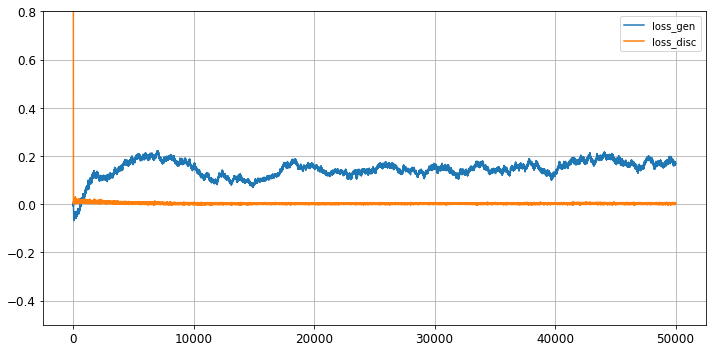

In [10]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-0.5,0.8])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [11]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### Sampleing from the latent space

Predicted Values: (1000, 3)
latent_space: 1000
BATCH_SIZE: 100
use_bias: False
epochs: 50000


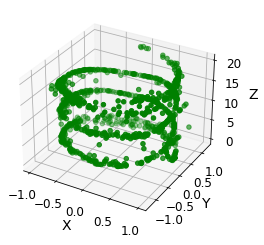

In [12]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    

In [13]:
os.system('mkdir result_dataset')

export_excel(predicted_values[:,:], 'result_dataset/predicted_values')
#x=[:0],y=[:1],z=[:2]

print('made result_Dataset')


made result_Dataset


X-Y 2D slices:


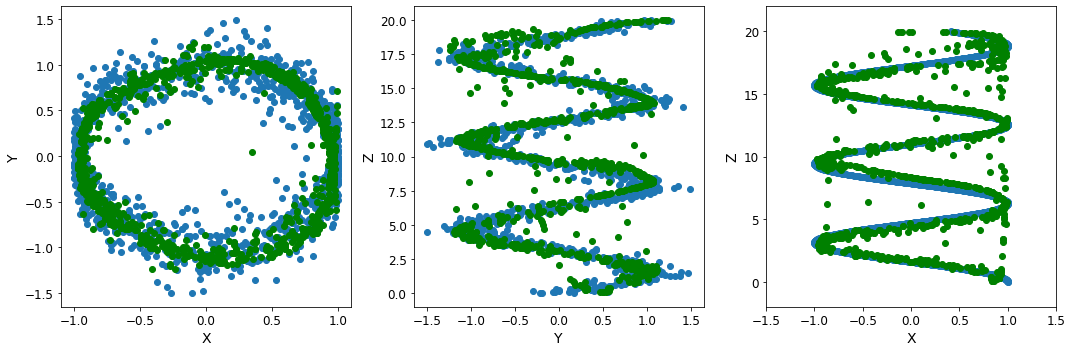

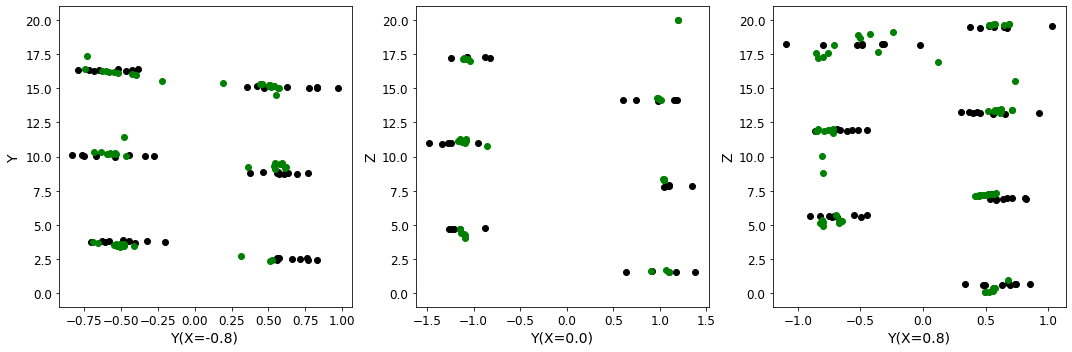

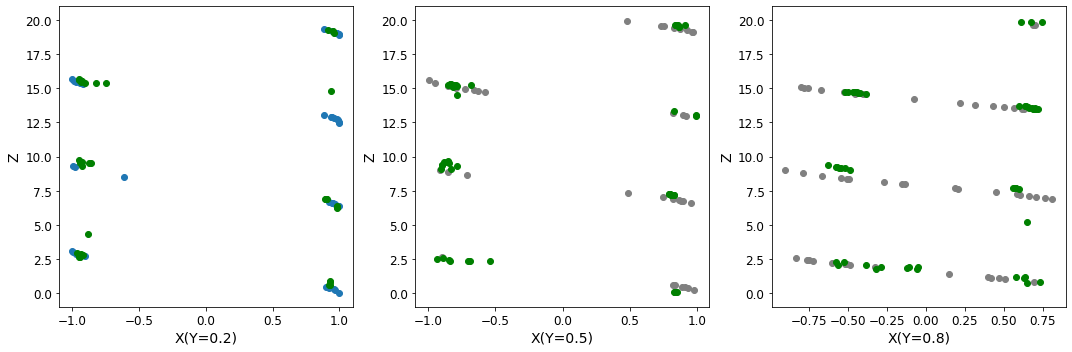

In [14]:
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='green')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='green')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()

### Applying the prediction function

## Fixed Input

input_test : (900, 3)


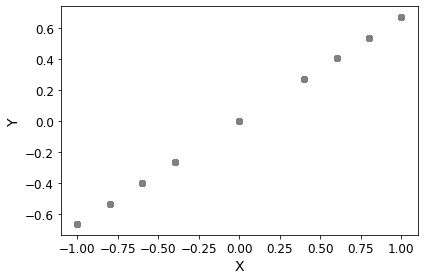

In [18]:
# define these for desired prediction
x_input = [-1,-0.8,-0.6,-0.4,0,0.4,0.6,0.8,1]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()

In [19]:
X_generated = wgan.predict(input_test, scaler)

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

latent_space= 1000
Epochs= 50000
BATCH_SIZE= 100
use_bias= False
X-Y 2D slices:


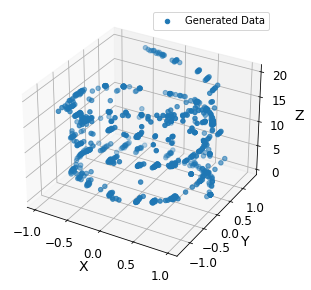

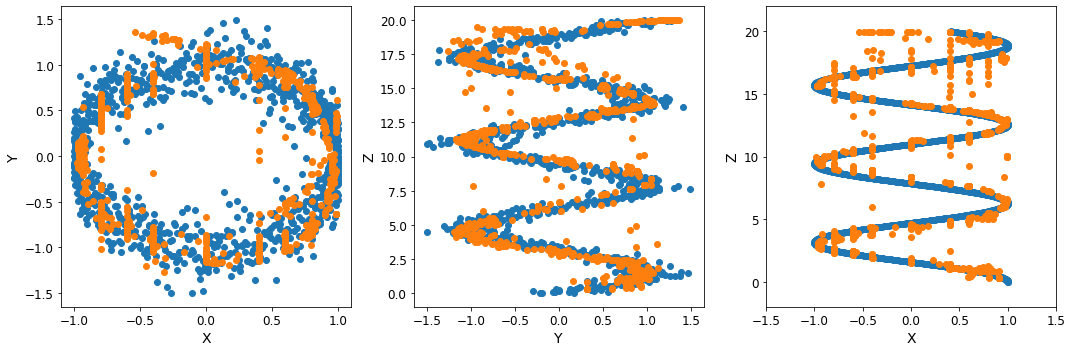

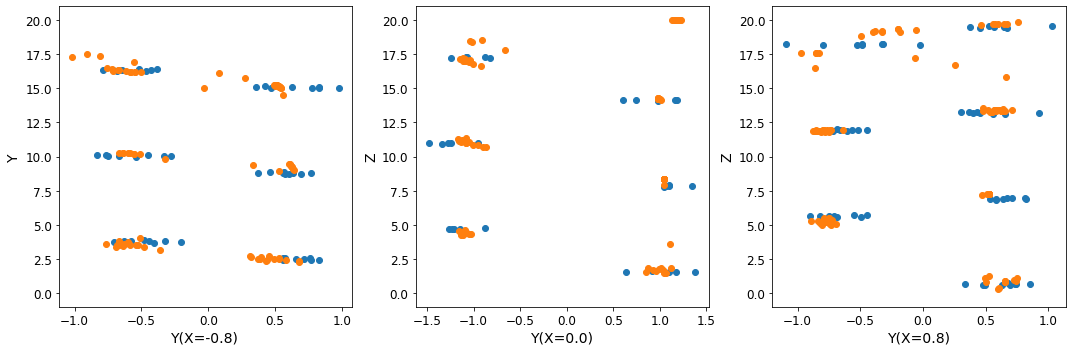

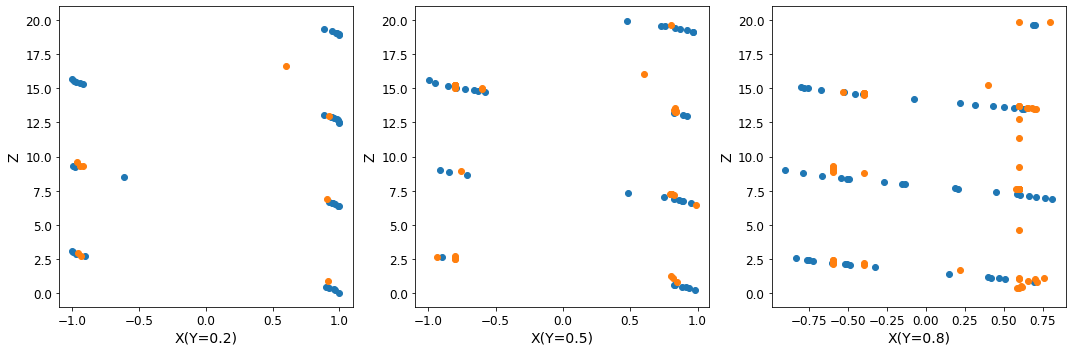

In [20]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    
    